In [2]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from mpl_toolkits.basemap import Basemap, cm
from pylab import rcParams
from matplotlib import animation
import statsmodels.api as sm
import pmdarima

<ipython-input-2-23bf730523df>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
f1=pd.read_csv("fire1992_merged.csv")
f2=pd.read_csv("fire1993_merged.csv")
f3=pd.read_csv("fire1994_merged.csv")
f4=pd.read_csv("fire1995_merged.csv")
f5=pd.read_csv("fire1996_merged.csv")
f6=pd.read_csv("fire1997_merged.csv")
f7=pd.read_csv("fire1998_merged.csv")
f8=pd.read_csv("fire1999_merged.csv")
f9=pd.read_csv("fire2000_merged.csv")
f10=pd.read_csv("fire2001_merged.csv")
#f11=pd.read_csv("fire2001_merged.csv")
f12=pd.read_csv("fire2002_merged.csv")
f13=pd.read_csv("fire2003_merged.csv")
f14=pd.read_csv("fire2004_merged.csv")
f15=pd.read_csv("fire2005_merged.csv")
f16=pd.read_csv("fire2006_merged.csv")
f17=pd.read_csv("fire2007_merged.csv")
f18=pd.read_csv("fire2008_merged.csv")
f19=pd.read_csv("fire2009_merged.csv")
f20=pd.read_csv("fire2010_merged.csv")
f21=pd.read_csv("fire2011_merged.csv")
f22=pd.read_csv("fire2012_merged.csv")
f23=pd.read_csv("fire2013_merged.csv")
f24=pd.read_csv("fire2014_merged.csv")
f25=pd.read_csv("fire2015_merged.csv")

In [4]:
Final_df = pd.concat([f1, f2, f3, f4, f5, f6, f7, f8, f9,f10, f12, f13, f14, f15, f16, f17, f18, f19, f20
                     ,f21, f22, f23, f24, f25], axis=0, ignore_index=True)

In [5]:
Final_df["Date_ts"]=Final_df["FIRE_YEAR"].astype(str)+"-"+(Final_df["d_month"].astype(str)).str.zfill(2)

In [6]:
grp_fire_count = Final_df.groupby("Date_ts",as_index=False)["FIRE_SIZE"].count()

In [7]:
grp_fire_count

,Date_ts,FIRE_SIZE
0,1992-01,48
1,1992-02,97
2,1992-03,116
3,1992-04,37
4,1992-05,28
...,...,...
283,2015-08,1557
284,2015-09,1293
285,2015-10,1347
286,2015-11,184


In [8]:
grp_fire_count.to_csv("time_seriescount.csv")

In [9]:
fire_ts = pd.read_csv("time_seriescount.csv",index_col=0)

In [10]:
fire_ts["Date_ts"]=pd.to_datetime(fire_ts["Date_ts"])

In [11]:
fire_ts

,Date_ts,FIRE_SIZE
0,1992-01-01,48
1,1992-02-01,97
2,1992-03-01,116
3,1992-04-01,37
4,1992-05-01,28
...,...,...
283,2015-08-01,1557
284,2015-09-01,1293
285,2015-10-01,1347
286,2015-11-01,184


In [12]:
check_nan = fire_ts.isnull().values.any()
check_nan

False

<AxesSubplot: >

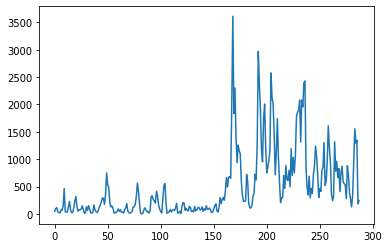

In [13]:
fire_ts["FIRE_SIZE"].plot()

In [44]:
fire_ts.set_index("Date_ts",inplace=True)
fire_ts

,FIRE_SIZE
Date_ts,
1992-01-01,48
1992-02-01,97
1992-03-01,116
1992-04-01,37
1992-05-01,28
...,...
2015-08-01,1557
2015-09-01,1293
2015-10-01,1347


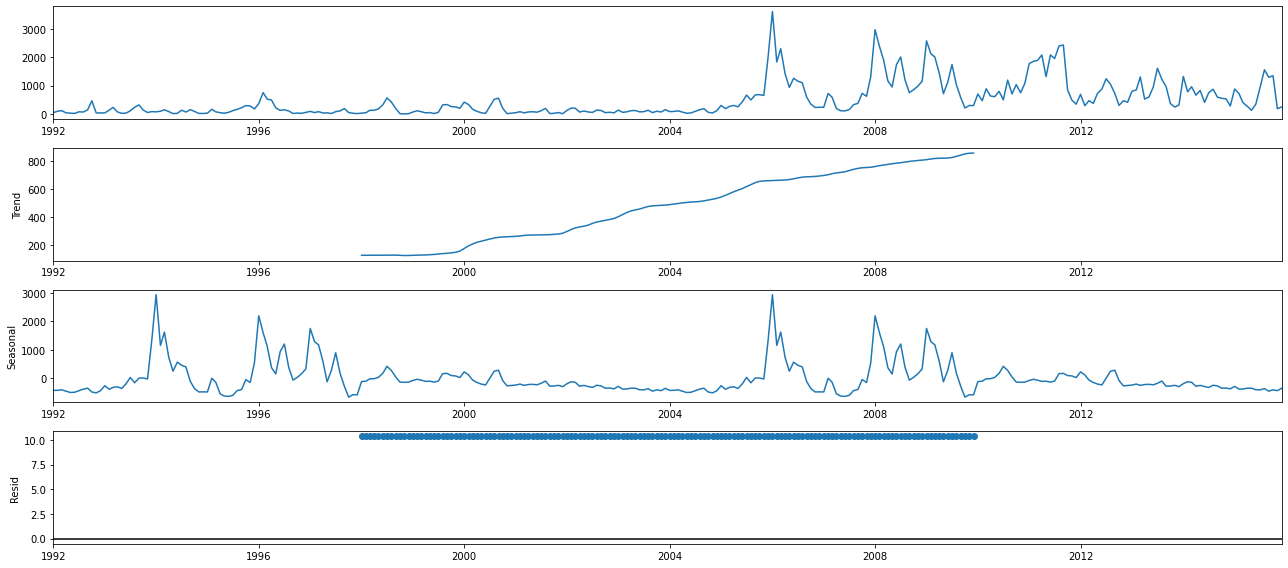

In [45]:
rcParams['figure.figsize'] = 18, 8
r=sm.tsa.seasonal_decompose(fire_ts, model = 'additive',period = int(len(fire_ts)/2))
fig = r.plot()
plt.show()

In [46]:
fire_ts.index = pd.DatetimeIndex(fire_ts.index).to_period('M')

In [47]:
from statsmodels.tsa.stattools import adfuller

test_r=adfuller(fire_ts["FIRE_SIZE"])

#H0: Not stationary
#H1: Stationary

def adfuller_test(x):
    result = adfuller(x)
    labels=["Test-statistic","p-value","#lags used","No. of observations"]
    for value,label in zip(result,labels):
        print(label+":"+str(value))
    if result[1]<=0.05:
        print("strong evidence against Null hypothess")
    else:
        print("weak evidence agaisnt null hypothesis")

adfuller_test(fire_ts["FIRE_SIZE"].dropna()) # p-value very small so stationary 

Test-statistic:-2.641647017822563
p-value:0.08469148274179528
#lags used:12
No. of observations:275
weak evidence agaisnt null hypothesis


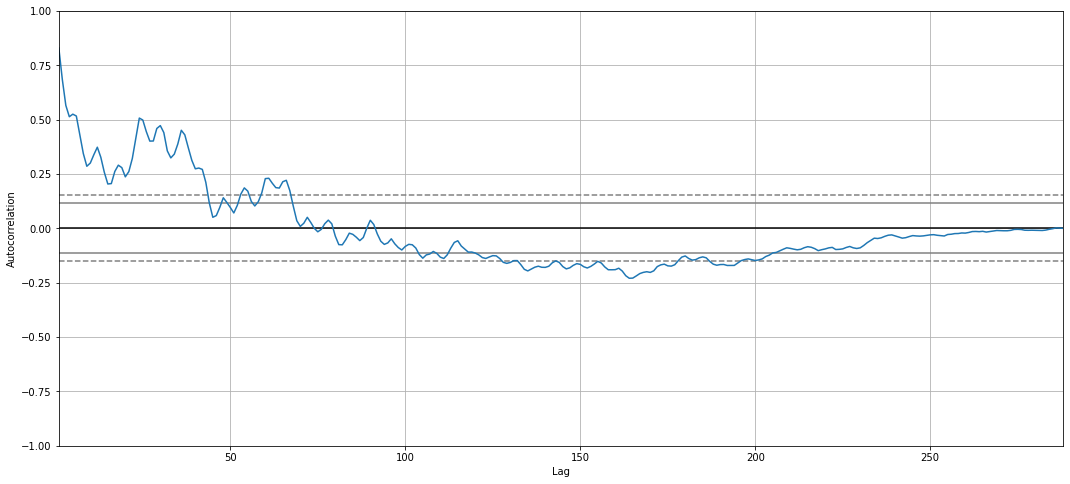

In [48]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(fire_ts["FIRE_SIZE"])
plt.show()

In [49]:
# so as p-value is greater than 0.05 - so its not stationary
# also from graph we can see clearly the trend and seasonality exist
#so 3 methods:
# 1. Differencing
# 2. Rolling
# 3. Transformations

##### Method-1 Normal Differencing

In [50]:
fire_ts["diff_1"]=fire_ts["FIRE_SIZE"]-fire_ts["FIRE_SIZE"].shift(1)

In [51]:
fire_ts=fire_ts.dropna()
fire_ts


,FIRE_SIZE,diff_1
Date_ts,,
1992-02,97,49.0
1992-03,116,19.0
1992-04,37,-79.0
1992-05,28,-9.0
1992-06,19,-9.0
...,...,...
2015-08,1557,622.0
2015-09,1293,-264.0
2015-10,1347,54.0


<AxesSubplot: xlabel='Date_ts'>

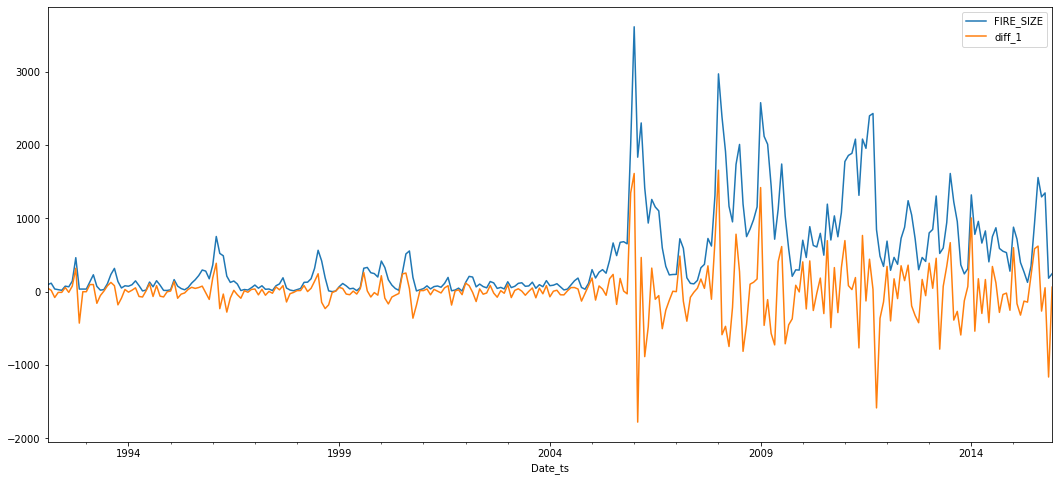

In [52]:
# from plot can see that has become standardized
fire_ts.plot()

In [54]:
# check again for seasnality

In [53]:
from statsmodels.tsa.stattools import adfuller

test_r=adfuller(fire_ts["diff_1"])

#H0: Not stationary
#H1: Stationary

def adfuller_test(x):
    result = adfuller(x)
    labels=["Test-statistic","p-value","#lags used","No. of observations"]
    for value,label in zip(result,labels):
        print(label+":"+str(value))
    if result[1]<=0.05:
        print("strong evidence against Null hypothess")
    else:
        print("weak evidence agaisnt null hypothesis")

adfuller_test(fire_ts["diff_1"].dropna())

Test-statistic:-6.118323220687209
p-value:8.981471725796078e-08
#lags used:15
No. of observations:271
strong evidence against Null hypothess


In [55]:
# now it has standardized as p-value is very less than 0.05

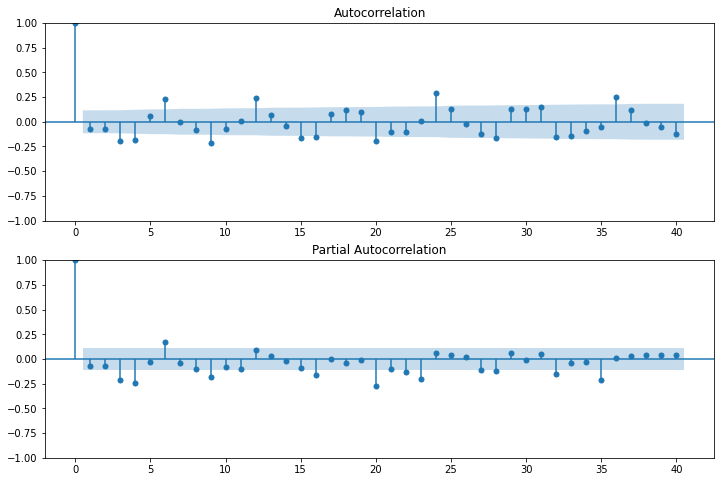

In [58]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(fire_ts["diff_1"],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(fire_ts["diff_1"],lags=40,ax=ax2)

In [59]:
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

In [60]:
X = fire_ts.diff_1
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
#plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test RMSE: 451.202


<AxesSubplot: xlabel='Date_ts'>

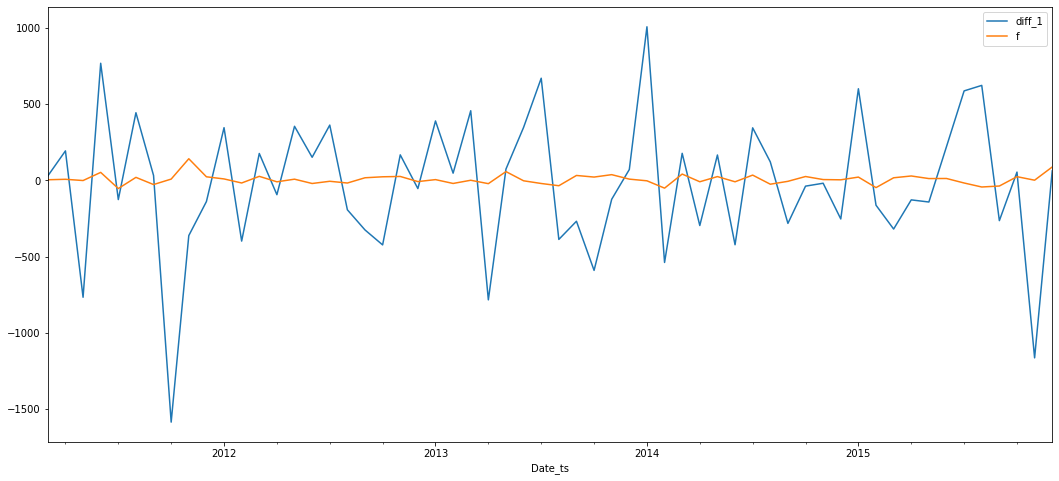

In [61]:
a=test.to_frame()
a["f"]=predictions
a.plot()

In [62]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                        print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [63]:
p_values = [0,1,2,3,4,5]
d_values = range(0, 12)
q_values = range(0, 3)

In [64]:
def evaluate_arima_model(X, arima_order):
 # prepare training dataset
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
 # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [83]:
evaluate_models(fire_ts.FIRE_SIZE, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=700.941
ARIMA(0, 0, 1) MSE=549.818
ARIMA(0, 0, 2) MSE=459.284
ARIMA(0, 1, 0) MSE=451.248
ARIMA(0, 1, 1) MSE=450.324


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\state

ARIMA(1, 0, 0) MSE=425.876


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 1) MSE=421.692


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserW

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: Converge

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: 

ARIMA(2, 1, 2) MSE=416.149


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarnin

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarnin

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(3, 1, 2) MSE=392.502


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarnin

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarnin

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarnin

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: N

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA(3, 1, 2) MSE=392.502


In [139]:
X = fire_ts.FIRE_SIZE
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)+1):
    model = ARIMA(history, order=(3,1,2),enforce_invertibility=True)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


IndexError: index 58 is out of bounds for axis 0 with size 58

In [140]:
len(test),len(predictions)

(58, 59)

In [145]:
ans=predictions[1:]

<AxesSubplot: xlabel='Date_ts'>

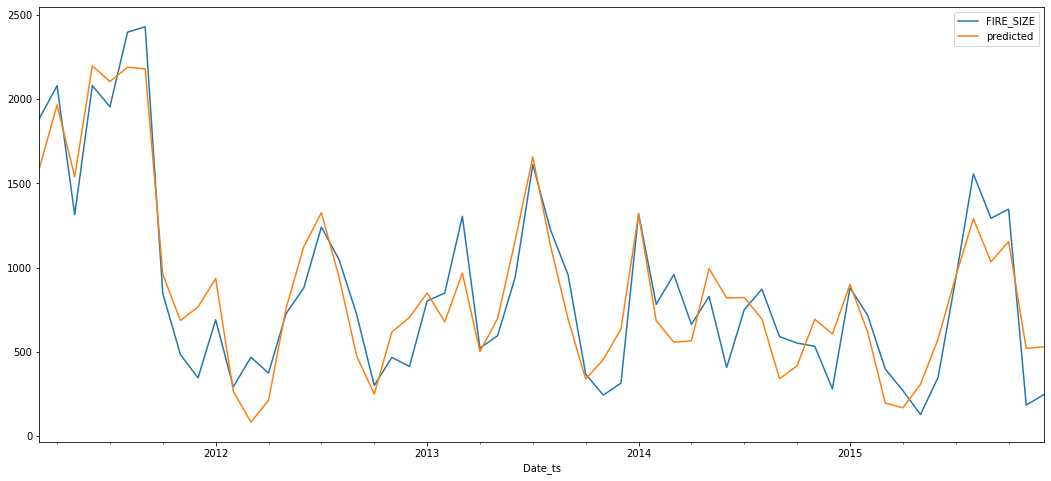

In [154]:
a2=test.to_frame()
a2["predicted"]=ans
a2.plot()

#### SARIMA

In [88]:
import itertools

In [91]:
p = d = q = range(0, 3)
s=range(0,12)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], x[3]) for x in list(itertools.product(p, d, q,s))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='M'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data
sarimax_gridsearch(fire_ts.FIRE_SIZE, pdq, pdqs, freq='M')

SARIMAX (0, 0, 0) x (0, 0, 0, 0)12 : BIC Calculated =4631.3418600793975
SARIMAX (0, 0, 0) x (0, 0, 0, 2)12 : BIC Calculated =4631.3418600793975
SARIMAX (0, 0, 0) x (0, 0, 0, 3)12 : BIC Calculated =4631.3418600793975
SARIMAX (0, 0, 0) x (0, 0, 0, 4)12 : BIC Calculated =4631.3418600793975
SARIMAX (0, 0, 0) x (0, 0, 0, 5)12 : BIC Calculated =4631.3418600793975
SARIMAX (0, 0, 0) x (0, 0, 0, 6)12 : BIC Calculated =4631.3418600793975
SARIMAX (0, 0, 0) x (0, 0, 0, 7)12 : BIC Calculated =4631.3418600793975
SARIMAX (0, 0, 0) x (0, 0, 0, 8)12 : BIC Calculated =4631.3418600793975
SARIMAX (0, 0, 0) x (0, 0, 0, 9)12 : BIC Calculated =4631.3418600793975
SARIMAX (0, 0, 0) x (0, 0, 0, 10)12 : BIC Calculated =4631.3418600793975
SARIMAX (0, 0, 0) x (0, 0, 0, 11)12 : BIC Calculated =4631.3418600793975
SARIMAX (0, 0, 0) x (0, 0, 1, 2)12 : BIC Calculated =4407.750599403238
SARIMAX (0, 0, 0) x (0, 0, 1, 3)12 : BIC Calculated =4489.378595274443
SARIMAX (0, 0, 0) x (0, 0, 1, 4)12 : BIC Calculated =4448.213877

SARIMAX (0, 0, 0) x (1, 0, 2, 7)12 : BIC Calculated =4227.944239986205
SARIMAX (0, 0, 0) x (1, 0, 2, 8)12 : BIC Calculated =4205.26109897835
SARIMAX (0, 0, 0) x (1, 0, 2, 9)12 : BIC Calculated =4173.1318721482
SARIMAX (0, 0, 0) x (1, 0, 2, 10)12 : BIC Calculated =4158.495414905828
SARIMAX (0, 0, 0) x (1, 0, 2, 11)12 : BIC Calculated =4139.067059593991
SARIMAX (0, 0, 0) x (1, 1, 0, 2)12 : BIC Calculated =4301.658193466825
SARIMAX (0, 0, 0) x (1, 1, 0, 3)12 : BIC Calculated =4312.967726915563
SARIMAX (0, 0, 0) x (1, 1, 0, 4)12 : BIC Calculated =4346.801081102354
SARIMAX (0, 0, 0) x (1, 1, 0, 5)12 : BIC Calculated =4319.154414462466
SARIMAX (0, 0, 0) x (1, 1, 0, 6)12 : BIC Calculated =4276.285687449082
SARIMAX (0, 0, 0) x (1, 1, 0, 7)12 : BIC Calculated =4293.5572379885525
SARIMAX (0, 0, 0) x (1, 1, 0, 8)12 : BIC Calculated =4292.061185833811
SARIMAX (0, 0, 0) x (1, 1, 0, 9)12 : BIC Calculated =4251.3948075016215
SARIMAX (0, 0, 0) x (1, 1, 0, 10)12 : BIC Calculated =4233.120310465638
SARI

SARIMAX (0, 0, 0) x (2, 1, 2, 2)12 : BIC Calculated =4201.701426401927
SARIMAX (0, 0, 0) x (2, 1, 2, 3)12 : BIC Calculated =4193.402397000726
SARIMAX (0, 0, 0) x (2, 1, 2, 4)12 : BIC Calculated =4220.2180541497455
SARIMAX (0, 0, 0) x (2, 1, 2, 5)12 : BIC Calculated =4152.843534145597
SARIMAX (0, 0, 0) x (2, 1, 2, 6)12 : BIC Calculated =4130.563591253706
SARIMAX (0, 0, 0) x (2, 1, 2, 7)12 : BIC Calculated =4112.822971517043
SARIMAX (0, 0, 0) x (2, 1, 2, 8)12 : BIC Calculated =4044.372790973671
SARIMAX (0, 0, 0) x (2, 1, 2, 9)12 : BIC Calculated =4025.62170279254
SARIMAX (0, 0, 0) x (2, 1, 2, 10)12 : BIC Calculated =3987.268029180615
SARIMAX (0, 0, 0) x (2, 1, 2, 11)12 : BIC Calculated =3978.603484729895
SARIMAX (0, 0, 0) x (2, 2, 0, 2)12 : BIC Calculated =4303.921832327169
SARIMAX (0, 0, 0) x (2, 2, 0, 3)12 : BIC Calculated =4361.294079217251
SARIMAX (0, 0, 0) x (2, 2, 0, 4)12 : BIC Calculated =4318.026419766309
SARIMAX (0, 0, 0) x (2, 2, 0, 5)12 : BIC Calculated =4308.642574338034
SARI

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 0) x (2, 2, 2, 5)12 : BIC Calculated =4127.968668798491
SARIMAX (0, 0, 0) x (2, 2, 2, 6)12 : BIC Calculated =4062.228081390966
SARIMAX (0, 0, 0) x (2, 2, 2, 7)12 : BIC Calculated =4044.7171444427618
SARIMAX (0, 0, 0) x (2, 2, 2, 8)12 : BIC Calculated =3955.9018856509647
SARIMAX (0, 0, 0) x (2, 2, 2, 9)12 : BIC Calculated =3932.499677425291
SARIMAX (0, 0, 0) x (2, 2, 2, 10)12 : BIC Calculated =3868.7103021097246
SARIMAX (0, 0, 0) x (2, 2, 2, 11)12 : BIC Calculated =3848.0298176260103
SARIMAX (0, 0, 1) x (0, 0, 0, 0)12 : BIC Calculated =4397.676943756567
SARIMAX (0, 0, 1) x (0, 0, 0, 2)12 : BIC Calculated =4397.676943756567
SARIMAX (0, 0, 1) x (0, 0, 0, 3)12 : BIC Calculated =4397.676943756567
SARIMAX (0, 0, 1) x (0, 0, 0, 4)12 : BIC Calculated =4397.676943756567
SARIMAX (0, 0, 1) x (0, 0, 0, 5)12 : BIC Calculated =4397.676943756567
SARIMAX (0, 0, 1) x (0, 0, 0, 6)12 : BIC Calculated =4397.676943756567
SARIMAX (0, 0, 1) x (0, 0, 0, 7)12 : BIC Calculated =4397.676943756567


SARIMAX (0, 0, 1) x (1, 0, 1, 9)12 : BIC Calculated =4157.300448449431
SARIMAX (0, 0, 1) x (1, 0, 1, 10)12 : BIC Calculated =4143.587654022618
SARIMAX (0, 0, 1) x (1, 0, 1, 11)12 : BIC Calculated =4138.375509687481
SARIMAX (0, 0, 1) x (1, 0, 2, 2)12 : BIC Calculated =4098.817059953484


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (1, 0, 2, 3)12 : BIC Calculated =4157.2213104474


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (1, 0, 2, 4)12 : BIC Calculated =4130.861700666214
SARIMAX (0, 0, 1) x (1, 0, 2, 5)12 : BIC Calculated =4119.413960050013
SARIMAX (0, 0, 1) x (1, 0, 2, 6)12 : BIC Calculated =4062.345111873764
SARIMAX (0, 0, 1) x (1, 0, 2, 7)12 : BIC Calculated =4082.4671182668817
SARIMAX (0, 0, 1) x (1, 0, 2, 8)12 : BIC Calculated =4051.7898519870782
SARIMAX (0, 0, 1) x (1, 0, 2, 9)12 : BIC Calculated =4024.2893934084263
SARIMAX (0, 0, 1) x (1, 0, 2, 10)12 : BIC Calculated =4008.3447755615853
SARIMAX (0, 0, 1) x (1, 0, 2, 11)12 : BIC Calculated =3987.2254193491044
SARIMAX (0, 0, 1) x (1, 1, 0, 2)12 : BIC Calculated =4146.759662758344
SARIMAX (0, 0, 1) x (1, 1, 0, 3)12 : BIC Calculated =4201.598308333453
SARIMAX (0, 0, 1) x (1, 1, 0, 4)12 : BIC Calculated =4206.4661758540915
SARIMAX (0, 0, 1) x (1, 1, 0, 5)12 : BIC Calculated =4196.093551414404
SARIMAX (0, 0, 1) x (1, 1, 0, 6)12 : BIC Calculated =4133.340007811729
SARIMAX (0, 0, 1) x (1, 1, 0, 7)12 : BIC Calculated =4162.23135636365

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (1, 2, 2, 2)12 : BIC Calculated =4080.6233858734613


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (1, 2, 2, 3)12 : BIC Calculated =4113.345013299071


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (1, 2, 2, 4)12 : BIC Calculated =4098.960242859996


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (1, 2, 2, 5)12 : BIC Calculated =4000.8644036276114
SARIMAX (0, 0, 1) x (1, 2, 2, 6)12 : BIC Calculated =3967.762132276806
SARIMAX (0, 0, 1) x (1, 2, 2, 7)12 : BIC Calculated =3909.8159275173657
SARIMAX (0, 0, 1) x (1, 2, 2, 8)12 : BIC Calculated =3851.3717296516757


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (1, 2, 2, 9)12 : BIC Calculated =3801.105166422785
SARIMAX (0, 0, 1) x (1, 2, 2, 10)12 : BIC Calculated =3749.753134910347
SARIMAX (0, 0, 1) x (1, 2, 2, 11)12 : BIC Calculated =3704.02474482577
SARIMAX (0, 0, 1) x (2, 0, 0, 2)12 : BIC Calculated =4137.706595834766
SARIMAX (0, 0, 1) x (2, 0, 0, 3)12 : BIC Calculated =4188.24990135327
SARIMAX (0, 0, 1) x (2, 0, 0, 4)12 : BIC Calculated =4181.948933038215
SARIMAX (0, 0, 1) x (2, 0, 0, 5)12 : BIC Calculated =4172.348685229015
SARIMAX (0, 0, 1) x (2, 0, 0, 6)12 : BIC Calculated =4114.439881324363
SARIMAX (0, 0, 1) x (2, 0, 0, 7)12 : BIC Calculated =4137.569579118648
SARIMAX (0, 0, 1) x (2, 0, 0, 8)12 : BIC Calculated =4115.571750909136
SARIMAX (0, 0, 1) x (2, 0, 0, 9)12 : BIC Calculated =4094.66167800042
SARIMAX (0, 0, 1) x (2, 0, 0, 10)12 : BIC Calculated =4064.472659625477
SARIMAX (0, 0, 1) x (2, 0, 0, 11)12 : BIC Calculated =4026.914671664092
SARIMAX (0, 0, 1) x (2, 0, 1, 2)12 : BIC Calculated =4136.691153745281
SARIM

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (2, 0, 1, 5)12 : BIC Calculated =4148.5515443489385
SARIMAX (0, 0, 1) x (2, 0, 1, 6)12 : BIC Calculated =4091.562013775492
SARIMAX (0, 0, 1) x (2, 0, 1, 7)12 : BIC Calculated =4111.308549931851
SARIMAX (0, 0, 1) x (2, 0, 1, 8)12 : BIC Calculated =4080.231275962778
SARIMAX (0, 0, 1) x (2, 0, 1, 9)12 : BIC Calculated =4056.061543818089
SARIMAX (0, 0, 1) x (2, 0, 1, 10)12 : BIC Calculated =4036.067259888376
SARIMAX (0, 0, 1) x (2, 0, 1, 11)12 : BIC Calculated =4013.9965809898235
SARIMAX (0, 0, 1) x (2, 0, 2, 2)12 : BIC Calculated =4099.293655433214
SARIMAX (0, 0, 1) x (2, 0, 2, 3)12 : BIC Calculated =4141.67525479159


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (2, 0, 2, 4)12 : BIC Calculated =4134.831098310008


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (2, 0, 2, 5)12 : BIC Calculated =4127.654027239235
SARIMAX (0, 0, 1) x (2, 0, 2, 6)12 : BIC Calculated =4067.5263620971364
SARIMAX (0, 0, 1) x (2, 0, 2, 7)12 : BIC Calculated =4085.8684388558495
SARIMAX (0, 0, 1) x (2, 0, 2, 8)12 : BIC Calculated =4040.4078325441046


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (2, 0, 2, 9)12 : BIC Calculated =4033.3522558795435
SARIMAX (0, 0, 1) x (2, 0, 2, 10)12 : BIC Calculated =4008.048453029351
SARIMAX (0, 0, 1) x (2, 0, 2, 11)12 : BIC Calculated =3990.4384389760257
SARIMAX (0, 0, 1) x (2, 1, 0, 2)12 : BIC Calculated =4103.574531144876
SARIMAX (0, 0, 1) x (2, 1, 0, 3)12 : BIC Calculated =4164.025805679119
SARIMAX (0, 0, 1) x (2, 1, 0, 4)12 : BIC Calculated =4121.103095869443
SARIMAX (0, 0, 1) x (2, 1, 0, 5)12 : BIC Calculated =4120.162213011907
SARIMAX (0, 0, 1) x (2, 1, 0, 6)12 : BIC Calculated =4046.3569437569276
SARIMAX (0, 0, 1) x (2, 1, 0, 7)12 : BIC Calculated =4039.990442001485
SARIMAX (0, 0, 1) x (2, 1, 0, 8)12 : BIC Calculated =3937.5048421606534
SARIMAX (0, 0, 1) x (2, 1, 0, 9)12 : BIC Calculated =3940.1809715473973
SARIMAX (0, 0, 1) x (2, 1, 0, 10)12 : BIC Calculated =3885.9009310918823
SARIMAX (0, 0, 1) x (2, 1, 0, 11)12 : BIC Calculated =3864.0585479080855
SARIMAX (0, 0, 1) x (2, 1, 1, 2)12 : BIC Calculated =4104.01027286

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (2, 2, 1, 2)12 : BIC Calculated =4095.3772385857533
SARIMAX (0, 0, 1) x (2, 2, 1, 3)12 : BIC Calculated =4138.368012411948
SARIMAX (0, 0, 1) x (2, 2, 1, 4)12 : BIC Calculated =4085.4620727882657
SARIMAX (0, 0, 1) x (2, 2, 1, 5)12 : BIC Calculated =4071.0986894458674
SARIMAX (0, 0, 1) x (2, 2, 1, 6)12 : BIC Calculated =3986.0849951209416
SARIMAX (0, 0, 1) x (2, 2, 1, 7)12 : BIC Calculated =3967.0370758131
SARIMAX (0, 0, 1) x (2, 2, 1, 8)12 : BIC Calculated =3855.1148861542233
SARIMAX (0, 0, 1) x (2, 2, 1, 9)12 : BIC Calculated =3843.398576507068
SARIMAX (0, 0, 1) x (2, 2, 1, 10)12 : BIC Calculated =3777.095349236256
SARIMAX (0, 0, 1) x (2, 2, 1, 11)12 : BIC Calculated =3740.8575273476436
SARIMAX (0, 0, 1) x (2, 2, 2, 2)12 : BIC Calculated =4067.4543158150004


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (2, 2, 2, 3)12 : BIC Calculated =4100.594928506399
SARIMAX (0, 0, 1) x (2, 2, 2, 4)12 : BIC Calculated =4043.4903334165297


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (2, 2, 2, 5)12 : BIC Calculated =4006.994546904107


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (2, 2, 2, 6)12 : BIC Calculated =3921.4756245565704


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (2, 2, 2, 7)12 : BIC Calculated =3963.670017660568
SARIMAX (0, 0, 1) x (2, 2, 2, 8)12 : BIC Calculated =3825.1957823816583


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (2, 2, 2, 9)12 : BIC Calculated =3796.6412276690094
SARIMAX (0, 0, 1) x (2, 2, 2, 10)12 : BIC Calculated =3744.677508429608
SARIMAX (0, 0, 1) x (2, 2, 2, 11)12 : BIC Calculated =3709.186314825298
SARIMAX (0, 0, 2) x (0, 0, 0, 0)12 : BIC Calculated =4283.508816722506
SARIMAX (0, 0, 2) x (0, 0, 0, 2)12 : BIC Calculated =4283.508816722506
SARIMAX (0, 0, 2) x (0, 0, 0, 3)12 : BIC Calculated =4283.508816722506
SARIMAX (0, 0, 2) x (0, 0, 0, 4)12 : BIC Calculated =4283.508816722506
SARIMAX (0, 0, 2) x (0, 0, 0, 5)12 : BIC Calculated =4283.508816722506
SARIMAX (0, 0, 2) x (0, 0, 0, 6)12 : BIC Calculated =4283.508816722506
SARIMAX (0, 0, 2) x (0, 0, 0, 7)12 : BIC Calculated =4283.508816722506
SARIMAX (0, 0, 2) x (0, 0, 0, 8)12 : BIC Calculated =4283.508816722506
SARIMAX (0, 0, 2) x (0, 0, 0, 9)12 : BIC Calculated =4283.508816722506
SARIMAX (0, 0, 2) x (0, 0, 0, 10)12 : BIC Calculated =4283.508816722506
SARIMAX (0, 0, 2) x (0, 0, 0, 11)12 : BIC Calculated =4283.508816722506
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (0, 2, 2, 3)12 : BIC Calculated =4005.61171564917
SARIMAX (0, 0, 2) x (0, 2, 2, 4)12 : BIC Calculated =3989.167495698587
SARIMAX (0, 0, 2) x (0, 2, 2, 5)12 : BIC Calculated =3942.7019438731336
SARIMAX (0, 0, 2) x (0, 2, 2, 6)12 : BIC Calculated =3882.318956137328
SARIMAX (0, 0, 2) x (0, 2, 2, 7)12 : BIC Calculated =3846.4756608379994
SARIMAX (0, 0, 2) x (0, 2, 2, 8)12 : BIC Calculated =3791.0082177318504
SARIMAX (0, 0, 2) x (0, 2, 2, 9)12 : BIC Calculated =3734.2995405119773
SARIMAX (0, 0, 2) x (0, 2, 2, 10)12 : BIC Calculated =3691.20771616832
SARIMAX (0, 0, 2) x (0, 2, 2, 11)12 : BIC Calculated =3640.9876807201017
SARIMAX (0, 0, 2) x (1, 0, 0, 2)12 : BIC Calculated =4152.527953812786
SARIMAX (0, 0, 2) x (1, 0, 0, 3)12 : BIC Calculated =4151.63061395199
SARIMAX (0, 0, 2) x (1, 0, 0, 4)12 : BIC Calculated =4240.81706748916
SARIMAX (0, 0, 2) x (1, 0, 0, 5)12 : BIC Calculated =4192.350861141875
SARIMAX (0, 0, 2) x (1, 0, 0, 6)12 : BIC Calculated =4143.45508757067
SARI

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (1, 2, 1, 3)12 : BIC Calculated =4043.171093371006
SARIMAX (0, 0, 2) x (1, 2, 1, 4)12 : BIC Calculated =4163.248332404935
SARIMAX (0, 0, 2) x (1, 2, 1, 5)12 : BIC Calculated =4064.07235368423
SARIMAX (0, 0, 2) x (1, 2, 1, 6)12 : BIC Calculated =3980.2332300623534
SARIMAX (0, 0, 2) x (1, 2, 1, 7)12 : BIC Calculated =4004.164492169416
SARIMAX (0, 0, 2) x (1, 2, 1, 8)12 : BIC Calculated =3974.949881501076
SARIMAX (0, 0, 2) x (1, 2, 1, 9)12 : BIC Calculated =3911.252189482934
SARIMAX (0, 0, 2) x (1, 2, 1, 10)12 : BIC Calculated =3904.7691569751414
SARIMAX (0, 0, 2) x (1, 2, 1, 11)12 : BIC Calculated =3839.1625009584827


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (1, 2, 2, 3)12 : BIC Calculated =4002.8049423907223
SARIMAX (0, 0, 2) x (1, 2, 2, 4)12 : BIC Calculated =3993.484585706278


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (1, 2, 2, 5)12 : BIC Calculated =3943.726646347801
SARIMAX (0, 0, 2) x (1, 2, 2, 6)12 : BIC Calculated =3854.090246618558
SARIMAX (0, 0, 2) x (1, 2, 2, 7)12 : BIC Calculated =3851.9783830937768
SARIMAX (0, 0, 2) x (1, 2, 2, 8)12 : BIC Calculated =3796.1370949606007
SARIMAX (0, 0, 2) x (1, 2, 2, 9)12 : BIC Calculated =3735.48023102143
SARIMAX (0, 0, 2) x (1, 2, 2, 10)12 : BIC Calculated =3696.5826936949825
SARIMAX (0, 0, 2) x (1, 2, 2, 11)12 : BIC Calculated =3646.1087809720125
SARIMAX (0, 0, 2) x (2, 0, 0, 2)12 : BIC Calculated =4143.351956680227
SARIMAX (0, 0, 2) x (2, 0, 0, 3)12 : BIC Calculated =4094.6091822074377
SARIMAX (0, 0, 2) x (2, 0, 0, 4)12 : BIC Calculated =4163.342260444465
SARIMAX (0, 0, 2) x (2, 0, 0, 5)12 : BIC Calculated =4119.121630573388
SARIMAX (0, 0, 2) x (2, 0, 0, 6)12 : BIC Calculated =4055.1421466247566
SARIMAX (0, 0, 2) x (2, 0, 0, 7)12 : BIC Calculated =4085.3784884985926
SARIMAX (0, 0, 2) x (2, 0, 0, 8)12 : BIC Calculated =4061.23866293435

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 0, 1, 4)12 : BIC Calculated =4128.001173364341
SARIMAX (0, 0, 2) x (2, 0, 1, 5)12 : BIC Calculated =4101.685907964558
SARIMAX (0, 0, 2) x (2, 0, 1, 6)12 : BIC Calculated =4034.9927435080594
SARIMAX (0, 0, 2) x (2, 0, 1, 7)12 : BIC Calculated =4063.079704710239
SARIMAX (0, 0, 2) x (2, 0, 1, 8)12 : BIC Calculated =4033.4704429715393
SARIMAX (0, 0, 2) x (2, 0, 1, 9)12 : BIC Calculated =3997.5991235228225
SARIMAX (0, 0, 2) x (2, 0, 1, 10)12 : BIC Calculated =3990.574150199922
SARIMAX (0, 0, 2) x (2, 0, 1, 11)12 : BIC Calculated =3962.3200578514884


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 0, 2, 3)12 : BIC Calculated =4035.1501977396365


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 0, 2, 4)12 : BIC Calculated =4103.092822916259


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 0, 2, 5)12 : BIC Calculated =4066.5891968370024


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 0, 2, 6)12 : BIC Calculated =3999.5088422312206
SARIMAX (0, 0, 2) x (2, 0, 2, 7)12 : BIC Calculated =4024.1575789893736
SARIMAX (0, 0, 2) x (2, 0, 2, 8)12 : BIC Calculated =3985.9667544806193
SARIMAX (0, 0, 2) x (2, 0, 2, 9)12 : BIC Calculated =3959.742476115783
SARIMAX (0, 0, 2) x (2, 0, 2, 10)12 : BIC Calculated =3950.15498821441
SARIMAX (0, 0, 2) x (2, 0, 2, 11)12 : BIC Calculated =3924.7963594542393
SARIMAX (0, 0, 2) x (2, 1, 0, 2)12 : BIC Calculated =4109.199902354144
SARIMAX (0, 0, 2) x (2, 1, 0, 3)12 : BIC Calculated =4064.2977887868105
SARIMAX (0, 0, 2) x (2, 1, 0, 4)12 : BIC Calculated =4095.2000159107974
SARIMAX (0, 0, 2) x (2, 1, 0, 5)12 : BIC Calculated =4073.8196033523063
SARIMAX (0, 0, 2) x (2, 1, 0, 6)12 : BIC Calculated =3986.2413146652166
SARIMAX (0, 0, 2) x (2, 1, 0, 7)12 : BIC Calculated =3992.4585354884293
SARIMAX (0, 0, 2) x (2, 1, 0, 8)12 : BIC Calculated =3896.667912755134
SARIMAX (0, 0, 2) x (2, 1, 0, 9)12 : BIC Calculated =3892.493757084

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 1, 1, 3)12 : BIC Calculated =4044.219182253453
SARIMAX (0, 0, 2) x (2, 1, 1, 4)12 : BIC Calculated =4069.893869459161
SARIMAX (0, 0, 2) x (2, 1, 1, 5)12 : BIC Calculated =4028.534135585268
SARIMAX (0, 0, 2) x (2, 1, 1, 6)12 : BIC Calculated =3947.0056535370813
SARIMAX (0, 0, 2) x (2, 1, 1, 7)12 : BIC Calculated =3960.604134843521
SARIMAX (0, 0, 2) x (2, 1, 1, 8)12 : BIC Calculated =3895.492263243194
SARIMAX (0, 0, 2) x (2, 1, 1, 9)12 : BIC Calculated =3867.8481898796
SARIMAX (0, 0, 2) x (2, 1, 1, 10)12 : BIC Calculated =3834.4484986115094
SARIMAX (0, 0, 2) x (2, 1, 1, 11)12 : BIC Calculated =3805.777187744833
SARIMAX (0, 0, 2) x (2, 1, 2, 3)12 : BIC Calculated =3986.3703507359623
SARIMAX (0, 0, 2) x (2, 1, 2, 4)12 : BIC Calculated =4032.28625292816
SARIMAX (0, 0, 2) x (2, 1, 2, 5)12 : BIC Calculated =3992.4246944699416
SARIMAX (0, 0, 2) x (2, 1, 2, 6)12 : BIC Calculated =3909.8667529252652
SARIMAX (0, 0, 2) x (2, 1, 2, 7)12 : BIC Calculated =3924.4579917176247
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 2, 2, 3)12 : BIC Calculated =4002.906431984722


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 2, 2, 4)12 : BIC Calculated =3998.3891005573855


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 2, 2, 5)12 : BIC Calculated =3947.6656514724805


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 2, 2, 6)12 : BIC Calculated =3854.5541549059103
SARIMAX (0, 0, 2) x (2, 2, 2, 7)12 : BIC Calculated =3855.2994118833662
SARIMAX (0, 0, 2) x (2, 2, 2, 8)12 : BIC Calculated =3774.795073252187
SARIMAX (0, 0, 2) x (2, 2, 2, 9)12 : BIC Calculated =3737.0605927273905
SARIMAX (0, 0, 2) x (2, 2, 2, 10)12 : BIC Calculated =3691.0808094464164


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 2, 2, 11)12 : BIC Calculated =3651.004484678009
SARIMAX (0, 1, 0) x (0, 0, 0, 0)12 : BIC Calculated =4163.709665393011
SARIMAX (0, 1, 0) x (0, 0, 0, 2)12 : BIC Calculated =4163.709665393011
SARIMAX (0, 1, 0) x (0, 0, 0, 3)12 : BIC Calculated =4163.709665393011
SARIMAX (0, 1, 0) x (0, 0, 0, 4)12 : BIC Calculated =4163.709665393011
SARIMAX (0, 1, 0) x (0, 0, 0, 5)12 : BIC Calculated =4163.709665393011
SARIMAX (0, 1, 0) x (0, 0, 0, 6)12 : BIC Calculated =4163.709665393011
SARIMAX (0, 1, 0) x (0, 0, 0, 7)12 : BIC Calculated =4163.709665393011
SARIMAX (0, 1, 0) x (0, 0, 0, 8)12 : BIC Calculated =4163.709665393011
SARIMAX (0, 1, 0) x (0, 0, 0, 9)12 : BIC Calculated =4163.709665393011
SARIMAX (0, 1, 0) x (0, 0, 0, 10)12 : BIC Calculated =4163.709665393011
SARIMAX (0, 1, 0) x (0, 0, 0, 11)12 : BIC Calculated =4163.709665393011
SARIMAX (0, 1, 0) x (0, 0, 1, 2)12 : BIC Calculated =4140.012678358
SARIMAX (0, 1, 0) x (0, 0, 1, 3)12 : BIC Calculated =4120.1603984371295
SARIM

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (0, 2, 1, 7)12 : BIC Calculated =4075.940413977272
SARIMAX (0, 1, 0) x (0, 2, 1, 8)12 : BIC Calculated =4053.281420972926
SARIMAX (0, 1, 0) x (0, 2, 1, 9)12 : BIC Calculated =4042.228527279713
SARIMAX (0, 1, 0) x (0, 2, 1, 10)12 : BIC Calculated =3967.716941378357
SARIMAX (0, 1, 0) x (0, 2, 1, 11)12 : BIC Calculated =3905.4324034965803
SARIMAX (0, 1, 0) x (0, 2, 2, 2)12 : BIC Calculated =4084.8912582898442
SARIMAX (0, 1, 0) x (0, 2, 2, 3)12 : BIC Calculated =4035.7091220551483
SARIMAX (0, 1, 0) x (0, 2, 2, 4)12 : BIC Calculated =3990.0336078514847
SARIMAX (0, 1, 0) x (0, 2, 2, 5)12 : BIC Calculated =3947.3818713986893
SARIMAX (0, 1, 0) x (0, 2, 2, 6)12 : BIC Calculated =3830.704512910346
SARIMAX (0, 1, 0) x (0, 2, 2, 7)12 : BIC Calculated =3850.0544855188073
SARIMAX (0, 1, 0) x (0, 2, 2, 8)12 : BIC Calculated =3791.9023719992674
SARIMAX (0, 1, 0) x (0, 2, 2, 9)12 : BIC Calculated =3734.626685091489
SARIMAX (0, 1, 0) x (0, 2, 2, 10)12 : BIC Calculated =3684.000975562

SARIMAX (0, 1, 0) x (2, 0, 1, 2)12 : BIC Calculated =4116.847302607718
SARIMAX (0, 1, 0) x (2, 0, 1, 3)12 : BIC Calculated =4069.19527860525
SARIMAX (0, 1, 0) x (2, 0, 1, 4)12 : BIC Calculated =4064.7460510366996
SARIMAX (0, 1, 0) x (2, 0, 1, 5)12 : BIC Calculated =4047.6928016484635
SARIMAX (0, 1, 0) x (2, 0, 1, 6)12 : BIC Calculated =3990.0225880181124
SARIMAX (0, 1, 0) x (2, 0, 1, 7)12 : BIC Calculated =3997.094741403412
SARIMAX (0, 1, 0) x (2, 0, 1, 8)12 : BIC Calculated =3948.2085997119657
SARIMAX (0, 1, 0) x (2, 0, 1, 9)12 : BIC Calculated =3922.0168677061097
SARIMAX (0, 1, 0) x (2, 0, 1, 10)12 : BIC Calculated =3900.3126687105837
SARIMAX (0, 1, 0) x (2, 0, 1, 11)12 : BIC Calculated =3886.4561579243427
SARIMAX (0, 1, 0) x (2, 0, 2, 2)12 : BIC Calculated =4082.8725990616304
SARIMAX (0, 1, 0) x (2, 0, 2, 3)12 : BIC Calculated =4060.3580722074876
SARIMAX (0, 1, 0) x (2, 0, 2, 4)12 : BIC Calculated =4022.2960413610804
SARIMAX (0, 1, 0) x (2, 0, 2, 5)12 : BIC Calculated =4026.76283718

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (2, 1, 2, 11)12 : BIC Calculated =3744.7758950899088
SARIMAX (0, 1, 0) x (2, 2, 0, 2)12 : BIC Calculated =4299.437661776464
SARIMAX (0, 1, 0) x (2, 2, 0, 3)12 : BIC Calculated =4254.568201485041
SARIMAX (0, 1, 0) x (2, 2, 0, 4)12 : BIC Calculated =4178.805176088571
SARIMAX (0, 1, 0) x (2, 2, 0, 5)12 : BIC Calculated =4149.405428316055
SARIMAX (0, 1, 0) x (2, 2, 0, 6)12 : BIC Calculated =4032.013007458107
SARIMAX (0, 1, 0) x (2, 2, 0, 7)12 : BIC Calculated =4028.322080786161
SARIMAX (0, 1, 0) x (2, 2, 0, 8)12 : BIC Calculated =3910.045490324327
SARIMAX (0, 1, 0) x (2, 2, 0, 9)12 : BIC Calculated =3930.713978438366
SARIMAX (0, 1, 0) x (2, 2, 0, 10)12 : BIC Calculated =3841.6726456853753
SARIMAX (0, 1, 0) x (2, 2, 0, 11)12 : BIC Calculated =3806.031697929754
SARIMAX (0, 1, 0) x (2, 2, 1, 2)12 : BIC Calculated =4135.643656065359
SARIMAX (0, 1, 0) x (2, 2, 1, 3)12 : BIC Calculated =4097.929590696535
SARIMAX (0, 1, 0) x (2, 2, 1, 4)12 : BIC Calculated =4026.464358756086
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (2, 2, 2, 3)12 : BIC Calculated =4086.140900108616


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (2, 2, 2, 4)12 : BIC Calculated =4005.8640956508693
SARIMAX (0, 1, 0) x (2, 2, 2, 5)12 : BIC Calculated =3998.6438564035116


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (2, 2, 2, 6)12 : BIC Calculated =3841.7898914616208
SARIMAX (0, 1, 0) x (2, 2, 2, 7)12 : BIC Calculated =3860.8138946086146
SARIMAX (0, 1, 0) x (2, 2, 2, 8)12 : BIC Calculated =3785.379910427999
SARIMAX (0, 1, 0) x (2, 2, 2, 9)12 : BIC Calculated =3730.2170646953036


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (2, 2, 2, 10)12 : BIC Calculated =3681.8602173425456
SARIMAX (0, 1, 0) x (2, 2, 2, 11)12 : BIC Calculated =3650.96463188239
SARIMAX (0, 1, 1) x (0, 0, 0, 0)12 : BIC Calculated =4153.789609809251
SARIMAX (0, 1, 1) x (0, 0, 0, 2)12 : BIC Calculated =4153.789609809251
SARIMAX (0, 1, 1) x (0, 0, 0, 3)12 : BIC Calculated =4153.789609809251
SARIMAX (0, 1, 1) x (0, 0, 0, 4)12 : BIC Calculated =4153.789609809251
SARIMAX (0, 1, 1) x (0, 0, 0, 5)12 : BIC Calculated =4153.789609809251
SARIMAX (0, 1, 1) x (0, 0, 0, 6)12 : BIC Calculated =4153.789609809251
SARIMAX (0, 1, 1) x (0, 0, 0, 7)12 : BIC Calculated =4153.789609809251
SARIMAX (0, 1, 1) x (0, 0, 0, 8)12 : BIC Calculated =4153.789609809251
SARIMAX (0, 1, 1) x (0, 0, 0, 9)12 : BIC Calculated =4153.789609809251
SARIMAX (0, 1, 1) x (0, 0, 0, 10)12 : BIC Calculated =4153.789609809251
SARIMAX (0, 1, 1) x (0, 0, 0, 11)12 : BIC Calculated =4153.789609809251
SARIMAX (0, 1, 1) x (0, 0, 1, 2)12 : BIC Calculated =4128.385579239917
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (0, 2, 1, 2)12 : BIC Calculated =4287.0296508333795
SARIMAX (0, 1, 1) x (0, 2, 1, 3)12 : BIC Calculated =4283.63962551419
SARIMAX (0, 1, 1) x (0, 2, 1, 4)12 : BIC Calculated =4238.916234746126
SARIMAX (0, 1, 1) x (0, 2, 1, 5)12 : BIC Calculated =4131.506962699175
SARIMAX (0, 1, 1) x (0, 2, 1, 6)12 : BIC Calculated =4029.9697199891257
SARIMAX (0, 1, 1) x (0, 2, 1, 7)12 : BIC Calculated =4060.30883392962
SARIMAX (0, 1, 1) x (0, 2, 1, 8)12 : BIC Calculated =4043.5678509842273
SARIMAX (0, 1, 1) x (0, 2, 1, 9)12 : BIC Calculated =4032.6959679674674
SARIMAX (0, 1, 1) x (0, 2, 1, 10)12 : BIC Calculated =3958.2917494948606
SARIMAX (0, 1, 1) x (0, 2, 1, 11)12 : BIC Calculated =3888.784145630751


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (0, 2, 2, 2)12 : BIC Calculated =4075.267257515832
SARIMAX (0, 1, 1) x (0, 2, 2, 3)12 : BIC Calculated =4026.0632059364957
SARIMAX (0, 1, 1) x (0, 2, 2, 4)12 : BIC Calculated =3980.676394478647
SARIMAX (0, 1, 1) x (0, 2, 2, 5)12 : BIC Calculated =3937.3227464703536
SARIMAX (0, 1, 1) x (0, 2, 2, 6)12 : BIC Calculated =3814.939876300833
SARIMAX (0, 1, 1) x (0, 2, 2, 7)12 : BIC Calculated =3840.2270181588383
SARIMAX (0, 1, 1) x (0, 2, 2, 8)12 : BIC Calculated =3782.477446037152
SARIMAX (0, 1, 1) x (0, 2, 2, 9)12 : BIC Calculated =3725.012315577601
SARIMAX (0, 1, 1) x (0, 2, 2, 10)12 : BIC Calculated =3674.4222039656556
SARIMAX (0, 1, 1) x (0, 2, 2, 11)12 : BIC Calculated =3632.538649553213
SARIMAX (0, 1, 1) x (1, 0, 0, 2)12 : BIC Calculated =4157.05094480344
SARIMAX (0, 1, 1) x (1, 0, 0, 3)12 : BIC Calculated =4128.738805773941
SARIMAX (0, 1, 1) x (1, 0, 0, 4)12 : BIC Calculated =4119.5500612863125
SARIMAX (0, 1, 1) x (1, 0, 0, 5)12 : BIC Calculated =4117.608225211562


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (1, 2, 2, 2)12 : BIC Calculated =4116.674214980157


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (1, 2, 2, 3)12 : BIC Calculated =4011.7727497105207
SARIMAX (0, 1, 1) x (1, 2, 2, 4)12 : BIC Calculated =3973.597043341527
SARIMAX (0, 1, 1) x (1, 2, 2, 5)12 : BIC Calculated =3941.25212937432
SARIMAX (0, 1, 1) x (1, 2, 2, 6)12 : BIC Calculated =3820.1745412971427
SARIMAX (0, 1, 1) x (1, 2, 2, 7)12 : BIC Calculated =3845.303806692174
SARIMAX (0, 1, 1) x (1, 2, 2, 8)12 : BIC Calculated =3785.405277724514
SARIMAX (0, 1, 1) x (1, 2, 2, 9)12 : BIC Calculated =3712.965316145874
SARIMAX (0, 1, 1) x (1, 2, 2, 10)12 : BIC Calculated =3677.5673807937073
SARIMAX (0, 1, 1) x (1, 2, 2, 11)12 : BIC Calculated =3637.582899340455
SARIMAX (0, 1, 1) x (2, 0, 0, 2)12 : BIC Calculated =4120.948629489946
SARIMAX (0, 1, 1) x (2, 0, 0, 3)12 : BIC Calculated =4082.655716091393
SARIMAX (0, 1, 1) x (2, 0, 0, 4)12 : BIC Calculated =4061.6480258468873
SARIMAX (0, 1, 1) x (2, 0, 0, 5)12 : BIC Calculated =4050.2171655034754
SARIMAX (0, 1, 1) x (2, 0, 0, 6)12 : BIC Calculated =3997.1828124400804

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (2, 1, 2, 3)12 : BIC Calculated =4000.3482072281518
SARIMAX (0, 1, 1) x (2, 1, 2, 4)12 : BIC Calculated =3992.298463907425
SARIMAX (0, 1, 1) x (2, 1, 2, 5)12 : BIC Calculated =3982.04008263059
SARIMAX (0, 1, 1) x (2, 1, 2, 6)12 : BIC Calculated =3874.770816676385
SARIMAX (0, 1, 1) x (2, 1, 2, 7)12 : BIC Calculated =3904.4209980017354
SARIMAX (0, 1, 1) x (2, 1, 2, 8)12 : BIC Calculated =3826.548362817151
SARIMAX (0, 1, 1) x (2, 1, 2, 9)12 : BIC Calculated =3778.558153450412
SARIMAX (0, 1, 1) x (2, 1, 2, 10)12 : BIC Calculated =3753.3245638824665
SARIMAX (0, 1, 1) x (2, 1, 2, 11)12 : BIC Calculated =3732.925645660576
SARIMAX (0, 1, 1) x (2, 2, 0, 2)12 : BIC Calculated =4299.966128899435
SARIMAX (0, 1, 1) x (2, 2, 0, 3)12 : BIC Calculated =4258.658605798344
SARIMAX (0, 1, 1) x (2, 2, 0, 4)12 : BIC Calculated =4183.413452395665
SARIMAX (0, 1, 1) x (2, 2, 0, 5)12 : BIC Calculated =4154.969733250965
SARIMAX (0, 1, 1) x (2, 2, 0, 6)12 : BIC Calculated =4033.4106899938406
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (2, 2, 2, 2)12 : BIC Calculated =4067.104368110953


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (2, 2, 2, 3)12 : BIC Calculated =4119.831453559694
SARIMAX (0, 1, 1) x (2, 2, 2, 4)12 : BIC Calculated =3970.7363516030573


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (2, 2, 2, 5)12 : BIC Calculated =3950.206627007805


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (2, 2, 2, 6)12 : BIC Calculated =3826.477929552583


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (2, 2, 2, 7)12 : BIC Calculated =3853.1368133539963
SARIMAX (0, 1, 1) x (2, 2, 2, 8)12 : BIC Calculated =3768.0644368692056


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (2, 2, 2, 9)12 : BIC Calculated =3778.3698209544723


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (2, 2, 2, 10)12 : BIC Calculated =3670.0257287178724
SARIMAX (0, 1, 1) x (2, 2, 2, 11)12 : BIC Calculated =3639.817147295351
SARIMAX (0, 1, 2) x (0, 0, 0, 0)12 : BIC Calculated =4138.586743630147
SARIMAX (0, 1, 2) x (0, 0, 0, 2)12 : BIC Calculated =4138.586743630147
SARIMAX (0, 1, 2) x (0, 0, 0, 3)12 : BIC Calculated =4138.586743630147
SARIMAX (0, 1, 2) x (0, 0, 0, 4)12 : BIC Calculated =4138.586743630147
SARIMAX (0, 1, 2) x (0, 0, 0, 5)12 : BIC Calculated =4138.586743630147
SARIMAX (0, 1, 2) x (0, 0, 0, 6)12 : BIC Calculated =4138.586743630147
SARIMAX (0, 1, 2) x (0, 0, 0, 7)12 : BIC Calculated =4138.586743630147
SARIMAX (0, 1, 2) x (0, 0, 0, 8)12 : BIC Calculated =4138.586743630147
SARIMAX (0, 1, 2) x (0, 0, 0, 9)12 : BIC Calculated =4138.586743630147
SARIMAX (0, 1, 2) x (0, 0, 0, 10)12 : BIC Calculated =4138.586743630147
SARIMAX (0, 1, 2) x (0, 0, 0, 11)12 : BIC Calculated =4138.586743630147
SARIMAX (0, 1, 2) x (0, 0, 1, 3)12 : BIC Calculated =4094.0963118465083


SARIMAX (0, 1, 2) x (1, 1, 0, 3)12 : BIC Calculated =4176.593083287665
SARIMAX (0, 1, 2) x (1, 1, 0, 4)12 : BIC Calculated =4209.736525451845
SARIMAX (0, 1, 2) x (1, 1, 0, 5)12 : BIC Calculated =4166.345961560581
SARIMAX (0, 1, 2) x (1, 1, 0, 6)12 : BIC Calculated =4050.811585086524
SARIMAX (0, 1, 2) x (1, 1, 0, 7)12 : BIC Calculated =4107.192275220939
SARIMAX (0, 1, 2) x (1, 1, 0, 8)12 : BIC Calculated =4104.226225617485
SARIMAX (0, 1, 2) x (1, 1, 0, 9)12 : BIC Calculated =4030.73041121127
SARIMAX (0, 1, 2) x (1, 1, 0, 10)12 : BIC Calculated =4052.696583701875
SARIMAX (0, 1, 2) x (1, 1, 0, 11)12 : BIC Calculated =3998.651826407146
SARIMAX (0, 1, 2) x (1, 1, 1, 3)12 : BIC Calculated =4056.293848633618
SARIMAX (0, 1, 2) x (1, 1, 1, 4)12 : BIC Calculated =4039.8647204490026
SARIMAX (0, 1, 2) x (1, 1, 1, 5)12 : BIC Calculated =4026.842096363933
SARIMAX (0, 1, 2) x (1, 1, 1, 6)12 : BIC Calculated =3942.3360109254586
SARIMAX (0, 1, 2) x (1, 1, 1, 7)12 : BIC Calculated =3976.0173845537674
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (1, 2, 2, 3)12 : BIC Calculated =4003.0015636479047


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (1, 2, 2, 4)12 : BIC Calculated =3959.920839554497


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (1, 2, 2, 5)12 : BIC Calculated =3927.017212175023
SARIMAX (0, 1, 2) x (1, 2, 2, 6)12 : BIC Calculated =3812.2308281922637


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (1, 2, 2, 7)12 : BIC Calculated =3830.4590403134007
SARIMAX (0, 1, 2) x (1, 2, 2, 8)12 : BIC Calculated =3769.0178273650963


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (1, 2, 2, 9)12 : BIC Calculated =3701.1949703045443
SARIMAX (0, 1, 2) x (1, 2, 2, 10)12 : BIC Calculated =3661.383917865788
SARIMAX (0, 1, 2) x (1, 2, 2, 11)12 : BIC Calculated =3622.519544756766
SARIMAX (0, 1, 2) x (2, 0, 0, 2)12 : BIC Calculated =4121.954269763556
SARIMAX (0, 1, 2) x (2, 0, 0, 3)12 : BIC Calculated =4087.945206854469
SARIMAX (0, 1, 2) x (2, 0, 0, 4)12 : BIC Calculated =4064.9559195244174
SARIMAX (0, 1, 2) x (2, 0, 0, 5)12 : BIC Calculated =4050.47355258994
SARIMAX (0, 1, 2) x (2, 0, 0, 6)12 : BIC Calculated =4002.023246432009
SARIMAX (0, 1, 2) x (2, 0, 0, 7)12 : BIC Calculated =3996.7511872021655
SARIMAX (0, 1, 2) x (2, 0, 0, 8)12 : BIC Calculated =3956.848253567645
SARIMAX (0, 1, 2) x (2, 0, 0, 9)12 : BIC Calculated =3926.6081458878234
SARIMAX (0, 1, 2) x (2, 0, 0, 10)12 : BIC Calculated =3900.1403787722597
SARIMAX (0, 1, 2) x (2, 0, 0, 11)12 : BIC Calculated =3886.0953142764915
SARIMAX (0, 1, 2) x (2, 0, 1, 3)12 : BIC Calculated =4069.2827242383

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 2, 1, 3)12 : BIC Calculated =4112.985351679147
SARIMAX (0, 1, 2) x (2, 2, 1, 4)12 : BIC Calculated =4032.982407875919
SARIMAX (0, 1, 2) x (2, 2, 1, 5)12 : BIC Calculated =4036.699932640404
SARIMAX (0, 1, 2) x (2, 2, 1, 6)12 : BIC Calculated =3900.4667520464195
SARIMAX (0, 1, 2) x (2, 2, 1, 7)12 : BIC Calculated =3921.723695794757
SARIMAX (0, 1, 2) x (2, 2, 1, 8)12 : BIC Calculated =3794.8592445235645
SARIMAX (0, 1, 2) x (2, 2, 1, 9)12 : BIC Calculated =3795.6715032393217
SARIMAX (0, 1, 2) x (2, 2, 1, 10)12 : BIC Calculated =3729.279193207384
SARIMAX (0, 1, 2) x (2, 2, 1, 11)12 : BIC Calculated =3709.091816259629


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 2, 2, 3)12 : BIC Calculated =4283.248463395677


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 2, 2, 4)12 : BIC Calculated =3957.909223724924


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 2, 2, 5)12 : BIC Calculated =4043.089031160644


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 2, 2, 6)12 : BIC Calculated =3818.9998097256926


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 2, 2, 7)12 : BIC Calculated =3835.6665817660637
SARIMAX (0, 1, 2) x (2, 2, 2, 8)12 : BIC Calculated =3754.3863479946954
SARIMAX (0, 1, 2) x (2, 2, 2, 9)12 : BIC Calculated =3767.103131428434


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 2, 2, 10)12 : BIC Calculated =3653.2025134202154


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 2, 2, 11)12 : BIC Calculated =3625.821351521228
SARIMAX (0, 2, 0) x (0, 0, 0, 0)12 : BIC Calculated =4367.275871028741
SARIMAX (0, 2, 0) x (0, 0, 0, 2)12 : BIC Calculated =4367.275871028741
SARIMAX (0, 2, 0) x (0, 0, 0, 3)12 : BIC Calculated =4367.275871028741
SARIMAX (0, 2, 0) x (0, 0, 0, 4)12 : BIC Calculated =4367.275871028741
SARIMAX (0, 2, 0) x (0, 0, 0, 5)12 : BIC Calculated =4367.275871028741
SARIMAX (0, 2, 0) x (0, 0, 0, 6)12 : BIC Calculated =4367.275871028741
SARIMAX (0, 2, 0) x (0, 0, 0, 7)12 : BIC Calculated =4367.275871028741
SARIMAX (0, 2, 0) x (0, 0, 0, 8)12 : BIC Calculated =4367.275871028741
SARIMAX (0, 2, 0) x (0, 0, 0, 9)12 : BIC Calculated =4367.275871028741
SARIMAX (0, 2, 0) x (0, 0, 0, 10)12 : BIC Calculated =4367.275871028741
SARIMAX (0, 2, 0) x (0, 0, 0, 11)12 : BIC Calculated =4367.275871028741
SARIMAX (0, 2, 0) x (0, 0, 1, 2)12 : BIC Calculated =4342.676335840841
SARIMAX (0, 2, 0) x (0, 0, 1, 3)12 : BIC Calculated =4328.871805974992
SAR

SARIMAX (0, 2, 0) x (1, 0, 2, 5)12 : BIC Calculated =4236.721961498168
SARIMAX (0, 2, 0) x (1, 0, 2, 6)12 : BIC Calculated =4189.93169403009
SARIMAX (0, 2, 0) x (1, 0, 2, 7)12 : BIC Calculated =4177.80343298698
SARIMAX (0, 2, 0) x (1, 0, 2, 8)12 : BIC Calculated =4139.1118244296285
SARIMAX (0, 2, 0) x (1, 0, 2, 9)12 : BIC Calculated =4116.9312866376295
SARIMAX (0, 2, 0) x (1, 0, 2, 10)12 : BIC Calculated =4080.855265921112
SARIMAX (0, 2, 0) x (1, 0, 2, 11)12 : BIC Calculated =4061.6273975751724
SARIMAX (0, 2, 0) x (1, 1, 0, 2)12 : BIC Calculated =4449.371636495611
SARIMAX (0, 2, 0) x (1, 1, 0, 3)12 : BIC Calculated =4372.395736709436
SARIMAX (0, 2, 0) x (1, 1, 0, 4)12 : BIC Calculated =4381.872076079444
SARIMAX (0, 2, 0) x (1, 1, 0, 5)12 : BIC Calculated =4340.466031195167
SARIMAX (0, 2, 0) x (1, 1, 0, 6)12 : BIC Calculated =4258.493647405489
SARIMAX (0, 2, 0) x (1, 1, 0, 7)12 : BIC Calculated =4293.186445164987
SARIMAX (0, 2, 0) x (1, 1, 0, 8)12 : BIC Calculated =4273.343372778785
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (2, 0, 2, 3)12 : BIC Calculated =4281.508076636376
SARIMAX (0, 2, 0) x (2, 0, 2, 4)12 : BIC Calculated =4243.180771346793
SARIMAX (0, 2, 0) x (2, 0, 2, 5)12 : BIC Calculated =4239.50962822936
SARIMAX (0, 2, 0) x (2, 0, 2, 6)12 : BIC Calculated =4187.07321625069
SARIMAX (0, 2, 0) x (2, 0, 2, 7)12 : BIC Calculated =4181.6938077717405
SARIMAX (0, 2, 0) x (2, 0, 2, 8)12 : BIC Calculated =4132.55566716034
SARIMAX (0, 2, 0) x (2, 0, 2, 9)12 : BIC Calculated =4120.274418682785
SARIMAX (0, 2, 0) x (2, 0, 2, 10)12 : BIC Calculated =4086.424926049341
SARIMAX (0, 2, 0) x (2, 0, 2, 11)12 : BIC Calculated =4067.1617026637145
SARIMAX (0, 2, 0) x (2, 1, 0, 2)12 : BIC Calculated =4345.205668070173
SARIMAX (0, 2, 0) x (2, 1, 0, 3)12 : BIC Calculated =4322.850752287427
SARIMAX (0, 2, 0) x (2, 1, 0, 4)12 : BIC Calculated =4258.112270702251
SARIMAX (0, 2, 0) x (2, 1, 0, 5)12 : BIC Calculated =4253.236041325676
SARIMAX (0, 2, 0) x (2, 1, 0, 6)12 : BIC Calculated =4165.178278118879
SARIM

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (2, 1, 2, 3)12 : BIC Calculated =4237.282423538051
SARIMAX (0, 2, 0) x (2, 1, 2, 4)12 : BIC Calculated =4214.375003129515
SARIMAX (0, 2, 0) x (2, 1, 2, 5)12 : BIC Calculated =4185.402800255351
SARIMAX (0, 2, 0) x (2, 1, 2, 6)12 : BIC Calculated =4092.4067298291206
SARIMAX (0, 2, 0) x (2, 1, 2, 7)12 : BIC Calculated =4098.4273165815985
SARIMAX (0, 2, 0) x (2, 1, 2, 8)12 : BIC Calculated =4035.1982559387484
SARIMAX (0, 2, 0) x (2, 1, 2, 9)12 : BIC Calculated =3994.1801696570174
SARIMAX (0, 2, 0) x (2, 1, 2, 10)12 : BIC Calculated =3954.492067668948
SARIMAX (0, 2, 0) x (2, 1, 2, 11)12 : BIC Calculated =3921.8410976659025
SARIMAX (0, 2, 0) x (2, 2, 0, 2)12 : BIC Calculated =4491.179772490352
SARIMAX (0, 2, 0) x (2, 2, 0, 3)12 : BIC Calculated =4447.447306129157
SARIMAX (0, 2, 0) x (2, 2, 0, 4)12 : BIC Calculated =4360.2538834915185
SARIMAX (0, 2, 0) x (2, 2, 0, 5)12 : BIC Calculated =4312.591015398435
SARIMAX (0, 2, 0) x (2, 2, 0, 6)12 : BIC Calculated =4230.10703568770

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (2, 2, 0, 8)12 : BIC Calculated =4088.3964698196182
SARIMAX (0, 2, 0) x (2, 2, 0, 9)12 : BIC Calculated =4111.277278847505
SARIMAX (0, 2, 0) x (2, 2, 0, 10)12 : BIC Calculated =4026.3050367172787
SARIMAX (0, 2, 0) x (2, 2, 0, 11)12 : BIC Calculated =3971.42064758331
SARIMAX (0, 2, 0) x (2, 2, 1, 2)12 : BIC Calculated =4328.584955714357
SARIMAX (0, 2, 0) x (2, 2, 1, 3)12 : BIC Calculated =4295.391118109553
SARIMAX (0, 2, 0) x (2, 2, 1, 4)12 : BIC Calculated =4219.3357548040085
SARIMAX (0, 2, 0) x (2, 2, 1, 5)12 : BIC Calculated =4200.293330032632
SARIMAX (0, 2, 0) x (2, 2, 1, 6)12 : BIC Calculated =4100.699970263638
SARIMAX (0, 2, 0) x (2, 2, 1, 7)12 : BIC Calculated =4078.204606313447
SARIMAX (0, 2, 0) x (2, 2, 1, 8)12 : BIC Calculated =3986.9057568325193
SARIMAX (0, 2, 0) x (2, 2, 1, 9)12 : BIC Calculated =3967.2211505362316
SARIMAX (0, 2, 0) x (2, 2, 1, 10)12 : BIC Calculated =3915.4537184816286
SARIMAX (0, 2, 0) x (2, 2, 1, 11)12 : BIC Calculated =3859.0317142772

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (2, 2, 2, 2)12 : BIC Calculated =4288.180148943251


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (2, 2, 2, 3)12 : BIC Calculated =4231.716617135266
SARIMAX (0, 2, 0) x (2, 2, 2, 4)12 : BIC Calculated =4234.037189178636
SARIMAX (0, 2, 0) x (2, 2, 2, 5)12 : BIC Calculated =4200.655464469241
SARIMAX (0, 2, 0) x (2, 2, 2, 6)12 : BIC Calculated =4096.153598036482


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (2, 2, 2, 7)12 : BIC Calculated =4040.1105594573833
SARIMAX (0, 2, 0) x (2, 2, 2, 8)12 : BIC Calculated =3977.3639596485928
SARIMAX (0, 2, 0) x (2, 2, 2, 9)12 : BIC Calculated =3910.1500284588465
SARIMAX (0, 2, 0) x (2, 2, 2, 10)12 : BIC Calculated =3851.0924586518568
SARIMAX (0, 2, 0) x (2, 2, 2, 11)12 : BIC Calculated =3817.767680276105
SARIMAX (0, 2, 1) x (0, 0, 0, 0)12 : BIC Calculated =4163.6709249008545
SARIMAX (0, 2, 1) x (0, 0, 0, 2)12 : BIC Calculated =4163.6709249008545
SARIMAX (0, 2, 1) x (0, 0, 0, 3)12 : BIC Calculated =4163.6709249008545
SARIMAX (0, 2, 1) x (0, 0, 0, 4)12 : BIC Calculated =4163.6709249008545
SARIMAX (0, 2, 1) x (0, 0, 0, 5)12 : BIC Calculated =4163.6709249008545
SARIMAX (0, 2, 1) x (0, 0, 0, 6)12 : BIC Calculated =4163.6709249008545
SARIMAX (0, 2, 1) x (0, 0, 0, 7)12 : BIC Calculated =4163.6709249008545
SARIMAX (0, 2, 1) x (0, 0, 0, 8)12 : BIC Calculated =4163.6709249008545
SARIMAX (0, 2, 1) x (0, 0, 0, 9)12 : BIC Calculated =4163.67092

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (0, 2, 2, 3)12 : BIC Calculated =4026.741180012591
SARIMAX (0, 2, 1) x (0, 2, 2, 4)12 : BIC Calculated =3979.864901587108
SARIMAX (0, 2, 1) x (0, 2, 2, 5)12 : BIC Calculated =3936.052517428086
SARIMAX (0, 2, 1) x (0, 2, 2, 6)12 : BIC Calculated =3818.828704296156
SARIMAX (0, 2, 1) x (0, 2, 2, 7)12 : BIC Calculated =3837.10185846018
SARIMAX (0, 2, 1) x (0, 2, 2, 8)12 : BIC Calculated =3778.082630851352
SARIMAX (0, 2, 1) x (0, 2, 2, 9)12 : BIC Calculated =3720.3683785545127
SARIMAX (0, 2, 1) x (0, 2, 2, 10)12 : BIC Calculated =3668.9656815933977
SARIMAX (0, 2, 1) x (0, 2, 2, 11)12 : BIC Calculated =3626.9886322658417
SARIMAX (0, 2, 1) x (1, 0, 0, 2)12 : BIC Calculated =4150.9383433644325
SARIMAX (0, 2, 1) x (1, 0, 0, 3)12 : BIC Calculated =4126.964868034924
SARIMAX (0, 2, 1) x (1, 0, 0, 4)12 : BIC Calculated =4114.74626273006
SARIMAX (0, 2, 1) x (1, 0, 0, 5)12 : BIC Calculated =4110.528996500465
SARIMAX (0, 2, 1) x (1, 0, 0, 6)12 : BIC Calculated =4081.908204852743
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 0, 2, 3)12 : BIC Calculated =4035.2636953271053
SARIMAX (0, 2, 1) x (1, 0, 2, 4)12 : BIC Calculated =4038.7074000164334


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 0, 2, 5)12 : BIC Calculated =4019.386503046203
SARIMAX (0, 2, 1) x (1, 0, 2, 6)12 : BIC Calculated =3960.44829173051
SARIMAX (0, 2, 1) x (1, 0, 2, 7)12 : BIC Calculated =3967.2517404495393
SARIMAX (0, 2, 1) x (1, 0, 2, 8)12 : BIC Calculated =3924.6859019447206
SARIMAX (0, 2, 1) x (1, 0, 2, 9)12 : BIC Calculated =3888.7544783624057
SARIMAX (0, 2, 1) x (1, 0, 2, 10)12 : BIC Calculated =3870.813347657714
SARIMAX (0, 2, 1) x (1, 0, 2, 11)12 : BIC Calculated =3856.729640310366
SARIMAX (0, 2, 1) x (1, 1, 0, 2)12 : BIC Calculated =4273.061839587136
SARIMAX (0, 2, 1) x (1, 1, 0, 3)12 : BIC Calculated =4165.127840000645
SARIMAX (0, 2, 1) x (1, 1, 0, 4)12 : BIC Calculated =4208.135518593944
SARIMAX (0, 2, 1) x (1, 1, 0, 5)12 : BIC Calculated =4155.734109838185
SARIMAX (0, 2, 1) x (1, 1, 0, 6)12 : BIC Calculated =4042.3487430812456
SARIMAX (0, 2, 1) x (1, 1, 0, 7)12 : BIC Calculated =4098.2664110132055
SARIMAX (0, 2, 1) x (1, 1, 0, 8)12 : BIC Calculated =4095.636015436479


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 1, 2, 2)12 : BIC Calculated =4082.024828461427


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 1, 2, 3)12 : BIC Calculated =4006.881859250065


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 1, 2, 4)12 : BIC Calculated =4000.3144012953317
SARIMAX (0, 2, 1) x (1, 1, 2, 5)12 : BIC Calculated =3972.6145241185664


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 1, 2, 6)12 : BIC Calculated =3869.6661267129953
SARIMAX (0, 2, 1) x (1, 1, 2, 7)12 : BIC Calculated =3893.64545087901
SARIMAX (0, 2, 1) x (1, 1, 2, 8)12 : BIC Calculated =3845.672472861031
SARIMAX (0, 2, 1) x (1, 1, 2, 9)12 : BIC Calculated =3772.2432072730867
SARIMAX (0, 2, 1) x (1, 1, 2, 10)12 : BIC Calculated =3765.3561766223424
SARIMAX (0, 2, 1) x (1, 1, 2, 11)12 : BIC Calculated =3728.548123401472
SARIMAX (0, 2, 1) x (1, 2, 0, 2)12 : BIC Calculated =4488.819292095493
SARIMAX (0, 2, 1) x (1, 2, 0, 3)12 : BIC Calculated =4326.753275987498
SARIMAX (0, 2, 1) x (1, 2, 0, 4)12 : BIC Calculated =4403.4033331115315
SARIMAX (0, 2, 1) x (1, 2, 0, 5)12 : BIC Calculated =4270.438046916835
SARIMAX (0, 2, 1) x (1, 2, 0, 6)12 : BIC Calculated =4149.212515191818
SARIMAX (0, 2, 1) x (1, 2, 0, 7)12 : BIC Calculated =4193.053153032516
SARIMAX (0, 2, 1) x (1, 2, 0, 8)12 : BIC Calculated =4269.359157379995
SARIMAX (0, 2, 1) x (1, 2, 0, 9)12 : BIC Calculated =4097.046932373677
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 2, 2, 2)12 : BIC Calculated =4293.012222389541


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 2, 2, 3)12 : BIC Calculated =4086.456660592659


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 2, 2, 4)12 : BIC Calculated =3975.9728074681384


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 2, 2, 5)12 : BIC Calculated =4048.4649977252525


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 2, 2, 6)12 : BIC Calculated =3824.356843673643


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 2, 2, 7)12 : BIC Calculated =3890.6205999098916


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 2, 2, 8)12 : BIC Calculated =3782.3193501772025
SARIMAX (0, 2, 1) x (1, 2, 2, 9)12 : BIC Calculated =3711.8066648644335


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 2, 2, 10)12 : BIC Calculated =3673.573725844506


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 2, 2, 11)12 : BIC Calculated =3632.302688291783
SARIMAX (0, 2, 1) x (2, 0, 0, 2)12 : BIC Calculated =4118.227042901463
SARIMAX (0, 2, 1) x (2, 0, 0, 3)12 : BIC Calculated =4079.7111621270597
SARIMAX (0, 2, 1) x (2, 0, 0, 4)12 : BIC Calculated =4059.6359325108383
SARIMAX (0, 2, 1) x (2, 0, 0, 5)12 : BIC Calculated =4044.4367187964417
SARIMAX (0, 2, 1) x (2, 0, 0, 6)12 : BIC Calculated =3992.1506904796656
SARIMAX (0, 2, 1) x (2, 0, 0, 7)12 : BIC Calculated =3991.1656149825076
SARIMAX (0, 2, 1) x (2, 0, 0, 8)12 : BIC Calculated =3954.4025133855985
SARIMAX (0, 2, 1) x (2, 0, 0, 9)12 : BIC Calculated =3922.381696653194
SARIMAX (0, 2, 1) x (2, 0, 0, 10)12 : BIC Calculated =3895.986240736278
SARIMAX (0, 2, 1) x (2, 0, 0, 11)12 : BIC Calculated =3879.052291437658
SARIMAX (0, 2, 1) x (2, 0, 1, 2)12 : BIC Calculated =4112.974074676563


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 0, 1, 3)12 : BIC Calculated =4063.995699874739
SARIMAX (0, 2, 1) x (2, 0, 1, 4)12 : BIC Calculated =4059.565116325461
SARIMAX (0, 2, 1) x (2, 0, 1, 5)12 : BIC Calculated =4045.593437422047


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 0, 1, 6)12 : BIC Calculated =3988.5376243391206
SARIMAX (0, 2, 1) x (2, 0, 1, 7)12 : BIC Calculated =3995.0263562899527
SARIMAX (0, 2, 1) x (2, 0, 1, 8)12 : BIC Calculated =3943.5669642610305
SARIMAX (0, 2, 1) x (2, 0, 1, 9)12 : BIC Calculated =3916.843871984193
SARIMAX (0, 2, 1) x (2, 0, 1, 10)12 : BIC Calculated =3896.0461560830236
SARIMAX (0, 2, 1) x (2, 0, 1, 11)12 : BIC Calculated =3883.1960304999743


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 0, 2, 2)12 : BIC Calculated =4063.9726747625655


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 0, 2, 3)12 : BIC Calculated =4041.200877715951


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 0, 2, 4)12 : BIC Calculated =4002.919787216009


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 0, 2, 5)12 : BIC Calculated =4008.6930731400694


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 0, 2, 6)12 : BIC Calculated =3959.8213005310595


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 0, 2, 7)12 : BIC Calculated =3975.419362261529


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 0, 2, 8)12 : BIC Calculated =3909.10303362907


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 0, 2, 9)12 : BIC Calculated =3902.4461740996708
SARIMAX (0, 2, 1) x (2, 0, 2, 10)12 : BIC Calculated =3873.175663687495


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 0, 2, 11)12 : BIC Calculated =3857.261180438796
SARIMAX (0, 2, 1) x (2, 1, 0, 2)12 : BIC Calculated =4145.880235998214
SARIMAX (0, 2, 1) x (2, 1, 0, 3)12 : BIC Calculated =4118.545752147033
SARIMAX (0, 2, 1) x (2, 1, 0, 4)12 : BIC Calculated =4057.5647386658907
SARIMAX (0, 2, 1) x (2, 1, 0, 5)12 : BIC Calculated =4074.7146064508725
SARIMAX (0, 2, 1) x (2, 1, 0, 6)12 : BIC Calculated =3950.5768045976274
SARIMAX (0, 2, 1) x (2, 1, 0, 7)12 : BIC Calculated =3983.625518947174
SARIMAX (0, 2, 1) x (2, 1, 0, 8)12 : BIC Calculated =3871.3377896353722
SARIMAX (0, 2, 1) x (2, 1, 0, 9)12 : BIC Calculated =3879.968576745991
SARIMAX (0, 2, 1) x (2, 1, 0, 10)12 : BIC Calculated =3828.90659939703
SARIMAX (0, 2, 1) x (2, 1, 0, 11)12 : BIC Calculated =3822.113344069643
SARIMAX (0, 2, 1) x (2, 1, 1, 2)12 : BIC Calculated =4104.60641548298
SARIMAX (0, 2, 1) x (2, 1, 1, 3)12 : BIC Calculated =4051.2547907505877


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 1, 1, 4)12 : BIC Calculated =4023.5147896924623


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 1, 1, 5)12 : BIC Calculated =4000.6200118621937
SARIMAX (0, 2, 1) x (2, 1, 1, 6)12 : BIC Calculated =3903.04216477799
SARIMAX (0, 2, 1) x (2, 1, 1, 7)12 : BIC Calculated =3922.771621931676
SARIMAX (0, 2, 1) x (2, 1, 1, 8)12 : BIC Calculated =3866.763331551428
SARIMAX (0, 2, 1) x (2, 1, 1, 9)12 : BIC Calculated =3817.0971790240587
SARIMAX (0, 2, 1) x (2, 1, 1, 10)12 : BIC Calculated =3781.5097402086226
SARIMAX (0, 2, 1) x (2, 1, 1, 11)12 : BIC Calculated =3754.964800364661
SARIMAX (0, 2, 1) x (2, 1, 2, 2)12 : BIC Calculated =4069.8371272495965


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 1, 2, 3)12 : BIC Calculated =4018.283184870532


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 1, 2, 4)12 : BIC Calculated =4037.941583182126


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 1, 2, 5)12 : BIC Calculated =3978.200271986238
SARIMAX (0, 2, 1) x (2, 1, 2, 6)12 : BIC Calculated =3873.320654662485
SARIMAX (0, 2, 1) x (2, 1, 2, 7)12 : BIC Calculated =3899.1545015690567
SARIMAX (0, 2, 1) x (2, 1, 2, 8)12 : BIC Calculated =3826.2135705827936


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 1, 2, 9)12 : BIC Calculated =3777.499104478004
SARIMAX (0, 2, 1) x (2, 1, 2, 10)12 : BIC Calculated =3751.676683011414
SARIMAX (0, 2, 1) x (2, 1, 2, 11)12 : BIC Calculated =3730.9864973071285
SARIMAX (0, 2, 1) x (2, 2, 0, 2)12 : BIC Calculated =4294.766371146651
SARIMAX (0, 2, 1) x (2, 2, 0, 3)12 : BIC Calculated =4250.2033215839965
SARIMAX (0, 2, 1) x (2, 2, 0, 4)12 : BIC Calculated =4174.754891824561
SARIMAX (0, 2, 1) x (2, 2, 0, 5)12 : BIC Calculated =4144.889029942433
SARIMAX (0, 2, 1) x (2, 2, 0, 6)12 : BIC Calculated =4027.6025916552067
SARIMAX (0, 2, 1) x (2, 2, 0, 7)12 : BIC Calculated =4023.7657455833337
SARIMAX (0, 2, 1) x (2, 2, 0, 8)12 : BIC Calculated =3906.11832802622
SARIMAX (0, 2, 1) x (2, 2, 0, 9)12 : BIC Calculated =3925.5759000866833
SARIMAX (0, 2, 1) x (2, 2, 0, 10)12 : BIC Calculated =3837.34061228161
SARIMAX (0, 2, 1) x (2, 2, 0, 11)12 : BIC Calculated =3801.088111656653
SARIMAX (0, 2, 1) x (2, 2, 1, 2)12 : BIC Calculated =4138.226617298768

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 2, 2, 2)12 : BIC Calculated =4074.4635273906233


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 2, 2, 3)12 : BIC Calculated =4171.901409869884


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 2, 2, 4)12 : BIC Calculated =3986.132198274994


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 2, 2, 5)12 : BIC Calculated =4037.0138785140643


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 2, 2, 6)12 : BIC Calculated =3831.872004040515


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 2, 2, 7)12 : BIC Calculated =3919.003678101298


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 2, 2, 8)12 : BIC Calculated =3772.6874579974688


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 2, 2, 9)12 : BIC Calculated =3716.6187883318753
SARIMAX (0, 2, 1) x (2, 2, 2, 10)12 : BIC Calculated =3669.0168065821586


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 2, 2, 11)12 : BIC Calculated =3636.590685049211
SARIMAX (0, 2, 2) x (0, 0, 0, 0)12 : BIC Calculated =4138.617141815128
SARIMAX (0, 2, 2) x (0, 0, 0, 2)12 : BIC Calculated =4138.617141815128
SARIMAX (0, 2, 2) x (0, 0, 0, 3)12 : BIC Calculated =4138.617141815128
SARIMAX (0, 2, 2) x (0, 0, 0, 4)12 : BIC Calculated =4138.617141815128
SARIMAX (0, 2, 2) x (0, 0, 0, 5)12 : BIC Calculated =4138.617141815128
SARIMAX (0, 2, 2) x (0, 0, 0, 6)12 : BIC Calculated =4138.617141815128
SARIMAX (0, 2, 2) x (0, 0, 0, 7)12 : BIC Calculated =4138.617141815128
SARIMAX (0, 2, 2) x (0, 0, 0, 8)12 : BIC Calculated =4138.617141815128
SARIMAX (0, 2, 2) x (0, 0, 0, 9)12 : BIC Calculated =4138.617141815128
SARIMAX (0, 2, 2) x (0, 0, 0, 10)12 : BIC Calculated =4138.617141815128
SARIMAX (0, 2, 2) x (0, 0, 0, 11)12 : BIC Calculated =4138.617141815128
SARIMAX (0, 2, 2) x (0, 0, 1, 3)12 : BIC Calculated =4093.080816998393
SARIMAX (0, 2, 2) x (0, 0, 1, 4)12 : BIC Calculated =4072.8299509729236
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (0, 1, 2, 10)12 : BIC Calculated =3750.5890023101383
SARIMAX (0, 2, 2) x (0, 1, 2, 11)12 : BIC Calculated =3715.6047554277934
SARIMAX (0, 2, 2) x (0, 2, 0, 2)12 : BIC Calculated =4468.607770161672
SARIMAX (0, 2, 2) x (0, 2, 0, 3)12 : BIC Calculated =4619.817764589873
SARIMAX (0, 2, 2) x (0, 2, 0, 4)12 : BIC Calculated =4563.500982431135
SARIMAX (0, 2, 2) x (0, 2, 0, 5)12 : BIC Calculated =4486.005450514297
SARIMAX (0, 2, 2) x (0, 2, 0, 6)12 : BIC Calculated =4396.3215689451345
SARIMAX (0, 2, 2) x (0, 2, 0, 7)12 : BIC Calculated =4403.540280816056
SARIMAX (0, 2, 2) x (0, 2, 0, 8)12 : BIC Calculated =4392.984042338333
SARIMAX (0, 2, 2) x (0, 2, 0, 9)12 : BIC Calculated =4426.045366258824
SARIMAX (0, 2, 2) x (0, 2, 0, 10)12 : BIC Calculated =4318.497662297166
SARIMAX (0, 2, 2) x (0, 2, 0, 11)12 : BIC Calculated =4265.663506162552
SARIMAX (0, 2, 2) x (0, 2, 1, 3)12 : BIC Calculated =4268.073469896975


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (0, 2, 1, 4)12 : BIC Calculated =4226.368604301927
SARIMAX (0, 2, 2) x (0, 2, 1, 5)12 : BIC Calculated =4116.227610726131
SARIMAX (0, 2, 2) x (0, 2, 1, 6)12 : BIC Calculated =4014.9203312192835
SARIMAX (0, 2, 2) x (0, 2, 1, 7)12 : BIC Calculated =4044.0996019189897
SARIMAX (0, 2, 2) x (0, 2, 1, 8)12 : BIC Calculated =4026.577120531027
SARIMAX (0, 2, 2) x (0, 2, 1, 9)12 : BIC Calculated =4015.162433868402
SARIMAX (0, 2, 2) x (0, 2, 1, 10)12 : BIC Calculated =3940.5750323573247


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (0, 2, 1, 11)12 : BIC Calculated =3870.9059989078387
SARIMAX (0, 2, 2) x (0, 2, 2, 3)12 : BIC Calculated =4017.4931193362945


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (0, 2, 2, 4)12 : BIC Calculated =3970.2446455065096


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (0, 2, 2, 5)12 : BIC Calculated =3927.4590822749783


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (0, 2, 2, 6)12 : BIC Calculated =3803.0678198920655


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (0, 2, 2, 7)12 : BIC Calculated =3827.0597891578386


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (0, 2, 2, 8)12 : BIC Calculated =3768.2380266996493


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (0, 2, 2, 9)12 : BIC Calculated =3710.5826011301433
SARIMAX (0, 2, 2) x (0, 2, 2, 10)12 : BIC Calculated =3659.209025999065
SARIMAX (0, 2, 2) x (0, 2, 2, 11)12 : BIC Calculated =3616.213760124528
SARIMAX (0, 2, 2) x (1, 0, 0, 2)12 : BIC Calculated =4140.112417683322
SARIMAX (0, 2, 2) x (1, 0, 0, 3)12 : BIC Calculated =4129.799501066283
SARIMAX (0, 2, 2) x (1, 0, 0, 4)12 : BIC Calculated =4116.413929527844
SARIMAX (0, 2, 2) x (1, 0, 0, 5)12 : BIC Calculated =4115.894766729994
SARIMAX (0, 2, 2) x (1, 0, 0, 6)12 : BIC Calculated =4088.417102065101
SARIMAX (0, 2, 2) x (1, 0, 0, 7)12 : BIC Calculated =4088.8955090048344
SARIMAX (0, 2, 2) x (1, 0, 0, 8)12 : BIC Calculated =4070.9591789345823
SARIMAX (0, 2, 2) x (1, 0, 0, 9)12 : BIC Calculated =4042.186923654211
SARIMAX (0, 2, 2) x (1, 0, 0, 10)12 : BIC Calculated =4042.8793887604525
SARIMAX (0, 2, 2) x (1, 0, 0, 11)12 : BIC Calculated =4031.0942076748934
SARIMAX (0, 2, 2) x (1, 0, 1, 3)12 : BIC Calculated =4053.0395385251

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 0, 2, 3)12 : BIC Calculated =4016.9812840173927
SARIMAX (0, 2, 2) x (1, 0, 2, 4)12 : BIC Calculated =4023.578396887745
SARIMAX (0, 2, 2) x (1, 0, 2, 5)12 : BIC Calculated =4007.468319437472


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 0, 2, 6)12 : BIC Calculated =3945.0480850875215
SARIMAX (0, 2, 2) x (1, 0, 2, 7)12 : BIC Calculated =3956.5730838467643
SARIMAX (0, 2, 2) x (1, 0, 2, 8)12 : BIC Calculated =3915.023931038536
SARIMAX (0, 2, 2) x (1, 0, 2, 9)12 : BIC Calculated =3877.9245287437625
SARIMAX (0, 2, 2) x (1, 0, 2, 10)12 : BIC Calculated =3861.369915607292


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 0, 2, 11)12 : BIC Calculated =3845.778321976176
SARIMAX (0, 2, 2) x (1, 1, 0, 2)12 : BIC Calculated =4264.752342698909
SARIMAX (0, 2, 2) x (1, 1, 0, 3)12 : BIC Calculated =4168.26212370261
SARIMAX (0, 2, 2) x (1, 1, 0, 4)12 : BIC Calculated =4213.418513879938
SARIMAX (0, 2, 2) x (1, 1, 0, 5)12 : BIC Calculated =4161.20388668402
SARIMAX (0, 2, 2) x (1, 1, 0, 6)12 : BIC Calculated =4042.136218065521
SARIMAX (0, 2, 2) x (1, 1, 0, 7)12 : BIC Calculated =4102.24081624763
SARIMAX (0, 2, 2) x (1, 1, 0, 8)12 : BIC Calculated =4101.225802982579
SARIMAX (0, 2, 2) x (1, 1, 0, 9)12 : BIC Calculated =4022.8815264195014
SARIMAX (0, 2, 2) x (1, 1, 0, 10)12 : BIC Calculated =4050.4614794290505
SARIMAX (0, 2, 2) x (1, 1, 0, 11)12 : BIC Calculated =3995.654604215688
SARIMAX (0, 2, 2) x (1, 1, 1, 3)12 : BIC Calculated =4053.033819192207
SARIMAX (0, 2, 2) x (1, 1, 1, 4)12 : BIC Calculated =4039.9093405718063
SARIMAX (0, 2, 2) x (1, 1, 1, 5)12 : BIC Calculated =4027.445146608124
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 1, 2, 4)12 : BIC Calculated =3988.4829157248946


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 1, 2, 5)12 : BIC Calculated =3961.6973852912397


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 1, 2, 6)12 : BIC Calculated =3854.560327930086


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 1, 2, 7)12 : BIC Calculated =3883.8478832256756
SARIMAX (0, 2, 2) x (1, 1, 2, 8)12 : BIC Calculated =3836.474672958482


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 1, 2, 9)12 : BIC Calculated =3757.1952149501585


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 1, 2, 10)12 : BIC Calculated =3756.170430905741


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 1, 2, 11)12 : BIC Calculated =3718.803864604543
SARIMAX (0, 2, 2) x (1, 2, 0, 2)12 : BIC Calculated =4427.330214517404
SARIMAX (0, 2, 2) x (1, 2, 0, 3)12 : BIC Calculated =4330.701111561976
SARIMAX (0, 2, 2) x (1, 2, 0, 4)12 : BIC Calculated =4407.2414971610315
SARIMAX (0, 2, 2) x (1, 2, 0, 5)12 : BIC Calculated =4275.071097976054
SARIMAX (0, 2, 2) x (1, 2, 0, 6)12 : BIC Calculated =4150.548363897684
SARIMAX (0, 2, 2) x (1, 2, 0, 7)12 : BIC Calculated =4245.568134306233
SARIMAX (0, 2, 2) x (1, 2, 0, 8)12 : BIC Calculated =4217.785114935413
SARIMAX (0, 2, 2) x (1, 2, 0, 9)12 : BIC Calculated =4098.036299590323
SARIMAX (0, 2, 2) x (1, 2, 0, 10)12 : BIC Calculated =4117.765916157494
SARIMAX (0, 2, 2) x (1, 2, 0, 11)12 : BIC Calculated =4005.993652507166
SARIMAX (0, 2, 2) x (1, 2, 1, 3)12 : BIC Calculated =4104.634990525531
SARIMAX (0, 2, 2) x (1, 2, 1, 4)12 : BIC Calculated =4137.5468432328
SARIMAX (0, 2, 2) x (1, 2, 1, 5)12 : BIC Calculated =4073.7503960870763
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 2, 2, 3)12 : BIC Calculated =4137.029689648262


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 2, 2, 4)12 : BIC Calculated =3963.8179911178836


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 2, 2, 5)12 : BIC Calculated =3960.934762067023


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 2, 2, 6)12 : BIC Calculated =3914.3236827421583


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 2, 2, 7)12 : BIC Calculated =3832.2243272854876


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 2, 2, 8)12 : BIC Calculated =3784.1346211998602


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 2, 2, 9)12 : BIC Calculated =3701.4952681314403


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 2, 2, 10)12 : BIC Calculated =3666.849687618833


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 2, 2, 11)12 : BIC Calculated =3757.195694983413
SARIMAX (0, 2, 2) x (2, 0, 0, 2)12 : BIC Calculated =4117.865120459163
SARIMAX (0, 2, 2) x (2, 0, 0, 3)12 : BIC Calculated =4084.9360042650806
SARIMAX (0, 2, 2) x (2, 0, 0, 4)12 : BIC Calculated =4057.5240051747805
SARIMAX (0, 2, 2) x (2, 0, 0, 5)12 : BIC Calculated =4047.2252315153137
SARIMAX (0, 2, 2) x (2, 0, 0, 6)12 : BIC Calculated =3999.0186344663707
SARIMAX (0, 2, 2) x (2, 0, 0, 7)12 : BIC Calculated =3995.869033861866


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 0, 8)12 : BIC Calculated =3954.672350893245
SARIMAX (0, 2, 2) x (2, 0, 0, 9)12 : BIC Calculated =3922.8026113026235
SARIMAX (0, 2, 2) x (2, 0, 0, 10)12 : BIC Calculated =3897.6621453384078
SARIMAX (0, 2, 2) x (2, 0, 0, 11)12 : BIC Calculated =3882.178884067288


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 1, 3)12 : BIC Calculated =4059.880304762521
SARIMAX (0, 2, 2) x (2, 0, 1, 4)12 : BIC Calculated =4056.0400979898272
SARIMAX (0, 2, 2) x (2, 0, 1, 5)12 : BIC Calculated =4049.155654547086


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 1, 6)12 : BIC Calculated =3986.226215893666
SARIMAX (0, 2, 2) x (2, 0, 1, 7)12 : BIC Calculated =3998.855744178888
SARIMAX (0, 2, 2) x (2, 0, 1, 8)12 : BIC Calculated =3941.695324862771


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 1, 9)12 : BIC Calculated =3914.1997285946595
SARIMAX (0, 2, 2) x (2, 0, 1, 10)12 : BIC Calculated =3896.2182404792115
SARIMAX (0, 2, 2) x (2, 0, 1, 11)12 : BIC Calculated =3885.9599597942497


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 2, 3)12 : BIC Calculated =4032.883533377434


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 2, 4)12 : BIC Calculated =3987.620800891139


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 2, 5)12 : BIC Calculated =3994.9780329960677


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 2, 6)12 : BIC Calculated =3944.6721605931657


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 2, 7)12 : BIC Calculated =3958.9923984360066
SARIMAX (0, 2, 2) x (2, 0, 2, 8)12 : BIC Calculated =3894.2581957933753


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 2, 9)12 : BIC Calculated =3881.7531210116335


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 2, 10)12 : BIC Calculated =3859.951297065739
SARIMAX (0, 2, 2) x (2, 0, 2, 11)12 : BIC Calculated =3843.0391037162135
SARIMAX (0, 2, 2) x (2, 1, 0, 2)12 : BIC Calculated =4149.781283651345


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 1, 0, 3)12 : BIC Calculated =4121.707907814754
SARIMAX (0, 2, 2) x (2, 1, 0, 4)12 : BIC Calculated =4060.381047678947
SARIMAX (0, 2, 2) x (2, 1, 0, 5)12 : BIC Calculated =4080.2455897217783
SARIMAX (0, 2, 2) x (2, 1, 0, 6)12 : BIC Calculated =3949.738059525756
SARIMAX (0, 2, 2) x (2, 1, 0, 7)12 : BIC Calculated =3989.129317212184
SARIMAX (0, 2, 2) x (2, 1, 0, 8)12 : BIC Calculated =3869.4452076968587
SARIMAX (0, 2, 2) x (2, 1, 0, 9)12 : BIC Calculated =3882.185099494332
SARIMAX (0, 2, 2) x (2, 1, 0, 10)12 : BIC Calculated =3853.429138902269
SARIMAX (0, 2, 2) x (2, 1, 0, 11)12 : BIC Calculated =3827.395326234019


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 1, 1, 3)12 : BIC Calculated =4051.922890879085


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 1, 1, 4)12 : BIC Calculated =4023.30635434188
SARIMAX (0, 2, 2) x (2, 1, 1, 5)12 : BIC Calculated =4003.3523206858013
SARIMAX (0, 2, 2) x (2, 1, 1, 6)12 : BIC Calculated =3900.88830230443
SARIMAX (0, 2, 2) x (2, 1, 1, 7)12 : BIC Calculated =3926.5568653487167
SARIMAX (0, 2, 2) x (2, 1, 1, 8)12 : BIC Calculated =3867.0987331060264
SARIMAX (0, 2, 2) x (2, 1, 1, 9)12 : BIC Calculated =3818.3591294182797
SARIMAX (0, 2, 2) x (2, 1, 1, 10)12 : BIC Calculated =3783.6902412355867
SARIMAX (0, 2, 2) x (2, 1, 1, 11)12 : BIC Calculated =3758.8302771894687


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 1, 2, 3)12 : BIC Calculated =4010.996226000823
SARIMAX (0, 2, 2) x (2, 1, 2, 4)12 : BIC Calculated =3979.2755244988252


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 1, 2, 5)12 : BIC Calculated =3971.5863949814852


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 1, 2, 6)12 : BIC Calculated =3859.1417147858406


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 1, 2, 7)12 : BIC Calculated =3931.253086047762


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 1, 2, 8)12 : BIC Calculated =3816.5041578017176


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 1, 2, 9)12 : BIC Calculated =3762.337666897292


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 1, 2, 10)12 : BIC Calculated =3738.3595380093416


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 1, 2, 11)12 : BIC Calculated =3760.394254487395
SARIMAX (0, 2, 2) x (2, 2, 0, 2)12 : BIC Calculated =4334.208972047722
SARIMAX (0, 2, 2) x (2, 2, 0, 3)12 : BIC Calculated =4254.348679121943
SARIMAX (0, 2, 2) x (2, 2, 0, 4)12 : BIC Calculated =4179.475677417987
SARIMAX (0, 2, 2) x (2, 2, 0, 5)12 : BIC Calculated =4150.441494431852
SARIMAX (0, 2, 2) x (2, 2, 0, 6)12 : BIC Calculated =4029.1391701169373
SARIMAX (0, 2, 2) x (2, 2, 0, 7)12 : BIC Calculated =4029.0326190091005
SARIMAX (0, 2, 2) x (2, 2, 0, 8)12 : BIC Calculated =3909.8648668288047
SARIMAX (0, 2, 2) x (2, 2, 0, 9)12 : BIC Calculated =3927.997483105664
SARIMAX (0, 2, 2) x (2, 2, 0, 10)12 : BIC Calculated =3837.984767407281
SARIMAX (0, 2, 2) x (2, 2, 0, 11)12 : BIC Calculated =3805.2053676449464
SARIMAX (0, 2, 2) x (2, 2, 1, 3)12 : BIC Calculated =4103.291667357762
SARIMAX (0, 2, 2) x (2, 2, 1, 4)12 : BIC Calculated =4031.357885985513
SARIMAX (0, 2, 2) x (2, 2, 1, 5)12 : BIC Calculated =4036.446973129278

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 2, 1, 7)12 : BIC Calculated =3920.977168709077
SARIMAX (0, 2, 2) x (2, 2, 1, 8)12 : BIC Calculated =3793.2818305140213


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 2, 1, 9)12 : BIC Calculated =3789.8023770117316
SARIMAX (0, 2, 2) x (2, 2, 1, 10)12 : BIC Calculated =3723.4240612523495
SARIMAX (0, 2, 2) x (2, 2, 1, 11)12 : BIC Calculated =3707.898307342243


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 2, 2, 3)12 : BIC Calculated =4216.974571918903


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 2, 2, 4)12 : BIC Calculated =3977.747921299773


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 2, 2, 5)12 : BIC Calculated =4069.705713241628


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 2, 2, 6)12 : BIC Calculated =3813.84637536065


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 2, 2, 7)12 : BIC Calculated =3845.4869031972253
SARIMAX (0, 2, 2) x (2, 2, 2, 8)12 : BIC Calculated =3753.7732919013156


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 2, 2, 9)12 : BIC Calculated =3823.8801580372824


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 2, 2, 10)12 : BIC Calculated =3782.216081379565


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 2, 2, 11)12 : BIC Calculated =3627.888254676303
SARIMAX (1, 0, 0) x (0, 0, 0, 0)12 : BIC Calculated =4167.995377046229
SARIMAX (1, 0, 0) x (0, 0, 0, 2)12 : BIC Calculated =4167.995377046229
SARIMAX (1, 0, 0) x (0, 0, 0, 3)12 : BIC Calculated =4167.995377046229
SARIMAX (1, 0, 0) x (0, 0, 0, 4)12 : BIC Calculated =4167.995377046229
SARIMAX (1, 0, 0) x (0, 0, 0, 5)12 : BIC Calculated =4167.995377046229
SARIMAX (1, 0, 0) x (0, 0, 0, 6)12 : BIC Calculated =4167.995377046229
SARIMAX (1, 0, 0) x (0, 0, 0, 7)12 : BIC Calculated =4167.995377046229
SARIMAX (1, 0, 0) x (0, 0, 0, 8)12 : BIC Calculated =4167.995377046229
SARIMAX (1, 0, 0) x (0, 0, 0, 9)12 : BIC Calculated =4167.995377046229
SARIMAX (1, 0, 0) x (0, 0, 0, 10)12 : BIC Calculated =4167.995377046229
SARIMAX (1, 0, 0) x (0, 0, 0, 11)12 : BIC Calculated =4167.995377046229
SARIMAX (1, 0, 0) x (0, 0, 1, 2)12 : BIC Calculated =4146.288730726363
SARIMAX (1, 0, 0) x (0, 0, 1, 3)12 : BIC Calculated =4127.991358569321
SAR

SARIMAX (1, 0, 0) x (1, 0, 2, 6)12 : BIC Calculated =3967.080693544749
SARIMAX (1, 0, 0) x (1, 0, 2, 7)12 : BIC Calculated =3992.328192941825
SARIMAX (1, 0, 0) x (1, 0, 2, 8)12 : BIC Calculated =3951.047894267106
SARIMAX (1, 0, 0) x (1, 0, 2, 9)12 : BIC Calculated =3916.916594482412
SARIMAX (1, 0, 0) x (1, 0, 2, 10)12 : BIC Calculated =3898.129310093587
SARIMAX (1, 0, 0) x (1, 0, 2, 11)12 : BIC Calculated =3881.2969067559634
SARIMAX (1, 0, 0) x (1, 1, 0, 2)12 : BIC Calculated =4209.7623334555865
SARIMAX (1, 0, 0) x (1, 1, 0, 3)12 : BIC Calculated =4129.317856038881
SARIMAX (1, 0, 0) x (1, 1, 0, 4)12 : BIC Calculated =4171.600395356209
SARIMAX (1, 0, 0) x (1, 1, 0, 5)12 : BIC Calculated =4122.777748990726
SARIMAX (1, 0, 0) x (1, 1, 0, 6)12 : BIC Calculated =4019.10853181556
SARIMAX (1, 0, 0) x (1, 1, 0, 7)12 : BIC Calculated =4070.423894829723
SARIMAX (1, 0, 0) x (1, 1, 0, 8)12 : BIC Calculated =4068.297119046235
SARIMAX (1, 0, 0) x (1, 1, 0, 9)12 : BIC Calculated =3999.56641834577
SARI

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (1, 1, 2, 3)12 : BIC Calculated =4004.6858633025117
SARIMAX (1, 0, 0) x (1, 1, 2, 4)12 : BIC Calculated =4011.9348020805305
SARIMAX (1, 0, 0) x (1, 1, 2, 5)12 : BIC Calculated =3980.1643349533106
SARIMAX (1, 0, 0) x (1, 1, 2, 6)12 : BIC Calculated =3879.2681180743284
SARIMAX (1, 0, 0) x (1, 1, 2, 7)12 : BIC Calculated =3905.0766344347703
SARIMAX (1, 0, 0) x (1, 1, 2, 8)12 : BIC Calculated =3856.266922905528
SARIMAX (1, 0, 0) x (1, 1, 2, 9)12 : BIC Calculated =3789.272158719951
SARIMAX (1, 0, 0) x (1, 1, 2, 10)12 : BIC Calculated =3778.934598649712
SARIMAX (1, 0, 0) x (1, 1, 2, 11)12 : BIC Calculated =3742.4258812168014
SARIMAX (1, 0, 0) x (1, 2, 0, 2)12 : BIC Calculated =4404.799525949053
SARIMAX (1, 0, 0) x (1, 2, 0, 3)12 : BIC Calculated =4277.392895229165
SARIMAX (1, 0, 0) x (1, 2, 0, 4)12 : BIC Calculated =4356.512027439056
SARIMAX (1, 0, 0) x (1, 2, 0, 5)12 : BIC Calculated =4234.927479687184
SARIMAX (1, 0, 0) x (1, 2, 0, 6)12 : BIC Calculated =4125.16510049967

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (1, 2, 2, 6)12 : BIC Calculated =3828.697192733016
SARIMAX (1, 0, 0) x (1, 2, 2, 7)12 : BIC Calculated =3845.0983942403236


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (1, 2, 2, 8)12 : BIC Calculated =3786.988411806643


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (1, 2, 2, 9)12 : BIC Calculated =3720.719071257325
SARIMAX (1, 0, 0) x (1, 2, 2, 10)12 : BIC Calculated =3682.1465837130113
SARIMAX (1, 0, 0) x (1, 2, 2, 11)12 : BIC Calculated =3639.811829528706
SARIMAX (1, 0, 0) x (2, 0, 0, 2)12 : BIC Calculated =4117.691216295201
SARIMAX (1, 0, 0) x (2, 0, 0, 3)12 : BIC Calculated =4073.699773207976
SARIMAX (1, 0, 0) x (2, 0, 0, 4)12 : BIC Calculated =4060.985529521159
SARIMAX (1, 0, 0) x (2, 0, 0, 5)12 : BIC Calculated =4038.30479984527
SARIMAX (1, 0, 0) x (2, 0, 0, 6)12 : BIC Calculated =3978.4497566753203
SARIMAX (1, 0, 0) x (2, 0, 0, 7)12 : BIC Calculated =3986.496328539228
SARIMAX (1, 0, 0) x (2, 0, 0, 8)12 : BIC Calculated =3953.405261568799
SARIMAX (1, 0, 0) x (2, 0, 0, 9)12 : BIC Calculated =3919.76273352462
SARIMAX (1, 0, 0) x (2, 0, 0, 10)12 : BIC Calculated =3895.60705970491
SARIMAX (1, 0, 0) x (2, 0, 0, 11)12 : BIC Calculated =3875.745703897319
SARIMAX (1, 0, 0) x (2, 0, 1, 2)12 : BIC Calculated =4112.959170085651
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (2, 1, 2, 3)12 : BIC Calculated =4010.1659678564724
SARIMAX (1, 0, 0) x (2, 1, 2, 4)12 : BIC Calculated =4007.861262616475
SARIMAX (1, 0, 0) x (2, 1, 2, 5)12 : BIC Calculated =3985.6691509017633
SARIMAX (1, 0, 0) x (2, 1, 2, 6)12 : BIC Calculated =3881.935497512474
SARIMAX (1, 0, 0) x (2, 1, 2, 7)12 : BIC Calculated =3910.6263733916257
SARIMAX (1, 0, 0) x (2, 1, 2, 8)12 : BIC Calculated =3835.0086084529685
SARIMAX (1, 0, 0) x (2, 1, 2, 9)12 : BIC Calculated =3794.6836570721994
SARIMAX (1, 0, 0) x (2, 1, 2, 10)12 : BIC Calculated =3766.288265605836
SARIMAX (1, 0, 0) x (2, 1, 2, 11)12 : BIC Calculated =3747.132999453197
SARIMAX (1, 0, 0) x (2, 2, 0, 2)12 : BIC Calculated =4226.947231051074
SARIMAX (1, 0, 0) x (2, 2, 0, 3)12 : BIC Calculated =4209.492470666614
SARIMAX (1, 0, 0) x (2, 2, 0, 4)12 : BIC Calculated =4142.2193893983285
SARIMAX (1, 0, 0) x (2, 2, 0, 5)12 : BIC Calculated =4115.420135597547
SARIMAX (1, 0, 0) x (2, 2, 0, 6)12 : BIC Calculated =4008.23192166139

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (2, 2, 2, 2)12 : BIC Calculated =4078.271500500415


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (2, 2, 2, 3)12 : BIC Calculated =4015.4494632638325
SARIMAX (1, 0, 0) x (2, 2, 2, 4)12 : BIC Calculated =3982.82969529897


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (2, 2, 2, 5)12 : BIC Calculated =4034.779886916104


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (2, 2, 2, 6)12 : BIC Calculated =3839.9439490610994


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (2, 2, 2, 7)12 : BIC Calculated =3850.413546220061
SARIMAX (1, 0, 0) x (2, 2, 2, 8)12 : BIC Calculated =3769.43121537533


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (2, 2, 2, 9)12 : BIC Calculated =3725.7732497434204


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (2, 2, 2, 10)12 : BIC Calculated =3677.497295626337
SARIMAX (1, 0, 0) x (2, 2, 2, 11)12 : BIC Calculated =3643.7899841774824
SARIMAX (1, 0, 1) x (0, 0, 0, 0)12 : BIC Calculated =4159.915183566168
SARIMAX (1, 0, 1) x (0, 0, 0, 2)12 : BIC Calculated =4159.915183566168
SARIMAX (1, 0, 1) x (0, 0, 0, 3)12 : BIC Calculated =4159.915183566168
SARIMAX (1, 0, 1) x (0, 0, 0, 4)12 : BIC Calculated =4159.915183566168
SARIMAX (1, 0, 1) x (0, 0, 0, 5)12 : BIC Calculated =4159.915183566168
SARIMAX (1, 0, 1) x (0, 0, 0, 6)12 : BIC Calculated =4159.915183566168
SARIMAX (1, 0, 1) x (0, 0, 0, 7)12 : BIC Calculated =4159.915183566168
SARIMAX (1, 0, 1) x (0, 0, 0, 8)12 : BIC Calculated =4159.915183566168
SARIMAX (1, 0, 1) x (0, 0, 0, 9)12 : BIC Calculated =4159.915183566168
SARIMAX (1, 0, 1) x (0, 0, 0, 10)12 : BIC Calculated =4159.915183566168
SARIMAX (1, 0, 1) x (0, 0, 0, 11)12 : BIC Calculated =4159.915183566168
SARIMAX (1, 0, 1) x (0, 0, 1, 2)12 : BIC Calculated =4137.7903320395235


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (0, 2, 2, 2)12 : BIC Calculated =4082.907997282493


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (0, 2, 2, 3)12 : BIC Calculated =4013.6851860135394
SARIMAX (1, 0, 1) x (0, 2, 2, 4)12 : BIC Calculated =3971.33662006387
SARIMAX (1, 0, 1) x (0, 2, 2, 5)12 : BIC Calculated =3927.959589568744
SARIMAX (1, 0, 1) x (0, 2, 2, 6)12 : BIC Calculated =3813.349044282096
SARIMAX (1, 0, 1) x (0, 2, 2, 7)12 : BIC Calculated =3831.1422063336336
SARIMAX (1, 0, 1) x (0, 2, 2, 8)12 : BIC Calculated =3773.827318312935
SARIMAX (1, 0, 1) x (0, 2, 2, 9)12 : BIC Calculated =3718.2321431643572
SARIMAX (1, 0, 1) x (0, 2, 2, 10)12 : BIC Calculated =3668.680709776531
SARIMAX (1, 0, 1) x (0, 2, 2, 11)12 : BIC Calculated =3625.5752163744696
SARIMAX (1, 0, 1) x (1, 0, 0, 2)12 : BIC Calculated =4151.595380522188
SARIMAX (1, 0, 1) x (1, 0, 0, 3)12 : BIC Calculated =4127.794555436652
SARIMAX (1, 0, 1) x (1, 0, 0, 4)12 : BIC Calculated =4117.075628431596
SARIMAX (1, 0, 1) x (1, 0, 0, 5)12 : BIC Calculated =4108.5907973815765
SARIMAX (1, 0, 1) x (1, 0, 0, 6)12 : BIC Calculated =4075.971734589647


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (1, 1, 1, 2)12 : BIC Calculated =4103.669019404573
SARIMAX (1, 0, 1) x (1, 1, 1, 3)12 : BIC Calculated =4067.0416649532585
SARIMAX (1, 0, 1) x (1, 1, 1, 4)12 : BIC Calculated =4053.1938484567213
SARIMAX (1, 0, 1) x (1, 1, 1, 5)12 : BIC Calculated =4035.1461201780144
SARIMAX (1, 0, 1) x (1, 1, 1, 6)12 : BIC Calculated =3948.412142616843
SARIMAX (1, 0, 1) x (1, 1, 1, 7)12 : BIC Calculated =3988.4017007293887
SARIMAX (1, 0, 1) x (1, 1, 1, 8)12 : BIC Calculated =3957.662255640954
SARIMAX (1, 0, 1) x (1, 1, 1, 9)12 : BIC Calculated =3914.991053620586
SARIMAX (1, 0, 1) x (1, 1, 1, 10)12 : BIC Calculated =3906.5665217380856
SARIMAX (1, 0, 1) x (1, 1, 1, 11)12 : BIC Calculated =3883.0050153966185
SARIMAX (1, 0, 1) x (1, 1, 2, 2)12 : BIC Calculated =4069.5613609833954


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (1, 1, 2, 3)12 : BIC Calculated =3995.66476870322


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (1, 1, 2, 4)12 : BIC Calculated =4003.872854337345
SARIMAX (1, 0, 1) x (1, 1, 2, 5)12 : BIC Calculated =3972.0308152165703
SARIMAX (1, 0, 1) x (1, 1, 2, 6)12 : BIC Calculated =3870.290255673955
SARIMAX (1, 0, 1) x (1, 1, 2, 7)12 : BIC Calculated =3896.929215648084
SARIMAX (1, 0, 1) x (1, 1, 2, 8)12 : BIC Calculated =3846.893021571519
SARIMAX (1, 0, 1) x (1, 1, 2, 9)12 : BIC Calculated =3779.423574985064
SARIMAX (1, 0, 1) x (1, 1, 2, 10)12 : BIC Calculated =3773.3165195931106
SARIMAX (1, 0, 1) x (1, 1, 2, 11)12 : BIC Calculated =3734.257094964484
SARIMAX (1, 0, 1) x (1, 2, 0, 2)12 : BIC Calculated =4264.054802677258
SARIMAX (1, 0, 1) x (1, 2, 0, 3)12 : BIC Calculated =4280.0177508001025
SARIMAX (1, 0, 1) x (1, 2, 0, 4)12 : BIC Calculated =4315.787690147734
SARIMAX (1, 0, 1) x (1, 2, 0, 5)12 : BIC Calculated =4238.032407774595
SARIMAX (1, 0, 1) x (1, 2, 0, 6)12 : BIC Calculated =4130.752417238203
SARIMAX (1, 0, 1) x (1, 2, 0, 7)12 : BIC Calculated =4171.611927800773
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (1, 2, 2, 2)12 : BIC Calculated =4085.591034009556


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (1, 2, 2, 3)12 : BIC Calculated =4011.931668111243


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (1, 2, 2, 4)12 : BIC Calculated =3971.5242579033093


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (1, 2, 2, 5)12 : BIC Calculated =3930.762518557339
SARIMAX (1, 0, 1) x (1, 2, 2, 6)12 : BIC Calculated =3818.8742222924116


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (1, 2, 2, 7)12 : BIC Calculated =3836.475218000349


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (1, 2, 2, 8)12 : BIC Calculated =3778.0519655946596


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (1, 2, 2, 9)12 : BIC Calculated =3712.1518413177882
SARIMAX (1, 0, 1) x (1, 2, 2, 10)12 : BIC Calculated =3673.359213439007
SARIMAX (1, 0, 1) x (1, 2, 2, 11)12 : BIC Calculated =3630.992727754257
SARIMAX (1, 0, 1) x (2, 0, 0, 2)12 : BIC Calculated =4120.505693897702
SARIMAX (1, 0, 1) x (2, 0, 0, 3)12 : BIC Calculated =4077.776801402402
SARIMAX (1, 0, 1) x (2, 0, 0, 4)12 : BIC Calculated =4062.612296753223
SARIMAX (1, 0, 1) x (2, 0, 0, 5)12 : BIC Calculated =4043.581950337381
SARIMAX (1, 0, 1) x (2, 0, 0, 6)12 : BIC Calculated =3983.660354512322
SARIMAX (1, 0, 1) x (2, 0, 0, 7)12 : BIC Calculated =3991.8762903329534
SARIMAX (1, 0, 1) x (2, 0, 0, 8)12 : BIC Calculated =3956.8870918908287
SARIMAX (1, 0, 1) x (2, 0, 0, 9)12 : BIC Calculated =3923.1834074882827
SARIMAX (1, 0, 1) x (2, 0, 0, 10)12 : BIC Calculated =3899.6390695939767
SARIMAX (1, 0, 1) x (2, 0, 0, 11)12 : BIC Calculated =3880.7755856482336
SARIMAX (1, 0, 1) x (2, 0, 1, 2)12 : BIC Calculated =4115.413651204

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 0, 2, 2)12 : BIC Calculated =4102.701943241635


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 0, 2, 3)12 : BIC Calculated =4044.0931472689517


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 0, 2, 4)12 : BIC Calculated =4019.6499010880225


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 0, 2, 5)12 : BIC Calculated =4018.9977894718277
SARIMAX (1, 0, 1) x (2, 0, 2, 6)12 : BIC Calculated =3957.9290645248525
SARIMAX (1, 0, 1) x (2, 0, 2, 7)12 : BIC Calculated =3985.597578420102
SARIMAX (1, 0, 1) x (2, 0, 2, 8)12 : BIC Calculated =3926.858510798054


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 0, 2, 9)12 : BIC Calculated =3906.2476957775166
SARIMAX (1, 0, 1) x (2, 0, 2, 10)12 : BIC Calculated =3889.770907269253
SARIMAX (1, 0, 1) x (2, 0, 2, 11)12 : BIC Calculated =3872.389404940377
SARIMAX (1, 0, 1) x (2, 1, 0, 2)12 : BIC Calculated =4095.416844950813
SARIMAX (1, 0, 1) x (2, 1, 0, 3)12 : BIC Calculated =4092.597758013033
SARIMAX (1, 0, 1) x (2, 1, 0, 4)12 : BIC Calculated =4040.458921491133
SARIMAX (1, 0, 1) x (2, 1, 0, 5)12 : BIC Calculated =4045.5946614972177
SARIMAX (1, 0, 1) x (2, 1, 0, 6)12 : BIC Calculated =3934.109110894488
SARIMAX (1, 0, 1) x (2, 1, 0, 7)12 : BIC Calculated =3958.5581446267724
SARIMAX (1, 0, 1) x (2, 1, 0, 8)12 : BIC Calculated =3850.215588982533
SARIMAX (1, 0, 1) x (2, 1, 0, 9)12 : BIC Calculated =3861.321565041707
SARIMAX (1, 0, 1) x (2, 1, 0, 10)12 : BIC Calculated =3805.257802660321
SARIMAX (1, 0, 1) x (2, 1, 0, 11)12 : BIC Calculated =3796.503303211666
SARIMAX (1, 0, 1) x (2, 1, 1, 2)12 : BIC Calculated =4092.358624884642

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 1, 2, 2)12 : BIC Calculated =4070.676370883029
SARIMAX (1, 0, 1) x (2, 1, 2, 3)12 : BIC Calculated =4001.2509709228098
SARIMAX (1, 0, 1) x (2, 1, 2, 4)12 : BIC Calculated =3999.0049580304967
SARIMAX (1, 0, 1) x (2, 1, 2, 5)12 : BIC Calculated =3977.5136494222374
SARIMAX (1, 0, 1) x (2, 1, 2, 6)12 : BIC Calculated =3873.4990901323
SARIMAX (1, 0, 1) x (2, 1, 2, 7)12 : BIC Calculated =3902.486547272551
SARIMAX (1, 0, 1) x (2, 1, 2, 8)12 : BIC Calculated =3826.4473115593655


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 1, 2, 9)12 : BIC Calculated =3784.815947702573
SARIMAX (1, 0, 1) x (2, 1, 2, 10)12 : BIC Calculated =3757.5402588998318
SARIMAX (1, 0, 1) x (2, 1, 2, 11)12 : BIC Calculated =3738.978702484363
SARIMAX (1, 0, 1) x (2, 2, 0, 2)12 : BIC Calculated =4135.006805013787
SARIMAX (1, 0, 1) x (2, 2, 0, 3)12 : BIC Calculated =4212.74926139413
SARIMAX (1, 0, 1) x (2, 2, 0, 4)12 : BIC Calculated =4144.771348902745
SARIMAX (1, 0, 1) x (2, 2, 0, 5)12 : BIC Calculated =4115.386190150256
SARIMAX (1, 0, 1) x (2, 2, 0, 6)12 : BIC Calculated =4013.6816255257727
SARIMAX (1, 0, 1) x (2, 2, 0, 7)12 : BIC Calculated =4006.463642933916
SARIMAX (1, 0, 1) x (2, 2, 0, 8)12 : BIC Calculated =3890.2740664446924
SARIMAX (1, 0, 1) x (2, 2, 0, 9)12 : BIC Calculated =3911.961651006366
SARIMAX (1, 0, 1) x (2, 2, 0, 10)12 : BIC Calculated =3817.56027639498
SARIMAX (1, 0, 1) x (2, 2, 0, 11)12 : BIC Calculated =3775.648977425591


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 2, 1, 2)12 : BIC Calculated =4086.827515935585
SARIMAX (1, 0, 1) x (2, 2, 1, 3)12 : BIC Calculated =4068.091266317197
SARIMAX (1, 0, 1) x (2, 2, 1, 4)12 : BIC Calculated =4005.7899090161363
SARIMAX (1, 0, 1) x (2, 2, 1, 5)12 : BIC Calculated =3997.9275148882552
SARIMAX (1, 0, 1) x (2, 2, 1, 6)12 : BIC Calculated =3876.4917631338662
SARIMAX (1, 0, 1) x (2, 2, 1, 7)12 : BIC Calculated =3887.5999112782447
SARIMAX (1, 0, 1) x (2, 2, 1, 8)12 : BIC Calculated =3770.7428068464533
SARIMAX (1, 0, 1) x (2, 2, 1, 9)12 : BIC Calculated =3766.787386355463
SARIMAX (1, 0, 1) x (2, 2, 1, 10)12 : BIC Calculated =3700.3304430334306
SARIMAX (1, 0, 1) x (2, 2, 1, 11)12 : BIC Calculated =3676.0669281338887
SARIMAX (1, 0, 1) x (2, 2, 2, 2)12 : BIC Calculated =4068.6633618021483


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 2, 2, 3)12 : BIC Calculated =4050.6698031337232


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 2, 2, 4)12 : BIC Calculated =3979.310643312529


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 2, 2, 5)12 : BIC Calculated =3945.1132006016487


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 2, 2, 6)12 : BIC Calculated =3872.4656523901986


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 2, 2, 7)12 : BIC Calculated =3841.8179270380047


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 2, 2, 8)12 : BIC Calculated =3760.475683875533


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 2, 2, 9)12 : BIC Calculated =3717.380815323134


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 2, 2, 10)12 : BIC Calculated =3668.5641069361664
SARIMAX (1, 0, 1) x (2, 2, 2, 11)12 : BIC Calculated =3635.0616187249
SARIMAX (1, 0, 2) x (0, 0, 0, 0)12 : BIC Calculated =4150.640285926709
SARIMAX (1, 0, 2) x (0, 0, 0, 2)12 : BIC Calculated =4150.640285926709
SARIMAX (1, 0, 2) x (0, 0, 0, 3)12 : BIC Calculated =4150.640285926709
SARIMAX (1, 0, 2) x (0, 0, 0, 4)12 : BIC Calculated =4150.640285926709
SARIMAX (1, 0, 2) x (0, 0, 0, 5)12 : BIC Calculated =4150.640285926709
SARIMAX (1, 0, 2) x (0, 0, 0, 6)12 : BIC Calculated =4150.640285926709
SARIMAX (1, 0, 2) x (0, 0, 0, 7)12 : BIC Calculated =4150.640285926709
SARIMAX (1, 0, 2) x (0, 0, 0, 8)12 : BIC Calculated =4150.640285926709
SARIMAX (1, 0, 2) x (0, 0, 0, 9)12 : BIC Calculated =4150.640285926709
SARIMAX (1, 0, 2) x (0, 0, 0, 10)12 : BIC Calculated =4150.640285926709
SARIMAX (1, 0, 2) x (0, 0, 0, 11)12 : BIC Calculated =4150.640285926709
SARIMAX (1, 0, 2) x (0, 0, 1, 3)12 : BIC Calculated =4108.091407721452
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (0, 2, 1, 4)12 : BIC Calculated =4170.704203588563
SARIMAX (1, 0, 2) x (0, 2, 1, 5)12 : BIC Calculated =4089.612872989121


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (0, 2, 1, 6)12 : BIC Calculated =3999.6878126849483
SARIMAX (1, 0, 2) x (0, 2, 1, 7)12 : BIC Calculated =4031.061737421142
SARIMAX (1, 0, 2) x (0, 2, 1, 8)12 : BIC Calculated =4005.3031053993595
SARIMAX (1, 0, 2) x (0, 2, 1, 9)12 : BIC Calculated =3981.5502916099167
SARIMAX (1, 0, 2) x (0, 2, 1, 10)12 : BIC Calculated =3926.4325033291334
SARIMAX (1, 0, 2) x (0, 2, 1, 11)12 : BIC Calculated =3871.269973585696
SARIMAX (1, 0, 2) x (0, 2, 2, 3)12 : BIC Calculated =3995.727839931481


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (0, 2, 2, 4)12 : BIC Calculated =3962.372437613903


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (0, 2, 2, 5)12 : BIC Calculated =3917.6662005090266
SARIMAX (1, 0, 2) x (0, 2, 2, 6)12 : BIC Calculated =3803.317199232036


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (0, 2, 2, 7)12 : BIC Calculated =3820.648333924551


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (0, 2, 2, 8)12 : BIC Calculated =3764.4264958367826
SARIMAX (1, 0, 2) x (0, 2, 2, 9)12 : BIC Calculated =3706.6798950272023
SARIMAX (1, 0, 2) x (0, 2, 2, 10)12 : BIC Calculated =3659.8957659674165


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (0, 2, 2, 11)12 : BIC Calculated =3615.4109499480087
SARIMAX (1, 0, 2) x (1, 0, 0, 2)12 : BIC Calculated =4144.265559633443
SARIMAX (1, 0, 2) x (1, 0, 0, 3)12 : BIC Calculated =4131.871793119508
SARIMAX (1, 0, 2) x (1, 0, 0, 4)12 : BIC Calculated =4121.446730331848
SARIMAX (1, 0, 2) x (1, 0, 0, 5)12 : BIC Calculated =4114.124882833812
SARIMAX (1, 0, 2) x (1, 0, 0, 6)12 : BIC Calculated =4080.142524470488
SARIMAX (1, 0, 2) x (1, 0, 0, 7)12 : BIC Calculated =4088.3486454938648
SARIMAX (1, 0, 2) x (1, 0, 0, 8)12 : BIC Calculated =4072.684064153712
SARIMAX (1, 0, 2) x (1, 0, 0, 9)12 : BIC Calculated =4045.4605986225806
SARIMAX (1, 0, 2) x (1, 0, 0, 10)12 : BIC Calculated =4044.7381216165854
SARIMAX (1, 0, 2) x (1, 0, 0, 11)12 : BIC Calculated =4031.868330019385
SARIMAX (1, 0, 2) x (1, 0, 1, 3)12 : BIC Calculated =4075.8584804886
SARIMAX (1, 0, 2) x (1, 0, 1, 4)12 : BIC Calculated =4098.684149244127
SARIMAX (1, 0, 2) x (1, 0, 1, 5)12 : BIC Calculated =4092.4212273050025


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 1, 2, 3)12 : BIC Calculated =3986.2163104688057
SARIMAX (1, 0, 2) x (1, 1, 2, 4)12 : BIC Calculated =3995.863647422185
SARIMAX (1, 0, 2) x (1, 1, 2, 5)12 : BIC Calculated =3961.832996425302
SARIMAX (1, 0, 2) x (1, 1, 2, 6)12 : BIC Calculated =3860.516713901046
SARIMAX (1, 0, 2) x (1, 1, 2, 7)12 : BIC Calculated =3887.3633137078486
SARIMAX (1, 0, 2) x (1, 1, 2, 8)12 : BIC Calculated =3838.6004903964777
SARIMAX (1, 0, 2) x (1, 1, 2, 9)12 : BIC Calculated =3770.380173041028
SARIMAX (1, 0, 2) x (1, 1, 2, 10)12 : BIC Calculated =3761.952132286678
SARIMAX (1, 0, 2) x (1, 1, 2, 11)12 : BIC Calculated =3725.9331358554523
SARIMAX (1, 0, 2) x (1, 2, 0, 2)12 : BIC Calculated =4201.5704955202655
SARIMAX (1, 0, 2) x (1, 2, 0, 3)12 : BIC Calculated =4147.877358842325
SARIMAX (1, 0, 2) x (1, 2, 0, 4)12 : BIC Calculated =4297.8746974362075
SARIMAX (1, 0, 2) x (1, 2, 0, 5)12 : BIC Calculated =4240.81802390701
SARIMAX (1, 0, 2) x (1, 2, 0, 6)12 : BIC Calculated =4135.59525620294


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 2, 2, 3)12 : BIC Calculated =3977.0081888327795


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 2, 2, 4)12 : BIC Calculated =3963.215434830236


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 2, 2, 5)12 : BIC Calculated =3920.2421450415727


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 2, 2, 6)12 : BIC Calculated =3808.9306516938027


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 2, 2, 7)12 : BIC Calculated =3826.365370109224


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 2, 2, 8)12 : BIC Calculated =3768.7280318358744


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 2, 2, 9)12 : BIC Calculated =3703.4567741775613


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 2, 2, 10)12 : BIC Calculated =3664.582995613002


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 2, 2, 11)12 : BIC Calculated =3620.916170874816
SARIMAX (1, 0, 2) x (2, 0, 0, 2)12 : BIC Calculated =4122.462556221023
SARIMAX (1, 0, 2) x (2, 0, 0, 3)12 : BIC Calculated =4083.141906901272
SARIMAX (1, 0, 2) x (2, 0, 0, 4)12 : BIC Calculated =4067.1463179095786
SARIMAX (1, 0, 2) x (2, 0, 0, 5)12 : BIC Calculated =4049.0313318745393
SARIMAX (1, 0, 2) x (2, 0, 0, 6)12 : BIC Calculated =3988.1638795296094
SARIMAX (1, 0, 2) x (2, 0, 0, 7)12 : BIC Calculated =3996.529858922913
SARIMAX (1, 0, 2) x (2, 0, 0, 8)12 : BIC Calculated =3959.4903839025897
SARIMAX (1, 0, 2) x (2, 0, 0, 9)12 : BIC Calculated =3927.982943624892
SARIMAX (1, 0, 2) x (2, 0, 0, 10)12 : BIC Calculated =3902.3362200994593
SARIMAX (1, 0, 2) x (2, 0, 0, 11)12 : BIC Calculated =3885.476167703993


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 0, 1, 3)12 : BIC Calculated =4067.734894654802
SARIMAX (1, 0, 2) x (2, 0, 1, 4)12 : BIC Calculated =4066.5306421676596
SARIMAX (1, 0, 2) x (2, 0, 1, 5)12 : BIC Calculated =4051.0739139686975
SARIMAX (1, 0, 2) x (2, 0, 1, 6)12 : BIC Calculated =3974.250223848594
SARIMAX (1, 0, 2) x (2, 0, 1, 7)12 : BIC Calculated =4000.979674517158
SARIMAX (1, 0, 2) x (2, 0, 1, 8)12 : BIC Calculated =3947.7930752342068
SARIMAX (1, 0, 2) x (2, 0, 1, 9)12 : BIC Calculated =3922.5805872389874
SARIMAX (1, 0, 2) x (2, 0, 1, 10)12 : BIC Calculated =3903.9720447150976
SARIMAX (1, 0, 2) x (2, 0, 1, 11)12 : BIC Calculated =3889.828257329417
SARIMAX (1, 0, 2) x (2, 0, 2, 3)12 : BIC Calculated =4033.5004488208856


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 0, 2, 4)12 : BIC Calculated =4011.8039670323583


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 0, 2, 5)12 : BIC Calculated =4011.312535162738


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 0, 2, 6)12 : BIC Calculated =3948.767483161719
SARIMAX (1, 0, 2) x (2, 0, 2, 7)12 : BIC Calculated =3979.0416527229977


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 0, 2, 8)12 : BIC Calculated =3918.384992150411


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 0, 2, 9)12 : BIC Calculated =3898.1557069887026
SARIMAX (1, 0, 2) x (2, 0, 2, 10)12 : BIC Calculated =3881.6116897050256
SARIMAX (1, 0, 2) x (2, 0, 2, 11)12 : BIC Calculated =3863.770862748448
SARIMAX (1, 0, 2) x (2, 1, 0, 2)12 : BIC Calculated =4088.62827917822
SARIMAX (1, 0, 2) x (2, 1, 0, 3)12 : BIC Calculated =4052.4651834145775
SARIMAX (1, 0, 2) x (2, 1, 0, 4)12 : BIC Calculated =4045.671522099836
SARIMAX (1, 0, 2) x (2, 1, 0, 5)12 : BIC Calculated =4046.476934606189
SARIMAX (1, 0, 2) x (2, 1, 0, 6)12 : BIC Calculated =3934.260483049668
SARIMAX (1, 0, 2) x (2, 1, 0, 7)12 : BIC Calculated =3957.028282408741
SARIMAX (1, 0, 2) x (2, 1, 0, 8)12 : BIC Calculated =3855.6111984292515
SARIMAX (1, 0, 2) x (2, 1, 0, 9)12 : BIC Calculated =3860.0802990341817
SARIMAX (1, 0, 2) x (2, 1, 0, 10)12 : BIC Calculated =3803.9906061521724
SARIMAX (1, 0, 2) x (2, 1, 0, 11)12 : BIC Calculated =3793.3010332496374


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 1, 1, 3)12 : BIC Calculated =4056.1888941957695
SARIMAX (1, 0, 2) x (2, 1, 1, 4)12 : BIC Calculated =4018.7622883263857
SARIMAX (1, 0, 2) x (2, 1, 1, 5)12 : BIC Calculated =3989.1694049134094
SARIMAX (1, 0, 2) x (2, 1, 1, 6)12 : BIC Calculated =3889.6604834665627
SARIMAX (1, 0, 2) x (2, 1, 1, 7)12 : BIC Calculated =3916.106873273093
SARIMAX (1, 0, 2) x (2, 1, 1, 8)12 : BIC Calculated =3855.7278817641577
SARIMAX (1, 0, 2) x (2, 1, 1, 9)12 : BIC Calculated =3814.9293820625358
SARIMAX (1, 0, 2) x (2, 1, 1, 10)12 : BIC Calculated =3778.2461377259124
SARIMAX (1, 0, 2) x (2, 1, 1, 11)12 : BIC Calculated =3752.718109540183


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 1, 2, 3)12 : BIC Calculated =3991.830906311315
SARIMAX (1, 0, 2) x (2, 1, 2, 4)12 : BIC Calculated =3990.7594984947314
SARIMAX (1, 0, 2) x (2, 1, 2, 5)12 : BIC Calculated =3967.3005605758294
SARIMAX (1, 0, 2) x (2, 1, 2, 6)12 : BIC Calculated =3863.990737223806
SARIMAX (1, 0, 2) x (2, 1, 2, 7)12 : BIC Calculated =3892.935920382143
SARIMAX (1, 0, 2) x (2, 1, 2, 8)12 : BIC Calculated =3817.9961996579623


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 1, 2, 9)12 : BIC Calculated =3775.9140101294906
SARIMAX (1, 0, 2) x (2, 1, 2, 10)12 : BIC Calculated =3749.1851083573306


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 1, 2, 11)12 : BIC Calculated =3730.7149729666044


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 2, 0, 2)12 : BIC Calculated =4096.926167144244
SARIMAX (1, 0, 2) x (2, 2, 0, 3)12 : BIC Calculated =4101.4902343645335
SARIMAX (1, 0, 2) x (2, 2, 0, 4)12 : BIC Calculated =4150.293544321124
SARIMAX (1, 0, 2) x (2, 2, 0, 5)12 : BIC Calculated =4104.710040270399
SARIMAX (1, 0, 2) x (2, 2, 0, 6)12 : BIC Calculated =4015.0117002355255
SARIMAX (1, 0, 2) x (2, 2, 0, 7)12 : BIC Calculated =4008.2560522780846
SARIMAX (1, 0, 2) x (2, 2, 0, 8)12 : BIC Calculated =3895.7965921185387
SARIMAX (1, 0, 2) x (2, 2, 0, 9)12 : BIC Calculated =3904.1367246040268
SARIMAX (1, 0, 2) x (2, 2, 0, 10)12 : BIC Calculated =3815.8994210715778
SARIMAX (1, 0, 2) x (2, 2, 0, 11)12 : BIC Calculated =3772.4932106416736
SARIMAX (1, 0, 2) x (2, 2, 1, 3)12 : BIC Calculated =4034.322966038876
SARIMAX (1, 0, 2) x (2, 2, 1, 4)12 : BIC Calculated =4011.0135724659776
SARIMAX (1, 0, 2) x (2, 2, 1, 5)12 : BIC Calculated =4025.514615883052
SARIMAX (1, 0, 2) x (2, 2, 1, 6)12 : BIC Calculated =3876.920547420

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 2, 2, 3)12 : BIC Calculated =4215.489574815204


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 2, 2, 4)12 : BIC Calculated =4052.5825356139453


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 2, 2, 5)12 : BIC Calculated =4018.155945586745


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 2, 2, 6)12 : BIC Calculated =3814.204848791045


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 2, 2, 7)12 : BIC Calculated =3890.453719754857


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 2, 2, 8)12 : BIC Calculated =3753.273645247781


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 2, 2, 9)12 : BIC Calculated =3754.1308380631076


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 2, 2, 10)12 : BIC Calculated =3659.7220714331997


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 2, 2, 11)12 : BIC Calculated =3625.033895793054
SARIMAX (1, 1, 0) x (0, 0, 0, 0)12 : BIC Calculated =4167.783824904027
SARIMAX (1, 1, 0) x (0, 0, 0, 2)12 : BIC Calculated =4167.783824904027
SARIMAX (1, 1, 0) x (0, 0, 0, 3)12 : BIC Calculated =4167.783824904027
SARIMAX (1, 1, 0) x (0, 0, 0, 4)12 : BIC Calculated =4167.783824904027
SARIMAX (1, 1, 0) x (0, 0, 0, 5)12 : BIC Calculated =4167.783824904027
SARIMAX (1, 1, 0) x (0, 0, 0, 6)12 : BIC Calculated =4167.783824904027
SARIMAX (1, 1, 0) x (0, 0, 0, 7)12 : BIC Calculated =4167.783824904027
SARIMAX (1, 1, 0) x (0, 0, 0, 8)12 : BIC Calculated =4167.783824904027
SARIMAX (1, 1, 0) x (0, 0, 0, 9)12 : BIC Calculated =4167.783824904027
SARIMAX (1, 1, 0) x (0, 0, 0, 10)12 : BIC Calculated =4167.783824904027
SARIMAX (1, 1, 0) x (0, 0, 0, 11)12 : BIC Calculated =4167.783824904027
SARIMAX (1, 1, 0) x (0, 0, 1, 2)12 : BIC Calculated =4141.783938823446
SARIMAX (1, 1, 0) x (0, 0, 1, 3)12 : BIC Calculated =4121.508395702596
SAR

SARIMAX (1, 1, 0) x (1, 0, 2, 6)12 : BIC Calculated =3974.141673000408
SARIMAX (1, 1, 0) x (1, 0, 2, 7)12 : BIC Calculated =3986.093480120606
SARIMAX (1, 1, 0) x (1, 0, 2, 8)12 : BIC Calculated =3944.7121296097857
SARIMAX (1, 1, 0) x (1, 0, 2, 9)12 : BIC Calculated =3905.6688010556704
SARIMAX (1, 1, 0) x (1, 0, 2, 10)12 : BIC Calculated =3890.734295582216
SARIMAX (1, 1, 0) x (1, 0, 2, 11)12 : BIC Calculated =3876.558185621305
SARIMAX (1, 1, 0) x (1, 1, 0, 2)12 : BIC Calculated =4268.005978797688
SARIMAX (1, 1, 0) x (1, 1, 0, 3)12 : BIC Calculated =4157.173732469309
SARIMAX (1, 1, 0) x (1, 1, 0, 4)12 : BIC Calculated =4202.9588362757595
SARIMAX (1, 1, 0) x (1, 1, 0, 5)12 : BIC Calculated =4150.938894321187
SARIMAX (1, 1, 0) x (1, 1, 0, 6)12 : BIC Calculated =4031.546094572205
SARIMAX (1, 1, 0) x (1, 1, 0, 7)12 : BIC Calculated =4091.991349684391
SARIMAX (1, 1, 0) x (1, 1, 0, 8)12 : BIC Calculated =4091.0290281074404
SARIMAX (1, 1, 0) x (1, 1, 0, 9)12 : BIC Calculated =4011.3962515921266

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (1, 2, 2, 2)12 : BIC Calculated =4092.1831976778876


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (1, 2, 2, 3)12 : BIC Calculated =4027.328301711563
SARIMAX (1, 1, 0) x (1, 2, 2, 4)12 : BIC Calculated =3988.218576798584
SARIMAX (1, 1, 0) x (1, 2, 2, 5)12 : BIC Calculated =3955.367351402331


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (1, 2, 2, 6)12 : BIC Calculated =3834.0656300733385
SARIMAX (1, 1, 0) x (1, 2, 2, 7)12 : BIC Calculated =3859.4360479792203
SARIMAX (1, 1, 0) x (1, 2, 2, 8)12 : BIC Calculated =3799.6810753011673
SARIMAX (1, 1, 0) x (1, 2, 2, 9)12 : BIC Calculated =3727.81424146518
SARIMAX (1, 1, 0) x (1, 2, 2, 10)12 : BIC Calculated =3691.9723698186895
SARIMAX (1, 1, 0) x (1, 2, 2, 11)12 : BIC Calculated =3651.9282840150468
SARIMAX (1, 1, 0) x (2, 0, 0, 2)12 : BIC Calculated =4106.650706172015
SARIMAX (1, 1, 0) x (2, 0, 0, 3)12 : BIC Calculated =4069.5437111592737
SARIMAX (1, 1, 0) x (2, 0, 0, 4)12 : BIC Calculated =4048.2409472746294
SARIMAX (1, 1, 0) x (2, 0, 0, 5)12 : BIC Calculated =4037.072276736787
SARIMAX (1, 1, 0) x (2, 0, 0, 6)12 : BIC Calculated =3983.863096745675
SARIMAX (1, 1, 0) x (2, 0, 0, 7)12 : BIC Calculated =3985.04057993289
SARIMAX (1, 1, 0) x (2, 0, 0, 8)12 : BIC Calculated =3945.258787235472
SARIMAX (1, 1, 0) x (2, 0, 0, 9)12 : BIC Calculated =3913.215758196796

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (2, 1, 2, 2)12 : BIC Calculated =4109.07506270145


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (2, 1, 2, 3)12 : BIC Calculated =4014.06169725276
SARIMAX (1, 1, 0) x (2, 1, 2, 4)12 : BIC Calculated =4006.9626565012227
SARIMAX (1, 1, 0) x (2, 1, 2, 5)12 : BIC Calculated =3996.1081552726027
SARIMAX (1, 1, 0) x (2, 1, 2, 6)12 : BIC Calculated =3889.8372401895904
SARIMAX (1, 1, 0) x (2, 1, 2, 7)12 : BIC Calculated =3918.747665020712
SARIMAX (1, 1, 0) x (2, 1, 2, 8)12 : BIC Calculated =3841.9856109825005
SARIMAX (1, 1, 0) x (2, 1, 2, 9)12 : BIC Calculated =3792.5980740036534
SARIMAX (1, 1, 0) x (2, 1, 2, 10)12 : BIC Calculated =3767.6202116738255
SARIMAX (1, 1, 0) x (2, 1, 2, 11)12 : BIC Calculated =3747.370665928875
SARIMAX (1, 1, 0) x (2, 2, 0, 2)12 : BIC Calculated =4288.691789984176
SARIMAX (1, 1, 0) x (2, 2, 0, 3)12 : BIC Calculated =4244.0128262587705
SARIMAX (1, 1, 0) x (2, 2, 0, 4)12 : BIC Calculated =4169.081384519918
SARIMAX (1, 1, 0) x (2, 2, 0, 5)12 : BIC Calculated =4140.396797394739
SARIMAX (1, 1, 0) x (2, 2, 0, 6)12 : BIC Calculated =4018.87153902200

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (2, 2, 1, 3)12 : BIC Calculated =4281.753055194203
SARIMAX (1, 1, 0) x (2, 2, 1, 4)12 : BIC Calculated =4015.160006128613
SARIMAX (1, 1, 0) x (2, 2, 1, 5)12 : BIC Calculated =4021.438351719191
SARIMAX (1, 1, 0) x (2, 2, 1, 6)12 : BIC Calculated =3880.7464880489338
SARIMAX (1, 1, 0) x (2, 2, 1, 7)12 : BIC Calculated =3906.673231512993
SARIMAX (1, 1, 0) x (2, 2, 1, 8)12 : BIC Calculated =3779.7903684685652
SARIMAX (1, 1, 0) x (2, 2, 1, 9)12 : BIC Calculated =3776.461983877745
SARIMAX (1, 1, 0) x (2, 2, 1, 10)12 : BIC Calculated =3709.3111236052223
SARIMAX (1, 1, 0) x (2, 2, 1, 11)12 : BIC Calculated =3694.9255064459862


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (2, 2, 2, 2)12 : BIC Calculated =4081.207958409687


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (2, 2, 2, 3)12 : BIC Calculated =4044.2487587508754


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (2, 2, 2, 4)12 : BIC Calculated =3986.522012873463


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (2, 2, 2, 5)12 : BIC Calculated =4003.964258412307


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (2, 2, 2, 6)12 : BIC Calculated =3839.6296307862303


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (2, 2, 2, 7)12 : BIC Calculated =3865.6105886758514
SARIMAX (1, 1, 0) x (2, 2, 2, 8)12 : BIC Calculated =3784.220442712881


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (2, 2, 2, 9)12 : BIC Calculated =3791.8506825717777


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (2, 2, 2, 10)12 : BIC Calculated =3685.233704891157
SARIMAX (1, 1, 0) x (2, 2, 2, 11)12 : BIC Calculated =3654.436963233255
SARIMAX (1, 1, 1) x (0, 0, 0, 0)12 : BIC Calculated =4132.151127949983
SARIMAX (1, 1, 1) x (0, 0, 0, 2)12 : BIC Calculated =4132.151127949983
SARIMAX (1, 1, 1) x (0, 0, 0, 3)12 : BIC Calculated =4132.151127949983
SARIMAX (1, 1, 1) x (0, 0, 0, 4)12 : BIC Calculated =4132.151127949983
SARIMAX (1, 1, 1) x (0, 0, 0, 5)12 : BIC Calculated =4132.151127949983
SARIMAX (1, 1, 1) x (0, 0, 0, 6)12 : BIC Calculated =4132.151127949983
SARIMAX (1, 1, 1) x (0, 0, 0, 7)12 : BIC Calculated =4132.151127949983
SARIMAX (1, 1, 1) x (0, 0, 0, 8)12 : BIC Calculated =4132.151127949983
SARIMAX (1, 1, 1) x (0, 0, 0, 9)12 : BIC Calculated =4132.151127949983
SARIMAX (1, 1, 1) x (0, 0, 0, 10)12 : BIC Calculated =4132.151127949983
SARIMAX (1, 1, 1) x (0, 0, 0, 11)12 : BIC Calculated =4132.151127949983
SARIMAX (1, 1, 1) x (0, 0, 1, 2)12 : BIC Calculated =4112.914410123817
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (0, 1, 2, 2)12 : BIC Calculated =4085.1080892177333


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (0, 1, 2, 3)12 : BIC Calculated =4022.2804191054774
SARIMAX (1, 1, 1) x (0, 1, 2, 4)12 : BIC Calculated =3997.0049588080465
SARIMAX (1, 1, 1) x (0, 1, 2, 5)12 : BIC Calculated =3952.4213897259037
SARIMAX (1, 1, 1) x (0, 1, 2, 6)12 : BIC Calculated =3860.0922945009
SARIMAX (1, 1, 1) x (0, 1, 2, 7)12 : BIC Calculated =3876.0572202696817
SARIMAX (1, 1, 1) x (0, 1, 2, 8)12 : BIC Calculated =3831.6272797186966
SARIMAX (1, 1, 1) x (0, 1, 2, 9)12 : BIC Calculated =3775.1808041927543
SARIMAX (1, 1, 1) x (0, 1, 2, 10)12 : BIC Calculated =3748.900531899092
SARIMAX (1, 1, 1) x (0, 1, 2, 11)12 : BIC Calculated =3713.202552061663
SARIMAX (1, 1, 1) x (0, 2, 0, 2)12 : BIC Calculated =4479.589456310039
SARIMAX (1, 1, 1) x (0, 2, 0, 3)12 : BIC Calculated =4567.613137412187
SARIMAX (1, 1, 1) x (0, 2, 0, 4)12 : BIC Calculated =4520.409703305741
SARIMAX (1, 1, 1) x (0, 2, 0, 5)12 : BIC Calculated =4443.915323044272
SARIMAX (1, 1, 1) x (0, 2, 0, 6)12 : BIC Calculated =4391.92983665159
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (0, 2, 2, 2)12 : BIC Calculated =4066.525467840022


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (0, 2, 2, 3)12 : BIC Calculated =4038.633374412442


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (0, 2, 2, 4)12 : BIC Calculated =3991.37385050113


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (0, 2, 2, 5)12 : BIC Calculated =3922.3532067618894


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (0, 2, 2, 6)12 : BIC Calculated =3809.5777914047458


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (0, 2, 2, 7)12 : BIC Calculated =3824.2891060593333
SARIMAX (1, 1, 1) x (0, 2, 2, 8)12 : BIC Calculated =3766.587940766849
SARIMAX (1, 1, 1) x (0, 2, 2, 9)12 : BIC Calculated =3710.1748617939456


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (0, 2, 2, 10)12 : BIC Calculated =3659.396250375741
SARIMAX (1, 1, 1) x (0, 2, 2, 11)12 : BIC Calculated =3616.6847898408123
SARIMAX (1, 1, 1) x (1, 0, 0, 2)12 : BIC Calculated =4126.6717431438765
SARIMAX (1, 1, 1) x (1, 0, 0, 3)12 : BIC Calculated =4106.403981098897
SARIMAX (1, 1, 1) x (1, 0, 0, 4)12 : BIC Calculated =4092.088973688772
SARIMAX (1, 1, 1) x (1, 0, 0, 5)12 : BIC Calculated =4083.6568919532388
SARIMAX (1, 1, 1) x (1, 0, 0, 6)12 : BIC Calculated =4054.9607198402937
SARIMAX (1, 1, 1) x (1, 0, 0, 7)12 : BIC Calculated =4056.2868076675477
SARIMAX (1, 1, 1) x (1, 0, 0, 8)12 : BIC Calculated =4041.9982636332134
SARIMAX (1, 1, 1) x (1, 0, 0, 9)12 : BIC Calculated =4015.7539580011553
SARIMAX (1, 1, 1) x (1, 0, 0, 10)12 : BIC Calculated =4014.5849035115643
SARIMAX (1, 1, 1) x (1, 0, 0, 11)12 : BIC Calculated =4000.765416770255
SARIMAX (1, 1, 1) x (1, 0, 1, 2)12 : BIC Calculated =4105.454228671041


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 0, 1, 3)12 : BIC Calculated =4063.074154506145
SARIMAX (1, 1, 1) x (1, 0, 1, 4)12 : BIC Calculated =4083.8075157547287
SARIMAX (1, 1, 1) x (1, 0, 1, 5)12 : BIC Calculated =4072.777598870809
SARIMAX (1, 1, 1) x (1, 0, 1, 6)12 : BIC Calculated =4025.23498388443
SARIMAX (1, 1, 1) x (1, 0, 1, 7)12 : BIC Calculated =4046.9210837954256
SARIMAX (1, 1, 1) x (1, 0, 1, 8)12 : BIC Calculated =4031.4035038561924
SARIMAX (1, 1, 1) x (1, 0, 1, 9)12 : BIC Calculated =3998.9560406113596
SARIMAX (1, 1, 1) x (1, 0, 1, 10)12 : BIC Calculated =4002.525154098542
SARIMAX (1, 1, 1) x (1, 0, 1, 11)12 : BIC Calculated =3992.676089829074


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 0, 2, 2)12 : BIC Calculated =4080.587028961483


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 0, 2, 3)12 : BIC Calculated =4026.4253083849717
SARIMAX (1, 1, 1) x (1, 0, 2, 4)12 : BIC Calculated =4030.8074458298233
SARIMAX (1, 1, 1) x (1, 0, 2, 5)12 : BIC Calculated =4005.096729589968
SARIMAX (1, 1, 1) x (1, 0, 2, 6)12 : BIC Calculated =3949.6911112444614
SARIMAX (1, 1, 1) x (1, 0, 2, 7)12 : BIC Calculated =3954.643012182929
SARIMAX (1, 1, 1) x (1, 0, 2, 8)12 : BIC Calculated =3910.5990876237206
SARIMAX (1, 1, 1) x (1, 0, 2, 9)12 : BIC Calculated =3881.6572101894926
SARIMAX (1, 1, 1) x (1, 0, 2, 10)12 : BIC Calculated =3860.511646339279
SARIMAX (1, 1, 1) x (1, 0, 2, 11)12 : BIC Calculated =3845.677718338485
SARIMAX (1, 1, 1) x (1, 1, 0, 2)12 : BIC Calculated =4205.79650717861
SARIMAX (1, 1, 1) x (1, 1, 0, 3)12 : BIC Calculated =4125.443621250758
SARIMAX (1, 1, 1) x (1, 1, 0, 4)12 : BIC Calculated =4166.517596098658
SARIMAX (1, 1, 1) x (1, 1, 0, 5)12 : BIC Calculated =4118.212546510411
SARIMAX (1, 1, 1) x (1, 1, 0, 6)12 : BIC Calculated =4014.7142291640002

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 1, 1, 5)12 : BIC Calculated =4020.720263597755
SARIMAX (1, 1, 1) x (1, 1, 1, 6)12 : BIC Calculated =3940.713351518683
SARIMAX (1, 1, 1) x (1, 1, 1, 7)12 : BIC Calculated =3971.812272819576
SARIMAX (1, 1, 1) x (1, 1, 1, 8)12 : BIC Calculated =3942.392781014695
SARIMAX (1, 1, 1) x (1, 1, 1, 9)12 : BIC Calculated =3897.43446351404
SARIMAX (1, 1, 1) x (1, 1, 1, 10)12 : BIC Calculated =3888.356086510318
SARIMAX (1, 1, 1) x (1, 1, 1, 11)12 : BIC Calculated =3865.4478652007583


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 1, 2, 2)12 : BIC Calculated =4064.3523251128736


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 1, 2, 3)12 : BIC Calculated =3988.4745686722295


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 1, 2, 4)12 : BIC Calculated =3991.4014414170197


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 1, 2, 5)12 : BIC Calculated =3956.4057901978463


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 1, 2, 6)12 : BIC Calculated =3861.1211945585533


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 1, 2, 7)12 : BIC Calculated =3879.666503895352
SARIMAX (1, 1, 1) x (1, 1, 2, 8)12 : BIC Calculated =3831.397471014798


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 1, 2, 9)12 : BIC Calculated =3764.6732013649125
SARIMAX (1, 1, 1) x (1, 1, 2, 10)12 : BIC Calculated =3754.280864445761
SARIMAX (1, 1, 1) x (1, 1, 2, 11)12 : BIC Calculated =3716.794777028083
SARIMAX (1, 1, 1) x (1, 2, 0, 2)12 : BIC Calculated =4393.992639544232
SARIMAX (1, 1, 1) x (1, 2, 0, 3)12 : BIC Calculated =4272.499936220938
SARIMAX (1, 1, 1) x (1, 2, 0, 4)12 : BIC Calculated =4350.409561205815
SARIMAX (1, 1, 1) x (1, 2, 0, 5)12 : BIC Calculated =4229.496146257723
SARIMAX (1, 1, 1) x (1, 2, 0, 6)12 : BIC Calculated =4119.767251197925
SARIMAX (1, 1, 1) x (1, 2, 0, 7)12 : BIC Calculated =4160.497039988847
SARIMAX (1, 1, 1) x (1, 2, 0, 8)12 : BIC Calculated =4180.990964259115
SARIMAX (1, 1, 1) x (1, 2, 0, 9)12 : BIC Calculated =4073.298139594651
SARIMAX (1, 1, 1) x (1, 2, 0, 10)12 : BIC Calculated =4083.430949589749
SARIMAX (1, 1, 1) x (1, 2, 0, 11)12 : BIC Calculated =3978.639767159797
SARIMAX (1, 1, 1) x (1, 2, 1, 2)12 : BIC Calculated =4205.170950586978


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 2, 1, 3)12 : BIC Calculated =4091.99942462756
SARIMAX (1, 1, 1) x (1, 2, 1, 4)12 : BIC Calculated =4120.956519388586
SARIMAX (1, 1, 1) x (1, 2, 1, 5)12 : BIC Calculated =4061.368205684943
SARIMAX (1, 1, 1) x (1, 2, 1, 6)12 : BIC Calculated =3947.3151215572684
SARIMAX (1, 1, 1) x (1, 2, 1, 7)12 : BIC Calculated =3984.042201735483
SARIMAX (1, 1, 1) x (1, 2, 1, 8)12 : BIC Calculated =3968.6092176087877
SARIMAX (1, 1, 1) x (1, 2, 1, 9)12 : BIC Calculated =3890.6223822258835
SARIMAX (1, 1, 1) x (1, 2, 1, 10)12 : BIC Calculated =3892.978405251124
SARIMAX (1, 1, 1) x (1, 2, 1, 11)12 : BIC Calculated =3828.041499208687


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 2, 2, 2)12 : BIC Calculated =4304.121836332939


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 2, 2, 3)12 : BIC Calculated =4057.028517377119


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 2, 2, 4)12 : BIC Calculated =3965.8656552562543


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 2, 2, 5)12 : BIC Calculated =4100.514243630442


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 2, 2, 6)12 : BIC Calculated =3820.39636622757


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 2, 2, 7)12 : BIC Calculated =3944.6318275465123


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 2, 2, 8)12 : BIC Calculated =3770.1295902523243


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 2, 2, 9)12 : BIC Calculated =3722.4084677606925


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 2, 2, 10)12 : BIC Calculated =3665.685398550851


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 2, 2, 11)12 : BIC Calculated =3643.109561730235
SARIMAX (1, 1, 1) x (2, 0, 0, 2)12 : BIC Calculated =4097.726161715437
SARIMAX (1, 1, 1) x (2, 0, 0, 3)12 : BIC Calculated =4055.9889987556376
SARIMAX (1, 1, 1) x (2, 0, 0, 4)12 : BIC Calculated =4038.968984509101
SARIMAX (1, 1, 1) x (2, 0, 0, 5)12 : BIC Calculated =4015.4800969297576
SARIMAX (1, 1, 1) x (2, 0, 0, 6)12 : BIC Calculated =3966.9972793269235
SARIMAX (1, 1, 1) x (2, 0, 0, 7)12 : BIC Calculated =3964.430323394432
SARIMAX (1, 1, 1) x (2, 0, 0, 8)12 : BIC Calculated =3926.739142939337
SARIMAX (1, 1, 1) x (2, 0, 0, 9)12 : BIC Calculated =3898.5977754444043
SARIMAX (1, 1, 1) x (2, 0, 0, 10)12 : BIC Calculated =3869.6891928816685
SARIMAX (1, 1, 1) x (2, 0, 0, 11)12 : BIC Calculated =3854.2563536793186
SARIMAX (1, 1, 1) x (2, 0, 1, 2)12 : BIC Calculated =4091.5222985595256


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 0, 1, 3)12 : BIC Calculated =4039.684946577451
SARIMAX (1, 1, 1) x (2, 0, 1, 4)12 : BIC Calculated =4039.615594996731
SARIMAX (1, 1, 1) x (2, 0, 1, 5)12 : BIC Calculated =4016.44081289604
SARIMAX (1, 1, 1) x (2, 0, 1, 6)12 : BIC Calculated =3963.568508854854
SARIMAX (1, 1, 1) x (2, 0, 1, 7)12 : BIC Calculated =3968.3918533513543
SARIMAX (1, 1, 1) x (2, 0, 1, 8)12 : BIC Calculated =3915.268878810333
SARIMAX (1, 1, 1) x (2, 0, 1, 9)12 : BIC Calculated =3895.6313675814695
SARIMAX (1, 1, 1) x (2, 0, 1, 10)12 : BIC Calculated =3870.4450571136385
SARIMAX (1, 1, 1) x (2, 0, 1, 11)12 : BIC Calculated =3858.8974991115274


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 0, 2, 2)12 : BIC Calculated =4055.546458098666


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 0, 2, 3)12 : BIC Calculated =4035.6813390595153


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 0, 2, 4)12 : BIC Calculated =3999.3536018594477
SARIMAX (1, 1, 1) x (2, 0, 2, 5)12 : BIC Calculated =3991.950781723068
SARIMAX (1, 1, 1) x (2, 0, 2, 6)12 : BIC Calculated =3949.1604496706286
SARIMAX (1, 1, 1) x (2, 0, 2, 7)12 : BIC Calculated =3960.1708455531107
SARIMAX (1, 1, 1) x (2, 0, 2, 8)12 : BIC Calculated =3900.4874836901267


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 0, 2, 9)12 : BIC Calculated =3884.866750848224


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 0, 2, 10)12 : BIC Calculated =3861.0557721116247


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 0, 2, 11)12 : BIC Calculated =3849.4834872976885
SARIMAX (1, 1, 1) x (2, 1, 0, 2)12 : BIC Calculated =4101.576954867624
SARIMAX (1, 1, 1) x (2, 1, 0, 3)12 : BIC Calculated =4083.6512846239375
SARIMAX (1, 1, 1) x (2, 1, 0, 4)12 : BIC Calculated =4030.8028013850003
SARIMAX (1, 1, 1) x (2, 1, 0, 5)12 : BIC Calculated =4072.4635657761282
SARIMAX (1, 1, 1) x (2, 1, 0, 6)12 : BIC Calculated =3924.6867591331415
SARIMAX (1, 1, 1) x (2, 1, 0, 7)12 : BIC Calculated =3951.650871964614
SARIMAX (1, 1, 1) x (2, 1, 0, 8)12 : BIC Calculated =3839.9655958830717
SARIMAX (1, 1, 1) x (2, 1, 0, 9)12 : BIC Calculated =3850.81089800354
SARIMAX (1, 1, 1) x (2, 1, 0, 10)12 : BIC Calculated =3795.026594092384
SARIMAX (1, 1, 1) x (2, 1, 0, 11)12 : BIC Calculated =3789.4245804153397


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 1, 1, 2)12 : BIC Calculated =4090.2648414340156
SARIMAX (1, 1, 1) x (2, 1, 1, 3)12 : BIC Calculated =4027.850211594244


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 1, 1, 4)12 : BIC Calculated =4008.703235841083
SARIMAX (1, 1, 1) x (2, 1, 1, 5)12 : BIC Calculated =3969.921719336231
SARIMAX (1, 1, 1) x (2, 1, 1, 6)12 : BIC Calculated =3879.3707647715023
SARIMAX (1, 1, 1) x (2, 1, 1, 7)12 : BIC Calculated =3894.1095395027414
SARIMAX (1, 1, 1) x (2, 1, 1, 8)12 : BIC Calculated =3835.89594769253


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 1, 1, 9)12 : BIC Calculated =3791.9964182002495
SARIMAX (1, 1, 1) x (2, 1, 1, 10)12 : BIC Calculated =3753.325543792266


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 1, 1, 11)12 : BIC Calculated =3728.4471986555322


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 1, 2, 2)12 : BIC Calculated =4068.887883461079


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 1, 2, 3)12 : BIC Calculated =4015.755602301812
SARIMAX (1, 1, 1) x (2, 1, 2, 4)12 : BIC Calculated =3994.8153690319095


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 1, 2, 5)12 : BIC Calculated =3974.6128480005195
SARIMAX (1, 1, 1) x (2, 1, 2, 6)12 : BIC Calculated =3863.668977272645


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 1, 2, 7)12 : BIC Calculated =3885.391061101874
SARIMAX (1, 1, 1) x (2, 1, 2, 8)12 : BIC Calculated =3810.433485264466


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 1, 2, 9)12 : BIC Calculated =3786.3247673653054
SARIMAX (1, 1, 1) x (2, 1, 2, 10)12 : BIC Calculated =3738.8349349229375


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 1, 2, 11)12 : BIC Calculated =3719.426483660367
SARIMAX (1, 1, 1) x (2, 2, 0, 2)12 : BIC Calculated =4222.232543562605


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 0, 3)12 : BIC Calculated =4213.547697086137
SARIMAX (1, 1, 1) x (2, 2, 0, 4)12 : BIC Calculated =4137.126429084171


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 0, 5)12 : BIC Calculated =4139.501086592203
SARIMAX (1, 1, 1) x (2, 2, 0, 6)12 : BIC Calculated =4002.680471728642
SARIMAX (1, 1, 1) x (2, 2, 0, 7)12 : BIC Calculated =3996.909700591649
SARIMAX (1, 1, 1) x (2, 2, 0, 8)12 : BIC Calculated =3879.8232370960795
SARIMAX (1, 1, 1) x (2, 2, 0, 9)12 : BIC Calculated =3900.3986250299185
SARIMAX (1, 1, 1) x (2, 2, 0, 10)12 : BIC Calculated =3806.479200465738
SARIMAX (1, 1, 1) x (2, 2, 0, 11)12 : BIC Calculated =3766.6682670711903


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 1, 2)12 : BIC Calculated =4131.677186980688


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 1, 3)12 : BIC Calculated =4092.0553730726124
SARIMAX (1, 1, 1) x (2, 2, 1, 4)12 : BIC Calculated =4024.7518115866474
SARIMAX (1, 1, 1) x (2, 2, 1, 5)12 : BIC Calculated =3995.693733495669
SARIMAX (1, 1, 1) x (2, 2, 1, 6)12 : BIC Calculated =3886.1633819374824
SARIMAX (1, 1, 1) x (2, 2, 1, 7)12 : BIC Calculated =3884.1980967059862
SARIMAX (1, 1, 1) x (2, 2, 1, 8)12 : BIC Calculated =3764.661350491417
SARIMAX (1, 1, 1) x (2, 2, 1, 9)12 : BIC Calculated =3759.8387714230857
SARIMAX (1, 1, 1) x (2, 2, 1, 10)12 : BIC Calculated =3723.67369132093
SARIMAX (1, 1, 1) x (2, 2, 1, 11)12 : BIC Calculated =3672.002511820025


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 2, 2)12 : BIC Calculated =4196.913933490155


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 2, 3)12 : BIC Calculated =4269.093799290335


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 2, 4)12 : BIC Calculated =3967.2390326692803


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 2, 5)12 : BIC Calculated =4108.0126126624245


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 2, 6)12 : BIC Calculated =3820.3807661533724


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 2, 7)12 : BIC Calculated =3850.854539030359


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 2, 8)12 : BIC Calculated =3754.2720150961572


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 2, 9)12 : BIC Calculated =3790.332758342088


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 2, 10)12 : BIC Calculated =3657.7109184756523


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 2, 11)12 : BIC Calculated =3645.6239462818085
SARIMAX (1, 1, 2) x (0, 0, 0, 0)12 : BIC Calculated =4122.969115933152
SARIMAX (1, 1, 2) x (0, 0, 0, 2)12 : BIC Calculated =4122.969115933152
SARIMAX (1, 1, 2) x (0, 0, 0, 3)12 : BIC Calculated =4122.969115933152
SARIMAX (1, 1, 2) x (0, 0, 0, 4)12 : BIC Calculated =4122.969115933152
SARIMAX (1, 1, 2) x (0, 0, 0, 5)12 : BIC Calculated =4122.969115933152
SARIMAX (1, 1, 2) x (0, 0, 0, 6)12 : BIC Calculated =4122.969115933152
SARIMAX (1, 1, 2) x (0, 0, 0, 7)12 : BIC Calculated =4122.969115933152
SARIMAX (1, 1, 2) x (0, 0, 0, 8)12 : BIC Calculated =4122.969115933152
SARIMAX (1, 1, 2) x (0, 0, 0, 9)12 : BIC Calculated =4122.969115933152
SARIMAX (1, 1, 2) x (0, 0, 0, 10)12 : BIC Calculated =4122.969115933152
SARIMAX (1, 1, 2) x (0, 0, 0, 11)12 : BIC Calculated =4122.969115933152
SARIMAX (1, 1, 2) x (0, 0, 1, 3)12 : BIC Calculated =4086.402972148439
SARIMAX (1, 1, 2) x (0, 0, 1, 4)12 : BIC Calculated =4070.7905403405675
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (0, 1, 2, 4)12 : BIC Calculated =3977.633716667051
SARIMAX (1, 1, 2) x (0, 1, 2, 5)12 : BIC Calculated =3943.3771114872447


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (0, 1, 2, 6)12 : BIC Calculated =3851.3788019285753
SARIMAX (1, 1, 2) x (0, 1, 2, 7)12 : BIC Calculated =3866.7279809588704
SARIMAX (1, 1, 2) x (0, 1, 2, 8)12 : BIC Calculated =3822.196064684888
SARIMAX (1, 1, 2) x (0, 1, 2, 9)12 : BIC Calculated =3766.470877089706
SARIMAX (1, 1, 2) x (0, 1, 2, 10)12 : BIC Calculated =3740.0327978887594
SARIMAX (1, 1, 2) x (0, 1, 2, 11)12 : BIC Calculated =3703.1574546071174
SARIMAX (1, 1, 2) x (0, 2, 0, 2)12 : BIC Calculated =4321.525228945533
SARIMAX (1, 1, 2) x (0, 2, 0, 3)12 : BIC Calculated =4555.131545158392
SARIMAX (1, 1, 2) x (0, 2, 0, 4)12 : BIC Calculated =4466.854601708493
SARIMAX (1, 1, 2) x (0, 2, 0, 5)12 : BIC Calculated =4432.797700878101
SARIMAX (1, 1, 2) x (0, 2, 0, 6)12 : BIC Calculated =4350.468494224911
SARIMAX (1, 1, 2) x (0, 2, 0, 7)12 : BIC Calculated =4385.81152477849
SARIMAX (1, 1, 2) x (0, 2, 0, 8)12 : BIC Calculated =4359.2783252436
SARIMAX (1, 1, 2) x (0, 2, 0, 9)12 : BIC Calculated =4396.518635276207
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (0, 2, 1, 5)12 : BIC Calculated =4089.6713486530894


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (0, 2, 1, 6)12 : BIC Calculated =4000.7313357812845
SARIMAX (1, 1, 2) x (0, 2, 1, 7)12 : BIC Calculated =4051.79934369761
SARIMAX (1, 1, 2) x (0, 2, 1, 8)12 : BIC Calculated =3999.7862180468865
SARIMAX (1, 1, 2) x (0, 2, 1, 9)12 : BIC Calculated =3991.2563806027156
SARIMAX (1, 1, 2) x (0, 2, 1, 10)12 : BIC Calculated =3919.4926018364795


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (0, 2, 1, 11)12 : BIC Calculated =3879.452029376206


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (0, 2, 2, 3)12 : BIC Calculated =4001.760695634937


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (0, 2, 2, 4)12 : BIC Calculated =3977.55110115087


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (0, 2, 2, 5)12 : BIC Calculated =4075.9489934898224


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (0, 2, 2, 6)12 : BIC Calculated =3800.896759228772
SARIMAX (1, 1, 2) x (0, 2, 2, 7)12 : BIC Calculated =3814.6952894433853


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (0, 2, 2, 8)12 : BIC Calculated =3756.6652652789335


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (0, 2, 2, 9)12 : BIC Calculated =3700.2797265172003


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (0, 2, 2, 10)12 : BIC Calculated =3671.320972020471


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (0, 2, 2, 11)12 : BIC Calculated =3606.9048118391156
SARIMAX (1, 1, 2) x (1, 0, 0, 2)12 : BIC Calculated =4126.2368094227595
SARIMAX (1, 1, 2) x (1, 0, 0, 3)12 : BIC Calculated =4111.994403060124
SARIMAX (1, 1, 2) x (1, 0, 0, 4)12 : BIC Calculated =4097.498552233616
SARIMAX (1, 1, 2) x (1, 0, 0, 5)12 : BIC Calculated =4086.4851368854324
SARIMAX (1, 1, 2) x (1, 0, 0, 6)12 : BIC Calculated =4058.585369473217
SARIMAX (1, 1, 2) x (1, 0, 0, 7)12 : BIC Calculated =4060.5975234434254
SARIMAX (1, 1, 2) x (1, 0, 0, 8)12 : BIC Calculated =4044.790020124685
SARIMAX (1, 1, 2) x (1, 0, 0, 9)12 : BIC Calculated =4021.0347700947805
SARIMAX (1, 1, 2) x (1, 0, 0, 10)12 : BIC Calculated =4017.0851525459966
SARIMAX (1, 1, 2) x (1, 0, 0, 11)12 : BIC Calculated =4004.758803764748
SARIMAX (1, 1, 2) x (1, 0, 1, 3)12 : BIC Calculated =4053.7475140779848
SARIMAX (1, 1, 2) x (1, 0, 1, 4)12 : BIC Calculated =4075.8062216475955
SARIMAX (1, 1, 2) x (1, 0, 1, 5)12 : BIC Calculated =4063.50807438

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 0, 2, 3)12 : BIC Calculated =4016.6810287007734


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 0, 2, 4)12 : BIC Calculated =4022.5814071191053
SARIMAX (1, 1, 2) x (1, 0, 2, 5)12 : BIC Calculated =3996.628292550186


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 0, 2, 6)12 : BIC Calculated =3940.6467596261573
SARIMAX (1, 1, 2) x (1, 0, 2, 7)12 : BIC Calculated =3945.7765767000246
SARIMAX (1, 1, 2) x (1, 0, 2, 8)12 : BIC Calculated =3902.1086560828458
SARIMAX (1, 1, 2) x (1, 0, 2, 9)12 : BIC Calculated =3873.1991961270273
SARIMAX (1, 1, 2) x (1, 0, 2, 10)12 : BIC Calculated =3851.583358011731
SARIMAX (1, 1, 2) x (1, 0, 2, 11)12 : BIC Calculated =3836.832824710512
SARIMAX (1, 1, 2) x (1, 1, 0, 2)12 : BIC Calculated =4132.375632022294
SARIMAX (1, 1, 2) x (1, 1, 0, 3)12 : BIC Calculated =4130.138161812457
SARIMAX (1, 1, 2) x (1, 1, 0, 4)12 : BIC Calculated =4161.116613711478
SARIMAX (1, 1, 2) x (1, 1, 0, 5)12 : BIC Calculated =4119.74059226639
SARIMAX (1, 1, 2) x (1, 1, 0, 6)12 : BIC Calculated =4034.9899610102902
SARIMAX (1, 1, 2) x (1, 1, 0, 7)12 : BIC Calculated =4069.941303634147
SARIMAX (1, 1, 2) x (1, 1, 0, 8)12 : BIC Calculated =4078.3032635129052
SARIMAX (1, 1, 2) x (1, 1, 0, 9)12 : BIC Calculated =3999.923461124350

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 1, 1, 7)12 : BIC Calculated =3987.991834489629
SARIMAX (1, 1, 2) x (1, 1, 1, 8)12 : BIC Calculated =3933.250279088715
SARIMAX (1, 1, 2) x (1, 1, 1, 9)12 : BIC Calculated =3888.9027846845242
SARIMAX (1, 1, 2) x (1, 1, 1, 10)12 : BIC Calculated =3879.241962492068
SARIMAX (1, 1, 2) x (1, 1, 1, 11)12 : BIC Calculated =3855.5132378959474


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 1, 2, 3)12 : BIC Calculated =3981.16419680524


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 1, 2, 4)12 : BIC Calculated =4005.5285813771534


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 1, 2, 5)12 : BIC Calculated =3952.2854970862554


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 1, 2, 6)12 : BIC Calculated =3852.1441586658166


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 1, 2, 7)12 : BIC Calculated =3876.5196286973155
SARIMAX (1, 1, 2) x (1, 1, 2, 8)12 : BIC Calculated =3827.7408431661274


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 1, 2, 9)12 : BIC Calculated =3756.150294068437
SARIMAX (1, 1, 2) x (1, 1, 2, 10)12 : BIC Calculated =3744.2962817533034
SARIMAX (1, 1, 2) x (1, 1, 2, 11)12 : BIC Calculated =3707.065385120534
SARIMAX (1, 1, 2) x (1, 2, 0, 2)12 : BIC Calculated =4259.225436432049
SARIMAX (1, 1, 2) x (1, 2, 0, 3)12 : BIC Calculated =4275.201178484771
SARIMAX (1, 1, 2) x (1, 2, 0, 4)12 : BIC Calculated =4309.914679458544
SARIMAX (1, 1, 2) x (1, 2, 0, 5)12 : BIC Calculated =4273.565320933454
SARIMAX (1, 1, 2) x (1, 2, 0, 6)12 : BIC Calculated =4129.260157819106
SARIMAX (1, 1, 2) x (1, 2, 0, 7)12 : BIC Calculated =4165.819941155699
SARIMAX (1, 1, 2) x (1, 2, 0, 8)12 : BIC Calculated =4176.600868991524
SARIMAX (1, 1, 2) x (1, 2, 0, 9)12 : BIC Calculated =4090.9496089193544
SARIMAX (1, 1, 2) x (1, 2, 0, 10)12 : BIC Calculated =4078.707509846077


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 0, 11)12 : BIC Calculated =3983.9238193537185


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 1, 3)12 : BIC Calculated =4112.968984041499
SARIMAX (1, 1, 2) x (1, 2, 1, 4)12 : BIC Calculated =4155.555821492347


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 1, 5)12 : BIC Calculated =4048.611184162325


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 1, 6)12 : BIC Calculated =3938.3981760224474


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 1, 7)12 : BIC Calculated =4001.4597300072382
SARIMAX (1, 1, 2) x (1, 2, 1, 8)12 : BIC Calculated =3955.1668871632564


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 1, 9)12 : BIC Calculated =3881.365210681108
SARIMAX (1, 1, 2) x (1, 2, 1, 10)12 : BIC Calculated =3880.7244519946985
SARIMAX (1, 1, 2) x (1, 2, 1, 11)12 : BIC Calculated =3817.883226164866


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 2, 3)12 : BIC Calculated =4103.958365199785


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 2, 4)12 : BIC Calculated =3966.2580973010467


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 2, 5)12 : BIC Calculated =4106.587653479952


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 2, 6)12 : BIC Calculated =3921.4732347668637


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 2, 7)12 : BIC Calculated =3823.7769233912795


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 2, 8)12 : BIC Calculated =3769.7088494979857


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 2, 9)12 : BIC Calculated =3715.2756205647056


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 2, 10)12 : BIC Calculated =3654.3921267886567


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 2, 11)12 : BIC Calculated =3612.6326724376227
SARIMAX (1, 1, 2) x (2, 0, 0, 2)12 : BIC Calculated =4102.865929215786
SARIMAX (1, 1, 2) x (2, 0, 0, 3)12 : BIC Calculated =4061.6201568249517
SARIMAX (1, 1, 2) x (2, 0, 0, 4)12 : BIC Calculated =4044.5854241881384
SARIMAX (1, 1, 2) x (2, 0, 0, 5)12 : BIC Calculated =4020.7945901257526
SARIMAX (1, 1, 2) x (2, 0, 0, 6)12 : BIC Calculated =3972.596297043116
SARIMAX (1, 1, 2) x (2, 0, 0, 7)12 : BIC Calculated =3970.5771880780367
SARIMAX (1, 1, 2) x (2, 0, 0, 8)12 : BIC Calculated =3931.467384354877
SARIMAX (1, 1, 2) x (2, 0, 0, 9)12 : BIC Calculated =3904.0807960339675
SARIMAX (1, 1, 2) x (2, 0, 0, 10)12 : BIC Calculated =3874.746201919041
SARIMAX (1, 1, 2) x (2, 0, 0, 11)12 : BIC Calculated =3858.851206982383
SARIMAX (1, 1, 2) x (2, 0, 1, 3)12 : BIC Calculated =4050.273485087869
SARIMAX (1, 1, 2) x (2, 0, 1, 4)12 : BIC Calculated =4044.9433251960727
SARIMAX (1, 1, 2) x (2, 0, 1, 5)12 : BIC Calculated =4021.726965913

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 0, 2, 3)12 : BIC Calculated =4021.2251709773973


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 0, 2, 4)12 : BIC Calculated =3989.980839097749


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 0, 2, 5)12 : BIC Calculated =3983.750239306327
SARIMAX (1, 1, 2) x (2, 0, 2, 6)12 : BIC Calculated =3940.8005815434312


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 0, 2, 7)12 : BIC Calculated =3951.1452644971837


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 0, 2, 8)12 : BIC Calculated =3892.6090047931475


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 0, 2, 9)12 : BIC Calculated =3876.4793204007933
SARIMAX (1, 1, 2) x (2, 0, 2, 10)12 : BIC Calculated =3853.932945585999
SARIMAX (1, 1, 2) x (2, 0, 2, 11)12 : BIC Calculated =3841.449676283305
SARIMAX (1, 1, 2) x (2, 1, 0, 2)12 : BIC Calculated =4091.495415134097
SARIMAX (1, 1, 2) x (2, 1, 0, 3)12 : BIC Calculated =4120.702204850492


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 1, 0, 4)12 : BIC Calculated =4036.225920889738
SARIMAX (1, 1, 2) x (2, 1, 0, 5)12 : BIC Calculated =4040.9551167633476
SARIMAX (1, 1, 2) x (2, 1, 0, 6)12 : BIC Calculated =3950.169447507037
SARIMAX (1, 1, 2) x (2, 1, 0, 7)12 : BIC Calculated =3953.6288579932652
SARIMAX (1, 1, 2) x (2, 1, 0, 8)12 : BIC Calculated =3845.3965237222446
SARIMAX (1, 1, 2) x (2, 1, 0, 9)12 : BIC Calculated =3856.163058394488
SARIMAX (1, 1, 2) x (2, 1, 0, 10)12 : BIC Calculated =3800.1172478252024
SARIMAX (1, 1, 2) x (2, 1, 0, 11)12 : BIC Calculated =3791.2056259123956
SARIMAX (1, 1, 2) x (2, 1, 1, 3)12 : BIC Calculated =4033.469896107028
SARIMAX (1, 1, 2) x (2, 1, 1, 4)12 : BIC Calculated =4006.706598009685
SARIMAX (1, 1, 2) x (2, 1, 1, 5)12 : BIC Calculated =3974.8835295011045


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 1, 1, 6)12 : BIC Calculated =3884.2182860752146
SARIMAX (1, 1, 2) x (2, 1, 1, 7)12 : BIC Calculated =3898.3804357978906
SARIMAX (1, 1, 2) x (2, 1, 1, 8)12 : BIC Calculated =3841.0743638688855


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 1, 1, 9)12 : BIC Calculated =3797.1634534069326
SARIMAX (1, 1, 2) x (2, 1, 1, 10)12 : BIC Calculated =3758.287259399836
SARIMAX (1, 1, 2) x (2, 1, 1, 11)12 : BIC Calculated =3732.5715216158083


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 1, 2, 3)12 : BIC Calculated =4068.888103300212


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 1, 2, 4)12 : BIC Calculated =3985.419454816504


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 1, 2, 5)12 : BIC Calculated =3952.963709954901


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 1, 2, 6)12 : BIC Calculated =3888.771219970131


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 1, 2, 7)12 : BIC Calculated =3875.588364549164
SARIMAX (1, 1, 2) x (2, 1, 2, 8)12 : BIC Calculated =3801.9961776949813


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 1, 2, 9)12 : BIC Calculated =3776.1899590854296
SARIMAX (1, 1, 2) x (2, 1, 2, 10)12 : BIC Calculated =3730.5331043699534
SARIMAX (1, 1, 2) x (2, 1, 2, 11)12 : BIC Calculated =3710.302868504997
SARIMAX (1, 1, 2) x (2, 2, 0, 2)12 : BIC Calculated =4130.121181108397


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 0, 3)12 : BIC Calculated =4200.734067972294


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 0, 4)12 : BIC Calculated =4139.779986006146
SARIMAX (1, 1, 2) x (2, 2, 0, 5)12 : BIC Calculated =4274.370135561065
SARIMAX (1, 1, 2) x (2, 2, 0, 6)12 : BIC Calculated =4016.8550384088026
SARIMAX (1, 1, 2) x (2, 2, 0, 7)12 : BIC Calculated =4000.7872037150414
SARIMAX (1, 1, 2) x (2, 2, 0, 8)12 : BIC Calculated =3884.9264714220703
SARIMAX (1, 1, 2) x (2, 2, 0, 9)12 : BIC Calculated =3905.911477204674


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 0, 10)12 : BIC Calculated =3812.301271996968
SARIMAX (1, 1, 2) x (2, 2, 0, 11)12 : BIC Calculated =3770.040342805288


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 1, 3)12 : BIC Calculated =4096.6232266928455


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 1, 4)12 : BIC Calculated =4026.088536315852


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 1, 5)12 : BIC Calculated =3997.4926131479283
SARIMAX (1, 1, 2) x (2, 2, 1, 6)12 : BIC Calculated =3891.6911992257083


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 1, 7)12 : BIC Calculated =3915.5722817287474
SARIMAX (1, 1, 2) x (2, 2, 1, 8)12 : BIC Calculated =3770.01926285095


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 1, 9)12 : BIC Calculated =3765.247354747348
SARIMAX (1, 1, 2) x (2, 2, 1, 10)12 : BIC Calculated =3698.782166666164
SARIMAX (1, 1, 2) x (2, 2, 1, 11)12 : BIC Calculated =3674.030482234599


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 2, 3)12 : BIC Calculated =4336.926043046976


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 2, 4)12 : BIC Calculated =3962.66107153149


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 2, 5)12 : BIC Calculated =4109.955455824686


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 2, 6)12 : BIC Calculated =3988.008885992379


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 2, 7)12 : BIC Calculated =3883.335175868287


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 2, 8)12 : BIC Calculated =3746.9295622776544


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 2, 9)12 : BIC Calculated =3805.120223280094


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 2, 10)12 : BIC Calculated =3733.056065158817


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 2, 11)12 : BIC Calculated =3620.6046755899474
SARIMAX (1, 2, 0) x (0, 0, 0, 0)12 : BIC Calculated =4288.761823838837
SARIMAX (1, 2, 0) x (0, 0, 0, 2)12 : BIC Calculated =4288.761823838837
SARIMAX (1, 2, 0) x (0, 0, 0, 3)12 : BIC Calculated =4288.761823838837
SARIMAX (1, 2, 0) x (0, 0, 0, 4)12 : BIC Calculated =4288.761823838837
SARIMAX (1, 2, 0) x (0, 0, 0, 5)12 : BIC Calculated =4288.761823838837
SARIMAX (1, 2, 0) x (0, 0, 0, 6)12 : BIC Calculated =4288.761823838837
SARIMAX (1, 2, 0) x (0, 0, 0, 7)12 : BIC Calculated =4288.761823838837
SARIMAX (1, 2, 0) x (0, 0, 0, 8)12 : BIC Calculated =4288.761823838837
SARIMAX (1, 2, 0) x (0, 0, 0, 9)12 : BIC Calculated =4288.761823838837
SARIMAX (1, 2, 0) x (0, 0, 0, 10)12 : BIC Calculated =4288.761823838837
SARIMAX (1, 2, 0) x (0, 0, 0, 11)12 : BIC Calculated =4288.761823838837
SARIMAX (1, 2, 0) x (0, 0, 1, 2)12 : BIC Calculated =4139.444364150593
SARIMAX (1, 2, 0) x (0, 0, 1, 3)12 : BIC Calculated =4248.36886892462
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (0, 2, 2, 2)12 : BIC Calculated =4207.421521760813
SARIMAX (1, 2, 0) x (0, 2, 2, 3)12 : BIC Calculated =4151.130416771552
SARIMAX (1, 2, 0) x (0, 2, 2, 4)12 : BIC Calculated =4109.571653762002
SARIMAX (1, 2, 0) x (0, 2, 2, 5)12 : BIC Calculated =4063.014720396084
SARIMAX (1, 2, 0) x (0, 2, 2, 6)12 : BIC Calculated =3934.171523121807
SARIMAX (1, 2, 0) x (0, 2, 2, 7)12 : BIC Calculated =3961.4954939614227
SARIMAX (1, 2, 0) x (0, 2, 2, 8)12 : BIC Calculated =3902.9996346365333
SARIMAX (1, 2, 0) x (0, 2, 2, 9)12 : BIC Calculated =3840.0546018234886
SARIMAX (1, 2, 0) x (0, 2, 2, 10)12 : BIC Calculated =3791.695323456706
SARIMAX (1, 2, 0) x (0, 2, 2, 11)12 : BIC Calculated =3746.182021045688
SARIMAX (1, 2, 0) x (1, 0, 0, 2)12 : BIC Calculated =4234.477158932579
SARIMAX (1, 2, 0) x (1, 0, 0, 3)12 : BIC Calculated =4246.208271677383
SARIMAX (1, 2, 0) x (1, 0, 0, 4)12 : BIC Calculated =4226.238425433033
SARIMAX (1, 2, 0) x (1, 0, 0, 5)12 : BIC Calculated =4220.486426028462
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (1, 0, 2, 2)12 : BIC Calculated =4115.536491763631
SARIMAX (1, 2, 0) x (1, 0, 2, 3)12 : BIC Calculated =4170.087773118769
SARIMAX (1, 2, 0) x (1, 0, 2, 4)12 : BIC Calculated =4173.696501587165
SARIMAX (1, 2, 0) x (1, 0, 2, 5)12 : BIC Calculated =4151.892242759836
SARIMAX (1, 2, 0) x (1, 0, 2, 6)12 : BIC Calculated =4082.7030650891234
SARIMAX (1, 2, 0) x (1, 0, 2, 7)12 : BIC Calculated =4101.006531167798
SARIMAX (1, 2, 0) x (1, 0, 2, 8)12 : BIC Calculated =4060.835646654688
SARIMAX (1, 2, 0) x (1, 0, 2, 9)12 : BIC Calculated =4014.472455052646
SARIMAX (1, 2, 0) x (1, 0, 2, 10)12 : BIC Calculated =4001.081782332512
SARIMAX (1, 2, 0) x (1, 0, 2, 11)12 : BIC Calculated =3987.2085629668627
SARIMAX (1, 2, 0) x (1, 1, 0, 2)12 : BIC Calculated =4398.938838670795
SARIMAX (1, 2, 0) x (1, 1, 0, 3)12 : BIC Calculated =4254.594477614195
SARIMAX (1, 2, 0) x (1, 1, 0, 4)12 : BIC Calculated =4319.0342227439405
SARIMAX (1, 2, 0) x (1, 1, 0, 5)12 : BIC Calculated =4260.271626379599
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (1, 1, 2, 6)12 : BIC Calculated =3995.5749052758997
SARIMAX (1, 2, 0) x (1, 1, 2, 7)12 : BIC Calculated =4022.7940978825663
SARIMAX (1, 2, 0) x (1, 1, 2, 8)12 : BIC Calculated =3977.198426077622
SARIMAX (1, 2, 0) x (1, 1, 2, 9)12 : BIC Calculated =3891.193985146223
SARIMAX (1, 2, 0) x (1, 1, 2, 10)12 : BIC Calculated =3891.025068300724
SARIMAX (1, 2, 0) x (1, 1, 2, 11)12 : BIC Calculated =3853.298711829267
SARIMAX (1, 2, 0) x (1, 2, 0, 2)12 : BIC Calculated =4623.415738453485
SARIMAX (1, 2, 0) x (1, 2, 0, 3)12 : BIC Calculated =4410.588451677612
SARIMAX (1, 2, 0) x (1, 2, 0, 4)12 : BIC Calculated =4509.596072074007
SARIMAX (1, 2, 0) x (1, 2, 0, 5)12 : BIC Calculated =4369.165268982146
SARIMAX (1, 2, 0) x (1, 2, 0, 6)12 : BIC Calculated =4253.337646218802
SARIMAX (1, 2, 0) x (1, 2, 0, 7)12 : BIC Calculated =4298.330664602551
SARIMAX (1, 2, 0) x (1, 2, 0, 8)12 : BIC Calculated =4315.303384371497
SARIMAX (1, 2, 0) x (1, 2, 0, 9)12 : BIC Calculated =4160.976969734746
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (1, 2, 2, 2)12 : BIC Calculated =4187.520313344273
SARIMAX (1, 2, 0) x (1, 2, 2, 3)12 : BIC Calculated =4143.0871582840755
SARIMAX (1, 2, 0) x (1, 2, 2, 4)12 : BIC Calculated =4104.4550502219145
SARIMAX (1, 2, 0) x (1, 2, 2, 5)12 : BIC Calculated =4064.0368617452373
SARIMAX (1, 2, 0) x (1, 2, 2, 6)12 : BIC Calculated =3939.600396831658


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (1, 2, 2, 7)12 : BIC Calculated =3966.408986254892


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (1, 2, 2, 8)12 : BIC Calculated =3906.344245899388


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (1, 2, 2, 9)12 : BIC Calculated =3832.986306936223


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (1, 2, 2, 10)12 : BIC Calculated =3795.703477352914


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (1, 2, 2, 11)12 : BIC Calculated =3750.9700548897185
SARIMAX (1, 2, 0) x (2, 0, 0, 2)12 : BIC Calculated =4133.989040652041
SARIMAX (1, 2, 0) x (2, 0, 0, 3)12 : BIC Calculated =4185.259566116476
SARIMAX (1, 2, 0) x (2, 0, 0, 4)12 : BIC Calculated =4166.933761664329
SARIMAX (1, 2, 0) x (2, 0, 0, 5)12 : BIC Calculated =4150.108944461788
SARIMAX (1, 2, 0) x (2, 0, 0, 6)12 : BIC Calculated =4093.2108255775574
SARIMAX (1, 2, 0) x (2, 0, 0, 7)12 : BIC Calculated =4098.944669444491
SARIMAX (1, 2, 0) x (2, 0, 0, 8)12 : BIC Calculated =4060.378971844033
SARIMAX (1, 2, 0) x (2, 0, 0, 9)12 : BIC Calculated =4024.563374066316
SARIMAX (1, 2, 0) x (2, 0, 0, 10)12 : BIC Calculated =4000.88474792876
SARIMAX (1, 2, 0) x (2, 0, 0, 11)12 : BIC Calculated =3982.299676294966
SARIMAX (1, 2, 0) x (2, 0, 1, 2)12 : BIC Calculated =4106.742619254741
SARIMAX (1, 2, 0) x (2, 0, 1, 3)12 : BIC Calculated =4169.0846188324595
SARIMAX (1, 2, 0) x (2, 0, 1, 4)12 : BIC Calculated =4166.531206888598
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 0, 2, 2)12 : BIC Calculated =4102.413417034606
SARIMAX (1, 2, 0) x (2, 0, 2, 3)12 : BIC Calculated =4170.307720632952
SARIMAX (1, 2, 0) x (2, 0, 2, 4)12 : BIC Calculated =4138.674782799079
SARIMAX (1, 2, 0) x (2, 0, 2, 5)12 : BIC Calculated =4140.180741341044
SARIMAX (1, 2, 0) x (2, 0, 2, 6)12 : BIC Calculated =4086.294859450176


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 0, 2, 7)12 : BIC Calculated =4097.81787774814
SARIMAX (1, 2, 0) x (2, 0, 2, 8)12 : BIC Calculated =4041.8471437004396
SARIMAX (1, 2, 0) x (2, 0, 2, 9)12 : BIC Calculated =4017.721545684433
SARIMAX (1, 2, 0) x (2, 0, 2, 10)12 : BIC Calculated =3999.9223940039155
SARIMAX (1, 2, 0) x (2, 0, 2, 11)12 : BIC Calculated =3988.052799857541
SARIMAX (1, 2, 0) x (2, 1, 0, 2)12 : BIC Calculated =4244.297386587616
SARIMAX (1, 2, 0) x (2, 1, 0, 3)12 : BIC Calculated =4210.321102351705
SARIMAX (1, 2, 0) x (2, 1, 0, 4)12 : BIC Calculated =4166.435466632668
SARIMAX (1, 2, 0) x (2, 1, 0, 5)12 : BIC Calculated =4177.616443047855
SARIMAX (1, 2, 0) x (2, 1, 0, 6)12 : BIC Calculated =4038.141607567319
SARIMAX (1, 2, 0) x (2, 1, 0, 7)12 : BIC Calculated =4085.6121733510768
SARIMAX (1, 2, 0) x (2, 1, 0, 8)12 : BIC Calculated =3978.135470303471
SARIMAX (1, 2, 0) x (2, 1, 0, 9)12 : BIC Calculated =3969.923909315134
SARIMAX (1, 2, 0) x (2, 1, 0, 10)12 : BIC Calculated =3915.8853743755376


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 1, 2, 2)12 : BIC Calculated =4109.997010538004
SARIMAX (1, 2, 0) x (2, 1, 2, 3)12 : BIC Calculated =4128.336492800827
SARIMAX (1, 2, 0) x (2, 1, 2, 4)12 : BIC Calculated =4125.650450639594


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 1, 2, 5)12 : BIC Calculated =4104.126097751257
SARIMAX (1, 2, 0) x (2, 1, 2, 6)12 : BIC Calculated =4000.4818544563896
SARIMAX (1, 2, 0) x (2, 1, 2, 7)12 : BIC Calculated =4028.2087717761174
SARIMAX (1, 2, 0) x (2, 1, 2, 8)12 : BIC Calculated =3959.2546815173714
SARIMAX (1, 2, 0) x (2, 1, 2, 9)12 : BIC Calculated =3896.282820664899
SARIMAX (1, 2, 0) x (2, 1, 2, 10)12 : BIC Calculated =3872.1298950742457
SARIMAX (1, 2, 0) x (2, 1, 2, 11)12 : BIC Calculated =3853.529251698679
SARIMAX (1, 2, 0) x (2, 2, 0, 2)12 : BIC Calculated =4426.678859536219
SARIMAX (1, 2, 0) x (2, 2, 0, 3)12 : BIC Calculated =4331.80098607846
SARIMAX (1, 2, 0) x (2, 2, 0, 4)12 : BIC Calculated =4284.3090410259865
SARIMAX (1, 2, 0) x (2, 2, 0, 5)12 : BIC Calculated =4244.418085401239
SARIMAX (1, 2, 0) x (2, 2, 0, 6)12 : BIC Calculated =4114.237663902534
SARIMAX (1, 2, 0) x (2, 2, 0, 7)12 : BIC Calculated =4120.953361580123
SARIMAX (1, 2, 0) x (2, 2, 0, 8)12 : BIC Calculated =4010.336730289323


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 2, 2, 2)12 : BIC Calculated =4125.661575822903


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 2, 2, 3)12 : BIC Calculated =4185.565604248383
SARIMAX (1, 2, 0) x (2, 2, 2, 4)12 : BIC Calculated =4104.288279980136


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 2, 2, 5)12 : BIC Calculated =4105.206673286122


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 2, 2, 6)12 : BIC Calculated =3965.434772212794


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 2, 2, 7)12 : BIC Calculated =3971.7233241019276
SARIMAX (1, 2, 0) x (2, 2, 2, 8)12 : BIC Calculated =3897.776392069359


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 2, 2, 9)12 : BIC Calculated =3873.405321024309


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 2, 2, 10)12 : BIC Calculated =3789.6961761203393


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 2, 2, 11)12 : BIC Calculated =3753.3957604344864
SARIMAX (1, 2, 1) x (0, 0, 0, 0)12 : BIC Calculated =4150.75914504838
SARIMAX (1, 2, 1) x (0, 0, 0, 2)12 : BIC Calculated =4150.75914504838
SARIMAX (1, 2, 1) x (0, 0, 0, 3)12 : BIC Calculated =4150.75914504838
SARIMAX (1, 2, 1) x (0, 0, 0, 4)12 : BIC Calculated =4150.75914504838
SARIMAX (1, 2, 1) x (0, 0, 0, 5)12 : BIC Calculated =4150.75914504838
SARIMAX (1, 2, 1) x (0, 0, 0, 6)12 : BIC Calculated =4150.75914504838
SARIMAX (1, 2, 1) x (0, 0, 0, 7)12 : BIC Calculated =4150.75914504838
SARIMAX (1, 2, 1) x (0, 0, 0, 8)12 : BIC Calculated =4150.75914504838
SARIMAX (1, 2, 1) x (0, 0, 0, 9)12 : BIC Calculated =4150.75914504838
SARIMAX (1, 2, 1) x (0, 0, 0, 10)12 : BIC Calculated =4150.75914504838
SARIMAX (1, 2, 1) x (0, 0, 0, 11)12 : BIC Calculated =4150.75914504838
SARIMAX (1, 2, 1) x (0, 0, 1, 2)12 : BIC Calculated =4124.944608612221
SARIMAX (1, 2, 1) x (0, 0, 1, 3)12 : BIC Calculated =4104.833105031614
SARIMAX (1, 2

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (0, 2, 2, 2)12 : BIC Calculated =4081.2771181687185


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (0, 2, 2, 3)12 : BIC Calculated =4043.915609725399
SARIMAX (1, 2, 1) x (0, 2, 2, 4)12 : BIC Calculated =3984.593130036564


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (0, 2, 2, 5)12 : BIC Calculated =3960.4539608925597
SARIMAX (1, 2, 1) x (0, 2, 2, 6)12 : BIC Calculated =3816.840172183042
SARIMAX (1, 2, 1) x (0, 2, 2, 7)12 : BIC Calculated =3841.3723128964925
SARIMAX (1, 2, 1) x (0, 2, 2, 8)12 : BIC Calculated =3782.571159095955
SARIMAX (1, 2, 1) x (0, 2, 2, 9)12 : BIC Calculated =3724.872665549849


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (0, 2, 2, 10)12 : BIC Calculated =3673.5110074217537
SARIMAX (1, 2, 1) x (0, 2, 2, 11)12 : BIC Calculated =3631.2034587155576
SARIMAX (1, 2, 1) x (1, 0, 0, 2)12 : BIC Calculated =4140.185675371746
SARIMAX (1, 2, 1) x (1, 0, 0, 3)12 : BIC Calculated =4113.201723150246
SARIMAX (1, 2, 1) x (1, 0, 0, 4)12 : BIC Calculated =4103.282523077615
SARIMAX (1, 2, 1) x (1, 0, 0, 5)12 : BIC Calculated =4100.848688960794
SARIMAX (1, 2, 1) x (1, 0, 0, 6)12 : BIC Calculated =4070.717427576256
SARIMAX (1, 2, 1) x (1, 0, 0, 7)12 : BIC Calculated =4072.4778002058883
SARIMAX (1, 2, 1) x (1, 0, 0, 8)12 : BIC Calculated =4055.995367038649
SARIMAX (1, 2, 1) x (1, 0, 0, 9)12 : BIC Calculated =4029.6730377210997


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 0, 0, 10)12 : BIC Calculated =4029.1993612285905
SARIMAX (1, 2, 1) x (1, 0, 0, 11)12 : BIC Calculated =4017.730874873532
SARIMAX (1, 2, 1) x (1, 0, 1, 2)12 : BIC Calculated =4129.313087890177
SARIMAX (1, 2, 1) x (1, 0, 1, 3)12 : BIC Calculated =4067.2118513230366
SARIMAX (1, 2, 1) x (1, 0, 1, 4)12 : BIC Calculated =4093.223287327088
SARIMAX (1, 2, 1) x (1, 0, 1, 5)12 : BIC Calculated =4094.666731972085


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 0, 1, 6)12 : BIC Calculated =4034.349971418305
SARIMAX (1, 2, 1) x (1, 0, 1, 7)12 : BIC Calculated =4064.2706701816965
SARIMAX (1, 2, 1) x (1, 0, 1, 8)12 : BIC Calculated =4047.3221886976476
SARIMAX (1, 2, 1) x (1, 0, 1, 9)12 : BIC Calculated =4004.641536053141
SARIMAX (1, 2, 1) x (1, 0, 1, 10)12 : BIC Calculated =4018.97397303012
SARIMAX (1, 2, 1) x (1, 0, 1, 11)12 : BIC Calculated =4009.3141656535245
SARIMAX (1, 2, 1) x (1, 0, 2, 2)12 : BIC Calculated =4090.277353309072


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 0, 2, 3)12 : BIC Calculated =4030.7753179726446
SARIMAX (1, 2, 1) x (1, 0, 2, 4)12 : BIC Calculated =4038.490923606208


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 0, 2, 5)12 : BIC Calculated =4021.649343155969
SARIMAX (1, 2, 1) x (1, 0, 2, 6)12 : BIC Calculated =3958.66152380289


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 0, 2, 7)12 : BIC Calculated =3970.4130486646136
SARIMAX (1, 2, 1) x (1, 0, 2, 8)12 : BIC Calculated =3926.764779744693


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 0, 2, 9)12 : BIC Calculated =3886.657023595292
SARIMAX (1, 2, 1) x (1, 0, 2, 10)12 : BIC Calculated =3873.305893717725
SARIMAX (1, 2, 1) x (1, 0, 2, 11)12 : BIC Calculated =3859.886903163463
SARIMAX (1, 2, 1) x (1, 1, 0, 2)12 : BIC Calculated =4263.959701720665
SARIMAX (1, 2, 1) x (1, 1, 0, 3)12 : BIC Calculated =4153.328156441088
SARIMAX (1, 2, 1) x (1, 1, 0, 4)12 : BIC Calculated =4198.939800000181
SARIMAX (1, 2, 1) x (1, 1, 0, 5)12 : BIC Calculated =4146.827692249031
SARIMAX (1, 2, 1) x (1, 1, 0, 6)12 : BIC Calculated =4027.5765118879935
SARIMAX (1, 2, 1) x (1, 1, 0, 7)12 : BIC Calculated =4087.6379217040035
SARIMAX (1, 2, 1) x (1, 1, 0, 8)12 : BIC Calculated =4086.6987202200417
SARIMAX (1, 2, 1) x (1, 1, 0, 9)12 : BIC Calculated =4007.6133655645044
SARIMAX (1, 2, 1) x (1, 1, 0, 10)12 : BIC Calculated =4036.0501749505984
SARIMAX (1, 2, 1) x (1, 1, 0, 11)12 : BIC Calculated =3981.567359399311
SARIMAX (1, 2, 1) x (1, 1, 1, 2)12 : BIC Calculated =4115.9438522031

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 1, 2, 2)12 : BIC Calculated =4089.3215878803167


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 1, 2, 3)12 : BIC Calculated =3995.443097397506


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 1, 2, 4)12 : BIC Calculated =4002.5970612726783
SARIMAX (1, 2, 1) x (1, 1, 2, 5)12 : BIC Calculated =3976.275292385833


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 1, 2, 6)12 : BIC Calculated =3869.1149214907427
SARIMAX (1, 2, 1) x (1, 1, 2, 7)12 : BIC Calculated =3897.8589206643987
SARIMAX (1, 2, 1) x (1, 1, 2, 8)12 : BIC Calculated =3850.509048299285


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 1, 2, 9)12 : BIC Calculated =3771.127804934029
SARIMAX (1, 2, 1) x (1, 1, 2, 10)12 : BIC Calculated =3770.1025734450777
SARIMAX (1, 2, 1) x (1, 1, 2, 11)12 : BIC Calculated =3732.85540050418
SARIMAX (1, 2, 1) x (1, 2, 0, 2)12 : BIC Calculated =4477.875272878626
SARIMAX (1, 2, 1) x (1, 2, 0, 3)12 : BIC Calculated =4315.24787734849
SARIMAX (1, 2, 1) x (1, 2, 0, 4)12 : BIC Calculated =4392.250207109179
SARIMAX (1, 2, 1) x (1, 2, 0, 5)12 : BIC Calculated =4260.072758939466
SARIMAX (1, 2, 1) x (1, 2, 0, 6)12 : BIC Calculated =4136.039549455552
SARIMAX (1, 2, 1) x (1, 2, 0, 7)12 : BIC Calculated =4177.05135169724
SARIMAX (1, 2, 1) x (1, 2, 0, 8)12 : BIC Calculated =4202.588184606668
SARIMAX (1, 2, 1) x (1, 2, 0, 9)12 : BIC Calculated =4081.4526567604994
SARIMAX (1, 2, 1) x (1, 2, 0, 10)12 : BIC Calculated =4102.801075829451
SARIMAX (1, 2, 1) x (1, 2, 0, 11)12 : BIC Calculated =3992.0280920886967
SARIMAX (1, 2, 1) x (1, 2, 1, 2)12 : BIC Calculated =4240.0031229464075
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 2, 2, 2)12 : BIC Calculated =4083.933361478623


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 2, 2, 3)12 : BIC Calculated =4030.1679111116937


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 2, 2, 4)12 : BIC Calculated =3978.6556695965705


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 2, 2, 5)12 : BIC Calculated =3944.040163981602


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 2, 2, 6)12 : BIC Calculated =3823.300743303694


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 2, 2, 7)12 : BIC Calculated =3846.4904503175085


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 2, 2, 8)12 : BIC Calculated =3787.2217332100154


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 2, 2, 9)12 : BIC Calculated =3894.3836017697536


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 2, 2, 10)12 : BIC Calculated =3677.319135798123


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (1, 2, 2, 11)12 : BIC Calculated =3636.360298347938
SARIMAX (1, 2, 1) x (2, 0, 0, 2)12 : BIC Calculated =4103.327714979265
SARIMAX (1, 2, 1) x (2, 0, 0, 3)12 : BIC Calculated =4065.6400160609783
SARIMAX (1, 2, 1) x (2, 0, 0, 4)12 : BIC Calculated =4044.848748324078
SARIMAX (1, 2, 1) x (2, 0, 0, 5)12 : BIC Calculated =4033.4922380706375
SARIMAX (1, 2, 1) x (2, 0, 0, 6)12 : BIC Calculated =3980.174075081317
SARIMAX (1, 2, 1) x (2, 0, 0, 7)12 : BIC Calculated =3981.572540479785
SARIMAX (1, 2, 1) x (2, 0, 0, 8)12 : BIC Calculated =3941.761746329437
SARIMAX (1, 2, 1) x (2, 0, 0, 9)12 : BIC Calculated =3909.462167409381
SARIMAX (1, 2, 1) x (2, 0, 0, 10)12 : BIC Calculated =3884.572238786464
SARIMAX (1, 2, 1) x (2, 0, 0, 11)12 : BIC Calculated =3868.7990430489294
SARIMAX (1, 2, 1) x (2, 0, 1, 2)12 : BIC Calculated =4097.602805204209


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 1, 3)12 : BIC Calculated =4045.2871713264535
SARIMAX (1, 2, 1) x (2, 0, 1, 4)12 : BIC Calculated =4043.2562664734137
SARIMAX (1, 2, 1) x (2, 0, 1, 5)12 : BIC Calculated =4033.229942849946
SARIMAX (1, 2, 1) x (2, 0, 1, 6)12 : BIC Calculated =3972.167304281595


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 1, 7)12 : BIC Calculated =3983.7997607997986
SARIMAX (1, 2, 1) x (2, 0, 1, 8)12 : BIC Calculated =3929.2607956879924


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 1, 9)12 : BIC Calculated =3900.618301688498
SARIMAX (1, 2, 1) x (2, 0, 1, 10)12 : BIC Calculated =3882.8458627313535
SARIMAX (1, 2, 1) x (2, 0, 1, 11)12 : BIC Calculated =3871.7797721604543


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 2, 2)12 : BIC Calculated =4074.7846121928555


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 2, 3)12 : BIC Calculated =4037.6847072322394


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 2, 4)12 : BIC Calculated =4001.5879819235784


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 2, 5)12 : BIC Calculated =4010.701899527738


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 2, 6)12 : BIC Calculated =3958.63476428223


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 2, 7)12 : BIC Calculated =3970.490722969363
SARIMAX (1, 2, 1) x (2, 0, 2, 8)12 : BIC Calculated =3908.595543971032


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 2, 9)12 : BIC Calculated =3897.645667546513


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 2, 10)12 : BIC Calculated =3871.7510715373273


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 2, 11)12 : BIC Calculated =3856.8386966100447
SARIMAX (1, 2, 1) x (2, 1, 0, 2)12 : BIC Calculated =4135.338461808739
SARIMAX (1, 2, 1) x (2, 1, 0, 3)12 : BIC Calculated =4107.429880239529
SARIMAX (1, 2, 1) x (2, 1, 0, 4)12 : BIC Calculated =4046.4802528630116
SARIMAX (1, 2, 1) x (2, 1, 0, 5)12 : BIC Calculated =4065.9963588321866
SARIMAX (1, 2, 1) x (2, 1, 0, 6)12 : BIC Calculated =3934.972383415437
SARIMAX (1, 2, 1) x (2, 1, 0, 7)12 : BIC Calculated =3974.7313910636294
SARIMAX (1, 2, 1) x (2, 1, 0, 8)12 : BIC Calculated =3856.5657749860043
SARIMAX (1, 2, 1) x (2, 1, 0, 9)12 : BIC Calculated =3867.972843272364
SARIMAX (1, 2, 1) x (2, 1, 0, 10)12 : BIC Calculated =3811.431814642403
SARIMAX (1, 2, 1) x (2, 1, 0, 11)12 : BIC Calculated =3813.1300537396214
SARIMAX (1, 2, 1) x (2, 1, 1, 2)12 : BIC Calculated =4116.354156139696
SARIMAX (1, 2, 1) x (2, 1, 1, 3)12 : BIC Calculated =4038.775530586586
SARIMAX (1, 2, 1) x (2, 1, 1, 4)12 : BIC Calculated =4009.7775932981

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 1, 1, 8)12 : BIC Calculated =3854.089811311285
SARIMAX (1, 2, 1) x (2, 1, 1, 9)12 : BIC Calculated =3804.9788142756624
SARIMAX (1, 2, 1) x (2, 1, 1, 10)12 : BIC Calculated =3770.0614051883604
SARIMAX (1, 2, 1) x (2, 1, 1, 11)12 : BIC Calculated =3745.0695429925727
SARIMAX (1, 2, 1) x (2, 1, 2, 2)12 : BIC Calculated =4070.0661191400877


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 1, 2, 3)12 : BIC Calculated =4042.6235669449434
SARIMAX (1, 2, 1) x (2, 1, 2, 4)12 : BIC Calculated =3994.37911757396


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 1, 2, 5)12 : BIC Calculated =3978.7249943880724


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 1, 2, 6)12 : BIC Calculated =3873.1712804813874


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 1, 2, 7)12 : BIC Calculated =3904.6650043274967
SARIMAX (1, 2, 1) x (2, 1, 2, 8)12 : BIC Calculated =3826.9891717323558


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 1, 2, 9)12 : BIC Calculated =3776.5783516262786
SARIMAX (1, 2, 1) x (2, 1, 2, 10)12 : BIC Calculated =3752.8498048065194


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 1, 2, 11)12 : BIC Calculated =3733.9205508087985
SARIMAX (1, 2, 1) x (2, 2, 0, 2)12 : BIC Calculated =4284.389087088073
SARIMAX (1, 2, 1) x (2, 2, 0, 3)12 : BIC Calculated =4238.873820568224
SARIMAX (1, 2, 1) x (2, 2, 0, 4)12 : BIC Calculated =4164.733725856264
SARIMAX (1, 2, 1) x (2, 2, 0, 5)12 : BIC Calculated =4135.559404833887
SARIMAX (1, 2, 1) x (2, 2, 0, 6)12 : BIC Calculated =4014.0477690737835
SARIMAX (1, 2, 1) x (2, 2, 0, 7)12 : BIC Calculated =4014.1437216480194
SARIMAX (1, 2, 1) x (2, 2, 0, 8)12 : BIC Calculated =3895.442166495911
SARIMAX (1, 2, 1) x (2, 2, 0, 9)12 : BIC Calculated =3912.6767386195083
SARIMAX (1, 2, 1) x (2, 2, 0, 10)12 : BIC Calculated =3822.6616568707423
SARIMAX (1, 2, 1) x (2, 2, 0, 11)12 : BIC Calculated =3790.4241719452452
SARIMAX (1, 2, 1) x (2, 2, 1, 2)12 : BIC Calculated =4127.7724279588065
SARIMAX (1, 2, 1) x (2, 2, 1, 3)12 : BIC Calculated =4087.797695238049
SARIMAX (1, 2, 1) x (2, 2, 1, 4)12 : BIC Calculated =4016.926155326

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 2, 1, 5)12 : BIC Calculated =4022.365789581025
SARIMAX (1, 2, 1) x (2, 2, 1, 6)12 : BIC Calculated =3880.999145421698
SARIMAX (1, 2, 1) x (2, 2, 1, 7)12 : BIC Calculated =3906.3373061321413
SARIMAX (1, 2, 1) x (2, 2, 1, 8)12 : BIC Calculated =3779.919116101203
SARIMAX (1, 2, 1) x (2, 2, 1, 9)12 : BIC Calculated =3775.3269542620314
SARIMAX (1, 2, 1) x (2, 2, 1, 10)12 : BIC Calculated =3708.54690830792
SARIMAX (1, 2, 1) x (2, 2, 1, 11)12 : BIC Calculated =3693.1152289157553


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 2, 2, 2)12 : BIC Calculated =4200.8284663852355


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 2, 2, 3)12 : BIC Calculated =4129.511493976254


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 2, 2, 4)12 : BIC Calculated =3977.21139042546


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 2, 2, 5)12 : BIC Calculated =3949.399415885007


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 2, 2, 6)12 : BIC Calculated =3828.2277365260675


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 2, 2, 7)12 : BIC Calculated =3881.0373527340107


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 2, 2, 8)12 : BIC Calculated =3769.996994059395


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 2, 2, 9)12 : BIC Calculated =3785.2073535392515


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 2, 2, 10)12 : BIC Calculated =3672.231824838633


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 2, 2, 11)12 : BIC Calculated =3694.3040050200752
SARIMAX (1, 2, 2) x (0, 0, 0, 0)12 : BIC Calculated =4125.676016274806
SARIMAX (1, 2, 2) x (0, 0, 0, 2)12 : BIC Calculated =4125.676016274806
SARIMAX (1, 2, 2) x (0, 0, 0, 3)12 : BIC Calculated =4125.676016274806
SARIMAX (1, 2, 2) x (0, 0, 0, 4)12 : BIC Calculated =4125.676016274806
SARIMAX (1, 2, 2) x (0, 0, 0, 5)12 : BIC Calculated =4125.676016274806
SARIMAX (1, 2, 2) x (0, 0, 0, 6)12 : BIC Calculated =4125.676016274806
SARIMAX (1, 2, 2) x (0, 0, 0, 7)12 : BIC Calculated =4125.676016274806
SARIMAX (1, 2, 2) x (0, 0, 0, 8)12 : BIC Calculated =4125.676016274806
SARIMAX (1, 2, 2) x (0, 0, 0, 9)12 : BIC Calculated =4125.676016274806
SARIMAX (1, 2, 2) x (0, 0, 0, 10)12 : BIC Calculated =4125.676016274806
SARIMAX (1, 2, 2) x (0, 0, 0, 11)12 : BIC Calculated =4125.676016274806
SARIMAX (1, 2, 2) x (0, 0, 1, 3)12 : BIC Calculated =4087.6978289273598
SARIMAX (1, 2, 2) x (0, 0, 1, 4)12 : BIC Calculated =4071.771826550106
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 0, 1, 10)12 : BIC Calculated =3985.1166434794263
SARIMAX (1, 2, 2) x (0, 0, 1, 11)12 : BIC Calculated =3978.4598851985706
SARIMAX (1, 2, 2) x (0, 0, 2, 3)12 : BIC Calculated =4042.6213399996586
SARIMAX (1, 2, 2) x (0, 0, 2, 4)12 : BIC Calculated =4020.9172232205137
SARIMAX (1, 2, 2) x (0, 0, 2, 5)12 : BIC Calculated =3994.544130172564
SARIMAX (1, 2, 2) x (0, 0, 2, 6)12 : BIC Calculated =3952.6248950025124


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 0, 2, 7)12 : BIC Calculated =3941.375328217216


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 0, 2, 8)12 : BIC Calculated =3904.72464059002
SARIMAX (1, 2, 2) x (0, 0, 2, 9)12 : BIC Calculated =3878.01580286548


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 0, 2, 10)12 : BIC Calculated =3843.312351107963
SARIMAX (1, 2, 2) x (0, 0, 2, 11)12 : BIC Calculated =3829.870908623897
SARIMAX (1, 2, 2) x (0, 1, 0, 2)12 : BIC Calculated =4250.443991774652


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 1, 0, 3)12 : BIC Calculated =4341.97079242312
SARIMAX (1, 2, 2) x (0, 1, 0, 4)12 : BIC Calculated =4289.9298696475325
SARIMAX (1, 2, 2) x (0, 1, 0, 5)12 : BIC Calculated =4230.734469147332
SARIMAX (1, 2, 2) x (0, 1, 0, 6)12 : BIC Calculated =4156.2605821913085
SARIMAX (1, 2, 2) x (0, 1, 0, 7)12 : BIC Calculated =4201.676774792197
SARIMAX (1, 2, 2) x (0, 1, 0, 8)12 : BIC Calculated =4225.197725033917
SARIMAX (1, 2, 2) x (0, 1, 0, 9)12 : BIC Calculated =4255.649978795974
SARIMAX (1, 2, 2) x (0, 1, 0, 10)12 : BIC Calculated =4196.647228871956
SARIMAX (1, 2, 2) x (0, 1, 0, 11)12 : BIC Calculated =4146.522548814133


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 1, 1, 3)12 : BIC Calculated =4073.0823122418647


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 1, 1, 4)12 : BIC Calculated =4068.1002476743856
SARIMAX (1, 2, 2) x (0, 1, 1, 5)12 : BIC Calculated =4028.436450026504
SARIMAX (1, 2, 2) x (0, 1, 1, 6)12 : BIC Calculated =3924.517663451881
SARIMAX (1, 2, 2) x (0, 1, 1, 7)12 : BIC Calculated =4017.15684893529


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 1, 1, 8)12 : BIC Calculated =3937.4924669559045
SARIMAX (1, 2, 2) x (0, 1, 1, 9)12 : BIC Calculated =3893.2103643146334


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 1, 1, 10)12 : BIC Calculated =3870.7018733363007
SARIMAX (1, 2, 2) x (0, 1, 1, 11)12 : BIC Calculated =3869.116537819218


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 1, 2, 3)12 : BIC Calculated =4050.783191240762


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 1, 2, 4)12 : BIC Calculated =4064.326772568337


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 1, 2, 5)12 : BIC Calculated =3962.229212746676


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 1, 2, 6)12 : BIC Calculated =3861.0963678536755
SARIMAX (1, 2, 2) x (0, 1, 2, 7)12 : BIC Calculated =3921.539801155981
SARIMAX (1, 2, 2) x (0, 1, 2, 8)12 : BIC Calculated =3883.347264242093


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 1, 2, 9)12 : BIC Calculated =3857.097478023382


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 1, 2, 10)12 : BIC Calculated =3790.833368872604


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 1, 2, 11)12 : BIC Calculated =3721.2780621656166
SARIMAX (1, 2, 2) x (0, 2, 0, 2)12 : BIC Calculated =4458.624440738864


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 2, 0, 3)12 : BIC Calculated =4616.775558073446
SARIMAX (1, 2, 2) x (0, 2, 0, 4)12 : BIC Calculated =4510.235927445204
SARIMAX (1, 2, 2) x (0, 2, 0, 5)12 : BIC Calculated =4432.3164904874075
SARIMAX (1, 2, 2) x (0, 2, 0, 6)12 : BIC Calculated =4351.920420605637
SARIMAX (1, 2, 2) x (0, 2, 0, 7)12 : BIC Calculated =4385.006977054883
SARIMAX (1, 2, 2) x (0, 2, 0, 8)12 : BIC Calculated =4374.533581534716
SARIMAX (1, 2, 2) x (0, 2, 0, 9)12 : BIC Calculated =4431.51612027452
SARIMAX (1, 2, 2) x (0, 2, 0, 10)12 : BIC Calculated =4308.218183444394
SARIMAX (1, 2, 2) x (0, 2, 0, 11)12 : BIC Calculated =4268.825964343443
SARIMAX (1, 2, 2) x (0, 2, 1, 3)12 : BIC Calculated =4265.700349055759
SARIMAX (1, 2, 2) x (0, 2, 1, 4)12 : BIC Calculated =4199.284941775042


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 2, 1, 5)12 : BIC Calculated =4110.7217900302485
SARIMAX (1, 2, 2) x (0, 2, 1, 6)12 : BIC Calculated =4016.206345216767


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 2, 1, 7)12 : BIC Calculated =4106.999635408372
SARIMAX (1, 2, 2) x (0, 2, 1, 8)12 : BIC Calculated =4023.1785232526468
SARIMAX (1, 2, 2) x (0, 2, 1, 9)12 : BIC Calculated =4125.315454359586


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 2, 1, 10)12 : BIC Calculated =3945.5044408996455
SARIMAX (1, 2, 2) x (0, 2, 1, 11)12 : BIC Calculated =3971.4240582164243


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 2, 2, 3)12 : BIC Calculated =4023.6718240399755


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 2, 2, 4)12 : BIC Calculated =4047.771840440715


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 2, 2, 5)12 : BIC Calculated =3949.256089660639


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 2, 2, 6)12 : BIC Calculated =3808.8702720726988


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 2, 2, 7)12 : BIC Calculated =3856.3141199559204


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 2, 2, 8)12 : BIC Calculated =3897.7125129234296


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 2, 2, 9)12 : BIC Calculated =3945.863908332486


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 2, 2, 10)12 : BIC Calculated =3824.434817152141


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 2, 2, 11)12 : BIC Calculated =3695.856387741947


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 0, 0, 2)12 : BIC Calculated =4144.1348228081
SARIMAX (1, 2, 2) x (1, 0, 0, 3)12 : BIC Calculated =4113.432437107748
SARIMAX (1, 2, 2) x (1, 0, 0, 4)12 : BIC Calculated =4099.515634790028
SARIMAX (1, 2, 2) x (1, 0, 0, 5)12 : BIC Calculated =4088.3361138719324


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 0, 0, 6)12 : BIC Calculated =4054.6654500453806
SARIMAX (1, 2, 2) x (1, 0, 0, 7)12 : BIC Calculated =4061.0889282813732
SARIMAX (1, 2, 2) x (1, 0, 0, 8)12 : BIC Calculated =4046.0567090757177
SARIMAX (1, 2, 2) x (1, 0, 0, 9)12 : BIC Calculated =4023.4242163515974
SARIMAX (1, 2, 2) x (1, 0, 0, 10)12 : BIC Calculated =4018.345569130631
SARIMAX (1, 2, 2) x (1, 0, 0, 11)12 : BIC Calculated =4006.1262836362503
SARIMAX (1, 2, 2) x (1, 0, 1, 3)12 : BIC Calculated =4064.161567095808
SARIMAX (1, 2, 2) x (1, 0, 1, 4)12 : BIC Calculated =4077.3405801573545
SARIMAX (1, 2, 2) x (1, 0, 1, 5)12 : BIC Calculated =4063.7996758265404


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 0, 1, 6)12 : BIC Calculated =4028.787690104832
SARIMAX (1, 2, 2) x (1, 0, 1, 7)12 : BIC Calculated =4038.6997490743784
SARIMAX (1, 2, 2) x (1, 0, 1, 8)12 : BIC Calculated =4023.84247564178
SARIMAX (1, 2, 2) x (1, 0, 1, 9)12 : BIC Calculated =3994.0400736750285


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 0, 1, 10)12 : BIC Calculated =3994.6299587549556
SARIMAX (1, 2, 2) x (1, 0, 1, 11)12 : BIC Calculated =3983.964037799299


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 0, 2, 3)12 : BIC Calculated =4025.9138237846464


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 0, 2, 4)12 : BIC Calculated =4023.4579682944086
SARIMAX (1, 2, 2) x (1, 0, 2, 5)12 : BIC Calculated =3998.2128630667403


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 0, 2, 6)12 : BIC Calculated =3952.1860195044737
SARIMAX (1, 2, 2) x (1, 0, 2, 7)12 : BIC Calculated =3945.8052953913693
SARIMAX (1, 2, 2) x (1, 0, 2, 8)12 : BIC Calculated =3903.4113993952797
SARIMAX (1, 2, 2) x (1, 0, 2, 9)12 : BIC Calculated =3875.1518390389697
SARIMAX (1, 2, 2) x (1, 0, 2, 10)12 : BIC Calculated =3851.072037885605
SARIMAX (1, 2, 2) x (1, 0, 2, 11)12 : BIC Calculated =3835.3002707204446
SARIMAX (1, 2, 2) x (1, 1, 0, 2)12 : BIC Calculated =4224.472176140038


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 0, 3)12 : BIC Calculated =4142.176209306943
SARIMAX (1, 2, 2) x (1, 1, 0, 4)12 : BIC Calculated =4188.624090438074
SARIMAX (1, 2, 2) x (1, 1, 0, 5)12 : BIC Calculated =4150.739783575557
SARIMAX (1, 2, 2) x (1, 1, 0, 6)12 : BIC Calculated =4034.100462616681
SARIMAX (1, 2, 2) x (1, 1, 0, 7)12 : BIC Calculated =4088.0287588316705
SARIMAX (1, 2, 2) x (1, 1, 0, 8)12 : BIC Calculated =4101.02513252648


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 0, 9)12 : BIC Calculated =4012.8847777005903
SARIMAX (1, 2, 2) x (1, 1, 0, 10)12 : BIC Calculated =4024.2215439014694
SARIMAX (1, 2, 2) x (1, 1, 0, 11)12 : BIC Calculated =3986.047571122353


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 1, 3)12 : BIC Calculated =4064.18694362239


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 1, 4)12 : BIC Calculated =4044.3929840760043


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 1, 5)12 : BIC Calculated =4033.167982161136
SARIMAX (1, 2, 2) x (1, 1, 1, 6)12 : BIC Calculated =3997.4982591906137
SARIMAX (1, 2, 2) x (1, 1, 1, 7)12 : BIC Calculated =4022.7484288501596
SARIMAX (1, 2, 2) x (1, 1, 1, 8)12 : BIC Calculated =3999.599395087842


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 1, 9)12 : BIC Calculated =3985.7545276905603
SARIMAX (1, 2, 2) x (1, 1, 1, 10)12 : BIC Calculated =3936.36702992196


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 1, 11)12 : BIC Calculated =3850.5363985628114


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 2, 3)12 : BIC Calculated =3996.6540206630225


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 2, 4)12 : BIC Calculated =4002.20254362589


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 2, 5)12 : BIC Calculated =4001.514766052561


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 2, 6)12 : BIC Calculated =3912.8607095810685


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 2, 7)12 : BIC Calculated =3924.7019070186043


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 2, 8)12 : BIC Calculated =3884.7915802186453


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 2, 9)12 : BIC Calculated =3853.325080412322


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 2, 10)12 : BIC Calculated =3794.6314427278908


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 2, 11)12 : BIC Calculated =3724.0438473442255
SARIMAX (1, 2, 2) x (1, 2, 0, 2)12 : BIC Calculated =4395.4804044730945
SARIMAX (1, 2, 2) x (1, 2, 0, 3)12 : BIC Calculated =4272.594832766206
SARIMAX (1, 2, 2) x (1, 2, 0, 4)12 : BIC Calculated =4352.400987141546


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 0, 5)12 : BIC Calculated =4245.749503503555
SARIMAX (1, 2, 2) x (1, 2, 0, 6)12 : BIC Calculated =4129.753467638887
SARIMAX (1, 2, 2) x (1, 2, 0, 7)12 : BIC Calculated =4224.9622940509635
SARIMAX (1, 2, 2) x (1, 2, 0, 8)12 : BIC Calculated =4193.738394183196


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 0, 9)12 : BIC Calculated =4097.302062978539
SARIMAX (1, 2, 2) x (1, 2, 0, 10)12 : BIC Calculated =4099.8827933471075
SARIMAX (1, 2, 2) x (1, 2, 0, 11)12 : BIC Calculated =4032.9776169778324


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 1, 3)12 : BIC Calculated =4109.103850638727


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 1, 4)12 : BIC Calculated =4131.643775122043


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 1, 5)12 : BIC Calculated =4077.7007831673604


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 1, 6)12 : BIC Calculated =3951.5487302653423
SARIMAX (1, 2, 2) x (1, 2, 1, 7)12 : BIC Calculated =4149.885573085969


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 1, 8)12 : BIC Calculated =3962.4656322278106
SARIMAX (1, 2, 2) x (1, 2, 1, 9)12 : BIC Calculated =3891.130271850859


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 1, 10)12 : BIC Calculated =3991.9511764661474


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 1, 11)12 : BIC Calculated =3814.6562611013705


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 2, 3)12 : BIC Calculated =4392.8006321271


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 2, 4)12 : BIC Calculated =4229.540117371636


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 2, 5)12 : BIC Calculated =4150.007339939922


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 2, 6)12 : BIC Calculated =3836.0346802133968


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 2, 7)12 : BIC Calculated =4004.4099146264266


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 2, 8)12 : BIC Calculated =3975.8020867118767


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 2, 9)12 : BIC Calculated =3957.042575645859


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 2, 10)12 : BIC Calculated =3832.8269087566136


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 2, 11)12 : BIC Calculated =3777.5764664718504
SARIMAX (1, 2, 2) x (2, 0, 0, 2)12 : BIC Calculated =4094.0237048440436
SARIMAX (1, 2, 2) x (2, 0, 0, 3)12 : BIC Calculated =4066.629750794716
SARIMAX (1, 2, 2) x (2, 0, 0, 4)12 : BIC Calculated =4046.27080319224
SARIMAX (1, 2, 2) x (2, 0, 0, 5)12 : BIC Calculated =4021.9720002524864


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 0, 6)12 : BIC Calculated =3978.379255438341
SARIMAX (1, 2, 2) x (2, 0, 0, 7)12 : BIC Calculated =3969.020496129364
SARIMAX (1, 2, 2) x (2, 0, 0, 8)12 : BIC Calculated =3931.775567652364
SARIMAX (1, 2, 2) x (2, 0, 0, 9)12 : BIC Calculated =3904.515693135243
SARIMAX (1, 2, 2) x (2, 0, 0, 10)12 : BIC Calculated =3874.6189125068004
SARIMAX (1, 2, 2) x (2, 0, 0, 11)12 : BIC Calculated =3857.87195264233
SARIMAX (1, 2, 2) x (2, 0, 1, 3)12 : BIC Calculated =4054.327706867347


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 1, 4)12 : BIC Calculated =4047.267641674718


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 1, 5)12 : BIC Calculated =4023.9526276533024


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 1, 6)12 : BIC Calculated =3979.231911587776


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 1, 7)12 : BIC Calculated =3973.401102929099


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 1, 8)12 : BIC Calculated =3923.6927612578565


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 1, 9)12 : BIC Calculated =3903.087335951137


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 1, 10)12 : BIC Calculated =3875.616516520842
SARIMAX (1, 2, 2) x (2, 0, 1, 11)12 : BIC Calculated =3862.788864071132
SARIMAX (1, 2, 2) x (2, 0, 2, 3)12 : BIC Calculated =4039.0849691610733


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 2, 4)12 : BIC Calculated =4000.234293341193


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 2, 5)12 : BIC Calculated =3989.253085463124


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 2, 6)12 : BIC Calculated =3953.1332084438527


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 2, 7)12 : BIC Calculated =3952.6474500891604


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 2, 8)12 : BIC Calculated =3896.1392615872246


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 2, 9)12 : BIC Calculated =3879.6659064545183


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 2, 10)12 : BIC Calculated =3852.346898082571


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 2, 11)12 : BIC Calculated =3839.8619351343186
SARIMAX (1, 2, 2) x (2, 1, 0, 2)12 : BIC Calculated =4124.932786373065


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 0, 3)12 : BIC Calculated =4150.910222499128
SARIMAX (1, 2, 2) x (2, 1, 0, 4)12 : BIC Calculated =4138.654379868297


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 0, 5)12 : BIC Calculated =4068.803690805007
SARIMAX (1, 2, 2) x (2, 1, 0, 6)12 : BIC Calculated =3940.342469140659
SARIMAX (1, 2, 2) x (2, 1, 0, 7)12 : BIC Calculated =3978.9016646178125


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 0, 8)12 : BIC Calculated =3906.399047230562


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 0, 9)12 : BIC Calculated =3852.1048068842497


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 0, 10)12 : BIC Calculated =3821.767018528806


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 0, 11)12 : BIC Calculated =3816.4480706356953


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 1, 3)12 : BIC Calculated =4153.330370096093


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 1, 4)12 : BIC Calculated =4052.222844171507


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 1, 5)12 : BIC Calculated =4037.771287157678


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 1, 6)12 : BIC Calculated =3911.468259806773
SARIMAX (1, 2, 2) x (2, 1, 1, 7)12 : BIC Calculated =3955.151489535557


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 1, 8)12 : BIC Calculated =3909.093996221438


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 1, 9)12 : BIC Calculated =3889.7025228374678


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 1, 10)12 : BIC Calculated =3816.419081101592


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 1, 11)12 : BIC Calculated =3793.597869238524


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 3)12 : BIC Calculated =4108.206674015188


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 4)12 : BIC Calculated =4000.0470999410986


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 5)12 : BIC Calculated =3974.874563586572


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 6)12 : BIC Calculated =3918.213584878809


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 7)12 : BIC Calculated =3929.768517920488


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 8)12 : BIC Calculated =3877.4174867955826


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 9)12 : BIC Calculated =3859.63307846831


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 10)12 : BIC Calculated =3788.754006245287


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 11)12 : BIC Calculated =3755.7046255673145
SARIMAX (1, 2, 2) x (2, 2, 0, 2)12 : BIC Calculated =4234.253299183235


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 0, 3)12 : BIC Calculated =4443.391898852461


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 0, 4)12 : BIC Calculated =4147.8067085086905


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 0, 5)12 : BIC Calculated =4213.013486525268
SARIMAX (1, 2, 2) x (2, 2, 0, 6)12 : BIC Calculated =4014.503738379656


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 0, 7)12 : BIC Calculated =4094.2485023675413
SARIMAX (1, 2, 2) x (2, 2, 0, 8)12 : BIC Calculated =4014.243908227747


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 0, 9)12 : BIC Calculated =3916.528107160124
SARIMAX (1, 2, 2) x (2, 2, 0, 10)12 : BIC Calculated =3827.99452879376


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 0, 11)12 : BIC Calculated =3789.1484669403103


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 1, 3)12 : BIC Calculated =4149.563944563184


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 1, 4)12 : BIC Calculated =4027.051916402884


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 1, 5)12 : BIC Calculated =4171.170152961264


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 1, 6)12 : BIC Calculated =3886.407206045462


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 1, 7)12 : BIC Calculated =4071.698958347845


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 1, 8)12 : BIC Calculated =3999.0011927970786


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 1, 9)12 : BIC Calculated =3992.1165436460947


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 1, 10)12 : BIC Calculated =3714.0192489880587


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 1, 11)12 : BIC Calculated =3697.323605137122


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 3)12 : BIC Calculated =4330.020601312171


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 4)12 : BIC Calculated =3997.105980944459


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 5)12 : BIC Calculated =4136.479001550738


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 6)12 : BIC Calculated =4029.8980047776167


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 7)12 : BIC Calculated =4043.248487607779


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 8)12 : BIC Calculated =3972.9807030882807


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 9)12 : BIC Calculated =3961.4859487267236


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 10)12 : BIC Calculated =3833.350388203713


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 11)12 : BIC Calculated =3764.6097728972345
SARIMAX (2, 0, 0) x (0, 0, 0, 0)12 : BIC Calculated =4159.927626179983
SARIMAX (2, 0, 0) x (0, 0, 0, 2)12 : BIC Calculated =4159.927626179983
SARIMAX (2, 0, 0) x (0, 0, 0, 3)12 : BIC Calculated =4159.927626179983
SARIMAX (2, 0, 0) x (0, 0, 0, 4)12 : BIC Calculated =4159.927626179983
SARIMAX (2, 0, 0) x (0, 0, 0, 5)12 : BIC Calculated =4159.927626179983
SARIMAX (2, 0, 0) x (0, 0, 0, 6)12 : BIC Calculated =4159.927626179983
SARIMAX (2, 0, 0) x (0, 0, 0, 7)12 : BIC Calculated =4159.927626179983
SARIMAX (2, 0, 0) x (0, 0, 0, 8)12 : BIC Calculated =4159.927626179983
SARIMAX (2, 0, 0) x (0, 0, 0, 9)12 : BIC Calculated =4159.927626179983
SARIMAX (2, 0, 0) x (0, 0, 0, 10)12 : BIC Calculated =4159.927626179983
SARIMAX (2, 0, 0) x (0, 0, 0, 11)12 : BIC Calculated =4159.927626179983
SARIMAX (2, 0, 0) x (0, 0, 1, 2)12 : BIC Calculated =4151.323890953917
SARIMAX (2, 0, 0) x (0, 0, 1, 3)12 : BIC Calculated =4132.05944666994
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (0, 2, 2, 7)12 : BIC Calculated =3844.6824587730207


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (0, 2, 2, 8)12 : BIC Calculated =3787.5420667568533
SARIMAX (2, 0, 0) x (0, 2, 2, 9)12 : BIC Calculated =3732.075086046858
SARIMAX (2, 0, 0) x (0, 2, 2, 10)12 : BIC Calculated =3682.459896981782
SARIMAX (2, 0, 0) x (0, 2, 2, 11)12 : BIC Calculated =3639.3787096240944
SARIMAX (2, 0, 0) x (1, 0, 0, 3)12 : BIC Calculated =4114.66628306619
SARIMAX (2, 0, 0) x (1, 0, 0, 4)12 : BIC Calculated =4103.58305003028
SARIMAX (2, 0, 0) x (1, 0, 0, 5)12 : BIC Calculated =4095.042814490262
SARIMAX (2, 0, 0) x (1, 0, 0, 6)12 : BIC Calculated =4062.3968786159594
SARIMAX (2, 0, 0) x (1, 0, 0, 7)12 : BIC Calculated =4069.3194445124554
SARIMAX (2, 0, 0) x (1, 0, 0, 8)12 : BIC Calculated =4053.9992950836413
SARIMAX (2, 0, 0) x (1, 0, 0, 9)12 : BIC Calculated =4030.038262093731
SARIMAX (2, 0, 0) x (1, 0, 0, 10)12 : BIC Calculated =4027.1500417012376
SARIMAX (2, 0, 0) x (1, 0, 0, 11)12 : BIC Calculated =4013.538449359585
SARIMAX (2, 0, 0) x (1, 0, 1, 3)12 : BIC Calculated =4083.65305178060

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (1, 2, 2, 3)12 : BIC Calculated =4079.0702782833177
SARIMAX (2, 0, 0) x (1, 2, 2, 4)12 : BIC Calculated =3985.476641990981


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (1, 2, 2, 5)12 : BIC Calculated =3944.1928901960523


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (1, 2, 2, 6)12 : BIC Calculated =3832.0944928041413


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (1, 2, 2, 7)12 : BIC Calculated =3849.9916057927303


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (1, 2, 2, 8)12 : BIC Calculated =3791.869691431627


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (1, 2, 2, 9)12 : BIC Calculated =3726.2402845956117
SARIMAX (2, 0, 0) x (1, 2, 2, 10)12 : BIC Calculated =3687.2049849109662
SARIMAX (2, 0, 0) x (1, 2, 2, 11)12 : BIC Calculated =3644.7863066579407
SARIMAX (2, 0, 0) x (2, 0, 0, 3)12 : BIC Calculated =4064.1660572702717
SARIMAX (2, 0, 0) x (2, 0, 0, 4)12 : BIC Calculated =4048.1844094580247
SARIMAX (2, 0, 0) x (2, 0, 0, 5)12 : BIC Calculated =4030.04724500234
SARIMAX (2, 0, 0) x (2, 0, 0, 6)12 : BIC Calculated =3970.0778725974164
SARIMAX (2, 0, 0) x (2, 0, 0, 7)12 : BIC Calculated =3978.270583976877
SARIMAX (2, 0, 0) x (2, 0, 0, 8)12 : BIC Calculated =3943.581305309001
SARIMAX (2, 0, 0) x (2, 0, 0, 9)12 : BIC Calculated =3909.6365675853253
SARIMAX (2, 0, 0) x (2, 0, 0, 10)12 : BIC Calculated =3886.247693770367
SARIMAX (2, 0, 0) x (2, 0, 0, 11)12 : BIC Calculated =3867.192473971068
SARIMAX (2, 0, 0) x (2, 0, 1, 3)12 : BIC Calculated =4048.669050591757
SARIMAX (2, 0, 0) x (2, 0, 1, 4)12 : BIC Calculated =4047.819724523

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 0, 2, 4)12 : BIC Calculated =4019.8479501167362


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 0, 2, 5)12 : BIC Calculated =4018.9932389800933
SARIMAX (2, 0, 0) x (2, 0, 2, 6)12 : BIC Calculated =3957.7697134543087


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 0, 2, 7)12 : BIC Calculated =3985.3678503884707
SARIMAX (2, 0, 0) x (2, 0, 2, 8)12 : BIC Calculated =3927.104943673901


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 0, 2, 9)12 : BIC Calculated =3906.134902676881
SARIMAX (2, 0, 0) x (2, 0, 2, 10)12 : BIC Calculated =3889.7477394439607
SARIMAX (2, 0, 0) x (2, 0, 2, 11)12 : BIC Calculated =3872.7784842394094
SARIMAX (2, 0, 0) x (2, 1, 0, 3)12 : BIC Calculated =4078.5326718259703
SARIMAX (2, 0, 0) x (2, 1, 0, 4)12 : BIC Calculated =4026.6128830823413
SARIMAX (2, 0, 0) x (2, 1, 0, 5)12 : BIC Calculated =4030.478701458086
SARIMAX (2, 0, 0) x (2, 1, 0, 6)12 : BIC Calculated =3920.2768869501388
SARIMAX (2, 0, 0) x (2, 1, 0, 7)12 : BIC Calculated =3943.6198861463786
SARIMAX (2, 0, 0) x (2, 1, 0, 8)12 : BIC Calculated =3836.564710635551
SARIMAX (2, 0, 0) x (2, 1, 0, 9)12 : BIC Calculated =3847.4215946568984
SARIMAX (2, 0, 0) x (2, 1, 0, 10)12 : BIC Calculated =3791.2582092795315
SARIMAX (2, 0, 0) x (2, 1, 0, 11)12 : BIC Calculated =3781.139405110985
SARIMAX (2, 0, 0) x (2, 1, 1, 3)12 : BIC Calculated =4022.3168283664436
SARIMAX (2, 0, 0) x (2, 1, 1, 4)12 : BIC Calculated =3999.783280

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 2, 2, 3)12 : BIC Calculated =4051.204333112323


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 2, 2, 4)12 : BIC Calculated =3974.1768053655965


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 2, 2, 5)12 : BIC Calculated =3935.94383077003


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 2, 2, 6)12 : BIC Calculated =3879.5755352168817


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 2, 2, 7)12 : BIC Calculated =3841.958096865562


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 2, 2, 8)12 : BIC Calculated =3760.468761888852


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 2, 2, 9)12 : BIC Calculated =3717.268124982699


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 2, 2, 10)12 : BIC Calculated =3668.5561981331093
SARIMAX (2, 0, 0) x (2, 2, 2, 11)12 : BIC Calculated =3635.0651296933484
SARIMAX (2, 0, 1) x (0, 0, 0, 0)12 : BIC Calculated =4152.399266465731
SARIMAX (2, 0, 1) x (0, 0, 0, 2)12 : BIC Calculated =4152.399266465731
SARIMAX (2, 0, 1) x (0, 0, 0, 3)12 : BIC Calculated =4152.399266465731
SARIMAX (2, 0, 1) x (0, 0, 0, 4)12 : BIC Calculated =4152.399266465731
SARIMAX (2, 0, 1) x (0, 0, 0, 5)12 : BIC Calculated =4152.399266465731
SARIMAX (2, 0, 1) x (0, 0, 0, 6)12 : BIC Calculated =4152.399266465731
SARIMAX (2, 0, 1) x (0, 0, 0, 7)12 : BIC Calculated =4152.399266465731
SARIMAX (2, 0, 1) x (0, 0, 0, 8)12 : BIC Calculated =4152.399266465731
SARIMAX (2, 0, 1) x (0, 0, 0, 9)12 : BIC Calculated =4152.399266465731
SARIMAX (2, 0, 1) x (0, 0, 0, 10)12 : BIC Calculated =4152.399266465731
SARIMAX (2, 0, 1) x (0, 0, 0, 11)12 : BIC Calculated =4152.399266465731
SARIMAX (2, 0, 1) x (0, 0, 1, 2)12 : BIC Calculated =4132.551420849472


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 0, 1, 7)12 : BIC Calculated =4062.708811006788
SARIMAX (2, 0, 1) x (0, 0, 1, 8)12 : BIC Calculated =4048.3454213948253
SARIMAX (2, 0, 1) x (0, 0, 1, 9)12 : BIC Calculated =4027.3234384244374
SARIMAX (2, 0, 1) x (0, 0, 1, 10)12 : BIC Calculated =4017.76726903883
SARIMAX (2, 0, 1) x (0, 0, 1, 11)12 : BIC Calculated =4006.873357438551
SARIMAX (2, 0, 1) x (0, 0, 2, 2)12 : BIC Calculated =4104.56756058879
SARIMAX (2, 0, 1) x (0, 0, 2, 3)12 : BIC Calculated =4071.59290867132
SARIMAX (2, 0, 1) x (0, 0, 2, 4)12 : BIC Calculated =4050.6737873870193
SARIMAX (2, 0, 1) x (0, 0, 2, 5)12 : BIC Calculated =4024.336827429397
SARIMAX (2, 0, 1) x (0, 0, 2, 6)12 : BIC Calculated =3978.5819110825732
SARIMAX (2, 0, 1) x (0, 0, 2, 7)12 : BIC Calculated =3971.823850089477
SARIMAX (2, 0, 1) x (0, 0, 2, 8)12 : BIC Calculated =3936.244652231575
SARIMAX (2, 0, 1) x (0, 0, 2, 9)12 : BIC Calculated =3908.4477593581173
SARIMAX (2, 0, 1) x (0, 0, 2, 10)12 : BIC Calculated =3879.8357313571532


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 1, 1, 6)12 : BIC Calculated =3964.0240058400436


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 1, 1, 7)12 : BIC Calculated =4019.1126101567897
SARIMAX (2, 0, 1) x (0, 1, 1, 8)12 : BIC Calculated =3959.093142832238


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 1, 1, 9)12 : BIC Calculated =3949.165491200482
SARIMAX (2, 0, 1) x (0, 1, 1, 10)12 : BIC Calculated =3907.7271477068025
SARIMAX (2, 0, 1) x (0, 1, 1, 11)12 : BIC Calculated =3883.1327035245413
SARIMAX (2, 0, 1) x (0, 1, 2, 2)12 : BIC Calculated =4071.891640375114
SARIMAX (2, 0, 1) x (0, 1, 2, 3)12 : BIC Calculated =4034.761130651444


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 1, 2, 4)12 : BIC Calculated =4008.7347807394876
SARIMAX (2, 0, 1) x (0, 1, 2, 5)12 : BIC Calculated =3972.419700654832


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 1, 2, 6)12 : BIC Calculated =3960.395411344103


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 1, 2, 7)12 : BIC Calculated =3922.7575983956694


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 1, 2, 8)12 : BIC Calculated =3852.172264791299


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 1, 2, 9)12 : BIC Calculated =3793.05669634193
SARIMAX (2, 0, 1) x (0, 1, 2, 10)12 : BIC Calculated =3773.33105259979


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 1, 2, 11)12 : BIC Calculated =3734.420239385756
SARIMAX (2, 0, 1) x (0, 2, 0, 2)12 : BIC Calculated =4317.154721135109
SARIMAX (2, 0, 1) x (0, 2, 0, 3)12 : BIC Calculated =4437.738324265963
SARIMAX (2, 0, 1) x (0, 2, 0, 4)12 : BIC Calculated =4454.190322514541
SARIMAX (2, 0, 1) x (0, 2, 0, 5)12 : BIC Calculated =4376.142726723885
SARIMAX (2, 0, 1) x (0, 2, 0, 6)12 : BIC Calculated =4320.286471845378
SARIMAX (2, 0, 1) x (0, 2, 0, 7)12 : BIC Calculated =4400.82553772928
SARIMAX (2, 0, 1) x (0, 2, 0, 8)12 : BIC Calculated =4384.541257760966
SARIMAX (2, 0, 1) x (0, 2, 0, 9)12 : BIC Calculated =4414.712123106561
SARIMAX (2, 0, 1) x (0, 2, 0, 10)12 : BIC Calculated =4320.476566170205
SARIMAX (2, 0, 1) x (0, 2, 0, 11)12 : BIC Calculated =4275.609904432604
SARIMAX (2, 0, 1) x (0, 2, 1, 2)12 : BIC Calculated =4114.218100189241
SARIMAX (2, 0, 1) x (0, 2, 1, 3)12 : BIC Calculated =4180.520435408933
SARIMAX (2, 0, 1) x (0, 2, 1, 4)12 : BIC Calculated =4174.388838814924


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 2, 1, 5)12 : BIC Calculated =4087.655553180986
SARIMAX (2, 0, 1) x (0, 2, 1, 6)12 : BIC Calculated =4010.518474159314
SARIMAX (2, 0, 1) x (0, 2, 1, 7)12 : BIC Calculated =4043.7086886408083
SARIMAX (2, 0, 1) x (0, 2, 1, 8)12 : BIC Calculated =4020.39255030946
SARIMAX (2, 0, 1) x (0, 2, 1, 9)12 : BIC Calculated =4005.219820298831
SARIMAX (2, 0, 1) x (0, 2, 1, 10)12 : BIC Calculated =3941.5872037337926


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 2, 1, 11)12 : BIC Calculated =3880.9643391039363


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 2, 2, 2)12 : BIC Calculated =4123.179884983727


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 2, 2, 3)12 : BIC Calculated =4019.296876385611


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 2, 2, 4)12 : BIC Calculated =3984.8223082380764


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 2, 2, 5)12 : BIC Calculated =4088.227097218852


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 2, 2, 6)12 : BIC Calculated =3993.6016691518234


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 2, 2, 7)12 : BIC Calculated =3840.506780745215


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 2, 2, 8)12 : BIC Calculated =3779.5613307299823


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 2, 2, 9)12 : BIC Calculated =3725.0245957583415


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 2, 2, 10)12 : BIC Calculated =3750.0434017627836


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 2, 2, 11)12 : BIC Calculated =3631.184756604424
SARIMAX (2, 0, 1) x (1, 0, 0, 3)12 : BIC Calculated =4114.484264653686
SARIMAX (2, 0, 1) x (1, 0, 0, 4)12 : BIC Calculated =4100.98709861176
SARIMAX (2, 0, 1) x (1, 0, 0, 5)12 : BIC Calculated =4089.66611246595
SARIMAX (2, 0, 1) x (1, 0, 0, 6)12 : BIC Calculated =4060.9763794801243
SARIMAX (2, 0, 1) x (1, 0, 0, 7)12 : BIC Calculated =4062.912141426706
SARIMAX (2, 0, 1) x (1, 0, 0, 8)12 : BIC Calculated =4048.650861372176
SARIMAX (2, 0, 1) x (1, 0, 0, 9)12 : BIC Calculated =4022.3387038198557
SARIMAX (2, 0, 1) x (1, 0, 0, 10)12 : BIC Calculated =4018.682579208341
SARIMAX (2, 0, 1) x (1, 0, 0, 11)12 : BIC Calculated =4008.2350695001833
SARIMAX (2, 0, 1) x (1, 0, 1, 3)12 : BIC Calculated =4088.6168718442586
SARIMAX (2, 0, 1) x (1, 0, 1, 4)12 : BIC Calculated =4104.121055376433
SARIMAX (2, 0, 1) x (1, 0, 1, 5)12 : BIC Calculated =4094.5966481451424


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 0, 1, 6)12 : BIC Calculated =4043.8480627581107
SARIMAX (2, 0, 1) x (1, 0, 1, 7)12 : BIC Calculated =4069.8797671737143
SARIMAX (2, 0, 1) x (1, 0, 1, 8)12 : BIC Calculated =4051.6382794987217


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 0, 1, 9)12 : BIC Calculated =4021.4935398023877
SARIMAX (2, 0, 1) x (1, 0, 1, 10)12 : BIC Calculated =4022.6160695196863


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 0, 1, 11)12 : BIC Calculated =4013.8319898449827


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 0, 2, 3)12 : BIC Calculated =4056.9253905913497


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 0, 2, 4)12 : BIC Calculated =4054.9803033758603
SARIMAX (2, 0, 1) x (1, 0, 2, 5)12 : BIC Calculated =4028.463127483002


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 0, 2, 6)12 : BIC Calculated =3962.8142829608996


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 0, 2, 7)12 : BIC Calculated =3976.979356892187


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 0, 2, 8)12 : BIC Calculated =3940.6154734758416


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 0, 2, 9)12 : BIC Calculated =3911.2256153655294
SARIMAX (2, 0, 1) x (1, 0, 2, 10)12 : BIC Calculated =3883.0208787395113
SARIMAX (2, 0, 1) x (1, 0, 2, 11)12 : BIC Calculated =3865.3749500786557
SARIMAX (2, 0, 1) x (1, 1, 0, 3)12 : BIC Calculated =4102.769316982797
SARIMAX (2, 0, 1) x (1, 1, 0, 4)12 : BIC Calculated =4153.738314348971
SARIMAX (2, 0, 1) x (1, 1, 0, 5)12 : BIC Calculated =4119.884162826852
SARIMAX (2, 0, 1) x (1, 1, 0, 6)12 : BIC Calculated =4003.6478085282897


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 0, 7)12 : BIC Calculated =4056.6493655124186
SARIMAX (2, 0, 1) x (1, 1, 0, 8)12 : BIC Calculated =4059.397540550001
SARIMAX (2, 0, 1) x (1, 1, 0, 9)12 : BIC Calculated =3989.0478957986793
SARIMAX (2, 0, 1) x (1, 1, 0, 10)12 : BIC Calculated =4009.965603589513
SARIMAX (2, 0, 1) x (1, 1, 0, 11)12 : BIC Calculated =3960.5037844476014


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 1, 3)12 : BIC Calculated =4091.0701843734473


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 1, 4)12 : BIC Calculated =4058.8646399080944


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 1, 5)12 : BIC Calculated =4059.1810675381157


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 1, 6)12 : BIC Calculated =3979.699562546728


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 1, 7)12 : BIC Calculated =4007.4359768147788
SARIMAX (2, 0, 1) x (1, 1, 1, 8)12 : BIC Calculated =3963.2479574675576


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 1, 9)12 : BIC Calculated =3920.6775799750003


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 1, 10)12 : BIC Calculated =3912.1445536713495


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 1, 11)12 : BIC Calculated =3883.4319784014883


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 2, 3)12 : BIC Calculated =4024.486831757384


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 2, 4)12 : BIC Calculated =4026.2133837490405


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 2, 5)12 : BIC Calculated =3975.6240754111295


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 2, 6)12 : BIC Calculated =4151.278596033191


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 2, 7)12 : BIC Calculated =3930.07489528599


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 2, 8)12 : BIC Calculated =3857.7303114316455


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 2, 9)12 : BIC Calculated =3786.0565304458764


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 2, 10)12 : BIC Calculated =3773.1809241581227


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 1, 2, 11)12 : BIC Calculated =3738.993955408046
SARIMAX (2, 0, 1) x (1, 2, 0, 3)12 : BIC Calculated =4206.01688097546
SARIMAX (2, 0, 1) x (1, 2, 0, 4)12 : BIC Calculated =4293.236001573873


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 0, 5)12 : BIC Calculated =4189.842000995677
SARIMAX (2, 0, 1) x (1, 2, 0, 6)12 : BIC Calculated =4103.646954358005


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 0, 7)12 : BIC Calculated =4160.707719569229
SARIMAX (2, 0, 1) x (1, 2, 0, 8)12 : BIC Calculated =4171.392485154679
SARIMAX (2, 0, 1) x (1, 2, 0, 9)12 : BIC Calculated =4045.4826449613247
SARIMAX (2, 0, 1) x (1, 2, 0, 10)12 : BIC Calculated =4074.692809154633
SARIMAX (2, 0, 1) x (1, 2, 0, 11)12 : BIC Calculated =3979.0712789377576
SARIMAX (2, 0, 1) x (1, 2, 1, 3)12 : BIC Calculated =4081.247034953914
SARIMAX (2, 0, 1) x (1, 2, 1, 4)12 : BIC Calculated =4114.15870406415


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 1, 5)12 : BIC Calculated =4164.132000599883


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 1, 6)12 : BIC Calculated =4018.406332351462


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 1, 7)12 : BIC Calculated =3995.9109167198994
SARIMAX (2, 0, 1) x (1, 2, 1, 8)12 : BIC Calculated =3977.0206992224503
SARIMAX (2, 0, 1) x (1, 2, 1, 9)12 : BIC Calculated =3896.5007147773185
SARIMAX (2, 0, 1) x (1, 2, 1, 10)12 : BIC Calculated =3902.6863662454825


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 1, 11)12 : BIC Calculated =3839.358978012994


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 2, 3)12 : BIC Calculated =4125.277765874156


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 2, 4)12 : BIC Calculated =4016.441514997656


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 2, 5)12 : BIC Calculated =4093.425504102462


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 2, 6)12 : BIC Calculated =3998.8879586718435


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 2, 7)12 : BIC Calculated =3908.3871690819456


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 2, 8)12 : BIC Calculated =3786.110503082861


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 2, 9)12 : BIC Calculated =3875.775451195729


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 2, 10)12 : BIC Calculated =3803.059223933499


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 2, 11)12 : BIC Calculated =3642.0222381431604


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 0, 3)12 : BIC Calculated =4063.9284318876093
SARIMAX (2, 0, 1) x (2, 0, 0, 4)12 : BIC Calculated =4046.3964921415227
SARIMAX (2, 0, 1) x (2, 0, 0, 5)12 : BIC Calculated =4023.7658523266678
SARIMAX (2, 0, 1) x (2, 0, 0, 6)12 : BIC Calculated =3975.1845740700933
SARIMAX (2, 0, 1) x (2, 0, 0, 7)12 : BIC Calculated =3971.8786757697144
SARIMAX (2, 0, 1) x (2, 0, 0, 8)12 : BIC Calculated =3936.037248441844
SARIMAX (2, 0, 1) x (2, 0, 0, 9)12 : BIC Calculated =3907.2476289357305
SARIMAX (2, 0, 1) x (2, 0, 0, 10)12 : BIC Calculated =3879.0014062636424
SARIMAX (2, 0, 1) x (2, 0, 0, 11)12 : BIC Calculated =3861.304082277165


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 1, 3)12 : BIC Calculated =4052.412503929569


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 1, 4)12 : BIC Calculated =4051.40304524917
SARIMAX (2, 0, 1) x (2, 0, 1, 5)12 : BIC Calculated =4026.7529875948767


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 1, 6)12 : BIC Calculated =3979.94043515881


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 1, 7)12 : BIC Calculated =3974.9068131040262


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 1, 8)12 : BIC Calculated =3923.5462134623676
SARIMAX (2, 0, 1) x (2, 0, 1, 9)12 : BIC Calculated =3905.9208099219336


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 1, 10)12 : BIC Calculated =3880.33180647975


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 1, 11)12 : BIC Calculated =3866.263388978757


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 2, 3)12 : BIC Calculated =4056.6775916557967


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 2, 4)12 : BIC Calculated =4048.1041763965177


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 2, 5)12 : BIC Calculated =4030.2587651489202


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 2, 6)12 : BIC Calculated =3968.505897116901


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 2, 7)12 : BIC Calculated =3983.1629461516195


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 2, 8)12 : BIC Calculated =3925.0705694145436


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 2, 9)12 : BIC Calculated =3907.073326574957


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 2, 10)12 : BIC Calculated =3882.063771188034


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 2, 11)12 : BIC Calculated =3870.8968933070023
SARIMAX (2, 0, 1) x (2, 1, 0, 3)12 : BIC Calculated =4063.0784319899576
SARIMAX (2, 0, 1) x (2, 1, 0, 4)12 : BIC Calculated =4019.1507085868348
SARIMAX (2, 0, 1) x (2, 1, 0, 5)12 : BIC Calculated =4035.139899619695


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 0, 6)12 : BIC Calculated =3923.354844062328


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 0, 7)12 : BIC Calculated =3956.5119942187525
SARIMAX (2, 0, 1) x (2, 1, 0, 8)12 : BIC Calculated =3841.778599894259


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 0, 9)12 : BIC Calculated =3851.8972002541677
SARIMAX (2, 0, 1) x (2, 1, 0, 10)12 : BIC Calculated =3795.8794047715687


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 0, 11)12 : BIC Calculated =3786.074567842826


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 1, 3)12 : BIC Calculated =4041.050186466826


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 1, 4)12 : BIC Calculated =4002.909797480955
SARIMAX (2, 0, 1) x (2, 1, 1, 5)12 : BIC Calculated =3974.363868768441


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 1, 6)12 : BIC Calculated =3893.9557471172907


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 1, 7)12 : BIC Calculated =3924.2298396453375


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 1, 8)12 : BIC Calculated =3853.269477096223


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 1, 9)12 : BIC Calculated =3801.394793604395


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 1, 10)12 : BIC Calculated =3797.728616671647


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 1, 11)12 : BIC Calculated =3738.3660801474134


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 2, 3)12 : BIC Calculated =4036.7695027844015


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 2, 4)12 : BIC Calculated =4046.4025620613647


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 2, 5)12 : BIC Calculated =3992.143192019355


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 2, 6)12 : BIC Calculated =6286.785110938569


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 2, 7)12 : BIC Calculated =3935.641293029748


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 2, 8)12 : BIC Calculated =3835.7631854148467


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 2, 9)12 : BIC Calculated =3852.6199626680564


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 2, 10)12 : BIC Calculated =3762.8294411015645


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 1, 2, 11)12 : BIC Calculated =3767.1707967678135
SARIMAX (2, 0, 1) x (2, 2, 0, 3)12 : BIC Calculated =4147.319336392309
SARIMAX (2, 0, 1) x (2, 2, 0, 4)12 : BIC Calculated =4103.67377428488


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 0, 5)12 : BIC Calculated =4078.6630612394088
SARIMAX (2, 0, 1) x (2, 2, 0, 6)12 : BIC Calculated =3994.214563979769


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 0, 7)12 : BIC Calculated =3995.962052237282
SARIMAX (2, 0, 1) x (2, 2, 0, 8)12 : BIC Calculated =3877.9932479973986


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 0, 9)12 : BIC Calculated =3901.7587237300013
SARIMAX (2, 0, 1) x (2, 2, 0, 10)12 : BIC Calculated =3808.117469994986


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 0, 11)12 : BIC Calculated =3765.048143824156


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 1, 3)12 : BIC Calculated =4067.408894630651


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 1, 4)12 : BIC Calculated =3986.6652739352685


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 1, 5)12 : BIC Calculated =4065.598409141592


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 1, 6)12 : BIC Calculated =4001.6749323244376


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 1, 7)12 : BIC Calculated =3877.389310970034
SARIMAX (2, 0, 1) x (2, 2, 1, 8)12 : BIC Calculated =3760.712486732181
SARIMAX (2, 0, 1) x (2, 2, 1, 9)12 : BIC Calculated =3757.8136208077703


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 1, 10)12 : BIC Calculated =3690.8697354389506


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 1, 11)12 : BIC Calculated =3669.1620342248343


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 2, 3)12 : BIC Calculated =4119.815285226847


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 2, 4)12 : BIC Calculated =3998.8478514465987


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 2, 5)12 : BIC Calculated =4098.479598482363


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 2, 6)12 : BIC Calculated =4004.043423448852


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 2, 7)12 : BIC Calculated =4013.848013320654


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 2, 8)12 : BIC Calculated =3765.1275094128296


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 2, 9)12 : BIC Calculated =3946.435916788382


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 2, 10)12 : BIC Calculated =3735.695289424133


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 2, 11)12 : BIC Calculated =3639.102216328506
SARIMAX (2, 0, 2) x (0, 0, 0, 0)12 : BIC Calculated =4143.930584835126
SARIMAX (2, 0, 2) x (0, 0, 0, 2)12 : BIC Calculated =4143.930584835126
SARIMAX (2, 0, 2) x (0, 0, 0, 3)12 : BIC Calculated =4143.930584835126
SARIMAX (2, 0, 2) x (0, 0, 0, 4)12 : BIC Calculated =4143.930584835126
SARIMAX (2, 0, 2) x (0, 0, 0, 5)12 : BIC Calculated =4143.930584835126
SARIMAX (2, 0, 2) x (0, 0, 0, 6)12 : BIC Calculated =4143.930584835126
SARIMAX (2, 0, 2) x (0, 0, 0, 7)12 : BIC Calculated =4143.930584835126
SARIMAX (2, 0, 2) x (0, 0, 0, 8)12 : BIC Calculated =4143.930584835126
SARIMAX (2, 0, 2) x (0, 0, 0, 9)12 : BIC Calculated =4143.930584835126
SARIMAX (2, 0, 2) x (0, 0, 0, 10)12 : BIC Calculated =4143.930584835126
SARIMAX (2, 0, 2) x (0, 0, 0, 11)12 : BIC Calculated =4143.930584835126
SARIMAX (2, 0, 2) x (0, 0, 1, 3)12 : BIC Calculated =4106.772976132263
SARIMAX (2, 0, 2) x (0, 0, 1, 4)12 : BIC Calculated =4091.3305291312604
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 0, 1, 10)12 : BIC Calculated =4010.111977123307
SARIMAX (2, 0, 2) x (0, 0, 1, 11)12 : BIC Calculated =3998.009824570345
SARIMAX (2, 0, 2) x (0, 0, 2, 3)12 : BIC Calculated =4061.9909609319175
SARIMAX (2, 0, 2) x (0, 0, 2, 4)12 : BIC Calculated =4040.600712611373


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 0, 2, 5)12 : BIC Calculated =4014.4378451787543
SARIMAX (2, 0, 2) x (0, 0, 2, 6)12 : BIC Calculated =3969.9744257523507
SARIMAX (2, 0, 2) x (0, 0, 2, 7)12 : BIC Calculated =3961.6123671874534


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 0, 2, 8)12 : BIC Calculated =3923.931746607908
SARIMAX (2, 0, 2) x (0, 0, 2, 9)12 : BIC Calculated =3898.7370626855068


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 0, 2, 10)12 : BIC Calculated =3869.801735824463
SARIMAX (2, 0, 2) x (0, 0, 2, 11)12 : BIC Calculated =3851.2905832332895
SARIMAX (2, 0, 2) x (0, 1, 0, 2)12 : BIC Calculated =4115.092199090455
SARIMAX (2, 0, 2) x (0, 1, 0, 3)12 : BIC Calculated =4129.81167234227
SARIMAX (2, 0, 2) x (0, 1, 0, 4)12 : BIC Calculated =4164.690765436147
SARIMAX (2, 0, 2) x (0, 1, 0, 5)12 : BIC Calculated =4197.326927213738
SARIMAX (2, 0, 2) x (0, 1, 0, 6)12 : BIC Calculated =4128.912635816106
SARIMAX (2, 0, 2) x (0, 1, 0, 7)12 : BIC Calculated =4195.1384001270435
SARIMAX (2, 0, 2) x (0, 1, 0, 8)12 : BIC Calculated =4212.8263115638565
SARIMAX (2, 0, 2) x (0, 1, 0, 9)12 : BIC Calculated =4209.401533869034
SARIMAX (2, 0, 2) x (0, 1, 0, 10)12 : BIC Calculated =4180.580400124698
SARIMAX (2, 0, 2) x (0, 1, 0, 11)12 : BIC Calculated =4158.974107246888
SARIMAX (2, 0, 2) x (0, 1, 1, 3)12 : BIC Calculated =4059.3757680062454
SARIMAX (2, 0, 2) x (0, 1, 1, 4)12 : BIC Calculated =4050.62327441541


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 1, 1, 5)12 : BIC Calculated =4030.0388436436638
SARIMAX (2, 0, 2) x (0, 1, 1, 6)12 : BIC Calculated =3937.728248247939


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 1, 1, 7)12 : BIC Calculated =3978.8007652485317
SARIMAX (2, 0, 2) x (0, 1, 1, 8)12 : BIC Calculated =3950.3331738826896
SARIMAX (2, 0, 2) x (0, 1, 1, 9)12 : BIC Calculated =3919.0553846128964


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 1, 1, 10)12 : BIC Calculated =3895.7908552420104
SARIMAX (2, 0, 2) x (0, 1, 1, 11)12 : BIC Calculated =3873.46363498362
SARIMAX (2, 0, 2) x (0, 1, 2, 3)12 : BIC Calculated =4023.5522004081813


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 1, 2, 4)12 : BIC Calculated =3994.9203767690624


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 1, 2, 5)12 : BIC Calculated =3967.17684350258


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 1, 2, 6)12 : BIC Calculated =3862.6829008013697


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 1, 2, 7)12 : BIC Calculated =3905.9799358648665


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 1, 2, 8)12 : BIC Calculated =3843.5801658929604


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 1, 2, 9)12 : BIC Calculated =3790.3668840137607


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 1, 2, 10)12 : BIC Calculated =3796.6699982301884


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 1, 2, 11)12 : BIC Calculated =3726.933285214643
SARIMAX (2, 0, 2) x (0, 2, 0, 2)12 : BIC Calculated =4165.283322280296
SARIMAX (2, 0, 2) x (0, 2, 0, 3)12 : BIC Calculated =4331.910536247901
SARIMAX (2, 0, 2) x (0, 2, 0, 4)12 : BIC Calculated =4359.316676298841
SARIMAX (2, 0, 2) x (0, 2, 0, 5)12 : BIC Calculated =4352.301561829613
SARIMAX (2, 0, 2) x (0, 2, 0, 6)12 : BIC Calculated =4281.2254084215965
SARIMAX (2, 0, 2) x (0, 2, 0, 7)12 : BIC Calculated =4348.80931854716
SARIMAX (2, 0, 2) x (0, 2, 0, 8)12 : BIC Calculated =4374.681480286432
SARIMAX (2, 0, 2) x (0, 2, 0, 9)12 : BIC Calculated =4324.000713631046
SARIMAX (2, 0, 2) x (0, 2, 0, 10)12 : BIC Calculated =4310.636224401352
SARIMAX (2, 0, 2) x (0, 2, 0, 11)12 : BIC Calculated =4273.058977574567
SARIMAX (2, 0, 2) x (0, 2, 1, 3)12 : BIC Calculated =4070.729352326731
SARIMAX (2, 0, 2) x (0, 2, 1, 4)12 : BIC Calculated =4150.390533215913
SARIMAX (2, 0, 2) x (0, 2, 1, 5)12 : BIC Calculated =4078.1361826327643
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 1, 9)12 : BIC Calculated =3995.3556605856265
SARIMAX (2, 0, 2) x (0, 2, 1, 10)12 : BIC Calculated =3930.583405186935


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 1, 11)12 : BIC Calculated =3877.602183723546


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 2, 3)12 : BIC Calculated =4012.201765641683


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 2, 4)12 : BIC Calculated =3999.9267522124933


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 2, 5)12 : BIC Calculated =4035.805952541242


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 2, 6)12 : BIC Calculated =3813.5146422417674


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 2, 7)12 : BIC Calculated =3936.3869767926813


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 2, 8)12 : BIC Calculated =3773.2977549887405


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 2, 9)12 : BIC Calculated =3713.4261154176884


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 2, 10)12 : BIC Calculated =3742.7113553814957


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 2, 11)12 : BIC Calculated =3631.147630491882
SARIMAX (2, 0, 2) x (1, 0, 0, 3)12 : BIC Calculated =4118.716486822427
SARIMAX (2, 0, 2) x (1, 0, 0, 4)12 : BIC Calculated =4105.06872882542
SARIMAX (2, 0, 2) x (1, 0, 0, 5)12 : BIC Calculated =4093.0774399456595
SARIMAX (2, 0, 2) x (1, 0, 0, 6)12 : BIC Calculated =4065.1834777015965
SARIMAX (2, 0, 2) x (1, 0, 0, 7)12 : BIC Calculated =4066.986505476076
SARIMAX (2, 0, 2) x (1, 0, 0, 8)12 : BIC Calculated =4052.27735533798
SARIMAX (2, 0, 2) x (1, 0, 0, 9)12 : BIC Calculated =4029.315356022241
SARIMAX (2, 0, 2) x (1, 0, 0, 10)12 : BIC Calculated =4024.2273720014377
SARIMAX (2, 0, 2) x (1, 0, 0, 11)12 : BIC Calculated =4011.6289394022797


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 1, 3)12 : BIC Calculated =4090.3257558097075


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 1, 4)12 : BIC Calculated =4095.549545044701
SARIMAX (2, 0, 2) x (1, 0, 1, 5)12 : BIC Calculated =4084.53647100969


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 1, 6)12 : BIC Calculated =4046.4176942151016


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 1, 7)12 : BIC Calculated =4058.562471190309


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 1, 8)12 : BIC Calculated =4043.4161797146844


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 1, 9)12 : BIC Calculated =4017.1219189315166


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 1, 10)12 : BIC Calculated =4014.3701677485797


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 1, 11)12 : BIC Calculated =4003.774655020803


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 2, 3)12 : BIC Calculated =4071.853962508643


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 2, 4)12 : BIC Calculated =4048.406617181429


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 2, 5)12 : BIC Calculated =4016.4976082709554


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 2, 6)12 : BIC Calculated =3951.7005944436023


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 2, 7)12 : BIC Calculated =3967.239938572389


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 2, 8)12 : BIC Calculated =3940.780457449053


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 2, 9)12 : BIC Calculated =3906.279754029152


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 2, 10)12 : BIC Calculated =3880.8561907334015


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 2, 11)12 : BIC Calculated =3858.4450426931244
SARIMAX (2, 0, 2) x (1, 1, 0, 3)12 : BIC Calculated =4084.7131920192373
SARIMAX (2, 0, 2) x (1, 1, 0, 4)12 : BIC Calculated =4103.171741197946
SARIMAX (2, 0, 2) x (1, 1, 0, 5)12 : BIC Calculated =4111.55571441707


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 0, 6)12 : BIC Calculated =4000.828513866348
SARIMAX (2, 0, 2) x (1, 1, 0, 7)12 : BIC Calculated =4070.155190771493
SARIMAX (2, 0, 2) x (1, 1, 0, 8)12 : BIC Calculated =4062.028364312975
SARIMAX (2, 0, 2) x (1, 1, 0, 9)12 : BIC Calculated =3990.8351026297396


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 0, 10)12 : BIC Calculated =4012.2579416313947
SARIMAX (2, 0, 2) x (1, 1, 0, 11)12 : BIC Calculated =3960.6888055012923


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 1, 3)12 : BIC Calculated =4056.748998589241


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 1, 4)12 : BIC Calculated =4049.428530141221


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 1, 5)12 : BIC Calculated =4046.036782207113


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 1, 6)12 : BIC Calculated =3943.615062760051


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 1, 7)12 : BIC Calculated =4004.2206597719864
SARIMAX (2, 0, 2) x (1, 1, 1, 8)12 : BIC Calculated =3954.495129094133


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 1, 9)12 : BIC Calculated =3912.2005187750683


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 1, 10)12 : BIC Calculated =3914.081075186499


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 1, 11)12 : BIC Calculated =3878.7677387548338


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 2, 3)12 : BIC Calculated =4006.9985624069445


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 2, 4)12 : BIC Calculated =4024.4866683924974


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 2, 5)12 : BIC Calculated =3987.792550276837


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 2, 6)12 : BIC Calculated =3866.1152671042873


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 2, 7)12 : BIC Calculated =3921.058255611275


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 2, 8)12 : BIC Calculated =3849.273337239165


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 2, 9)12 : BIC Calculated =3776.9413240125864
SARIMAX (2, 0, 2) x (1, 1, 2, 10)12 : BIC Calculated =3801.6052071572462


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 1, 2, 11)12 : BIC Calculated =3731.40253837159
SARIMAX (2, 0, 2) x (1, 2, 0, 3)12 : BIC Calculated =4139.115386937769
SARIMAX (2, 0, 2) x (1, 2, 0, 4)12 : BIC Calculated =4216.545409369161


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 0, 5)12 : BIC Calculated =4194.750861293042


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 0, 6)12 : BIC Calculated =4082.4100055583217
SARIMAX (2, 0, 2) x (1, 2, 0, 7)12 : BIC Calculated =4173.796331407865
SARIMAX (2, 0, 2) x (1, 2, 0, 8)12 : BIC Calculated =4156.135772504057
SARIMAX (2, 0, 2) x (1, 2, 0, 9)12 : BIC Calculated =4062.357614712435


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 0, 10)12 : BIC Calculated =4062.4256660714586


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 0, 11)12 : BIC Calculated =3984.5194117657293


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 1, 3)12 : BIC Calculated =4051.8398154881015


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 1, 4)12 : BIC Calculated =4063.6612980926498


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 1, 5)12 : BIC Calculated =4049.950995833377


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 1, 6)12 : BIC Calculated =3983.0705985249588


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 1, 7)12 : BIC Calculated =3987.7750511003164


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 1, 8)12 : BIC Calculated =3963.70868301599
SARIMAX (2, 0, 2) x (1, 2, 1, 9)12 : BIC Calculated =3883.26231645145


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 1, 10)12 : BIC Calculated =3889.027405886442


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 1, 11)12 : BIC Calculated =3826.7978345586007


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 3)12 : BIC Calculated =4010.821894904153


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 4)12 : BIC Calculated =4186.641531964699


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 5)12 : BIC Calculated =4041.213352595919


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 6)12 : BIC Calculated =3986.2226895340928


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 7)12 : BIC Calculated =3999.785824540477


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 8)12 : BIC Calculated =3842.303269743662


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 9)12 : BIC Calculated =3788.6079113510323


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 10)12 : BIC Calculated =3836.1823491901914


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 11)12 : BIC Calculated =3626.2053921358047


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 0, 3)12 : BIC Calculated =4069.6990466790094
SARIMAX (2, 0, 2) x (2, 0, 0, 4)12 : BIC Calculated =4053.0734237761467
SARIMAX (2, 0, 2) x (2, 0, 0, 5)12 : BIC Calculated =4027.5330761415707


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 0, 6)12 : BIC Calculated =3979.969996313807
SARIMAX (2, 0, 2) x (2, 0, 0, 7)12 : BIC Calculated =3975.4059250310283
SARIMAX (2, 0, 2) x (2, 0, 0, 8)12 : BIC Calculated =3939.803867048589
SARIMAX (2, 0, 2) x (2, 0, 0, 9)12 : BIC Calculated =3911.479564537208


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 0, 10)12 : BIC Calculated =3882.7254554591577
SARIMAX (2, 0, 2) x (2, 0, 0, 11)12 : BIC Calculated =3865.2688332132175


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 1, 3)12 : BIC Calculated =4075.9156888753105


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 1, 4)12 : BIC Calculated =4063.122810747524


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 1, 5)12 : BIC Calculated =4030.594559628326


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 1, 6)12 : BIC Calculated =3969.1395958752983
SARIMAX (2, 0, 2) x (2, 0, 1, 7)12 : BIC Calculated =3980.7315150548575
SARIMAX (2, 0, 2) x (2, 0, 1, 8)12 : BIC Calculated =3931.5517017999464


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 1, 9)12 : BIC Calculated =3909.114709755714


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 1, 10)12 : BIC Calculated =3891.8546166961455


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 1, 11)12 : BIC Calculated =3870.475818744345


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 3)12 : BIC Calculated =4053.9004513271484


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 4)12 : BIC Calculated =4047.3172417686574


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 5)12 : BIC Calculated =4023.5473072113336


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 6)12 : BIC Calculated =3957.515945361775


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 7)12 : BIC Calculated =3972.3605905654235


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 8)12 : BIC Calculated =3942.147389487321


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 9)12 : BIC Calculated =3908.9475091924655


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 10)12 : BIC Calculated =3882.737745115926


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 11)12 : BIC Calculated =3862.4275198474106
SARIMAX (2, 0, 2) x (2, 1, 0, 3)12 : BIC Calculated =4044.13539509364


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 0, 4)12 : BIC Calculated =4030.6360412017675
SARIMAX (2, 0, 2) x (2, 1, 0, 5)12 : BIC Calculated =4033.8733417962426
SARIMAX (2, 0, 2) x (2, 1, 0, 6)12 : BIC Calculated =3914.5932435232758


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 0, 7)12 : BIC Calculated =3951.6300626015736
SARIMAX (2, 0, 2) x (2, 1, 0, 8)12 : BIC Calculated =3846.2177167019163
SARIMAX (2, 0, 2) x (2, 1, 0, 9)12 : BIC Calculated =3851.7268767564547


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 0, 10)12 : BIC Calculated =3815.8447779712847
SARIMAX (2, 0, 2) x (2, 1, 0, 11)12 : BIC Calculated =3778.3731148933152


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 1, 3)12 : BIC Calculated =4035.7768977110272


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 1, 4)12 : BIC Calculated =4042.862625996992


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 1, 5)12 : BIC Calculated =4002.532641289928


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 1, 6)12 : BIC Calculated =3881.8053085583356


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 1, 7)12 : BIC Calculated =3923.7406289599626


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 1, 8)12 : BIC Calculated =3847.4188265824823


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 1, 9)12 : BIC Calculated =3806.6352809607106


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 1, 10)12 : BIC Calculated =3806.0258758738996


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 1, 11)12 : BIC Calculated =3744.2623607848245


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 2, 3)12 : BIC Calculated =4000.142307770141


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 2, 4)12 : BIC Calculated =3996.037654584848


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 2, 5)12 : BIC Calculated =3993.3864016374496


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 2, 6)12 : BIC Calculated =3880.7869339580934


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 2, 7)12 : BIC Calculated =3925.6716610908506


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 2, 8)12 : BIC Calculated =3868.2963701537483


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 2, 9)12 : BIC Calculated =3784.3923821927706


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 2, 10)12 : BIC Calculated =3791.525975349227


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 2, 11)12 : BIC Calculated =3737.708462155072
SARIMAX (2, 0, 2) x (2, 2, 0, 3)12 : BIC Calculated =4092.905745468223


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 0, 4)12 : BIC Calculated =4109.296325130152


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 0, 5)12 : BIC Calculated =4083.857731420133


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 0, 6)12 : BIC Calculated =3968.4205935592486


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 0, 7)12 : BIC Calculated =4010.3326345586306
SARIMAX (2, 0, 2) x (2, 2, 0, 8)12 : BIC Calculated =3883.5255350603693
SARIMAX (2, 0, 2) x (2, 2, 0, 9)12 : BIC Calculated =3894.6904168869423


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 0, 10)12 : BIC Calculated =3805.3919564444086
SARIMAX (2, 0, 2) x (2, 2, 0, 11)12 : BIC Calculated =3767.4192688341172


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 1, 3)12 : BIC Calculated =4050.3019296239418
SARIMAX (2, 0, 2) x (2, 2, 1, 4)12 : BIC Calculated =4002.7220226765303


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 1, 5)12 : BIC Calculated =4025.799735346116


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 1, 6)12 : BIC Calculated =3888.8989718083367


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 1, 7)12 : BIC Calculated =3873.4421365502862
SARIMAX (2, 0, 2) x (2, 2, 1, 8)12 : BIC Calculated =3765.9641837831623
SARIMAX (2, 0, 2) x (2, 2, 1, 9)12 : BIC Calculated =3761.7912302798263


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 1, 10)12 : BIC Calculated =3717.2593245631842


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 1, 11)12 : BIC Calculated =3669.700306734402


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 3)12 : BIC Calculated =3999.2612319258333


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 4)12 : BIC Calculated =4180.610342317064


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 5)12 : BIC Calculated =4045.2081176746674


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 6)12 : BIC Calculated =3992.6285168090535


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 7)12 : BIC Calculated =4004.3198314259284


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 8)12 : BIC Calculated =3756.6912392771387


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 9)12 : BIC Calculated =3757.3177273746564


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 10)12 : BIC Calculated =3835.731147973248


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 11)12 : BIC Calculated =3718.417788221544
SARIMAX (2, 1, 0) x (0, 0, 0, 0)12 : BIC Calculated =4158.136651729256
SARIMAX (2, 1, 0) x (0, 0, 0, 2)12 : BIC Calculated =4158.136651729256
SARIMAX (2, 1, 0) x (0, 0, 0, 3)12 : BIC Calculated =4158.136651729256
SARIMAX (2, 1, 0) x (0, 0, 0, 4)12 : BIC Calculated =4158.136651729256
SARIMAX (2, 1, 0) x (0, 0, 0, 5)12 : BIC Calculated =4158.136651729256
SARIMAX (2, 1, 0) x (0, 0, 0, 6)12 : BIC Calculated =4158.136651729256
SARIMAX (2, 1, 0) x (0, 0, 0, 7)12 : BIC Calculated =4158.136651729256
SARIMAX (2, 1, 0) x (0, 0, 0, 8)12 : BIC Calculated =4158.136651729256
SARIMAX (2, 1, 0) x (0, 0, 0, 9)12 : BIC Calculated =4158.136651729256
SARIMAX (2, 1, 0) x (0, 0, 0, 10)12 : BIC Calculated =4158.136651729256
SARIMAX (2, 1, 0) x (0, 0, 0, 11)12 : BIC Calculated =4158.136651729256
SARIMAX (2, 1, 0) x (0, 0, 1, 2)12 : BIC Calculated =4125.023043775019
SARIMAX (2, 1, 0) x (0, 0, 1, 3)12 : BIC Calculated =4124.102296911371
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (0, 1, 2, 2)12 : BIC Calculated =4087.935945395076
SARIMAX (2, 1, 0) x (0, 1, 2, 3)12 : BIC Calculated =4048.9696530471147
SARIMAX (2, 1, 0) x (0, 1, 2, 4)12 : BIC Calculated =4013.9329821576957
SARIMAX (2, 1, 0) x (0, 1, 2, 5)12 : BIC Calculated =3991.052854234783
SARIMAX (2, 1, 0) x (0, 1, 2, 6)12 : BIC Calculated =3889.004064023435
SARIMAX (2, 1, 0) x (0, 1, 2, 7)12 : BIC Calculated =3913.03794067803
SARIMAX (2, 1, 0) x (0, 1, 2, 8)12 : BIC Calculated =3866.748842495251
SARIMAX (2, 1, 0) x (0, 1, 2, 9)12 : BIC Calculated =3807.742284059788
SARIMAX (2, 1, 0) x (0, 1, 2, 10)12 : BIC Calculated =3784.3961686000475
SARIMAX (2, 1, 0) x (0, 1, 2, 11)12 : BIC Calculated =3749.5105945929963
SARIMAX (2, 1, 0) x (0, 2, 0, 2)12 : BIC Calculated =4492.774384938863
SARIMAX (2, 1, 0) x (0, 2, 0, 3)12 : BIC Calculated =4645.266518793563
SARIMAX (2, 1, 0) x (0, 2, 0, 4)12 : BIC Calculated =4586.414737223392
SARIMAX (2, 1, 0) x (0, 2, 0, 5)12 : BIC Calculated =4462.493968125851
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (0, 2, 2, 2)12 : BIC Calculated =4092.9547233297253
SARIMAX (2, 1, 0) x (0, 2, 2, 3)12 : BIC Calculated =4044.803802160379
SARIMAX (2, 1, 0) x (0, 2, 2, 4)12 : BIC Calculated =3997.7081264234753
SARIMAX (2, 1, 0) x (0, 2, 2, 5)12 : BIC Calculated =3955.4040084962458
SARIMAX (2, 1, 0) x (0, 2, 2, 6)12 : BIC Calculated =3834.2247432933814
SARIMAX (2, 1, 0) x (0, 2, 2, 7)12 : BIC Calculated =3858.097942078186
SARIMAX (2, 1, 0) x (0, 2, 2, 8)12 : BIC Calculated =3799.7664245866627
SARIMAX (2, 1, 0) x (0, 2, 2, 9)12 : BIC Calculated =3743.539897742883
SARIMAX (2, 1, 0) x (0, 2, 2, 10)12 : BIC Calculated =3691.778357750624
SARIMAX (2, 1, 0) x (0, 2, 2, 11)12 : BIC Calculated =3650.6945845808855
SARIMAX (2, 1, 0) x (1, 0, 0, 3)12 : BIC Calculated =4105.2630358414235
SARIMAX (2, 1, 0) x (1, 0, 0, 4)12 : BIC Calculated =4097.856307138264
SARIMAX (2, 1, 0) x (1, 0, 0, 5)12 : BIC Calculated =4095.080956105392
SARIMAX (2, 1, 0) x (1, 0, 0, 6)12 : BIC Calculated =4065.5057340446

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (1, 2, 2, 3)12 : BIC Calculated =4030.7869506609236
SARIMAX (2, 1, 0) x (1, 2, 2, 4)12 : BIC Calculated =3991.6415908611266
SARIMAX (2, 1, 0) x (1, 2, 2, 5)12 : BIC Calculated =3959.750673396232
SARIMAX (2, 1, 0) x (1, 2, 2, 6)12 : BIC Calculated =3839.537799543431
SARIMAX (2, 1, 0) x (1, 2, 2, 7)12 : BIC Calculated =3863.4123901276316
SARIMAX (2, 1, 0) x (1, 2, 2, 8)12 : BIC Calculated =3803.2800368889275


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (1, 2, 2, 9)12 : BIC Calculated =3731.952578020506
SARIMAX (2, 1, 0) x (1, 2, 2, 10)12 : BIC Calculated =3695.401232894187


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (1, 2, 2, 11)12 : BIC Calculated =3655.9382817422043
SARIMAX (2, 1, 0) x (2, 0, 0, 3)12 : BIC Calculated =4059.759815238507
SARIMAX (2, 1, 0) x (2, 0, 0, 4)12 : BIC Calculated =4039.987629616024
SARIMAX (2, 1, 0) x (2, 0, 0, 5)12 : BIC Calculated =4028.269097177612
SARIMAX (2, 1, 0) x (2, 0, 0, 6)12 : BIC Calculated =3975.38072422481
SARIMAX (2, 1, 0) x (2, 0, 0, 7)12 : BIC Calculated =3975.596764139137
SARIMAX (2, 1, 0) x (2, 0, 0, 8)12 : BIC Calculated =3936.3578219412807
SARIMAX (2, 1, 0) x (2, 0, 0, 9)12 : BIC Calculated =3903.84360715887
SARIMAX (2, 1, 0) x (2, 0, 0, 10)12 : BIC Calculated =3878.878961039976
SARIMAX (2, 1, 0) x (2, 0, 0, 11)12 : BIC Calculated =3863.300906820659
SARIMAX (2, 1, 0) x (2, 0, 1, 3)12 : BIC Calculated =4041.6767195815933
SARIMAX (2, 1, 0) x (2, 0, 1, 4)12 : BIC Calculated =4039.4644524790397
SARIMAX (2, 1, 0) x (2, 0, 1, 5)12 : BIC Calculated =4026.6272782209553
SARIMAX (2, 1, 0) x (2, 0, 1, 6)12 : BIC Calculated =3964.8823042318636

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (2, 1, 2, 7)12 : BIC Calculated =3909.3128136902355
SARIMAX (2, 1, 0) x (2, 1, 2, 8)12 : BIC Calculated =3831.2798425603396
SARIMAX (2, 1, 0) x (2, 1, 2, 9)12 : BIC Calculated =3784.3595304737555
SARIMAX (2, 1, 0) x (2, 1, 2, 10)12 : BIC Calculated =3759.0264628788013
SARIMAX (2, 1, 0) x (2, 1, 2, 11)12 : BIC Calculated =3737.9347721932286
SARIMAX (2, 1, 0) x (2, 2, 0, 3)12 : BIC Calculated =4233.408516028611
SARIMAX (2, 1, 0) x (2, 2, 0, 4)12 : BIC Calculated =4157.129022407749
SARIMAX (2, 1, 0) x (2, 2, 0, 5)12 : BIC Calculated =4128.857338655104
SARIMAX (2, 1, 0) x (2, 2, 0, 6)12 : BIC Calculated =4009.8498638638857
SARIMAX (2, 1, 0) x (2, 2, 0, 7)12 : BIC Calculated =4008.8806573435218
SARIMAX (2, 1, 0) x (2, 2, 0, 8)12 : BIC Calculated =3888.0140973518883
SARIMAX (2, 1, 0) x (2, 2, 0, 9)12 : BIC Calculated =3907.2295701150924
SARIMAX (2, 1, 0) x (2, 2, 0, 10)12 : BIC Calculated =3818.02481120861
SARIMAX (2, 1, 0) x (2, 2, 0, 11)12 : BIC Calculated =3785.2677482

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (2, 2, 2, 3)12 : BIC Calculated =4230.831649239988
SARIMAX (2, 1, 0) x (2, 2, 2, 4)12 : BIC Calculated =3975.832749357526


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (2, 2, 2, 5)12 : BIC Calculated =4020.6656783799704


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (2, 2, 2, 6)12 : BIC Calculated =3831.419503872379


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (2, 2, 2, 7)12 : BIC Calculated =3855.0365302455125
SARIMAX (2, 1, 0) x (2, 2, 2, 8)12 : BIC Calculated =3773.613198039215


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (2, 2, 2, 9)12 : BIC Calculated =3723.399676036034


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (2, 2, 2, 10)12 : BIC Calculated =3674.0236323644053
SARIMAX (2, 1, 0) x (2, 2, 2, 11)12 : BIC Calculated =3644.5793194101725
SARIMAX (2, 1, 1) x (0, 0, 0, 0)12 : BIC Calculated =4136.2005511830985
SARIMAX (2, 1, 1) x (0, 0, 0, 2)12 : BIC Calculated =4136.2005511830985
SARIMAX (2, 1, 1) x (0, 0, 0, 3)12 : BIC Calculated =4136.2005511830985
SARIMAX (2, 1, 1) x (0, 0, 0, 4)12 : BIC Calculated =4136.2005511830985
SARIMAX (2, 1, 1) x (0, 0, 0, 5)12 : BIC Calculated =4136.2005511830985
SARIMAX (2, 1, 1) x (0, 0, 0, 6)12 : BIC Calculated =4136.2005511830985
SARIMAX (2, 1, 1) x (0, 0, 0, 7)12 : BIC Calculated =4136.2005511830985
SARIMAX (2, 1, 1) x (0, 0, 0, 8)12 : BIC Calculated =4136.2005511830985
SARIMAX (2, 1, 1) x (0, 0, 0, 9)12 : BIC Calculated =4136.2005511830985
SARIMAX (2, 1, 1) x (0, 0, 0, 10)12 : BIC Calculated =4136.2005511830985
SARIMAX (2, 1, 1) x (0, 0, 0, 11)12 : BIC Calculated =4136.2005511830985
SARIMAX (2, 1, 1) x (0, 0, 1, 2)12 : BIC Calculated =4108.71

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 1, 1, 3)12 : BIC Calculated =4066.8820536110234
SARIMAX (2, 1, 1) x (0, 1, 1, 4)12 : BIC Calculated =4044.3617431809375


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 1, 1, 5)12 : BIC Calculated =4021.1155886800234
SARIMAX (2, 1, 1) x (0, 1, 1, 6)12 : BIC Calculated =3939.6653830759324
SARIMAX (2, 1, 1) x (0, 1, 1, 7)12 : BIC Calculated =3970.095667084163
SARIMAX (2, 1, 1) x (0, 1, 1, 8)12 : BIC Calculated =3942.1035961825087
SARIMAX (2, 1, 1) x (0, 1, 1, 9)12 : BIC Calculated =3910.97298242661
SARIMAX (2, 1, 1) x (0, 1, 1, 10)12 : BIC Calculated =3888.964201458982
SARIMAX (2, 1, 1) x (0, 1, 1, 11)12 : BIC Calculated =3863.722243658192
SARIMAX (2, 1, 1) x (0, 1, 2, 2)12 : BIC Calculated =4066.6842452423707


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 1, 2, 3)12 : BIC Calculated =4027.8943245536266
SARIMAX (2, 1, 1) x (0, 1, 2, 4)12 : BIC Calculated =3991.1255381604687


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 1, 2, 5)12 : BIC Calculated =3956.6349723579688
SARIMAX (2, 1, 1) x (0, 1, 2, 6)12 : BIC Calculated =3864.69850392267
SARIMAX (2, 1, 1) x (0, 1, 2, 7)12 : BIC Calculated =3880.0688347204687


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 1, 2, 8)12 : BIC Calculated =3836.018268371751
SARIMAX (2, 1, 1) x (0, 1, 2, 9)12 : BIC Calculated =3779.8889272952692


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 1, 2, 10)12 : BIC Calculated =3753.4625861946934


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 1, 2, 11)12 : BIC Calculated =3716.476497491002
SARIMAX (2, 1, 1) x (0, 2, 0, 2)12 : BIC Calculated =4389.039986033102
SARIMAX (2, 1, 1) x (0, 2, 0, 3)12 : BIC Calculated =4496.064529439918
SARIMAX (2, 1, 1) x (0, 2, 0, 4)12 : BIC Calculated =4514.392571541111
SARIMAX (2, 1, 1) x (0, 2, 0, 5)12 : BIC Calculated =4449.308464188989
SARIMAX (2, 1, 1) x (0, 2, 0, 6)12 : BIC Calculated =4396.202449248871
SARIMAX (2, 1, 1) x (0, 2, 0, 7)12 : BIC Calculated =4424.580751445813
SARIMAX (2, 1, 1) x (0, 2, 0, 8)12 : BIC Calculated =4375.979498296212
SARIMAX (2, 1, 1) x (0, 2, 0, 9)12 : BIC Calculated =4404.081599539301
SARIMAX (2, 1, 1) x (0, 2, 0, 10)12 : BIC Calculated =4310.197262099488
SARIMAX (2, 1, 1) x (0, 2, 0, 11)12 : BIC Calculated =4273.607168754623
SARIMAX (2, 1, 1) x (0, 2, 1, 2)12 : BIC Calculated =4215.228789886457


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 2, 1, 3)12 : BIC Calculated =4275.112612981048
SARIMAX (2, 1, 1) x (0, 2, 1, 4)12 : BIC Calculated =4178.05885450168
SARIMAX (2, 1, 1) x (0, 2, 1, 5)12 : BIC Calculated =4131.245987931745
SARIMAX (2, 1, 1) x (0, 2, 1, 6)12 : BIC Calculated =4014.9616324912217
SARIMAX (2, 1, 1) x (0, 2, 1, 7)12 : BIC Calculated =4043.038553093093
SARIMAX (2, 1, 1) x (0, 2, 1, 8)12 : BIC Calculated =4013.103849479669
SARIMAX (2, 1, 1) x (0, 2, 1, 9)12 : BIC Calculated =4003.824138856475
SARIMAX (2, 1, 1) x (0, 2, 1, 10)12 : BIC Calculated =3933.452463832121
SARIMAX (2, 1, 1) x (0, 2, 1, 11)12 : BIC Calculated =3879.497052924021


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 2, 2, 2)12 : BIC Calculated =4250.411867276349


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 2, 2, 3)12 : BIC Calculated =4025.3769485942253


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 2, 2, 4)12 : BIC Calculated =3977.325427418026


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 2, 2, 5)12 : BIC Calculated =3947.9553373983954


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 2, 2, 6)12 : BIC Calculated =3820.060393983846


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 2, 2, 7)12 : BIC Calculated =3828.047234122546
SARIMAX (2, 1, 1) x (0, 2, 2, 8)12 : BIC Calculated =3770.0029094489137


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 2, 2, 9)12 : BIC Calculated =3722.1893601947745
SARIMAX (2, 1, 1) x (0, 2, 2, 10)12 : BIC Calculated =3662.8334034037043


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 2, 2, 11)12 : BIC Calculated =3671.3849454155306
SARIMAX (2, 1, 1) x (1, 0, 0, 3)12 : BIC Calculated =4098.267667616347
SARIMAX (2, 1, 1) x (1, 0, 0, 4)12 : BIC Calculated =4083.9669307538397
SARIMAX (2, 1, 1) x (1, 0, 0, 5)12 : BIC Calculated =4072.53247018778
SARIMAX (2, 1, 1) x (1, 0, 0, 6)12 : BIC Calculated =4044.6170699682443
SARIMAX (2, 1, 1) x (1, 0, 0, 7)12 : BIC Calculated =4045.179770684783
SARIMAX (2, 1, 1) x (1, 0, 0, 8)12 : BIC Calculated =4031.127549480706
SARIMAX (2, 1, 1) x (1, 0, 0, 9)12 : BIC Calculated =4007.2070900209196
SARIMAX (2, 1, 1) x (1, 0, 0, 10)12 : BIC Calculated =4003.333902480682
SARIMAX (2, 1, 1) x (1, 0, 0, 11)12 : BIC Calculated =3990.9720519362204


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 0, 1, 3)12 : BIC Calculated =4066.868755191764


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 0, 1, 4)12 : BIC Calculated =4089.332443091234


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 0, 1, 5)12 : BIC Calculated =4077.1323423647136
SARIMAX (2, 1, 1) x (1, 0, 1, 6)12 : BIC Calculated =4029.930206802696
SARIMAX (2, 1, 1) x (1, 0, 1, 7)12 : BIC Calculated =4052.778023709512
SARIMAX (2, 1, 1) x (1, 0, 1, 8)12 : BIC Calculated =4036.218210390707
SARIMAX (2, 1, 1) x (1, 0, 1, 9)12 : BIC Calculated =4003.7579937824507
SARIMAX (2, 1, 1) x (1, 0, 1, 10)12 : BIC Calculated =4007.331065004091
SARIMAX (2, 1, 1) x (1, 0, 1, 11)12 : BIC Calculated =3996.668599909864


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 0, 2, 3)12 : BIC Calculated =4031.017388024518
SARIMAX (2, 1, 1) x (1, 0, 2, 4)12 : BIC Calculated =4036.4274613332714


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 0, 2, 5)12 : BIC Calculated =4010.005591774733


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 0, 2, 6)12 : BIC Calculated =3955.3897423009694
SARIMAX (2, 1, 1) x (1, 0, 2, 7)12 : BIC Calculated =3958.8239344000112
SARIMAX (2, 1, 1) x (1, 0, 2, 8)12 : BIC Calculated =3915.463372830548


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 0, 2, 9)12 : BIC Calculated =3886.713544460576
SARIMAX (2, 1, 1) x (1, 0, 2, 10)12 : BIC Calculated =3865.018446451092
SARIMAX (2, 1, 1) x (1, 0, 2, 11)12 : BIC Calculated =3850.255980891869
SARIMAX (2, 1, 1) x (1, 1, 0, 3)12 : BIC Calculated =4115.196941741961
SARIMAX (2, 1, 1) x (1, 1, 0, 4)12 : BIC Calculated =4144.709614947418
SARIMAX (2, 1, 1) x (1, 1, 0, 5)12 : BIC Calculated =4146.44425065766
SARIMAX (2, 1, 1) x (1, 1, 0, 6)12 : BIC Calculated =4005.7627865816467
SARIMAX (2, 1, 1) x (1, 1, 0, 7)12 : BIC Calculated =4070.6973883426144
SARIMAX (2, 1, 1) x (1, 1, 0, 8)12 : BIC Calculated =4048.952311933205
SARIMAX (2, 1, 1) x (1, 1, 0, 9)12 : BIC Calculated =3985.9227210775166
SARIMAX (2, 1, 1) x (1, 1, 0, 10)12 : BIC Calculated =3999.5436838180885
SARIMAX (2, 1, 1) x (1, 1, 0, 11)12 : BIC Calculated =3948.8675817608114
SARIMAX (2, 1, 1) x (1, 1, 1, 3)12 : BIC Calculated =4065.6974593945965
SARIMAX (2, 1, 1) x (1, 1, 1, 4)12 : BIC Calculated =4045.6185913335

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 1, 1, 5)12 : BIC Calculated =4026.801292301462
SARIMAX (2, 1, 1) x (1, 1, 1, 6)12 : BIC Calculated =3945.26493732439
SARIMAX (2, 1, 1) x (1, 1, 1, 7)12 : BIC Calculated =3975.6898131597613
SARIMAX (2, 1, 1) x (1, 1, 1, 8)12 : BIC Calculated =3946.5405373037524
SARIMAX (2, 1, 1) x (1, 1, 1, 9)12 : BIC Calculated =3923.3575411873667
SARIMAX (2, 1, 1) x (1, 1, 1, 10)12 : BIC Calculated =3892.6753780226472
SARIMAX (2, 1, 1) x (1, 1, 1, 11)12 : BIC Calculated =3868.796530579402


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 1, 2, 3)12 : BIC Calculated =4018.1240551172236


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 1, 2, 4)12 : BIC Calculated =3997.7972302764306


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 1, 2, 5)12 : BIC Calculated =3987.7362515882137


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 1, 2, 6)12 : BIC Calculated =3865.7083121064593


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 1, 2, 7)12 : BIC Calculated =3883.673250087951
SARIMAX (2, 1, 1) x (1, 1, 2, 8)12 : BIC Calculated =3834.1312168559007


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 1, 2, 9)12 : BIC Calculated =3769.6399699096646
SARIMAX (2, 1, 1) x (1, 1, 2, 10)12 : BIC Calculated =3757.667533878042


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 1, 2, 11)12 : BIC Calculated =3720.6305738856645
SARIMAX (2, 1, 1) x (1, 2, 0, 3)12 : BIC Calculated =4256.462755741487
SARIMAX (2, 1, 1) x (1, 2, 0, 4)12 : BIC Calculated =4311.301071648746
SARIMAX (2, 1, 1) x (1, 2, 0, 5)12 : BIC Calculated =4217.017014831096
SARIMAX (2, 1, 1) x (1, 2, 0, 6)12 : BIC Calculated =4110.8164102806095


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 0, 7)12 : BIC Calculated =4150.997083761366
SARIMAX (2, 1, 1) x (1, 2, 0, 8)12 : BIC Calculated =4186.785491227436
SARIMAX (2, 1, 1) x (1, 2, 0, 9)12 : BIC Calculated =4078.065396702113
SARIMAX (2, 1, 1) x (1, 2, 0, 10)12 : BIC Calculated =4063.1333168724236
SARIMAX (2, 1, 1) x (1, 2, 0, 11)12 : BIC Calculated =3969.1009129766803


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 1, 3)12 : BIC Calculated =4096.179896967
SARIMAX (2, 1, 1) x (1, 2, 1, 4)12 : BIC Calculated =4113.640474007028
SARIMAX (2, 1, 1) x (1, 2, 1, 5)12 : BIC Calculated =4062.118891802859
SARIMAX (2, 1, 1) x (1, 2, 1, 6)12 : BIC Calculated =3952.469070733927
SARIMAX (2, 1, 1) x (1, 2, 1, 7)12 : BIC Calculated =3988.7572842401737
SARIMAX (2, 1, 1) x (1, 2, 1, 8)12 : BIC Calculated =3969.106276803741


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 1, 9)12 : BIC Calculated =3915.8809800418107
SARIMAX (2, 1, 1) x (1, 2, 1, 10)12 : BIC Calculated =3894.87235997225


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 1, 11)12 : BIC Calculated =3872.3662994945926


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 2, 3)12 : BIC Calculated =4104.410252522589


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 2, 4)12 : BIC Calculated =4075.430808105184


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 2, 5)12 : BIC Calculated =4125.4230446063975


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 2, 6)12 : BIC Calculated =3832.2462227653245


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 2, 7)12 : BIC Calculated =3954.821703467161


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 2, 8)12 : BIC Calculated =3776.8809886137724


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 2, 9)12 : BIC Calculated =3724.547530949051


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 2, 10)12 : BIC Calculated =3768.529914073441


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 2, 11)12 : BIC Calculated =3649.2367941619195
SARIMAX (2, 1, 1) x (2, 0, 0, 3)12 : BIC Calculated =4047.6950651125785
SARIMAX (2, 1, 1) x (2, 0, 0, 4)12 : BIC Calculated =4031.5346305956496
SARIMAX (2, 1, 1) x (2, 0, 0, 5)12 : BIC Calculated =4006.913140527768
SARIMAX (2, 1, 1) x (2, 0, 0, 6)12 : BIC Calculated =3958.7393761229564
SARIMAX (2, 1, 1) x (2, 0, 0, 7)12 : BIC Calculated =3954.7403534880905
SARIMAX (2, 1, 1) x (2, 0, 0, 8)12 : BIC Calculated =3917.82623524654
SARIMAX (2, 1, 1) x (2, 0, 0, 9)12 : BIC Calculated =3890.2976136413354
SARIMAX (2, 1, 1) x (2, 0, 0, 10)12 : BIC Calculated =3861.0188170939655
SARIMAX (2, 1, 1) x (2, 0, 0, 11)12 : BIC Calculated =3845.0905748370237


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 1, 3)12 : BIC Calculated =4030.507811686285
SARIMAX (2, 1, 1) x (2, 0, 1, 4)12 : BIC Calculated =4031.9644392483447
SARIMAX (2, 1, 1) x (2, 0, 1, 5)12 : BIC Calculated =4008.065590323047
SARIMAX (2, 1, 1) x (2, 0, 1, 6)12 : BIC Calculated =3954.150051659898


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 1, 7)12 : BIC Calculated =3959.0364561247984
SARIMAX (2, 1, 1) x (2, 0, 1, 8)12 : BIC Calculated =3907.2577012110287


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 1, 9)12 : BIC Calculated =3886.5803295821315
SARIMAX (2, 1, 1) x (2, 0, 1, 10)12 : BIC Calculated =3862.282659557445
SARIMAX (2, 1, 1) x (2, 0, 1, 11)12 : BIC Calculated =3850.2120374142096


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 2, 3)12 : BIC Calculated =4039.994583777408


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 2, 4)12 : BIC Calculated =4003.5903274893385


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 2, 5)12 : BIC Calculated =3997.0359367653205


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 2, 6)12 : BIC Calculated =3953.9719558894944


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 2, 7)12 : BIC Calculated =3965.8265500339207


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 2, 8)12 : BIC Calculated =3906.009413626573


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 2, 9)12 : BIC Calculated =3889.7364013747742


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 2, 10)12 : BIC Calculated =3867.3215543306596


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 2, 11)12 : BIC Calculated =3856.955916423017


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 0, 3)12 : BIC Calculated =4074.334615452583
SARIMAX (2, 1, 1) x (2, 1, 0, 4)12 : BIC Calculated =4022.4848044474184


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 0, 5)12 : BIC Calculated =4066.6351531906917
SARIMAX (2, 1, 1) x (2, 1, 0, 6)12 : BIC Calculated =3915.4924966374047
SARIMAX (2, 1, 1) x (2, 1, 0, 7)12 : BIC Calculated =3938.62587831374
SARIMAX (2, 1, 1) x (2, 1, 0, 8)12 : BIC Calculated =3831.7349334059627
SARIMAX (2, 1, 1) x (2, 1, 0, 9)12 : BIC Calculated =3842.1516994849885
SARIMAX (2, 1, 1) x (2, 1, 0, 10)12 : BIC Calculated =3786.093162664858
SARIMAX (2, 1, 1) x (2, 1, 0, 11)12 : BIC Calculated =3816.904721784463


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 1, 3)12 : BIC Calculated =4029.7815037621876


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 1, 4)12 : BIC Calculated =4000.3846192568394


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 1, 5)12 : BIC Calculated =3985.13069971435
SARIMAX (2, 1, 1) x (2, 1, 1, 6)12 : BIC Calculated =3870.225715691487
SARIMAX (2, 1, 1) x (2, 1, 1, 7)12 : BIC Calculated =3884.2611158602344


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 1, 8)12 : BIC Calculated =3833.9276092717264
SARIMAX (2, 1, 1) x (2, 1, 1, 9)12 : BIC Calculated =3783.4180081797267
SARIMAX (2, 1, 1) x (2, 1, 1, 10)12 : BIC Calculated =3744.3388809449816
SARIMAX (2, 1, 1) x (2, 1, 1, 11)12 : BIC Calculated =3718.458606694557


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 2, 3)12 : BIC Calculated =4034.9329443875836


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 2, 4)12 : BIC Calculated =3999.9893082157682


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 2, 5)12 : BIC Calculated =4024.691319456387


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 2, 6)12 : BIC Calculated =3868.8076986731594


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 2, 7)12 : BIC Calculated =3889.1056463928653
SARIMAX (2, 1, 1) x (2, 1, 2, 8)12 : BIC Calculated =3815.7821617274303


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 2, 9)12 : BIC Calculated =3774.9143288379432
SARIMAX (2, 1, 1) x (2, 1, 2, 10)12 : BIC Calculated =3744.29854367899


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 2, 11)12 : BIC Calculated =3724.0378703098254
SARIMAX (2, 1, 1) x (2, 2, 0, 3)12 : BIC Calculated =4238.071396881327
SARIMAX (2, 1, 1) x (2, 2, 0, 4)12 : BIC Calculated =4124.871765933596
SARIMAX (2, 1, 1) x (2, 2, 0, 5)12 : BIC Calculated =4093.8777288636484
SARIMAX (2, 1, 1) x (2, 2, 0, 6)12 : BIC Calculated =3993.5940568529304


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 0, 7)12 : BIC Calculated =3985.8750940072114


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 0, 8)12 : BIC Calculated =3870.5818375296353
SARIMAX (2, 1, 1) x (2, 2, 0, 9)12 : BIC Calculated =3891.258397464926
SARIMAX (2, 1, 1) x (2, 2, 0, 10)12 : BIC Calculated =3797.3808323104795
SARIMAX (2, 1, 1) x (2, 2, 0, 11)12 : BIC Calculated =3754.5580253426856


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 1, 3)12 : BIC Calculated =4134.432024806578


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 1, 4)12 : BIC Calculated =3992.4427981506283


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 1, 5)12 : BIC Calculated =3982.072093087618


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 1, 6)12 : BIC Calculated =3877.5055710074644


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 1, 7)12 : BIC Calculated =3901.6435345599252
SARIMAX (2, 1, 1) x (2, 2, 1, 8)12 : BIC Calculated =3755.659929039844


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 1, 9)12 : BIC Calculated =3774.849686869475
SARIMAX (2, 1, 1) x (2, 2, 1, 10)12 : BIC Calculated =3684.176127213703


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 1, 11)12 : BIC Calculated =3716.3826298292033


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 2, 3)12 : BIC Calculated =4136.8121068392375


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 2, 4)12 : BIC Calculated =3974.4750507366302


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 2, 5)12 : BIC Calculated =4141.624137166429


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 2, 6)12 : BIC Calculated =4014.9365124356927


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 2, 7)12 : BIC Calculated =4033.554054930486


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 2, 8)12 : BIC Calculated =3759.6649383735503


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 2, 9)12 : BIC Calculated =3792.038845391786


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 2, 10)12 : BIC Calculated =3661.539410614018


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 2, 11)12 : BIC Calculated =3791.6498819389008
SARIMAX (2, 1, 2) x (0, 0, 0, 0)12 : BIC Calculated =4114.764966124918
SARIMAX (2, 1, 2) x (0, 0, 0, 2)12 : BIC Calculated =4114.764966124918
SARIMAX (2, 1, 2) x (0, 0, 0, 3)12 : BIC Calculated =4114.764966124918
SARIMAX (2, 1, 2) x (0, 0, 0, 4)12 : BIC Calculated =4114.764966124918
SARIMAX (2, 1, 2) x (0, 0, 0, 5)12 : BIC Calculated =4114.764966124918
SARIMAX (2, 1, 2) x (0, 0, 0, 6)12 : BIC Calculated =4114.764966124918
SARIMAX (2, 1, 2) x (0, 0, 0, 7)12 : BIC Calculated =4114.764966124918
SARIMAX (2, 1, 2) x (0, 0, 0, 8)12 : BIC Calculated =4114.764966124918
SARIMAX (2, 1, 2) x (0, 0, 0, 9)12 : BIC Calculated =4114.764966124918
SARIMAX (2, 1, 2) x (0, 0, 0, 10)12 : BIC Calculated =4114.764966124918
SARIMAX (2, 1, 2) x (0, 0, 0, 11)12 : BIC Calculated =4114.764966124918
SARIMAX (2, 1, 2) x (0, 0, 1, 3)12 : BIC Calculated =4079.749649424916
SARIMAX (2, 1, 2) x (0, 0, 1, 4)12 : BIC Calculated =4061.8863856662674
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 0, 3)12 : BIC Calculated =4230.652381289282
SARIMAX (2, 1, 2) x (0, 1, 0, 4)12 : BIC Calculated =4233.538649349736
SARIMAX (2, 1, 2) x (0, 1, 0, 5)12 : BIC Calculated =4204.515857731856
SARIMAX (2, 1, 2) x (0, 1, 0, 6)12 : BIC Calculated =4132.66150166594
SARIMAX (2, 1, 2) x (0, 1, 0, 7)12 : BIC Calculated =4212.644642021309
SARIMAX (2, 1, 2) x (0, 1, 0, 8)12 : BIC Calculated =4187.493523059862
SARIMAX (2, 1, 2) x (0, 1, 0, 9)12 : BIC Calculated =4185.241288149504
SARIMAX (2, 1, 2) x (0, 1, 0, 10)12 : BIC Calculated =4146.696436094862
SARIMAX (2, 1, 2) x (0, 1, 0, 11)12 : BIC Calculated =4146.98406654188


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 1, 3)12 : BIC Calculated =4057.2516009616015


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 1, 4)12 : BIC Calculated =4038.518124837275


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 1, 5)12 : BIC Calculated =4014.0599723679966


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 1, 6)12 : BIC Calculated =3930.405680903737


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 1, 7)12 : BIC Calculated =3961.804994359321


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 1, 8)12 : BIC Calculated =3933.9488794753292


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 1, 9)12 : BIC Calculated =3883.077675496121


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 1, 10)12 : BIC Calculated =3862.2987004100983


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 1, 11)12 : BIC Calculated =3837.327888584653


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 2, 3)12 : BIC Calculated =4018.8515790713964


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 2, 4)12 : BIC Calculated =4022.3637809221805


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 2, 5)12 : BIC Calculated =3947.9404559885024
SARIMAX (2, 1, 2) x (0, 1, 2, 6)12 : BIC Calculated =3856.3965697689


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 2, 7)12 : BIC Calculated =3867.8208488715995


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 2, 8)12 : BIC Calculated =3826.7786367195363


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 2, 9)12 : BIC Calculated =3772.409523462697


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 2, 10)12 : BIC Calculated =3730.141901457396


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 2, 11)12 : BIC Calculated =3709.7815959814284
SARIMAX (2, 1, 2) x (0, 2, 0, 2)12 : BIC Calculated =4256.77844100385


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 0, 3)12 : BIC Calculated =4429.35160980917
SARIMAX (2, 1, 2) x (0, 2, 0, 4)12 : BIC Calculated =4432.212999516243
SARIMAX (2, 1, 2) x (0, 2, 0, 5)12 : BIC Calculated =4442.7216110247455
SARIMAX (2, 1, 2) x (0, 2, 0, 6)12 : BIC Calculated =4321.026915038479
SARIMAX (2, 1, 2) x (0, 2, 0, 7)12 : BIC Calculated =4374.3106599595185
SARIMAX (2, 1, 2) x (0, 2, 0, 8)12 : BIC Calculated =4339.586647774941
SARIMAX (2, 1, 2) x (0, 2, 0, 9)12 : BIC Calculated =4348.369852963976
SARIMAX (2, 1, 2) x (0, 2, 0, 10)12 : BIC Calculated =4258.898937339112
SARIMAX (2, 1, 2) x (0, 2, 0, 11)12 : BIC Calculated =4261.587945240858


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 1, 3)12 : BIC Calculated =4220.34469848733


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 1, 4)12 : BIC Calculated =4171.837598812359


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 1, 5)12 : BIC Calculated =4122.492811677654
SARIMAX (2, 1, 2) x (0, 2, 1, 6)12 : BIC Calculated =3994.690979493826


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 1, 7)12 : BIC Calculated =4117.73606029919


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 1, 8)12 : BIC Calculated =3974.9542337435555


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 1, 9)12 : BIC Calculated =3993.965760597349


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 1, 10)12 : BIC Calculated =3924.017430216272


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 1, 11)12 : BIC Calculated =3868.7256744392944


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 2, 3)12 : BIC Calculated =4319.290253537207


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 2, 4)12 : BIC Calculated =4223.63945431573


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 2, 5)12 : BIC Calculated =4100.601508815187


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 2, 6)12 : BIC Calculated =3818.0050618979853


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 2, 7)12 : BIC Calculated =4016.97231733461


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 2, 8)12 : BIC Calculated =3742.428089167583


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 2, 9)12 : BIC Calculated =3684.1017682660718


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 2, 10)12 : BIC Calculated =3740.3383012733216


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 2, 11)12 : BIC Calculated =3611.7712750216474
SARIMAX (2, 1, 2) x (1, 0, 0, 3)12 : BIC Calculated =4093.319971672198
SARIMAX (2, 1, 2) x (1, 0, 0, 4)12 : BIC Calculated =4075.559028395352
SARIMAX (2, 1, 2) x (1, 0, 0, 5)12 : BIC Calculated =4065.2653850859783
SARIMAX (2, 1, 2) x (1, 0, 0, 6)12 : BIC Calculated =4051.841984086407
SARIMAX (2, 1, 2) x (1, 0, 0, 7)12 : BIC Calculated =4032.7148481014638
SARIMAX (2, 1, 2) x (1, 0, 0, 8)12 : BIC Calculated =4023.8517682937654
SARIMAX (2, 1, 2) x (1, 0, 0, 9)12 : BIC Calculated =4009.855469444428
SARIMAX (2, 1, 2) x (1, 0, 0, 10)12 : BIC Calculated =3995.8841490390882
SARIMAX (2, 1, 2) x (1, 0, 0, 11)12 : BIC Calculated =3979.836971451525
SARIMAX (2, 1, 2) x (1, 0, 1, 3)12 : BIC Calculated =4084.4291570094333
SARIMAX (2, 1, 2) x (1, 0, 1, 4)12 : BIC Calculated =4066.5607772000967
SARIMAX (2, 1, 2) x (1, 0, 1, 5)12 : BIC Calculated =4056.9242234659787


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 0, 1, 6)12 : BIC Calculated =4024.094191634006
SARIMAX (2, 1, 2) x (1, 0, 1, 7)12 : BIC Calculated =4024.2545595989245
SARIMAX (2, 1, 2) x (1, 0, 1, 8)12 : BIC Calculated =4015.893908490758
SARIMAX (2, 1, 2) x (1, 0, 1, 9)12 : BIC Calculated =4000.9266769149717
SARIMAX (2, 1, 2) x (1, 0, 1, 10)12 : BIC Calculated =3987.709334552734
SARIMAX (2, 1, 2) x (1, 0, 1, 11)12 : BIC Calculated =3971.803184382187
SARIMAX (2, 1, 2) x (1, 0, 2, 3)12 : BIC Calculated =4047.205509069565
SARIMAX (2, 1, 2) x (1, 0, 2, 4)12 : BIC Calculated =4016.1176547111017
SARIMAX (2, 1, 2) x (1, 0, 2, 5)12 : BIC Calculated =3992.7041487544875


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 0, 2, 6)12 : BIC Calculated =3948.473100207045
SARIMAX (2, 1, 2) x (1, 0, 2, 7)12 : BIC Calculated =3933.759136659996
SARIMAX (2, 1, 2) x (1, 0, 2, 8)12 : BIC Calculated =3906.9962064178867
SARIMAX (2, 1, 2) x (1, 0, 2, 9)12 : BIC Calculated =3883.5118975429186
SARIMAX (2, 1, 2) x (1, 0, 2, 10)12 : BIC Calculated =3849.91907285765
SARIMAX (2, 1, 2) x (1, 0, 2, 11)12 : BIC Calculated =3827.8859190035637


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 0, 3)12 : BIC Calculated =4164.43250914683


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 0, 4)12 : BIC Calculated =4149.509596651508


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 0, 5)12 : BIC Calculated =4114.924353732692
SARIMAX (2, 1, 2) x (1, 1, 0, 6)12 : BIC Calculated =4005.4252841308644


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 0, 7)12 : BIC Calculated =4038.1403648000755


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 0, 8)12 : BIC Calculated =4027.6415623979165


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 0, 9)12 : BIC Calculated =4003.9407526909627


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 0, 10)12 : BIC Calculated =3983.7514880942767


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 0, 11)12 : BIC Calculated =3953.860895348598


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 1, 3)12 : BIC Calculated =4138.378651696425


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 1, 4)12 : BIC Calculated =4038.0438588535535


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 1, 5)12 : BIC Calculated =4016.254297805496


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 1, 6)12 : BIC Calculated =3940.478422569703


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 1, 7)12 : BIC Calculated =3966.5557580874747


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 1, 8)12 : BIC Calculated =3938.3170548941494


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 1, 9)12 : BIC Calculated =3957.9245313284255


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 1, 10)12 : BIC Calculated =3867.8370895169573
SARIMAX (2, 1, 2) x (1, 1, 1, 11)12 : BIC Calculated =3860.306287229682


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 2, 3)12 : BIC Calculated =4052.4732103375527


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 2, 4)12 : BIC Calculated =4075.262506460238


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 2, 5)12 : BIC Calculated =3951.7412882824315


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 2, 6)12 : BIC Calculated =3859.9088784838787


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 2, 7)12 : BIC Calculated =3913.0404622847254


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 2, 8)12 : BIC Calculated =3812.120435368626


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 2, 9)12 : BIC Calculated =3778.258369646525


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 2, 10)12 : BIC Calculated =3757.107820674053


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 2, 11)12 : BIC Calculated =3753.450613536454
SARIMAX (2, 1, 2) x (1, 2, 0, 3)12 : BIC Calculated =4403.3678616825
SARIMAX (2, 1, 2) x (1, 2, 0, 4)12 : BIC Calculated =4283.988052576235
SARIMAX (2, 1, 2) x (1, 2, 0, 5)12 : BIC Calculated =4243.398427208398
SARIMAX (2, 1, 2) x (1, 2, 0, 6)12 : BIC Calculated =4097.865261723713
SARIMAX (2, 1, 2) x (1, 2, 0, 7)12 : BIC Calculated =4205.140673258766
SARIMAX (2, 1, 2) x (1, 2, 0, 8)12 : BIC Calculated =4127.03689390865


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 0, 9)12 : BIC Calculated =4065.821895356766
SARIMAX (2, 1, 2) x (1, 2, 0, 10)12 : BIC Calculated =4057.5393997998935


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 0, 11)12 : BIC Calculated =3973.1099496357965


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 1, 3)12 : BIC Calculated =4345.419218603105


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 1, 4)12 : BIC Calculated =4099.340797984076


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 1, 5)12 : BIC Calculated =4192.830289313888


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 1, 6)12 : BIC Calculated =4044.3278813528623


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 1, 7)12 : BIC Calculated =4099.642446558287


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 1, 8)12 : BIC Calculated =3929.761092460258


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 1, 9)12 : BIC Calculated =3898.0914215365824


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 1, 10)12 : BIC Calculated =3878.708678280502


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 1, 11)12 : BIC Calculated =3952.959523426815


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 3)12 : BIC Calculated =4327.276356198701


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 4)12 : BIC Calculated =4249.247122466856


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 5)12 : BIC Calculated =4108.036960549818


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 6)12 : BIC Calculated =3960.6640625625464


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 7)12 : BIC Calculated =4013.0822935982274


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 8)12 : BIC Calculated =3821.57767827566


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 9)12 : BIC Calculated =3901.3421281537953


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 10)12 : BIC Calculated =3822.7774757719294


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 11)12 : BIC Calculated =3758.9276361725188
SARIMAX (2, 1, 2) x (2, 0, 0, 3)12 : BIC Calculated =4057.455735228338
SARIMAX (2, 1, 2) x (2, 0, 0, 4)12 : BIC Calculated =4025.3352425893795
SARIMAX (2, 1, 2) x (2, 0, 0, 5)12 : BIC Calculated =4000.708109463393


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 0, 6)12 : BIC Calculated =3963.9942294270336
SARIMAX (2, 1, 2) x (2, 0, 0, 7)12 : BIC Calculated =3942.1271429912863
SARIMAX (2, 1, 2) x (2, 0, 0, 8)12 : BIC Calculated =3918.832722008926
SARIMAX (2, 1, 2) x (2, 0, 0, 9)12 : BIC Calculated =3890.9754905713075
SARIMAX (2, 1, 2) x (2, 0, 0, 10)12 : BIC Calculated =3858.3482515071346
SARIMAX (2, 1, 2) x (2, 0, 0, 11)12 : BIC Calculated =3835.8802267245214
SARIMAX (2, 1, 2) x (2, 0, 1, 3)12 : BIC Calculated =4062.0224796717766


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 1, 4)12 : BIC Calculated =4030.273965460547
SARIMAX (2, 1, 2) x (2, 0, 1, 5)12 : BIC Calculated =4006.3165240159506


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 1, 6)12 : BIC Calculated =3961.970817436644
SARIMAX (2, 1, 2) x (2, 0, 1, 7)12 : BIC Calculated =3947.6675297815286


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 1, 8)12 : BIC Calculated =3911.0603650292874
SARIMAX (2, 1, 2) x (2, 0, 1, 9)12 : BIC Calculated =3896.5540446837967
SARIMAX (2, 1, 2) x (2, 0, 1, 10)12 : BIC Calculated =3863.4151847389494
SARIMAX (2, 1, 2) x (2, 0, 1, 11)12 : BIC Calculated =3841.4213154698637


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 2, 3)12 : BIC Calculated =4029.9093250553206


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 2, 4)12 : BIC Calculated =4013.9701982649103


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 2, 5)12 : BIC Calculated =3998.010305418633


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 2, 6)12 : BIC Calculated =3949.370568623154


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 2, 7)12 : BIC Calculated =3937.3329855092816


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 2, 8)12 : BIC Calculated =3896.578216862485


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 2, 9)12 : BIC Calculated =3882.4492622153502
SARIMAX (2, 1, 2) x (2, 0, 2, 10)12 : BIC Calculated =3855.2303364245668


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 2, 11)12 : BIC Calculated =3833.447678290192


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 0, 3)12 : BIC Calculated =4130.312499917316


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 0, 4)12 : BIC Calculated =4022.287748455841


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 0, 5)12 : BIC Calculated =4034.350491520953
SARIMAX (2, 1, 2) x (2, 1, 0, 6)12 : BIC Calculated =3917.5967195480684


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 0, 7)12 : BIC Calculated =3905.342193234182


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 0, 8)12 : BIC Calculated =3854.588209818962


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 0, 9)12 : BIC Calculated =3837.269558490253


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 0, 10)12 : BIC Calculated =3819.9517257982834
SARIMAX (2, 1, 2) x (2, 1, 0, 11)12 : BIC Calculated =3780.789066616337


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 1, 3)12 : BIC Calculated =4120.32575490087


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 1, 4)12 : BIC Calculated =3994.5347163984384
SARIMAX (2, 1, 2) x (2, 1, 1, 5)12 : BIC Calculated =3964.4646922099814


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 1, 6)12 : BIC Calculated =3875.0666407306253


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 1, 7)12 : BIC Calculated =3918.360939658505


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 1, 8)12 : BIC Calculated =3882.442068721834


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 1, 9)12 : BIC Calculated =3779.046346027624


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 1, 10)12 : BIC Calculated =3752.7916170596354


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 1, 11)12 : BIC Calculated =3724.431624393971


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 2, 3)12 : BIC Calculated =4106.586032504898


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 2, 4)12 : BIC Calculated =4055.6496558716863


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 2, 5)12 : BIC Calculated =3970.219696678616


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 2, 6)12 : BIC Calculated =3892.5681559965465


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 2, 7)12 : BIC Calculated =3914.4526496327444


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 2, 8)12 : BIC Calculated =3855.935110133038


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 2, 9)12 : BIC Calculated =3828.2259084305374


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 2, 10)12 : BIC Calculated =3779.400175967742


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 2, 11)12 : BIC Calculated =3751.655571466545


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 0, 3)12 : BIC Calculated =4302.355497220777


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 0, 4)12 : BIC Calculated =4104.067636259428


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 0, 5)12 : BIC Calculated =4167.834115424632
SARIMAX (2, 1, 2) x (2, 2, 0, 6)12 : BIC Calculated =3988.003004968762
SARIMAX (2, 1, 2) x (2, 2, 0, 7)12 : BIC Calculated =3953.9365595859226


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 0, 8)12 : BIC Calculated =3865.6867500229446


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 0, 9)12 : BIC Calculated =3886.362234106935
SARIMAX (2, 1, 2) x (2, 2, 0, 10)12 : BIC Calculated =3811.9852276545766


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 0, 11)12 : BIC Calculated =3756.3597477606936


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 1, 3)12 : BIC Calculated =4063.4175649536087


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 1, 4)12 : BIC Calculated =4138.960955946856


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 1, 5)12 : BIC Calculated =4129.9132508309185


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 1, 6)12 : BIC Calculated =3977.961438805239


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 1, 7)12 : BIC Calculated =3884.7069579156423


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 1, 8)12 : BIC Calculated =3760.0876438527694


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 1, 9)12 : BIC Calculated =3801.3772137101078


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 1, 10)12 : BIC Calculated =3813.44063219322


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 1, 11)12 : BIC Calculated =3666.4793405254977


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 3)12 : BIC Calculated =4335.914285038383


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 4)12 : BIC Calculated =4242.7632787376215


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 5)12 : BIC Calculated =4110.863480763729


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 6)12 : BIC Calculated =3996.5579906133416


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 7)12 : BIC Calculated =4024.5536923068853


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 8)12 : BIC Calculated =3750.7828741085586


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 9)12 : BIC Calculated =3923.6926508347274


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 10)12 : BIC Calculated =3824.4719033471124


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 11)12 : BIC Calculated =3724.852618436756
SARIMAX (2, 2, 0) x (0, 0, 0, 0)12 : BIC Calculated =4261.8373148415685
SARIMAX (2, 2, 0) x (0, 0, 0, 2)12 : BIC Calculated =4261.8373148415685
SARIMAX (2, 2, 0) x (0, 0, 0, 3)12 : BIC Calculated =4261.8373148415685
SARIMAX (2, 2, 0) x (0, 0, 0, 4)12 : BIC Calculated =4261.8373148415685
SARIMAX (2, 2, 0) x (0, 0, 0, 5)12 : BIC Calculated =4261.8373148415685
SARIMAX (2, 2, 0) x (0, 0, 0, 6)12 : BIC Calculated =4261.8373148415685
SARIMAX (2, 2, 0) x (0, 0, 0, 7)12 : BIC Calculated =4261.8373148415685
SARIMAX (2, 2, 0) x (0, 0, 0, 8)12 : BIC Calculated =4261.8373148415685
SARIMAX (2, 2, 0) x (0, 0, 0, 9)12 : BIC Calculated =4261.8373148415685
SARIMAX (2, 2, 0) x (0, 0, 0, 10)12 : BIC Calculated =4261.8373148415685
SARIMAX (2, 2, 0) x (0, 0, 0, 11)12 : BIC Calculated =4261.8373148415685
SARIMAX (2, 2, 0) x (0, 0, 1, 2)12 : BIC Calculated =4144.030011483222
SARIMAX (2, 2, 0) x (0, 0, 1, 3)12 : BIC Calculated =4130.65771

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (0, 2, 2, 7)12 : BIC Calculated =3950.0535823535574
SARIMAX (2, 2, 0) x (0, 2, 2, 8)12 : BIC Calculated =3889.7306931204375
SARIMAX (2, 2, 0) x (0, 2, 2, 9)12 : BIC Calculated =3831.7731162942628
SARIMAX (2, 2, 0) x (0, 2, 2, 10)12 : BIC Calculated =3778.583067135282
SARIMAX (2, 2, 0) x (0, 2, 2, 11)12 : BIC Calculated =3735.949714402854
SARIMAX (2, 2, 0) x (1, 0, 0, 3)12 : BIC Calculated =4126.049486895054
SARIMAX (2, 2, 0) x (1, 0, 0, 4)12 : BIC Calculated =4202.698248799047
SARIMAX (2, 2, 0) x (1, 0, 0, 5)12 : BIC Calculated =4193.124799166169
SARIMAX (2, 2, 0) x (1, 0, 0, 6)12 : BIC Calculated =4147.625904807951
SARIMAX (2, 2, 0) x (1, 0, 0, 7)12 : BIC Calculated =4166.4364005021735
SARIMAX (2, 2, 0) x (1, 0, 0, 8)12 : BIC Calculated =4150.137178963782
SARIMAX (2, 2, 0) x (1, 0, 0, 9)12 : BIC Calculated =4116.188820064385
SARIMAX (2, 2, 0) x (1, 0, 0, 10)12 : BIC Calculated =4122.627686343901
SARIMAX (2, 2, 0) x (1, 0, 0, 11)12 : BIC Calculated =4109.85456468982

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (1, 0, 1, 3)12 : BIC Calculated =4106.239682820703
SARIMAX (2, 2, 0) x (1, 0, 1, 4)12 : BIC Calculated =4206.694551505384
SARIMAX (2, 2, 0) x (1, 0, 1, 5)12 : BIC Calculated =4197.9395842188105
SARIMAX (2, 2, 0) x (1, 0, 1, 6)12 : BIC Calculated =4118.580543259224
SARIMAX (2, 2, 0) x (1, 0, 1, 7)12 : BIC Calculated =4171.912672310298
SARIMAX (2, 2, 0) x (1, 0, 1, 8)12 : BIC Calculated =4154.12888177353
SARIMAX (2, 2, 0) x (1, 0, 1, 9)12 : BIC Calculated =4093.8186854519354
SARIMAX (2, 2, 0) x (1, 0, 1, 10)12 : BIC Calculated =4125.861527252192
SARIMAX (2, 2, 0) x (1, 0, 1, 11)12 : BIC Calculated =4115.27384226728


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (1, 0, 2, 3)12 : BIC Calculated =4058.0303840975935
SARIMAX (2, 2, 0) x (1, 0, 2, 4)12 : BIC Calculated =4163.6360174841875
SARIMAX (2, 2, 0) x (1, 0, 2, 5)12 : BIC Calculated =4138.527493420288
SARIMAX (2, 2, 0) x (1, 0, 2, 6)12 : BIC Calculated =4054.9837560065343
SARIMAX (2, 2, 0) x (1, 0, 2, 7)12 : BIC Calculated =4085.305623688526
SARIMAX (2, 2, 0) x (1, 0, 2, 8)12 : BIC Calculated =4045.7957013925784
SARIMAX (2, 2, 0) x (1, 0, 2, 9)12 : BIC Calculated =3986.058692247474
SARIMAX (2, 2, 0) x (1, 0, 2, 10)12 : BIC Calculated =3987.1776346658016
SARIMAX (2, 2, 0) x (1, 0, 2, 11)12 : BIC Calculated =3972.273493572688
SARIMAX (2, 2, 0) x (1, 1, 0, 3)12 : BIC Calculated =4219.681799231514
SARIMAX (2, 2, 0) x (1, 1, 0, 4)12 : BIC Calculated =4288.3534081524185
SARIMAX (2, 2, 0) x (1, 1, 0, 5)12 : BIC Calculated =4232.720517323805
SARIMAX (2, 2, 0) x (1, 1, 0, 6)12 : BIC Calculated =4092.6079978597254
SARIMAX (2, 2, 0) x (1, 1, 0, 7)12 : BIC Calculated =4175.8775383275

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (1, 1, 2, 3)12 : BIC Calculated =4061.6440209075827


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (1, 1, 2, 4)12 : BIC Calculated =4121.541623036764
SARIMAX (2, 2, 0) x (1, 1, 2, 5)12 : BIC Calculated =4089.1244256624263
SARIMAX (2, 2, 0) x (1, 1, 2, 6)12 : BIC Calculated =3968.116043840382
SARIMAX (2, 2, 0) x (1, 1, 2, 7)12 : BIC Calculated =4010.7986167112645
SARIMAX (2, 2, 0) x (1, 1, 2, 8)12 : BIC Calculated =3963.6884662516204
SARIMAX (2, 2, 0) x (1, 1, 2, 9)12 : BIC Calculated =3866.9582427922624
SARIMAX (2, 2, 0) x (1, 1, 2, 10)12 : BIC Calculated =3878.056805486044
SARIMAX (2, 2, 0) x (1, 1, 2, 11)12 : BIC Calculated =3843.1329945728626
SARIMAX (2, 2, 0) x (1, 2, 0, 3)12 : BIC Calculated =4393.917534355128
SARIMAX (2, 2, 0) x (1, 2, 0, 4)12 : BIC Calculated =4477.742770549953
SARIMAX (2, 2, 0) x (1, 2, 0, 5)12 : BIC Calculated =4333.7460524564995
SARIMAX (2, 2, 0) x (1, 2, 0, 6)12 : BIC Calculated =4195.370450083721
SARIMAX (2, 2, 0) x (1, 2, 0, 7)12 : BIC Calculated =4251.87903504122
SARIMAX (2, 2, 0) x (1, 2, 0, 8)12 : BIC Calculated =4288.997386426453

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (1, 2, 2, 3)12 : BIC Calculated =4054.948197169544


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (1, 2, 2, 4)12 : BIC Calculated =4101.2135566980005


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (1, 2, 2, 5)12 : BIC Calculated =4083.703216858574


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (1, 2, 2, 6)12 : BIC Calculated =3911.1192772298195


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (1, 2, 2, 7)12 : BIC Calculated =3953.662143967488
SARIMAX (2, 2, 0) x (1, 2, 2, 8)12 : BIC Calculated =3893.0552917950245


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (1, 2, 2, 9)12 : BIC Calculated =3815.3833995914206
SARIMAX (2, 2, 0) x (1, 2, 2, 10)12 : BIC Calculated =3782.013245041039
SARIMAX (2, 2, 0) x (1, 2, 2, 11)12 : BIC Calculated =3740.2250095164522
SARIMAX (2, 2, 0) x (2, 0, 0, 3)12 : BIC Calculated =4087.163720280641
SARIMAX (2, 2, 0) x (2, 0, 0, 4)12 : BIC Calculated =4143.558649570511
SARIMAX (2, 2, 0) x (2, 0, 0, 5)12 : BIC Calculated =4123.154386081324
SARIMAX (2, 2, 0) x (2, 0, 0, 6)12 : BIC Calculated =4054.4858704139688
SARIMAX (2, 2, 0) x (2, 0, 0, 7)12 : BIC Calculated =4071.8824859784204
SARIMAX (2, 2, 0) x (2, 0, 0, 8)12 : BIC Calculated =4031.410682322306
SARIMAX (2, 2, 0) x (2, 0, 0, 9)12 : BIC Calculated =3988.0998250929833
SARIMAX (2, 2, 0) x (2, 0, 0, 10)12 : BIC Calculated =3974.4947776360527
SARIMAX (2, 2, 0) x (2, 0, 0, 11)12 : BIC Calculated =3954.133094291283


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 0, 1, 3)12 : BIC Calculated =4062.0625198623293
SARIMAX (2, 2, 0) x (2, 0, 1, 4)12 : BIC Calculated =4140.2656103826
SARIMAX (2, 2, 0) x (2, 0, 1, 5)12 : BIC Calculated =4120.574055704466
SARIMAX (2, 2, 0) x (2, 0, 1, 6)12 : BIC Calculated =4040.733078320042
SARIMAX (2, 2, 0) x (2, 0, 1, 7)12 : BIC Calculated =4069.442462619915
SARIMAX (2, 2, 0) x (2, 0, 1, 8)12 : BIC Calculated =4020.1745176921554
SARIMAX (2, 2, 0) x (2, 0, 1, 9)12 : BIC Calculated =3971.736992241466
SARIMAX (2, 2, 0) x (2, 0, 1, 10)12 : BIC Calculated =3966.8818185590576
SARIMAX (2, 2, 0) x (2, 0, 1, 11)12 : BIC Calculated =3954.1821407761818


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 0, 2, 3)12 : BIC Calculated =4056.646704395035
SARIMAX (2, 2, 0) x (2, 0, 2, 4)12 : BIC Calculated =4101.513373932362


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 0, 2, 5)12 : BIC Calculated =4095.6629226888585
SARIMAX (2, 2, 0) x (2, 0, 2, 6)12 : BIC Calculated =4044.6710845594744


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 0, 2, 7)12 : BIC Calculated =4053.559999800059
SARIMAX (2, 2, 0) x (2, 0, 2, 8)12 : BIC Calculated =4003.214583665143
SARIMAX (2, 2, 0) x (2, 0, 2, 9)12 : BIC Calculated =3975.2120610507677
SARIMAX (2, 2, 0) x (2, 0, 2, 10)12 : BIC Calculated =3966.702432279381


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 0, 2, 11)12 : BIC Calculated =3948.251052871457
SARIMAX (2, 2, 0) x (2, 1, 0, 3)12 : BIC Calculated =4164.427709448113
SARIMAX (2, 2, 0) x (2, 1, 0, 4)12 : BIC Calculated =4124.047847751607
SARIMAX (2, 2, 0) x (2, 1, 0, 5)12 : BIC Calculated =4154.433425871062
SARIMAX (2, 2, 0) x (2, 1, 0, 6)12 : BIC Calculated =3997.069058030766
SARIMAX (2, 2, 0) x (2, 1, 0, 7)12 : BIC Calculated =4064.087569125992
SARIMAX (2, 2, 0) x (2, 1, 0, 8)12 : BIC Calculated =3941.187059749248
SARIMAX (2, 2, 0) x (2, 1, 0, 9)12 : BIC Calculated =3942.2288494256704
SARIMAX (2, 2, 0) x (2, 1, 0, 10)12 : BIC Calculated =3878.488175035686
SARIMAX (2, 2, 0) x (2, 1, 0, 11)12 : BIC Calculated =3897.39780584561
SARIMAX (2, 2, 0) x (2, 1, 1, 3)12 : BIC Calculated =4058.443378556104
SARIMAX (2, 2, 0) x (2, 1, 1, 4)12 : BIC Calculated =4101.550521410479
SARIMAX (2, 2, 0) x (2, 1, 1, 5)12 : BIC Calculated =4072.7542771606363
SARIMAX (2, 2, 0) x (2, 1, 1, 6)12 : BIC Calculated =3954.803228480828
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 1, 2, 3)12 : BIC Calculated =4048.1259240848867
SARIMAX (2, 2, 0) x (2, 1, 2, 4)12 : BIC Calculated =4097.169388212965


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 1, 2, 5)12 : BIC Calculated =4071.95960398394
SARIMAX (2, 2, 0) x (2, 1, 2, 6)12 : BIC Calculated =3957.4971059493664


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 1, 2, 7)12 : BIC Calculated =4002.0722260518965
SARIMAX (2, 2, 0) x (2, 1, 2, 8)12 : BIC Calculated =3923.756422110437
SARIMAX (2, 2, 0) x (2, 1, 2, 9)12 : BIC Calculated =3858.098723961835
SARIMAX (2, 2, 0) x (2, 1, 2, 10)12 : BIC Calculated =3839.8999244033353
SARIMAX (2, 2, 0) x (2, 1, 2, 11)12 : BIC Calculated =3822.5878230063427
SARIMAX (2, 2, 0) x (2, 2, 0, 3)12 : BIC Calculated =4306.635298987284
SARIMAX (2, 2, 0) x (2, 2, 0, 4)12 : BIC Calculated =4229.843314474681
SARIMAX (2, 2, 0) x (2, 2, 0, 5)12 : BIC Calculated =4220.3559980942955
SARIMAX (2, 2, 0) x (2, 2, 0, 6)12 : BIC Calculated =4067.264866483523
SARIMAX (2, 2, 0) x (2, 2, 0, 7)12 : BIC Calculated =4094.9511493311197
SARIMAX (2, 2, 0) x (2, 2, 0, 8)12 : BIC Calculated =3972.586151848589
SARIMAX (2, 2, 0) x (2, 2, 0, 9)12 : BIC Calculated =3969.994511999667
SARIMAX (2, 2, 0) x (2, 2, 0, 10)12 : BIC Calculated =3876.273046481032
SARIMAX (2, 2, 0) x (2, 2, 0, 11)12 : BIC Calculated =3872.3207239046

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 2, 2, 3)12 : BIC Calculated =4150.679951432638
SARIMAX (2, 2, 0) x (2, 2, 2, 4)12 : BIC Calculated =4090.3214292770044


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 2, 2, 5)12 : BIC Calculated =4045.317626579946


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 2, 2, 6)12 : BIC Calculated =3902.4565577837525


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 2, 2, 7)12 : BIC Calculated =3944.2014849847774
SARIMAX (2, 2, 0) x (2, 2, 2, 8)12 : BIC Calculated =3861.426634074167


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 2, 2, 9)12 : BIC Calculated =3842.253702221869


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 2, 2, 10)12 : BIC Calculated =3759.093603365379
SARIMAX (2, 2, 0) x (2, 2, 2, 11)12 : BIC Calculated =3726.008582602796
SARIMAX (2, 2, 1) x (0, 0, 0, 0)12 : BIC Calculated =4154.819399753402
SARIMAX (2, 2, 1) x (0, 0, 0, 2)12 : BIC Calculated =4154.819399753402
SARIMAX (2, 2, 1) x (0, 0, 0, 3)12 : BIC Calculated =4154.819399753402
SARIMAX (2, 2, 1) x (0, 0, 0, 4)12 : BIC Calculated =4154.819399753402
SARIMAX (2, 2, 1) x (0, 0, 0, 5)12 : BIC Calculated =4154.819399753402
SARIMAX (2, 2, 1) x (0, 0, 0, 6)12 : BIC Calculated =4154.819399753402
SARIMAX (2, 2, 1) x (0, 0, 0, 7)12 : BIC Calculated =4154.819399753402
SARIMAX (2, 2, 1) x (0, 0, 0, 8)12 : BIC Calculated =4154.819399753402
SARIMAX (2, 2, 1) x (0, 0, 0, 9)12 : BIC Calculated =4154.819399753402
SARIMAX (2, 2, 1) x (0, 0, 0, 10)12 : BIC Calculated =4154.819399753402
SARIMAX (2, 2, 1) x (0, 0, 0, 11)12 : BIC Calculated =4154.819399753402


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 0, 1, 2)12 : BIC Calculated =4112.26197500623
SARIMAX (2, 2, 1) x (0, 0, 1, 3)12 : BIC Calculated =4107.2778435050195
SARIMAX (2, 2, 1) x (0, 0, 1, 4)12 : BIC Calculated =4092.64108881664
SARIMAX (2, 2, 1) x (0, 0, 1, 5)12 : BIC Calculated =4090.91822567555
SARIMAX (2, 2, 1) x (0, 0, 1, 6)12 : BIC Calculated =4065.817767072424
SARIMAX (2, 2, 1) x (0, 0, 1, 7)12 : BIC Calculated =4062.9113546576823
SARIMAX (2, 2, 1) x (0, 0, 1, 8)12 : BIC Calculated =4046.438142573078
SARIMAX (2, 2, 1) x (0, 0, 1, 9)12 : BIC Calculated =4021.6412289736368
SARIMAX (2, 2, 1) x (0, 0, 1, 10)12 : BIC Calculated =4018.885509776717
SARIMAX (2, 2, 1) x (0, 0, 1, 11)12 : BIC Calculated =4007.971546971208


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 0, 2, 2)12 : BIC Calculated =4095.6145606715863
SARIMAX (2, 2, 1) x (0, 0, 2, 3)12 : BIC Calculated =4063.7387847824893
SARIMAX (2, 2, 1) x (0, 0, 2, 4)12 : BIC Calculated =4042.0425757637295
SARIMAX (2, 2, 1) x (0, 0, 2, 5)12 : BIC Calculated =4024.422891986959
SARIMAX (2, 2, 1) x (0, 0, 2, 6)12 : BIC Calculated =3977.8209456609497
SARIMAX (2, 2, 1) x (0, 0, 2, 7)12 : BIC Calculated =3971.683248404525
SARIMAX (2, 2, 1) x (0, 0, 2, 8)12 : BIC Calculated =3934.7505694333463
SARIMAX (2, 2, 1) x (0, 0, 2, 9)12 : BIC Calculated =3902.517880580163
SARIMAX (2, 2, 1) x (0, 0, 2, 10)12 : BIC Calculated =3876.0526457177616
SARIMAX (2, 2, 1) x (0, 0, 2, 11)12 : BIC Calculated =3859.547288375621
SARIMAX (2, 2, 1) x (0, 1, 0, 2)12 : BIC Calculated =4276.00806218925
SARIMAX (2, 2, 1) x (0, 1, 0, 3)12 : BIC Calculated =4457.882514403453
SARIMAX (2, 2, 1) x (0, 1, 0, 4)12 : BIC Calculated =4404.71357285673
SARIMAX (2, 2, 1) x (0, 1, 0, 5)12 : BIC Calculated =4255.917756321832


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 1, 1, 4)12 : BIC Calculated =4081.415597192286
SARIMAX (2, 2, 1) x (0, 1, 1, 5)12 : BIC Calculated =4040.9128577029414
SARIMAX (2, 2, 1) x (0, 1, 1, 6)12 : BIC Calculated =3949.4723188726225
SARIMAX (2, 2, 1) x (0, 1, 1, 7)12 : BIC Calculated =3989.3646693991527
SARIMAX (2, 2, 1) x (0, 1, 1, 8)12 : BIC Calculated =3961.135663307575
SARIMAX (2, 2, 1) x (0, 1, 1, 9)12 : BIC Calculated =3929.623325947183
SARIMAX (2, 2, 1) x (0, 1, 1, 10)12 : BIC Calculated =3907.1376360640043
SARIMAX (2, 2, 1) x (0, 1, 1, 11)12 : BIC Calculated =3881.744986568385


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 1, 2, 2)12 : BIC Calculated =4085.0644269291643


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 1, 2, 3)12 : BIC Calculated =4131.448494346173
SARIMAX (2, 2, 1) x (0, 1, 2, 4)12 : BIC Calculated =4001.478100555947
SARIMAX (2, 2, 1) x (0, 1, 2, 5)12 : BIC Calculated =3977.4446366163697
SARIMAX (2, 2, 1) x (0, 1, 2, 6)12 : BIC Calculated =3873.702655641769
SARIMAX (2, 2, 1) x (0, 1, 2, 7)12 : BIC Calculated =3898.4655349551504
SARIMAX (2, 2, 1) x (0, 1, 2, 8)12 : BIC Calculated =3851.9872511431895
SARIMAX (2, 2, 1) x (0, 1, 2, 9)12 : BIC Calculated =3792.894632898325
SARIMAX (2, 2, 1) x (0, 1, 2, 10)12 : BIC Calculated =3769.298331727369
SARIMAX (2, 2, 1) x (0, 1, 2, 11)12 : BIC Calculated =3733.630176332599
SARIMAX (2, 2, 1) x (0, 2, 0, 2)12 : BIC Calculated =4487.9416046300385
SARIMAX (2, 2, 1) x (0, 2, 0, 3)12 : BIC Calculated =4714.992785932821
SARIMAX (2, 2, 1) x (0, 2, 0, 4)12 : BIC Calculated =4579.863039363425
SARIMAX (2, 2, 1) x (0, 2, 0, 5)12 : BIC Calculated =4462.979565600297
SARIMAX (2, 2, 1) x (0, 2, 0, 6)12 : BIC Calculated =4392.20898779832
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 2, 2, 2)12 : BIC Calculated =4084.645105574263


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 2, 2, 3)12 : BIC Calculated =4245.246828882945


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 2, 2, 4)12 : BIC Calculated =4065.980937408113


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 2, 2, 5)12 : BIC Calculated =3944.0559478504642


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 2, 2, 6)12 : BIC Calculated =3822.3799235090646


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 2, 2, 7)12 : BIC Calculated =3845.1751326451035


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 2, 2, 8)12 : BIC Calculated =3785.9354058569033


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 2, 2, 9)12 : BIC Calculated =3730.5201836396536


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 2, 2, 10)12 : BIC Calculated =3784.9673969402234
SARIMAX (2, 2, 1) x (0, 2, 2, 11)12 : BIC Calculated =3635.062196505055
SARIMAX (2, 2, 1) x (1, 0, 0, 3)12 : BIC Calculated =4101.86446660541
SARIMAX (2, 2, 1) x (1, 0, 0, 4)12 : BIC Calculated =4094.40654033181
SARIMAX (2, 2, 1) x (1, 0, 0, 5)12 : BIC Calculated =4091.1534560313435
SARIMAX (2, 2, 1) x (1, 0, 0, 6)12 : BIC Calculated =4060.816321431843
SARIMAX (2, 2, 1) x (1, 0, 0, 7)12 : BIC Calculated =4062.902428277143
SARIMAX (2, 2, 1) x (1, 0, 0, 8)12 : BIC Calculated =4047.2167745415713
SARIMAX (2, 2, 1) x (1, 0, 0, 9)12 : BIC Calculated =4018.743934833115
SARIMAX (2, 2, 1) x (1, 0, 0, 10)12 : BIC Calculated =4019.960111697397
SARIMAX (2, 2, 1) x (1, 0, 0, 11)12 : BIC Calculated =4007.997823499277


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 0, 1, 3)12 : BIC Calculated =4072.2440653775493
SARIMAX (2, 2, 1) x (1, 0, 1, 4)12 : BIC Calculated =4098.271989619354
SARIMAX (2, 2, 1) x (1, 0, 1, 5)12 : BIC Calculated =4098.274704366144
SARIMAX (2, 2, 1) x (1, 0, 1, 6)12 : BIC Calculated =4039.968693890188
SARIMAX (2, 2, 1) x (1, 0, 1, 7)12 : BIC Calculated =4068.3424152221514
SARIMAX (2, 2, 1) x (1, 0, 1, 8)12 : BIC Calculated =4051.980531048003
SARIMAX (2, 2, 1) x (1, 0, 1, 9)12 : BIC Calculated =4010.0581371422727
SARIMAX (2, 2, 1) x (1, 0, 1, 10)12 : BIC Calculated =4023.4889408621693


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 0, 1, 11)12 : BIC Calculated =4013.8575011241073


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 0, 2, 3)12 : BIC Calculated =4037.5497887627835


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 0, 2, 4)12 : BIC Calculated =4043.7425679468206


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 0, 2, 5)12 : BIC Calculated =4026.360062698925


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 0, 2, 6)12 : BIC Calculated =3964.2445666300628
SARIMAX (2, 2, 1) x (1, 0, 2, 7)12 : BIC Calculated =3974.512363438812
SARIMAX (2, 2, 1) x (1, 0, 2, 8)12 : BIC Calculated =3930.927099565348


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 0, 2, 9)12 : BIC Calculated =3895.3362627322354
SARIMAX (2, 2, 1) x (1, 0, 2, 10)12 : BIC Calculated =3878.132417260014


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 0, 2, 11)12 : BIC Calculated =3864.3723926215953
SARIMAX (2, 2, 1) x (1, 1, 0, 3)12 : BIC Calculated =4251.3070233859
SARIMAX (2, 2, 1) x (1, 1, 0, 4)12 : BIC Calculated =4184.997021359865
SARIMAX (2, 2, 1) x (1, 1, 0, 5)12 : BIC Calculated =4136.609935431331
SARIMAX (2, 2, 1) x (1, 1, 0, 6)12 : BIC Calculated =4018.984033053772
SARIMAX (2, 2, 1) x (1, 1, 0, 7)12 : BIC Calculated =4077.5763789378566
SARIMAX (2, 2, 1) x (1, 1, 0, 8)12 : BIC Calculated =4074.963657918543
SARIMAX (2, 2, 1) x (1, 1, 0, 9)12 : BIC Calculated =3997.471985857937
SARIMAX (2, 2, 1) x (1, 1, 0, 10)12 : BIC Calculated =4024.76960153344
SARIMAX (2, 2, 1) x (1, 1, 0, 11)12 : BIC Calculated =3971.2661025904836


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 1, 1, 3)12 : BIC Calculated =4099.053885455583
SARIMAX (2, 2, 1) x (1, 1, 1, 4)12 : BIC Calculated =4058.729745447655
SARIMAX (2, 2, 1) x (1, 1, 1, 5)12 : BIC Calculated =4045.9247260535863
SARIMAX (2, 2, 1) x (1, 1, 1, 6)12 : BIC Calculated =3954.866696251149
SARIMAX (2, 2, 1) x (1, 1, 1, 7)12 : BIC Calculated =3994.9577234787125
SARIMAX (2, 2, 1) x (1, 1, 1, 8)12 : BIC Calculated =3964.5439450840527
SARIMAX (2, 2, 1) x (1, 1, 1, 9)12 : BIC Calculated =3916.3926982822713
SARIMAX (2, 2, 1) x (1, 1, 1, 10)12 : BIC Calculated =3910.7926141012144
SARIMAX (2, 2, 1) x (1, 1, 1, 11)12 : BIC Calculated =3887.307062345444


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 1, 2, 3)12 : BIC Calculated =4055.860370636751


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 1, 2, 4)12 : BIC Calculated =4007.319753217652


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 1, 2, 5)12 : BIC Calculated =3980.9138739194473
SARIMAX (2, 2, 1) x (1, 1, 2, 6)12 : BIC Calculated =3873.83753789988


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 1, 2, 7)12 : BIC Calculated =3901.937098608186
SARIMAX (2, 2, 1) x (1, 1, 2, 8)12 : BIC Calculated =3853.434284981288


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 1, 2, 9)12 : BIC Calculated =3776.6275426215093
SARIMAX (2, 2, 1) x (1, 1, 2, 10)12 : BIC Calculated =3774.1212162831807
SARIMAX (2, 2, 1) x (1, 1, 2, 11)12 : BIC Calculated =3736.993939017309
SARIMAX (2, 2, 1) x (1, 2, 0, 3)12 : BIC Calculated =4395.298143288056
SARIMAX (2, 2, 1) x (1, 2, 0, 4)12 : BIC Calculated =4434.815859603537
SARIMAX (2, 2, 1) x (1, 2, 0, 5)12 : BIC Calculated =4250.203335332528
SARIMAX (2, 2, 1) x (1, 2, 0, 6)12 : BIC Calculated =4125.938416715447
SARIMAX (2, 2, 1) x (1, 2, 0, 7)12 : BIC Calculated =4166.58344505708
SARIMAX (2, 2, 1) x (1, 2, 0, 8)12 : BIC Calculated =4187.402025743523
SARIMAX (2, 2, 1) x (1, 2, 0, 9)12 : BIC Calculated =4067.5263896307683
SARIMAX (2, 2, 1) x (1, 2, 0, 10)12 : BIC Calculated =4085.506476772888
SARIMAX (2, 2, 1) x (1, 2, 0, 11)12 : BIC Calculated =3981.102846734901


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 2, 1, 3)12 : BIC Calculated =4124.26474044927
SARIMAX (2, 2, 1) x (1, 2, 1, 4)12 : BIC Calculated =4153.141217023878
SARIMAX (2, 2, 1) x (1, 2, 1, 5)12 : BIC Calculated =4093.3031998602723
SARIMAX (2, 2, 1) x (1, 2, 1, 6)12 : BIC Calculated =3965.431944617711
SARIMAX (2, 2, 1) x (1, 2, 1, 7)12 : BIC Calculated =4009.4710982367387
SARIMAX (2, 2, 1) x (1, 2, 1, 8)12 : BIC Calculated =3993.107184777696
SARIMAX (2, 2, 1) x (1, 2, 1, 9)12 : BIC Calculated =3906.10861498391
SARIMAX (2, 2, 1) x (1, 2, 1, 10)12 : BIC Calculated =3917.287962556587
SARIMAX (2, 2, 1) x (1, 2, 1, 11)12 : BIC Calculated =3851.7895488064537


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 2, 2, 3)12 : BIC Calculated =4026.8794034196353


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 2, 2, 4)12 : BIC Calculated =4247.770310145995


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 2, 2, 5)12 : BIC Calculated =4043.969644915505


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 2, 2, 6)12 : BIC Calculated =3958.9256813971274


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 2, 2, 7)12 : BIC Calculated =3851.1184557445877


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 2, 2, 8)12 : BIC Calculated =3789.9154485517397


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 2, 2, 9)12 : BIC Calculated =3727.2508886764294


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 2, 2, 10)12 : BIC Calculated =3680.8019491685045


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 2, 2, 11)12 : BIC Calculated =3644.7601007211706
SARIMAX (2, 2, 1) x (2, 0, 0, 3)12 : BIC Calculated =4055.18682303345
SARIMAX (2, 2, 1) x (2, 0, 0, 4)12 : BIC Calculated =4036.950732798771
SARIMAX (2, 2, 1) x (2, 0, 0, 5)12 : BIC Calculated =4024.6939643471164
SARIMAX (2, 2, 1) x (2, 0, 0, 6)12 : BIC Calculated =3971.951419850021
SARIMAX (2, 2, 1) x (2, 0, 0, 7)12 : BIC Calculated =3971.9738095938646
SARIMAX (2, 2, 1) x (2, 0, 0, 8)12 : BIC Calculated =3932.8837002874534
SARIMAX (2, 2, 1) x (2, 0, 0, 9)12 : BIC Calculated =3900.2705857416086
SARIMAX (2, 2, 1) x (2, 0, 0, 10)12 : BIC Calculated =3875.3209492887067
SARIMAX (2, 2, 1) x (2, 0, 0, 11)12 : BIC Calculated =3859.627622265137


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 1, 3)12 : BIC Calculated =4035.8175565596157
SARIMAX (2, 2, 1) x (2, 0, 1, 4)12 : BIC Calculated =4035.380184955886
SARIMAX (2, 2, 1) x (2, 0, 1, 5)12 : BIC Calculated =4024.450022068742


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 1, 6)12 : BIC Calculated =3963.835864332251


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 1, 7)12 : BIC Calculated =3974.157215671021
SARIMAX (2, 2, 1) x (2, 0, 1, 8)12 : BIC Calculated =3919.8769458689744


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 1, 9)12 : BIC Calculated =3894.9447669591173
SARIMAX (2, 2, 1) x (2, 0, 1, 10)12 : BIC Calculated =3874.3124290479577


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 1, 11)12 : BIC Calculated =3862.6514899828


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 2, 3)12 : BIC Calculated =4076.3611187258502


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 2, 4)12 : BIC Calculated =4006.102105496591


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 2, 5)12 : BIC Calculated =4034.834354571334


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 2, 6)12 : BIC Calculated =3963.9959902948112


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 2, 7)12 : BIC Calculated =3981.379646860354


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 2, 8)12 : BIC Calculated =3913.663383930789


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 2, 9)12 : BIC Calculated =3895.560068412521


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 2, 10)12 : BIC Calculated =3878.353266158404


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 2, 11)12 : BIC Calculated =3860.312180892963


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 1, 0, 3)12 : BIC Calculated =4168.855406126615
SARIMAX (2, 2, 1) x (2, 1, 0, 4)12 : BIC Calculated =4036.763141321001
SARIMAX (2, 2, 1) x (2, 1, 0, 5)12 : BIC Calculated =4055.62600000078
SARIMAX (2, 2, 1) x (2, 1, 0, 6)12 : BIC Calculated =3926.406960808096
SARIMAX (2, 2, 1) x (2, 1, 0, 7)12 : BIC Calculated =3964.427785577129
SARIMAX (2, 2, 1) x (2, 1, 0, 8)12 : BIC Calculated =3846.310524763923
SARIMAX (2, 2, 1) x (2, 1, 0, 9)12 : BIC Calculated =3859.3657946116873
SARIMAX (2, 2, 1) x (2, 1, 0, 10)12 : BIC Calculated =3802.665346292201
SARIMAX (2, 2, 1) x (2, 1, 0, 11)12 : BIC Calculated =3803.0272489070912


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 1, 1, 3)12 : BIC Calculated =4062.4290576282037
SARIMAX (2, 2, 1) x (2, 1, 1, 4)12 : BIC Calculated =4000.797410708402


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 1, 1, 5)12 : BIC Calculated =3981.1564584866337
SARIMAX (2, 2, 1) x (2, 1, 1, 6)12 : BIC Calculated =3879.047033100026
SARIMAX (2, 2, 1) x (2, 1, 1, 7)12 : BIC Calculated =3903.310940976919
SARIMAX (2, 2, 1) x (2, 1, 1, 8)12 : BIC Calculated =3843.4215055435793
SARIMAX (2, 2, 1) x (2, 1, 1, 9)12 : BIC Calculated =3795.080076256016
SARIMAX (2, 2, 1) x (2, 1, 1, 10)12 : BIC Calculated =3760.170248729701
SARIMAX (2, 2, 1) x (2, 1, 1, 11)12 : BIC Calculated =3735.259727568983


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 1, 2, 3)12 : BIC Calculated =4114.027225802391


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 1, 2, 4)12 : BIC Calculated =3999.577517133261


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 1, 2, 5)12 : BIC Calculated =3983.7793909213765
SARIMAX (2, 2, 1) x (2, 1, 2, 6)12 : BIC Calculated =3878.2725180077896
SARIMAX (2, 2, 1) x (2, 1, 2, 7)12 : BIC Calculated =3907.4865238214597
SARIMAX (2, 2, 1) x (2, 1, 2, 8)12 : BIC Calculated =3830.1991303223363


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 1, 2, 9)12 : BIC Calculated =3782.0571263827414
SARIMAX (2, 2, 1) x (2, 1, 2, 10)12 : BIC Calculated =3758.051857072413


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 1, 2, 11)12 : BIC Calculated =3738.273624494877


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 0, 3)12 : BIC Calculated =4301.129862475907
SARIMAX (2, 2, 1) x (2, 2, 0, 4)12 : BIC Calculated =4232.397609282022
SARIMAX (2, 2, 1) x (2, 2, 0, 5)12 : BIC Calculated =4123.880911906558
SARIMAX (2, 2, 1) x (2, 2, 0, 6)12 : BIC Calculated =4005.005367597651
SARIMAX (2, 2, 1) x (2, 2, 0, 7)12 : BIC Calculated =4003.8807127152327
SARIMAX (2, 2, 1) x (2, 2, 0, 8)12 : BIC Calculated =3883.5267982469813


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 0, 9)12 : BIC Calculated =3901.6914017690115
SARIMAX (2, 2, 1) x (2, 2, 0, 10)12 : BIC Calculated =3813.119200697913
SARIMAX (2, 2, 1) x (2, 2, 0, 11)12 : BIC Calculated =3779.9255701172797


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 1, 3)12 : BIC Calculated =4188.23858447587
SARIMAX (2, 2, 1) x (2, 2, 1, 4)12 : BIC Calculated =4006.7431165851735
SARIMAX (2, 2, 1) x (2, 2, 1, 5)12 : BIC Calculated =4010.9313050958835
SARIMAX (2, 2, 1) x (2, 2, 1, 6)12 : BIC Calculated =3872.0507591769747
SARIMAX (2, 2, 1) x (2, 2, 1, 7)12 : BIC Calculated =3895.684486063406
SARIMAX (2, 2, 1) x (2, 2, 1, 8)12 : BIC Calculated =3769.227351360769
SARIMAX (2, 2, 1) x (2, 2, 1, 9)12 : BIC Calculated =3766.269096299439
SARIMAX (2, 2, 1) x (2, 2, 1, 10)12 : BIC Calculated =3699.3187246443854
SARIMAX (2, 2, 1) x (2, 2, 1, 11)12 : BIC Calculated =3682.758660313466


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 2, 3)12 : BIC Calculated =4253.898624163006


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 2, 4)12 : BIC Calculated =4192.917304517481


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 2, 5)12 : BIC Calculated =4014.615057850536


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 2, 6)12 : BIC Calculated =3999.2283917462682


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 2, 7)12 : BIC Calculated =3855.97058374165


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 2, 8)12 : BIC Calculated =3773.8414010691295


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 2, 9)12 : BIC Calculated =3762.3907943798545


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 2, 10)12 : BIC Calculated =3690.430443659174


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 2, 11)12 : BIC Calculated =3645.2150370524546
SARIMAX (2, 2, 2) x (0, 0, 0, 0)12 : BIC Calculated =4127.129899989867
SARIMAX (2, 2, 2) x (0, 0, 0, 2)12 : BIC Calculated =4127.129899989867
SARIMAX (2, 2, 2) x (0, 0, 0, 3)12 : BIC Calculated =4127.129899989867
SARIMAX (2, 2, 2) x (0, 0, 0, 4)12 : BIC Calculated =4127.129899989867
SARIMAX (2, 2, 2) x (0, 0, 0, 5)12 : BIC Calculated =4127.129899989867
SARIMAX (2, 2, 2) x (0, 0, 0, 6)12 : BIC Calculated =4127.129899989867
SARIMAX (2, 2, 2) x (0, 0, 0, 7)12 : BIC Calculated =4127.129899989867
SARIMAX (2, 2, 2) x (0, 0, 0, 8)12 : BIC Calculated =4127.129899989867
SARIMAX (2, 2, 2) x (0, 0, 0, 9)12 : BIC Calculated =4127.129899989867
SARIMAX (2, 2, 2) x (0, 0, 0, 10)12 : BIC Calculated =4127.129899989867


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 0, 11)12 : BIC Calculated =4127.129899989867
SARIMAX (2, 2, 2) x (0, 0, 1, 3)12 : BIC Calculated =4095.7116669631873
SARIMAX (2, 2, 2) x (0, 0, 1, 4)12 : BIC Calculated =4074.6820813258687
SARIMAX (2, 2, 2) x (0, 0, 1, 5)12 : BIC Calculated =4060.6253938233685
SARIMAX (2, 2, 2) x (0, 0, 1, 6)12 : BIC Calculated =4039.5182317678664
SARIMAX (2, 2, 2) x (0, 0, 1, 7)12 : BIC Calculated =4035.427481916261
SARIMAX (2, 2, 2) x (0, 0, 1, 8)12 : BIC Calculated =4020.7036231317775
SARIMAX (2, 2, 2) x (0, 0, 1, 9)12 : BIC Calculated =3999.5625825757274
SARIMAX (2, 2, 2) x (0, 0, 1, 10)12 : BIC Calculated =3992.2086729458965
SARIMAX (2, 2, 2) x (0, 0, 1, 11)12 : BIC Calculated =3980.2485848621227


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 2, 3)12 : BIC Calculated =4051.400474399237
SARIMAX (2, 2, 2) x (0, 0, 2, 4)12 : BIC Calculated =4023.974219621193


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 2, 5)12 : BIC Calculated =3997.413075610683


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 2, 6)12 : BIC Calculated =3954.9069822503584
SARIMAX (2, 2, 2) x (0, 0, 2, 7)12 : BIC Calculated =3943.5939399142385
SARIMAX (2, 2, 2) x (0, 0, 2, 8)12 : BIC Calculated =3906.84774691616


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 2, 9)12 : BIC Calculated =3880.8894072824437


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 2, 10)12 : BIC Calculated =3850.6244690925837
SARIMAX (2, 2, 2) x (0, 0, 2, 11)12 : BIC Calculated =3832.779623742532
SARIMAX (2, 2, 2) x (0, 1, 0, 2)12 : BIC Calculated =4235.654977322689
SARIMAX (2, 2, 2) x (0, 1, 0, 3)12 : BIC Calculated =4327.44043765251
SARIMAX (2, 2, 2) x (0, 1, 0, 4)12 : BIC Calculated =4288.009665771271
SARIMAX (2, 2, 2) x (0, 1, 0, 5)12 : BIC Calculated =4234.556550991259
SARIMAX (2, 2, 2) x (0, 1, 0, 6)12 : BIC Calculated =4148.860920076248
SARIMAX (2, 2, 2) x (0, 1, 0, 7)12 : BIC Calculated =4203.77826771011
SARIMAX (2, 2, 2) x (0, 1, 0, 8)12 : BIC Calculated =4203.695626541296
SARIMAX (2, 2, 2) x (0, 1, 0, 9)12 : BIC Calculated =4221.255177478673
SARIMAX (2, 2, 2) x (0, 1, 0, 10)12 : BIC Calculated =4175.8928587433975
SARIMAX (2, 2, 2) x (0, 1, 0, 11)12 : BIC Calculated =4168.033459684086


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 1, 3)12 : BIC Calculated =4079.74911020133


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 1, 4)12 : BIC Calculated =4163.68302950839


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 1, 5)12 : BIC Calculated =4027.674447237343


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 1, 6)12 : BIC Calculated =3981.6346439531962


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 1, 7)12 : BIC Calculated =3989.2891186637858
SARIMAX (2, 2, 2) x (0, 1, 1, 8)12 : BIC Calculated =3993.489516823992
SARIMAX (2, 2, 2) x (0, 1, 1, 9)12 : BIC Calculated =3974.1848041671283


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 1, 10)12 : BIC Calculated =3886.6794871834154


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 1, 11)12 : BIC Calculated =3871.451438171332


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 3)12 : BIC Calculated =4029.908952811924


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 4)12 : BIC Calculated =3990.936035030997


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 5)12 : BIC Calculated =3963.630643375232


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 6)12 : BIC Calculated =3902.3452665063246


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 7)12 : BIC Calculated =3871.581584737117
SARIMAX (2, 2, 2) x (0, 1, 2, 8)12 : BIC Calculated =3881.5041932135327


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 9)12 : BIC Calculated =3787.225026529274
SARIMAX (2, 2, 2) x (0, 1, 2, 10)12 : BIC Calculated =3791.6436632185637


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 11)12 : BIC Calculated =3754.3000116506882
SARIMAX (2, 2, 2) x (0, 2, 0, 2)12 : BIC Calculated =4391.845467153445
SARIMAX (2, 2, 2) x (0, 2, 0, 3)12 : BIC Calculated =4598.339159962877
SARIMAX (2, 2, 2) x (0, 2, 0, 4)12 : BIC Calculated =4534.624429178991
SARIMAX (2, 2, 2) x (0, 2, 0, 5)12 : BIC Calculated =4435.148630486525
SARIMAX (2, 2, 2) x (0, 2, 0, 6)12 : BIC Calculated =4335.093078496636
SARIMAX (2, 2, 2) x (0, 2, 0, 7)12 : BIC Calculated =4383.884906964009
SARIMAX (2, 2, 2) x (0, 2, 0, 8)12 : BIC Calculated =4362.56694617156
SARIMAX (2, 2, 2) x (0, 2, 0, 9)12 : BIC Calculated =4388.872095207293
SARIMAX (2, 2, 2) x (0, 2, 0, 10)12 : BIC Calculated =4308.785136051101
SARIMAX (2, 2, 2) x (0, 2, 0, 11)12 : BIC Calculated =4265.9305902839205


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 1, 3)12 : BIC Calculated =4367.413213226281
SARIMAX (2, 2, 2) x (0, 2, 1, 4)12 : BIC Calculated =4197.156987151448


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 1, 5)12 : BIC Calculated =4118.788590214254


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 1, 6)12 : BIC Calculated =4024.8438570735225


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 1, 7)12 : BIC Calculated =4138.237837734631


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 1, 8)12 : BIC Calculated =4118.6878112586
SARIMAX (2, 2, 2) x (0, 2, 1, 9)12 : BIC Calculated =4105.612942437257
SARIMAX (2, 2, 2) x (0, 2, 1, 10)12 : BIC Calculated =4011.3176679968446


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 1, 11)12 : BIC Calculated =3882.83751613237


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 2, 3)12 : BIC Calculated =4286.0651675306


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 2, 4)12 : BIC Calculated =4077.871416698291


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 2, 5)12 : BIC Calculated =4117.888539545582


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 2, 6)12 : BIC Calculated =3963.12705380321


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 2, 7)12 : BIC Calculated =4012.571327662856


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 2, 8)12 : BIC Calculated =3970.2881315476943


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 2, 9)12 : BIC Calculated =3934.0184560992775


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 2, 10)12 : BIC Calculated =3829.512815066559


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 2, 11)12 : BIC Calculated =3778.1600841798077


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 0, 3)12 : BIC Calculated =4096.945698429901
SARIMAX (2, 2, 2) x (1, 0, 0, 4)12 : BIC Calculated =4088.481380052848
SARIMAX (2, 2, 2) x (1, 0, 0, 5)12 : BIC Calculated =4076.253747562964
SARIMAX (2, 2, 2) x (1, 0, 0, 6)12 : BIC Calculated =4068.048425680279
SARIMAX (2, 2, 2) x (1, 0, 0, 7)12 : BIC Calculated =4049.1241439626874
SARIMAX (2, 2, 2) x (1, 0, 0, 8)12 : BIC Calculated =4034.508575332279
SARIMAX (2, 2, 2) x (1, 0, 0, 9)12 : BIC Calculated =4012.065564630757
SARIMAX (2, 2, 2) x (1, 0, 0, 10)12 : BIC Calculated =4006.6540057543716
SARIMAX (2, 2, 2) x (1, 0, 0, 11)12 : BIC Calculated =3993.817671513182


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 1, 3)12 : BIC Calculated =4066.073594143432


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 1, 4)12 : BIC Calculated =4080.421636430662
SARIMAX (2, 2, 2) x (1, 0, 1, 5)12 : BIC Calculated =4065.618083488573


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 1, 6)12 : BIC Calculated =4038.068954809888


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 1, 7)12 : BIC Calculated =4040.785629739151
SARIMAX (2, 2, 2) x (1, 0, 1, 8)12 : BIC Calculated =4026.2885336768377
SARIMAX (2, 2, 2) x (1, 0, 1, 9)12 : BIC Calculated =3995.8933782586546
SARIMAX (2, 2, 2) x (1, 0, 1, 10)12 : BIC Calculated =3997.29219138753
SARIMAX (2, 2, 2) x (1, 0, 1, 11)12 : BIC Calculated =3985.7926748566424


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 3)12 : BIC Calculated =4034.2220750919037


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 4)12 : BIC Calculated =4026.5264483609826
SARIMAX (2, 2, 2) x (1, 0, 2, 5)12 : BIC Calculated =4000.777554195059


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 6)12 : BIC Calculated =3953.6291518368485
SARIMAX (2, 2, 2) x (1, 0, 2, 7)12 : BIC Calculated =3948.345803011502


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 8)12 : BIC Calculated =3905.6652058914833


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 9)12 : BIC Calculated =3877.5395781765897
SARIMAX (2, 2, 2) x (1, 0, 2, 10)12 : BIC Calculated =3853.87813482161


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 11)12 : BIC Calculated =3838.324165531138


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 0, 3)12 : BIC Calculated =4205.504472895019


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 0, 4)12 : BIC Calculated =4179.2567091869605


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 0, 5)12 : BIC Calculated =4141.934420360486
SARIMAX (2, 2, 2) x (1, 1, 0, 6)12 : BIC Calculated =4015.6513078796443
SARIMAX (2, 2, 2) x (1, 1, 0, 7)12 : BIC Calculated =4071.5167336654617
SARIMAX (2, 2, 2) x (1, 1, 0, 8)12 : BIC Calculated =4065.688885920456


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 0, 9)12 : BIC Calculated =4003.0198656565185


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 0, 10)12 : BIC Calculated =4010.4117459876343
SARIMAX (2, 2, 2) x (1, 1, 0, 11)12 : BIC Calculated =3967.2772245626993


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 3)12 : BIC Calculated =4060.4290370912195


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 4)12 : BIC Calculated =4163.877188360357


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 5)12 : BIC Calculated =4036.889382572369


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 6)12 : BIC Calculated =3987.3394507268595
SARIMAX (2, 2, 2) x (1, 1, 1, 7)12 : BIC Calculated =4016.624899332349


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 8)12 : BIC Calculated =3997.6224994604077


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 9)12 : BIC Calculated =3973.014224576131


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 10)12 : BIC Calculated =3936.81276782522


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 11)12 : BIC Calculated =3913.786884065429


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 3)12 : BIC Calculated =4023.433047872757


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 4)12 : BIC Calculated =4110.778978273135


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 5)12 : BIC Calculated =3960.161604509504


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 6)12 : BIC Calculated =3903.373112052551


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 7)12 : BIC Calculated =3918.7009373313927


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 8)12 : BIC Calculated =3883.0891367499244


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 9)12 : BIC Calculated =3838.6492678183654


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 10)12 : BIC Calculated =3781.0834420749597


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 11)12 : BIC Calculated =3757.1681443073435


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 0, 3)12 : BIC Calculated =4287.939249774717
SARIMAX (2, 2, 2) x (1, 2, 0, 4)12 : BIC Calculated =4337.526374352807


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 0, 5)12 : BIC Calculated =4257.386855923342
SARIMAX (2, 2, 2) x (1, 2, 0, 6)12 : BIC Calculated =4108.3580223712315
SARIMAX (2, 2, 2) x (1, 2, 0, 7)12 : BIC Calculated =4197.4113602417465
SARIMAX (2, 2, 2) x (1, 2, 0, 8)12 : BIC Calculated =4193.127813804882


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 0, 9)12 : BIC Calculated =4072.942585967061
SARIMAX (2, 2, 2) x (1, 2, 0, 10)12 : BIC Calculated =4092.62712799008


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 0, 11)12 : BIC Calculated =3987.107985249795


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 1, 3)12 : BIC Calculated =4445.007327722974


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 1, 4)12 : BIC Calculated =4323.015684375784


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 1, 5)12 : BIC Calculated =4190.425987993091


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 1, 6)12 : BIC Calculated =4065.3454187041775
SARIMAX (2, 2, 2) x (1, 2, 1, 7)12 : BIC Calculated =4131.184224190729


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 1, 8)12 : BIC Calculated =4110.634600808924


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 1, 9)12 : BIC Calculated =4044.367999827334
SARIMAX (2, 2, 2) x (1, 2, 1, 10)12 : BIC Calculated =4003.3122568745716


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 1, 11)12 : BIC Calculated =3842.8763367256174


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 3)12 : BIC Calculated =4388.24969260095


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 4)12 : BIC Calculated =4296.8389461484185


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 5)12 : BIC Calculated =4131.9622193159885


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 6)12 : BIC Calculated =3975.2707955884425


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 7)12 : BIC Calculated =4018.664233575625


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 8)12 : BIC Calculated =3974.8639151723473


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 9)12 : BIC Calculated =3935.5993295809008


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 10)12 : BIC Calculated =3834.3824458338645


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 11)12 : BIC Calculated =3787.713059931911


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 0, 3)12 : BIC Calculated =4052.468495024501
SARIMAX (2, 2, 2) x (2, 0, 0, 4)12 : BIC Calculated =4035.6155304639988
SARIMAX (2, 2, 2) x (2, 0, 0, 5)12 : BIC Calculated =4010.391632254695


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 0, 6)12 : BIC Calculated =3966.8687853495094
SARIMAX (2, 2, 2) x (2, 0, 0, 7)12 : BIC Calculated =3957.3927281257397
SARIMAX (2, 2, 2) x (2, 0, 0, 8)12 : BIC Calculated =3920.972905226992


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 0, 9)12 : BIC Calculated =3893.7700038975795
SARIMAX (2, 2, 2) x (2, 0, 0, 10)12 : BIC Calculated =3863.7004761739922


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 0, 11)12 : BIC Calculated =3846.830353113783


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 3)12 : BIC Calculated =4048.231630179843


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 4)12 : BIC Calculated =4035.9081714713316


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 5)12 : BIC Calculated =4012.7347658337326


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 6)12 : BIC Calculated =3974.331776521727


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 7)12 : BIC Calculated =3962.572898274207


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 8)12 : BIC Calculated =3912.2267240733104


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 9)12 : BIC Calculated =3891.4654921098013
SARIMAX (2, 2, 2) x (2, 0, 1, 10)12 : BIC Calculated =3864.8697313027697
SARIMAX (2, 2, 2) x (2, 0, 1, 11)12 : BIC Calculated =3852.190008170009


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 3)12 : BIC Calculated =4039.777394171375


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 4)12 : BIC Calculated =4001.05066366874


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 5)12 : BIC Calculated =4006.1804897815578


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 6)12 : BIC Calculated =3954.290408222815


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 7)12 : BIC Calculated =3953.80725017418


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 8)12 : BIC Calculated =3899.2563552887173


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 9)12 : BIC Calculated =3881.6308281144206


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 10)12 : BIC Calculated =3854.911073074735
SARIMAX (2, 2, 2) x (2, 0, 2, 11)12 : BIC Calculated =3843.1913981321936


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 0, 3)12 : BIC Calculated =4179.400512758646
SARIMAX (2, 2, 2) x (2, 1, 0, 4)12 : BIC Calculated =4127.080861537668


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 0, 5)12 : BIC Calculated =4062.568907140779


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 0, 6)12 : BIC Calculated =3945.971607618142
SARIMAX (2, 2, 2) x (2, 1, 0, 7)12 : BIC Calculated =3959.8123138358937


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 0, 8)12 : BIC Calculated =3891.0205521190414


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 0, 9)12 : BIC Calculated =3864.676733405134


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 0, 10)12 : BIC Calculated =3810.1976109468865


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 0, 11)12 : BIC Calculated =3796.289335739275


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 3)12 : BIC Calculated =4027.136262520947


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 4)12 : BIC Calculated =4001.579302518212


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 5)12 : BIC Calculated =4002.3970429408487


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 6)12 : BIC Calculated =3921.732402060271


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 7)12 : BIC Calculated =3935.0274182462135


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 8)12 : BIC Calculated =3893.1602748507357


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 9)12 : BIC Calculated =3860.532959934535


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 10)12 : BIC Calculated =3802.3705996440835


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 11)12 : BIC Calculated =3771.02693215941


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 3)12 : BIC Calculated =4072.4462187145414


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 4)12 : BIC Calculated =4024.0997671800787


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 5)12 : BIC Calculated =4010.3982732127074


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 6)12 : BIC Calculated =3908.097700025284


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 7)12 : BIC Calculated =3924.189292542714


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 8)12 : BIC Calculated =3875.8279993950387


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 9)12 : BIC Calculated =3844.4871225085444


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 10)12 : BIC Calculated =3789.420169420121


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 11)12 : BIC Calculated =3762.394521465666


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 0, 3)12 : BIC Calculated =4234.498298031831


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 0, 4)12 : BIC Calculated =4130.064947530387


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 0, 5)12 : BIC Calculated =4108.913435333341


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 0, 6)12 : BIC Calculated =4010.3095010480256


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 0, 7)12 : BIC Calculated =4063.599630812095
SARIMAX (2, 2, 2) x (2, 2, 0, 8)12 : BIC Calculated =3998.561096722777


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 0, 9)12 : BIC Calculated =3907.164805882873


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 0, 10)12 : BIC Calculated =3864.8465789060497


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 0, 11)12 : BIC Calculated =3817.236824218542


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 1, 3)12 : BIC Calculated =4217.595776328768


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 1, 4)12 : BIC Calculated =4224.930958288039


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 1, 5)12 : BIC Calculated =4020.488775615113


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 1, 6)12 : BIC Calculated =3996.95409101079


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 1, 7)12 : BIC Calculated =4037.777616254002


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 1, 8)12 : BIC Calculated =3979.1119033191717


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 1, 9)12 : BIC Calculated =3771.5148469657292


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 1, 10)12 : BIC Calculated =3724.974333099846


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 1, 11)12 : BIC Calculated =3768.716763108414


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 3)12 : BIC Calculated =4407.013746807238


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 4)12 : BIC Calculated =4301.35043844335


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 5)12 : BIC Calculated =4136.268217063221


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 6)12 : BIC Calculated =3986.018918151872


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 7)12 : BIC Calculated =4023.922187053309


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 8)12 : BIC Calculated =3971.3698734794584


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 9)12 : BIC Calculated =3946.8516315294537


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 10)12 : BIC Calculated =3809.428195475319


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 11)12 : BIC Calculated =3802.0652574223145


,pdq,pdqs,bic
3806,"(1, 1, 2)","(0, 2, 2, 11)",3606.904812
6113,"(2, 1, 2)","(0, 2, 2, 11)",3611.771275
3890,"(1, 1, 2)","(1, 2, 2, 11)",3612.632672
3011,"(1, 0, 2)","(0, 2, 2, 11)",3615.410950
2216,"(0, 2, 2)","(0, 2, 2, 11)",3616.213760


In [92]:
size = int(len(fire_ts) * 0.8)
print(size)
train, test = fire_ts[0:size], fire_ts[size:len(X)]

229


In [118]:
sarimax = sm.tsa.statespace.SARIMAX(train.FIRE_SIZE, 
                                    order=(1,1,2), 
                                    seasonal_order=(0,2,2,11), 
                                    enforce_stationarity=True, 
                                    enforce_invertibility=True,
                                    freq='M')

In [119]:
output = sarimax.fit()
fs=output.forecast(len(test))

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [120]:
#pmdarima.arima.nsdiffs(fire_ts.FIRE_SIZE,2) # for seasonality
pmdarima.arima.ndiffs(fire_ts.FIRE_SIZE)   

1

In [121]:
len(test),len(fs)

(58, 58)

<AxesSubplot: xlabel='Date_ts'>

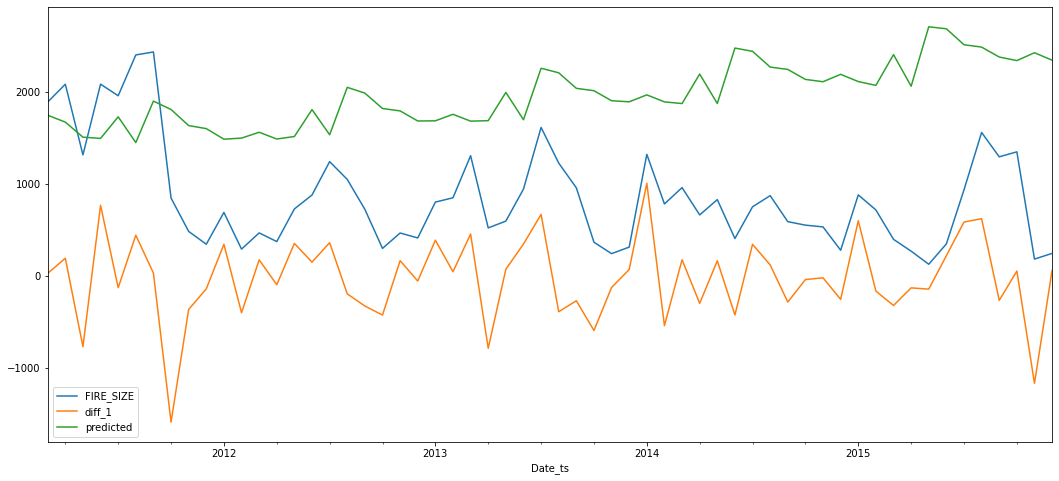

In [122]:
a_s=test.copy(deep=True)
a_s["predicted"]=fs
a_s.plot()

#### applying exponential smoothening method

In [198]:
X = fire_ts.FIRE_SIZE
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

In [199]:
test=test.to_frame()
train=train.to_frame()

<ipython-input-200-e661d6265bcd>:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)


<AxesSubplot: xlabel='Date_ts'>

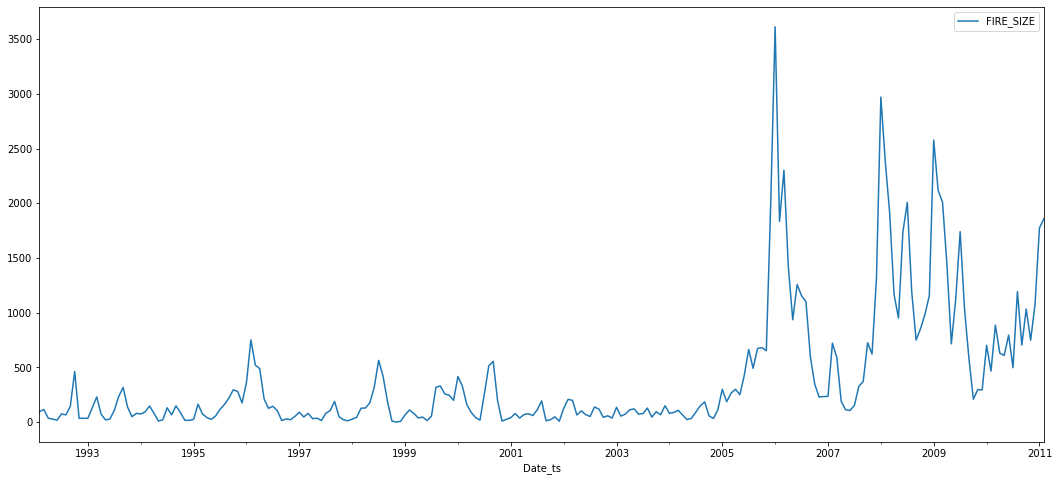

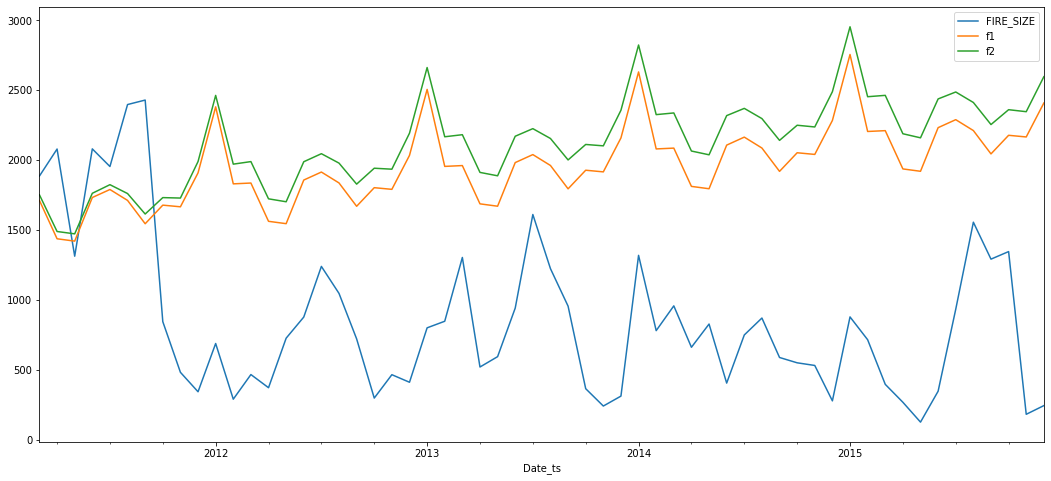

In [200]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12)
model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.forecast(len(test))
fit2 = model2.fit()
pred2 = fit2.forecast(len(test))

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))


test["f1"]=pred
test["f2"]=pred2
#fig, ax = plt.subplots(figsize=(12, 6))
train.plot()
test.plot()


#ax.plot(test.index, test.values, label='truth');
#ax.plot(test.index, pred, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic));
#ax.plot(test.index, pred2, linestyle='--', color='#3c763d', label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic)); 
#ax.legend();
#x.set_title("Holt-Winter's Seasonal Smoothing");

In [ ]:
a={}
for i in range(len(w)):
    a[i]=w[i]